# Import GitHub Repo

In [ ]:
!git clone https://github.com/ai4ai-lab/Factored-Action-Spaces-for-OPE.git

#Enable importing code from parent directory
import os, sys
main_folder = os.path.abspath('./Factored-Action-Spaces-for-OPE')
sys.path.insert(1, main_folder)

Cloning into 'Factored-Action-Spaces-Empirical-Simulation'...
remote: Enumerating objects: 361, done.
remote: Counting objects: 100% (361/361), done.
remote: Compressing objects: 100% (255/255), done.
remote: Total 361 (delta 131), reused 299 (delta 74), pack-reused 0
Receiving objects: 100% (361/361), 7.76 MiB | 16.72 MiB/s, done.
Resolving deltas: 100% (131/131), done.


**IMPORTANT NOTE:** At this stage, to reproduce our experiments, one must modify lines 29-30 of `Factored-Action-Spaces-for-OPE/generate_dataset.py` so that they read:

```
29. start_state_no = 0
30. start_state = inv_state_numbers[start_state_no]

```

We have essentially set the initial state to always be state 0.

In [ ]:
#Change our working directory
if os.getcwd() == '/content':
  os.chdir('./Factored-Action-Spaces-for-OPE')

# Quick Links

- Vs Trajectory (Episode) Length for $\gamma=0.7$ [here](#vs_tr_len_g_0_7)

- Vs Trajectory (Episode) Length for $\gamma=0.9$ [here](#vs_tr_len_g_0_9)

- Vs Trajectory (Episode) Length for $\gamma=0.999$ [here](#vs_tr_len_g_0_999)

- Vs Policy Divergence for Trajectory Lengths 10 and 1000 [here](#vs_pd_tr_len_10)

- Coverage Graphs [here](#coverage)

# 4-state-MDP

## Varying Trajectory Length With $\gamma = 0.7$

### Generate Data Set

#### From behaviour policy, generate maximum length trajectory

Dataset 1

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 1.44
Start state: 0,0, start state no: 0


Dataset 2

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 1.44
Start state: 0,0, start state no: 0


Dataset 3

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 1.44
Start state: 0,0, start state no: 0


Dataset 4

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 1.44
Start state: 0,0, start state no: 0


Dataset 5

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 1.44
Start state: 0,0, start state no: 0


Dataset 6

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 1.44
Start state: 0,0, start state no: 0


Dataset 7

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 1.44
Start state: 0,0, start state no: 0


Dataset 8

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 1.44
Start state: 0,0, start state no: 0


Dataset 9

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 1.44
Start state: 0,0, start state no: 0


Dataset 10

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 1.44
Start state: 0,0, start state no: 0


Estimate on dataset 1

In [ ]:
import sys
MDP_NAME = '4-state-MDP'
sys.argv[1] = MDP_NAME
import numpy as np
import policy_estimators as pe
from load_discrete_MDP import pi_b, pi_e
from load_discrete_MDP import factored_behaviour_policies, factored_evaluation_policies, factored_state_action_maps, factored_state_abstractions, factored_Rs
from load_discrete_MDP import action_spaces, action_space_mapping
from load_datasets import load_MDP_transitions
import gc

START_STATE_NO = 0
NO_TRAJECTORIES = 10000
TRAJECTORY_LENGTH = 1000
SHORTER_D = 1.44

def evaluate_PE(RUNS, NUM_EPISODES, EPISODE_LENGTH, VERSION_NUMBER):

  estimates = np.zeros(shape=(7,RUNS))

  nf_transitions_b, nf_transitions_e, f_transitions_b, f_transitions_e = load_MDP_transitions(MDP_NAME,
                                                                                          START_STATE_NO,
                                                                                          NO_TRAJECTORIES,
                                                                                          TRAJECTORY_LENGTH,
                                                                                          SHORTER_D,
                                                                                          VERSION_NUMBER)

  # Reshape data for processing
  T, ldim = nf_transitions_b.shape[-2], nf_transitions_b.shape[-1]
  nfb = nf_transitions_b.reshape((-1, NUM_EPISODES, T, ldim))
  nfe = nf_transitions_e.reshape((-1, NUM_EPISODES, T, ldim))
  T, D, ldim = f_transitions_b.shape[-3], f_transitions_b.shape[-2], f_transitions_b.shape[-1]
  fb = f_transitions_b.reshape((-1, NUM_EPISODES, T, D, ldim))
  fe = f_transitions_e.reshape((-1, NUM_EPISODES, T, D, ldim))

  for run in range(RUNS):
      #On policy Q estimate
      estimates[0, run] = pe.on_policy_Q_estimate(nfe[run, :, :EPISODE_LENGTH, :], 0.7)
      #Off policy IS estimate
      estimates[1, run] = pe.off_policy_IS_estimator(nfb[run, :, :EPISODE_LENGTH, :], 0.7, pi_b, pi_e)
      #Off policy PDIS estimate
      estimates[2, run] = pe.off_policy_PDIS_estimator(nfb[run, :, :EPISODE_LENGTH, :], 0.7, pi_b, pi_e)
      #Off policy PDWIS estimate
      estimates[3, run] = pe.off_policy_PDWIS_estimator(nfb[run, :, :EPISODE_LENGTH, :], 0.7, pi_b, pi_e)
      #Off policy decomposed IS estimate
      estimates[4, run], _ = pe.off_policy_DecIS_estimator(fb[run, :, :EPISODE_LENGTH, :, :], 0.7, action_spaces, factored_behaviour_policies, factored_evaluation_policies)
      #Off policy decomposed PDIS estimate
      estimates[5, run], _ = pe.off_policy_DecPDIS_estimator(fb[run, :, :EPISODE_LENGTH, :, :], 0.7, action_spaces, factored_behaviour_policies, factored_evaluation_policies)
      #Off policy decomposed PDWIS estimate
      estimates[6, run], _ = pe.off_policy_DecPDWIS_estimator(fb[run, :, :EPISODE_LENGTH, :, :], 0.7, action_spaces, factored_behaviour_policies, factored_evaluation_policies)

  return estimates


In [ ]:
from sklearn.metrics import mean_squared_error

def generate_graph_data(estimates):
  means = np.mean(estimates, axis=-1)
  variances = np.var(estimates, ddof=0, axis=-1)
  MSEs = mean_squared_error(estimates.T, np.full((estimates.T).shape, means[0]), multioutput='raw_values')
  biases_1 = np.sqrt(MSEs - variances)
  biases_2 = np.abs(means - np.full(means.shape, means[0]))

  print(f'Mean on policy Q estimate: {means[0]}. Variance of on policy Q estimate: {variances[0]}')
  print(f'Mean off policy IS estimate: {means[1]}. Bias1: {biases_1[1]}. Bias2: {biases_2[1]}. Variance: {variances[1]}. MSE: {MSEs[1]}')
  print(f'Mean off policy PDIS estimate: {means[2]}. Bias1: {biases_1[2]}. Bias2: {biases_2[2]} Variance: {variances[2]}. MSE: {MSEs[2]}')
  print(f'Mean off policy PDWIS estimate: {means[3]}. Bias1: {biases_1[3]}. Bias2: {biases_2[3]}. Variance: {variances[3]}. MSE: {MSEs[3]}')
  print(f'Mean off policy DecIS estimate: {means[4]}. Bias1: {biases_1[4]}. Bias2: {biases_2[4]}. Variance: {variances[4]}. MSE: {MSEs[4]}')
  print(f'Mean off policy DecPDIS estimate: {means[5]}. Bias1: {biases_1[5]}. Bias2: {biases_2[5]}. Variance: {variances[5]}. MSE: {MSEs[5]}')
  print(f'Mean off policy DecPDWIS estimate: {means[6]}. Bias1: {biases_1[6]}. Bias2: {biases_2[6]}. Variance: {variances[6]}. MSE: {MSEs[6]}')

  return means, variances, MSEs, biases_1, biases_2

### Run Estimates on Collected Data Sets

#### 100 runs, 1000 episodes, trajectory length 1

In [ ]:
e_1 = evaluate_PE(10, 1000, 1, 1)
gc.collect()
e_2 = evaluate_PE(10, 1000, 1, 2)
gc.collect()
e_3 = evaluate_PE(10, 1000, 1, 3)
gc.collect()
e_4 = evaluate_PE(10, 1000, 1, 4)
gc.collect()
e_5 = evaluate_PE(10, 1000, 1, 5)
gc.collect()
e_6 = evaluate_PE(10, 1000, 1, 6)
gc.collect()
e_7 = evaluate_PE(10, 1000, 1, 7)
gc.collect()
e_8 = evaluate_PE(10, 1000, 1, 8)
gc.collect()
e_9 = evaluate_PE(10, 1000, 1, 9)
gc.collect()
e_10 = evaluate_PE(10, 1000, 1, 10)
gc.collect()
estimates = np.concatenate((e_1, e_2, e_3, e_4, e_5, e_6, e_7, e_8, e_9, e_10), axis=-1)
print(estimates.shape)

(7, 100)


In [ ]:
means, variances, MSEs, biases_1, biases_2 = generate_graph_data(estimates)

Mean on policy Q estimate: 1.2002300000000001. Variance of on policy Q estimate: 0.0004424971000000007
Mean off policy IS estimate: 1.1973600000000002. Bias1: 0.0028699999999999793. Bias2: 0.002869999999999928. Variance: 0.0014991367680000003. MSE: 0.0015073736680000002
Mean off policy PDIS estimate: 1.1973600000000002. Bias1: 0.0028699999999999793. Bias2: 0.002869999999999928 Variance: 0.0014991367680000003. MSE: 0.0015073736680000002
Mean off policy PDWIS estimate: 1.1980806765290146. Bias1: 0.002149323470985372. Bias2: 0.002149323470985509. Variance: 0.000687978914853752. MSE: 0.0006925985062366806
Mean off policy DecIS estimate: 1.197084. Bias1: 0.003146000000000166. Bias2: 0.003146000000000093. Variance: 0.0009278281439999996. MSE: 0.0009377254600000007
Mean off policy DecPDIS estimate: 1.197084. Bias1: 0.003146000000000166. Bias2: 0.003146000000000093. Variance: 0.0009278281439999996. MSE: 0.0009377254600000007
Mean off policy DecPDWIS estimate: 1.1974645676213838. Bias1: 0.00276

#### 100 runs, 1000 episodes, trajectory length 5

In [ ]:
e_1 = evaluate_PE(10, 1000, 5, 1)
gc.collect()
e_2 = evaluate_PE(10, 1000, 5, 2)
gc.collect()
e_3 = evaluate_PE(10, 1000, 5, 3)
gc.collect()
e_4 = evaluate_PE(10, 1000, 5, 4)
gc.collect()
e_5 = evaluate_PE(10, 1000, 5, 5)
gc.collect()
e_6 = evaluate_PE(10, 1000, 5, 6)
gc.collect()
e_7 = evaluate_PE(10, 1000, 5, 7)
gc.collect()
e_8 = evaluate_PE(10, 1000, 5, 8)
gc.collect()
e_9 = evaluate_PE(10, 1000, 5, 9)
gc.collect()
e_10 = evaluate_PE(10, 1000, 5, 10)
gc.collect()
estimates = np.concatenate((e_1, e_2, e_3, e_4, e_5, e_6, e_7, e_8, e_9, e_10), axis=-1)
print(estimates.shape)

(7, 100)


In [ ]:
means_new, variances_new, MSEs_new, biases_1_new, biases_2_new = generate_graph_data(estimates)
means = np.stack((means, means_new), axis=-1)
variances = np.stack((variances, variances_new), axis=-1)
MSEs = np.stack((MSEs, MSEs_new), axis=-1)
biases_1 = np.stack((biases_1, biases_1_new), axis=-1)
print(means)

Mean on policy Q estimate: 0.7759338200000001. Variance of on policy Q estimate: 0.0008506318722745994
Mean off policy IS estimate: 0.775637058605128. Bias1: 0.00029676139487243476. Bias2: 0.0002967613948721137. Variance: 0.0011231528758860532. MSE: 0.0011232409432115399
Mean off policy PDIS estimate: 0.7774406096970449. Bias1: 0.0015067896970447346. Bias2: 0.0015067896970447636 Variance: 0.0020927121831310464. MSE: 0.0020949825983221666
Mean off policy PDWIS estimate: 0.15596719087221284. Bias1: 0.6199666291277873. Bias2: 0.6199666291277872. Variance: 0.00010518570241104463. MSE: 0.38446380693448245
Mean off policy DecIS estimate: 0.77375460903936. Bias1: 0.0021792109606400636. Bias2: 0.00217921096064011. Variance: 0.0011098521351787778. MSE: 0.0011146010955897516
Mean off policy DecPDIS estimate: 0.7746340522905599. Bias1: 0.0012997677094404487. Bias2: 0.0012997677094401805. Variance: 0.0014986848620381695. MSE: 0.0015003742581366736
Mean off policy DecPDWIS estimate: 0.1551596380050

#### 100 runs, 1000 episodes, trajectory length 10

In [ ]:
e_1 = evaluate_PE(10, 1000, 10, 1)
gc.collect()
e_2 = evaluate_PE(10, 1000, 10, 2)
gc.collect()
e_3 = evaluate_PE(10, 1000, 10, 3)
gc.collect()
e_4 = evaluate_PE(10, 1000, 10, 4)
gc.collect()
e_5 = evaluate_PE(10, 1000, 10, 5)
gc.collect()
e_6 = evaluate_PE(10, 1000, 10, 6)
gc.collect()
e_7 = evaluate_PE(10, 1000, 10, 7)
gc.collect()
e_8 = evaluate_PE(10, 1000, 10, 8)
gc.collect()
e_9 = evaluate_PE(10, 1000, 10, 9)
gc.collect()
e_10 = evaluate_PE(10, 1000, 10, 10)
gc.collect()
estimates = np.concatenate((e_1, e_2, e_3, e_4, e_5, e_6, e_7, e_8, e_9, e_10), axis=-1)
print(estimates.shape)

(7, 100)


In [ ]:
means_new, variances_new, MSEs_new, biases_1_new, biases_2_new = generate_graph_data(estimates)
means = np.concatenate((means, means_new[..., np.newaxis]), axis=-1)
variances = np.concatenate((variances, variances_new[..., np.newaxis]), axis=-1)
MSEs = np.concatenate((MSEs, MSEs_new[..., np.newaxis]), axis=-1)
biases_1 = np.concatenate((biases_1, biases_1_new[..., np.newaxis]), axis=-1)

Mean on policy Q estimate: 0.6630614729311202. Variance of on policy Q estimate: 0.0008513002666359604
Mean off policy IS estimate: 0.6669368861600833. Bias1: 0.003875413228963233. Bias2: 0.0038754132289631205. Variance: 0.0016802138142599106. MSE: 0.0016952326419551339
Mean off policy PDIS estimate: 0.6655688848945356. Bias1: 0.0025074119634152492. Bias2: 0.002507411963415418 Variance: 0.002351397260002104. MSE: 0.002357684374756382
Mean off policy PDWIS estimate: 0.06676403941032383. Bias1: 0.5962974335207964. Bias2: 0.5962974335207963. Variance: 3.220903772219723e-05. MSE: 0.35560283826121086
Mean off policy DecIS estimate: 0.6623508662669444. Bias1: 0.0007106066641756382. Bias2: 0.0007106066641757725. Variance: 0.0015185534869490839. MSE: 0.0015190584487802547
Mean off policy DecPDIS estimate: 0.6621685942705792. Bias1: 0.000892878660540637. Bias2: 0.0008928786605409966. Variance: 0.001642724100853396. MSE: 0.001643521333155845
Mean off policy DecPDWIS estimate: 0.06630926492449916

#### 100 runs, 1000 episodes, trajectory length 50

In [ ]:
e_1 = evaluate_PE(10, 1000, 50, 1)
gc.collect()
e_2 = evaluate_PE(10, 1000, 50, 2)
gc.collect()
e_3 = evaluate_PE(10, 1000, 50, 3)
gc.collect()
e_4 = evaluate_PE(10, 1000, 50, 4)
gc.collect()
e_5 = evaluate_PE(10, 1000, 50, 5)
gc.collect()
e_6 = evaluate_PE(10, 1000, 50, 6)
gc.collect()
e_7 = evaluate_PE(10, 1000, 50, 7)
gc.collect()
e_8 = evaluate_PE(10, 1000, 50, 8)
gc.collect()
e_9 = evaluate_PE(10, 1000, 50, 9)
gc.collect()
e_10 = evaluate_PE(10, 1000, 50, 10)
gc.collect()
estimates = np.concatenate((e_1, e_2, e_3, e_4, e_5, e_6, e_7, e_8, e_9, e_10), axis=-1)
print(estimates.shape)

(7, 100)


In [ ]:
means_new, variances_new, MSEs_new, biases_1_new, biases_2_new = generate_graph_data(estimates)
means = np.concatenate((means, means_new[..., np.newaxis]), axis=-1)
variances = np.concatenate((variances, variances_new[..., np.newaxis]), axis=-1)
MSEs = np.concatenate((MSEs, MSEs_new[..., np.newaxis]), axis=-1)
biases_1 = np.concatenate((biases_1, biases_1_new[..., np.newaxis]), axis=-1)

Mean on policy Q estimate: 0.6401385851019588. Variance of on policy Q estimate: 0.0008458211443816349
Mean off policy IS estimate: 0.6737543565618741. Bias1: 0.03361577145991527. Bias2: 0.033615771459915345. Variance: 0.02442715049245885. MSE: 0.025557170583304104
Mean off policy PDIS estimate: 0.6431641943501305. Bias1: 0.0030256092481717733. Bias2: 0.0030256092481717456 Variance: 0.0023878873438950244. MSE: 0.002397041655217647
Mean off policy PDWIS estimate: 0.012994640872109602. Bias1: 0.6271439442298491. Bias2: 0.6271439442298492. Variance: 2.4212250846834316e-06. MSE: 0.3933119480092568
Mean off policy DecIS estimate: 0.6439557263913477. Bias1: 0.003817141289389057. Bias2: 0.0038171412893889256. Variance: 0.003799102112449765. MSE: 0.003813672680072924
Mean off policy DecPDIS estimate: 0.6398350086450404. Bias1: 0.0003035764569190043. Bias2: 0.0003035764569183641. Variance: 0.0016700137587350161. MSE: 0.0016701059174002116
Mean off policy DecPDWIS estimate: 0.012841455950524702.

<ipython-input-15-99b36351fcbb>:7: RuntimeWarning: invalid value encountered in sqrt
  biases_1 = np.sqrt(MSEs - variances)


#### 100 runs, 1000 episodes, trajectory length 100

In [ ]:
e_1 = evaluate_PE(10, 1000, 100, 1)
gc.collect()
e_2 = evaluate_PE(10, 1000, 100, 2)
gc.collect()
e_3 = evaluate_PE(10, 1000, 100, 3)
gc.collect()
e_4 = evaluate_PE(10, 1000, 100, 4)
gc.collect()
e_5 = evaluate_PE(10, 1000, 100, 5)
gc.collect()
e_6 = evaluate_PE(10, 1000, 100, 6)
gc.collect()
e_7 = evaluate_PE(10, 1000, 100, 7)
gc.collect()
e_8 = evaluate_PE(10, 1000, 100, 8)
gc.collect()
e_9 = evaluate_PE(10, 1000, 100, 9)
gc.collect()
e_10 = evaluate_PE(10, 1000, 100, 10)
gc.collect()
estimates = np.concatenate((e_1, e_2, e_3, e_4, e_5, e_6, e_7, e_8, e_9, e_10), axis=-1)
print(estimates.shape)

(7, 100)


In [ ]:
means_new, variances_new, MSEs_new, biases_1_new, biases_2_new = generate_graph_data(estimates)
means = np.concatenate((means, means_new[..., np.newaxis]), axis=-1)
variances = np.concatenate((variances, variances_new[..., np.newaxis]), axis=-1)
MSEs = np.concatenate((MSEs, MSEs_new[..., np.newaxis]), axis=-1)
biases_1 = np.concatenate((biases_1, biases_1_new[..., np.newaxis]), axis=-1)

Mean on policy Q estimate: 0.6401385707806196. Variance of on policy Q estimate: 0.0008458211511883662
Mean off policy IS estimate: 0.6572276835784957. Bias1: 0.017089112797878423. Bias2: 0.01708911279787606. Variance: 0.27800780128754776. MSE: 0.2782998390637664
Mean off policy PDIS estimate: 0.6431641801848547. Bias1: 0.0030256094042348416. Bias2: 0.003025609404235019 Variance: 0.0023878873703387146. MSE: 0.002397041682605709
Mean off policy PDWIS estimate: 0.006701267668573116. Bias1: 0.6334373031120465. Bias2: 0.6334373031120465. Variance: 1.7288298497947401e-06. MSE: 0.40124454580371244
Mean off policy DecIS estimate: 0.6420284706375928. Bias1: 0.001889899856974437. Bias2: 0.0018898998569731873. Variance: 0.025993008850412763. MSE: 0.025996580571882155
Mean off policy DecPDIS estimate: 0.6398349944940092. Bias1: 0.0003035762866106573. Bias2: 0.0003035762866104852. Variance: 0.0016700137683035425. MSE: 0.0016701059268653348
Mean off policy DecPDWIS estimate: 0.0064809095217445755. 

#### 100 runs, 1000 episodes, trajectory length 500

In [ ]:
e_1 = evaluate_PE(10, 1000, 500, 1)
gc.collect()
e_2 = evaluate_PE(10, 1000, 500, 2)
gc.collect()
e_3 = evaluate_PE(10, 1000, 500, 3)
gc.collect()
e_4 = evaluate_PE(10, 1000, 500, 4)
gc.collect()
e_5 = evaluate_PE(10, 1000, 500, 5)
gc.collect()
e_6 = evaluate_PE(10, 1000, 500, 6)
gc.collect()
e_7 = evaluate_PE(10, 1000, 500, 7)
gc.collect()
e_8 = evaluate_PE(10, 1000, 500, 8)
gc.collect()
e_9 = evaluate_PE(10, 1000, 500, 9)
gc.collect()
e_10 = evaluate_PE(10, 1000, 500, 10)
gc.collect()
estimates = np.concatenate((e_1, e_2, e_3, e_4, e_5, e_6, e_7, e_8, e_9, e_10), axis=-1)
print(estimates.shape)

(7, 100)


In [ ]:
means_new, variances_new, MSEs_new, biases_1_new, biases_2_new = generate_graph_data(estimates)
means = np.concatenate((means, means_new[..., np.newaxis]), axis=-1)
variances = np.concatenate((variances, variances_new[..., np.newaxis]), axis=-1)
MSEs = np.concatenate((MSEs, MSEs_new[..., np.newaxis]), axis=-1)
biases_1 = np.concatenate((biases_1, biases_1_new[..., np.newaxis]), axis=-1)

Mean on policy Q estimate: 0.6401385707806194. Variance of on policy Q estimate: 0.0008458211511883662
Mean off policy IS estimate: 0.009109867437304804. Bias1: 0.6310287033433146. Bias2: 0.6310287033433146. Variance: 0.0014647985763286415. MSE: 0.39966202301947357
Mean off policy PDIS estimate: 0.6431641801848543. Bias1: 0.003025609404234913. Bias2: 0.003025609404234908 Variance: 0.002387887370338713. MSE: 0.0023970416826057076
Mean off policy PDWIS estimate: 0.0032776830201509633. Bias1: 0.6368608877604686. Bias2: 0.6368608877604685. Variance: 1.4821617707841736e-06. MSE: 0.40559327252082283
Mean off policy DecIS estimate: 0.3534603524705838. Bias1: 0.2866782183100361. Bias2: 0.2866782183100356. Variance: 0.6945775164219883. MSE: 0.776761917275405
Mean off policy DecPDIS estimate: 0.6398349944940089. Bias1: 0.00030357628661137163. Bias2: 0.0003035762866104852. Variance: 0.0016700137683035435. MSE: 0.0016701059268653363
Mean off policy DecPDWIS estimate: 0.0017551370780609567. Bias1: 

<ipython-input-15-99b36351fcbb>:7: RuntimeWarning: invalid value encountered in sqrt
  biases_1 = np.sqrt(MSEs - variances)


#### 100 runs, 1000 episodes, trajectory length 1000

In [ ]:
e_1 = evaluate_PE(10, 1000, 1000, 1)
gc.collect()
e_2 = evaluate_PE(10, 1000, 1000, 2)
gc.collect()
e_3 = evaluate_PE(10, 1000, 1000, 3)
gc.collect()
e_4 = evaluate_PE(10, 1000, 1000, 4)
gc.collect()
e_5 = evaluate_PE(10, 1000, 1000, 5)
gc.collect()
e_6 = evaluate_PE(10, 1000, 1000, 6)
gc.collect()
e_7 = evaluate_PE(10, 1000, 1000, 7)
gc.collect()
e_8 = evaluate_PE(10, 1000, 1000, 8)
gc.collect()
e_9 = evaluate_PE(10, 1000, 1000, 9)
gc.collect()
e_10 = evaluate_PE(10, 1000, 1000, 10)
gc.collect()
estimates = np.concatenate((e_1, e_2, e_3, e_4, e_5, e_6, e_7, e_8, e_9, e_10), axis=-1)
print(estimates.shape)

(7, 100)


In [ ]:
means_new, variances_new, MSEs_new, biases_1_new, biases_2_new = generate_graph_data(estimates)
means = np.concatenate((means, means_new[..., np.newaxis]), axis=-1)
variances = np.concatenate((variances, variances_new[..., np.newaxis]), axis=-1)
MSEs = np.concatenate((MSEs, MSEs_new[..., np.newaxis]), axis=-1)
biases_1 = np.concatenate((biases_1, biases_1_new[..., np.newaxis]), axis=-1)

Mean on policy Q estimate: 0.6401385707806194. Variance of on policy Q estimate: 0.0008458211511883662
Mean off policy IS estimate: 4.435921732505238e-06. Bias1: 0.6401341348588869. Bias2: 0.6401341348588869. Variance: 1.5032855119344875e-09. MSE: 0.4097717121148211
Mean off policy PDIS estimate: 0.6431641801848543. Bias1: 0.003025609404234913. Bias2: 0.003025609404234908 Variance: 0.002387887370338713. MSE: 0.0023970416826057076
Mean off policy PDWIS estimate: 0.0032633723421596566. Bias1: 0.6368751984384599. Bias2: 0.6368751984384597. Variance: 1.4747871615530996e-06. MSE: 0.4056114931731891
Mean off policy DecIS estimate: 0.06963980478063084. Bias1: 0.5704987659999885. Bias2: 0.5704987659999886. Variance: 0.23169798728041033. MSE: 0.5571668292879199
Mean off policy DecPDIS estimate: 0.6398349944940089. Bias1: 0.00030357628661137163. Bias2: 0.0003035762866104852. Variance: 0.0016700137683035435. MSE: 0.0016701059268653363
Mean off policy DecPDWIS estimate: 0.00152498580785691. Bias1:

<ipython-input-15-99b36351fcbb>:7: RuntimeWarning: invalid value encountered in sqrt
  biases_1 = np.sqrt(MSEs - variances)


#### Write out the readings dict (to copy and paste)

In [ ]:
biases_dict = {
      'On Policy': list(biases_1[0, :]),
      'OPE IS': list(biases_1[1, :]),
      'OPE PDIS': list(biases_1[2, :]),
      'OPE PDWIS': list(biases_1[3, :]),
      'OPE DecIS': list(biases_1[4, :]),
      'OPE DecPDIS': list(biases_1[5, :]),
      'OPE DecPDWIS': list(biases_1[6, :]),
  }

vars_dict = {
      'On Policy': list(variances[0, :]),
      'OPE IS': list(variances[1, :]),
      'OPE PDIS': list(variances[2, :]),
      'OPE PDWIS': list(variances[3, :]),
      'OPE DecIS': list(variances[4, :]),
      'OPE DecPDIS': list(variances[5, :]),
      'OPE DecPDWIS': list(variances[6, :]),
  }

MSEs_dict = {
      'On Policy': list(MSEs[0, :]),
      'OPE IS': list(MSEs[1, :]),
      'OPE PDIS': list(MSEs[2, :]),
      'OPE PDWIS': list(MSEs[3, :]),
      'OPE DecIS': list(MSEs[4, :]),
      'OPE DecPDIS': list(MSEs[5, :]),
      'OPE DecPDWIS': list(MSEs[6, :]),
  }

print(biases_dict)
print()
print(vars_dict)
print()
print(MSEs_dict)

{'On Policy': [4.656612873077393e-10, 0.0, 3.2927225399135965e-10, nan, 0.0, nan, nan], 'OPE IS': [0.0028699999999999793, 0.00029676139487243476, 0.003875413228963233, 0.03361577145991527, 0.017089112797878423, 0.6310287033433146, 0.6401341348588869], 'OPE PDIS': [0.0028699999999999793, 0.0015067896970447346, 0.0025074119634152492, 0.0030256092481717733, 0.0030256094042348416, 0.003025609404234913, 0.003025609404234913], 'OPE PDWIS': [0.002149323470985372, 0.6199666291277873, 0.5962974335207964, 0.6271439442298491, 0.6334373031120465, 0.6368608877604686, 0.6368751984384599], 'OPE DecIS': [0.003146000000000166, 0.0021792109606400636, 0.0007106066641756382, 0.003817141289389057, 0.001889899856974437, 0.2866782183100361, 0.5704987659999885], 'OPE DecPDIS': [0.003146000000000166, 0.0012997677094404487, 0.000892878660540637, 0.0003035764569190043, 0.0003035762866106573, 0.00030357628661137163, 0.00030357628661137163], 'OPE DecPDWIS': [0.0027654323786166068, 0.6207741819949302, 0.59675220800

### Plot Graphs
<a id='vs_tr_len_g_0_7'></a>
<a name="vs_tr_len_g_0_7"></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_ESS(variances, episodes):
  ESS = {}
  on_policy_vars = variances['On Policy']
  for key in variances.keys():
    ESS[key] = []
    for ind in range(len(on_policy_vars)):
      ESS[key].append(episodes * on_policy_vars[ind]/variances[key][ind])
  return ESS

def generate_mean_std(readings, legend):
  arrays = None
  for r_dict in readings:
    add_val = np.expand_dims(np.array(r_dict[legend]), axis=0)
    if arrays is None:
      arrays = add_val
    else:
      arrays = np.concatenate((arrays, add_val), axis=0)

  return np.mean(arrays, axis=0), np.std(arrays, axis=0)

def plot_graphs(readings, label, low_ylim, up_ylim):
  LENGTHS = [1, 5, 10, 50, 100, 500, 1000]

  colours = {
      'On Policy': 'k',
      'OPE IS': 'lightseagreen',
      'OPE PDIS': 'b',
      'OPE PDWIS': 'tab:purple',
      'OPE DecIS': 'lightcoral',
      'OPE DecPDIS': 'r',
      'OPE DecPDWIS': 'tab:orange'
  }

  ylabels = {
      'bias': '|Bias| With Respect to On Policy Estimate',
      'var': 'Variance',
      'MSE': 'Mean Squared Error ($Variance \ + \ Bias^2$)',
      'ESS': 'Effective Sample Size'
  }

  legend_list = ['OPE IS', 'OPE PDIS', 'OPE PDWIS', 'OPE DecIS', 'OPE DecPDIS', 'OPE DecPDWIS']

  plt.figure(figsize=(5.5,4))
  if label != 'bias':
    legend_list.insert(0,'On Policy')
  for legend in legend_list:
    mean_reading, std_reading = generate_mean_std(readings, legend)
    plt.errorbar(LENGTHS, mean_reading, yerr=std_reading, color=colours[legend], marker='x')
  plt.yscale("log")
  plt.xscale("log")
  plt.grid(visible=True, which='both', axis='both')
  plt.legend(legend_list)
  plt.xlabel('Time Steps in Episode')
  plt.ylabel(ylabels[label])
  plt.ylim([low_ylim, up_ylim])
  plt.savefig(f'{label}-vs-episode-length-discount-0-7-policy-divergence-1-44.pdf', dpi=300)
  plt.show()

#### Bias

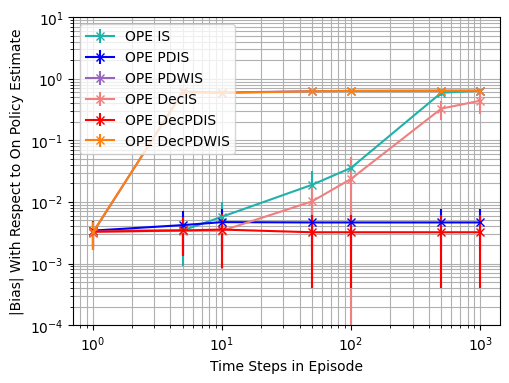

In [ ]:
biases_1 = {
    'On Policy': [0, 0, 0, 0, 0],
    'OPE IS': [0.003392799999999885, 0.008005144287993439, 0.008791507006252718, 0.03586339861807638, 0.04718245004799648, 0.44626701527713786, 0.6489381110160957],
    'OPE PDIS': [0.003392799999999885, 0.008663881489210963, 0.00882709839365064, 0.008601621302518007, 0.008601622446449443, 0.008601622446449833, 0.008601622446449833],
    'OPE PDWIS': [0.0037771883533222416, 0.6279908316513803, 0.6053079674381121, 0.6361124165989458, 0.6424682401890621, 0.6459489508018316, 0.6459656822354256],
    'OPE DecIS': [0.003352000000000134, 0.00538011320287994, 0.0058902519477289075, 0.026537415012732907, 0.07759947841592375, 0.13410511816923654, 0.14217190006274105],
    'OPE DecPDIS': [0.003352000000000134, 0.005978138674880158, 0.006728192123814717, 0.0065483628917379685, 0.0065483634737122706, 0.006548363473712287, 0.006548363473712287],
    'OPE DecPDWIS': [0.0036637266885391124, 0.5426499091812711, 0.5515492587975095, 0.6249208732268962, 0.6369286388513917, 0.6465360345734333, 0.6477369398799911]
}

biases_2 = {
    'On Policy': [0, 0, 0, 0, 0],
    'OPE IS': [0.0028699999999999793, 0.00029676139487243476, 0.003875413228963233, 0.03361577145991527, 0.017089112797878423, 0.6310287033433146, 0.6401341348588869],
    'OPE PDIS': [0.0028699999999999793, 0.0015067896970447346, 0.0025074119634152492, 0.0030256092481717733, 0.0030256094042348416, 0.003025609404234913, 0.003025609404234913],
    'OPE PDWIS': [0.002149323470985372, 0.6199666291277873, 0.5962974335207964, 0.6271439442298491, 0.6334373031120465, 0.6368608877604686, 0.6368751984384599],
    'OPE DecIS': [0.003146000000000166, 0.0021792109606400636, 0.0007106066641756382, 0.003817141289389057, 0.001889899856974437, 0.2866782183100361, 0.5704987659999885],
    'OPE DecPDIS': [0.003146000000000166, 0.0012997677094404487, 0.000892878660540637, 0.0003035764569190043, 0.0003035762866106573, 0.00030357628661137163, 0.00030357628661137163],
    'OPE DecPDWIS': [0.0027654323786166068, 0.6207741819949302, 0.596752208006621, 0.627297129151434, 0.6336576612588751, 0.6383834337025585, 0.6386135849727624]
}

biases_3 = {
    'On Policy': [0, 0, 0, 0, 0],
    'OPE IS': [0.0037635999999998068, 0.0022979248204091293, 0.0005743685906123895, 0.00535259389609223, 0.022426726056301315, 0.6247893154048738, 0.6382061903929273],
    'OPE PDIS': [0.0037635999999998068, 0.002542172978813532, 0.0013524885735478492, 0.0008475814549149748, 0.0008475799129094937, 0.0008475799129097495, 0.0008475799129097495],
    'OPE PDWIS': [0.003092110844986286, 0.6184293245480499, 0.594744549310844, 0.6253577116997477, 0.631597673419661, 0.6350449672080449, 0.6350524670387062],
    'OPE DecIS': [0.00348999999999994, 0.002376979504319929, 0.0017162856488405764, 0.002649146063254568, 0.005737659712571586, 0.38653184882500863, 0.5010695526095306],
    'OPE DecPDIS': [0.00348999999999994, 0.00299601161952025, 0.0017380148432342452, 0.0011917198475896722, 0.001191719204173944, 0.0011917192041740348, 0.0011917192041740348],
    'OPE DecPDWIS': [0.0032193608048294623, 0.6186081653972257, 0.5948692389629733, 0.6254115865148023, 0.6317604901148012, 0.6364459552673933, 0.6366393135324971]
}

biases_4 = {
    'On Policy': [0, 0, 0, 0, 0],
    'OPE IS': [0.001096000000000072, 0.002747670463509788, 0.003478594126593106, 0.012944784136461409, 0.028842104843767303, 0.6492087664613471, 0.6387965206281893],
    'OPE PDIS': [0.001096000000000072, 0.0016828529071198865, 0.0028086270957437495, 0.0030533754383808183, 0.00305337563553505, 0.0030533756355351923, 0.0030533756355351923],
    'OPE PDWIS': [0.0011400385192940953, 0.6180174972593818, 0.5947349676478526, 0.6257128319503578, 0.6319589512007608, 0.6356388472488514, 0.6356569744475755],
    'OPE DecIS': [0.000627999999999833, 0.002301078953280138, 0.0015391517512054452, 0.005427547668581257, 0.0004241004185943701, 0.4564716450633705, 0.36011159289468847],
    'OPE DecPDIS': [0.000627999999999833, 0.0010607578780799686, 0.0013986463488920133, 0.001324203009141696, 0.0013242030188967914, 0.001324203018896955, 0.001324203018896955],
    'OPE DecPDWIS': [0.000757317848871424, 0.6182065713883116, 0.5949503178050727, 0.6258402307702772, 0.632214681993633, 0.6369576920800052, 0.637200376989512]
}


biases_5 = {
    'On Policy': [0, 0, 0, 0, 0],
    'OPE IS': [0.005974399999999926, 0.003921349643123782, 0.011938740827751721, 0.0070717697913233206, 0.06273568731572784, 0.6081173553689779, 0.6393327250508587],
    'OPE PDIS': [0.005974399999999926, 0.006623953914215546, 0.007983604405940913, 0.007683143261343164, 0.007683143792837477, 0.007683143792837364, 0.007683143792837364],
    'OPE PDWIS': [0.005359304994370583, 0.6171083007584729, 0.5944159097620801, 0.6262106819529608, 0.6325580824259045, 0.6362209633133191, 0.6362797450434422],
    'OPE DecIS': [0.005804000000000119, 0.004781876650559836, 0.007099724381528661, 0.012614917813448865, 0.032386864461783585, 0.3701151127859638, 0.6242529830130849],
    'OPE DecPDIS': [0.005804000000000119, 0.005902809360959684, 0.0070228988399588825, 0.006722711070580495, 0.006722711471149538, 0.006722711471149393, 0.006722711471149393],
    'OPE DecPDWIS': [0.005545274876250611, 0.6174259781212669, 0.5946358266009656, 0.6263228188476171, 0.6327638260047791, 0.637537764520289, 0.6377514527313195]
}

biases = [biases_1, biases_2, biases_3, biases_4, biases_5]


plot_graphs(biases, 'bias', 10**(-4), 10**(1))

In [ ]:
def print_specific_mean_std(r_dict_list):
  r_1000 = np.zeros((5, 7))
  r_100000 = np.zeros((5, 7))

  for r in range(len(r_dict_list)):
    r_dict = r_dict_list[r]
    legends = list(r_dict.keys())
    for l in range(len(legends)):
      legend = legends[l]
      r_1000[r, l] = r_dict[legend][2]
      r_100000[r, l] = r_dict[legend][-1]

  print('10 STEPS')
  print(list(np.mean(r_1000, axis = 0)))
  print(list(np.std(r_1000, axis = 0)))
  print('\n1000 STEPS')
  print(list(np.mean(r_100000, axis = 0)))
  print(list(np.std(r_100000, axis = 0)))

print_specific_mean_std(biases)

10 STEPS
[0.0, 0.005731724756034633, 0.004695846086459681, 0.597100165535937, 0.003391204078695846, 0.0035561261632880994, 0.5865513700346284]
[0.0, 0.004074558348316746, 0.0030791388173304814, 0.004155976628006591, 0.0025853206825229924, 0.002725202760609489, 0.017517377609215717]

100000 STEPS
[0.0, 0.6410815363893916, 0.00464226623839341, 0.6379660134407219, 0.4396209589160067, 0.0032181146909088082, 0.6395883336212165]
[0.0, 0.0039792106566775435, 0.00298198708446201, 0.004045948418117796, 0.17308471698796127, 0.002812844458821112, 0.004126090320156475]


#### Variance

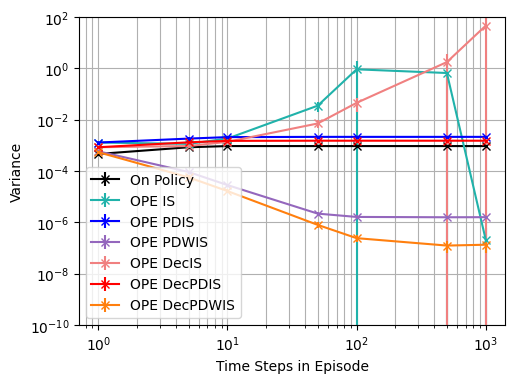

In [ ]:
vars1 = {
    'On Policy': [0.0003824764000000005, 0.0008538453673932743, 0.0008977998268141571, 0.0008878402225464575, 0.0008878402224146737, 0.0008878402224146734, 0.0008878402224146734],
    'OPE IS': [0.0009883469721599996, 0.0010136575710083234, 0.0018897276149803825, 0.036901206769192535, 3.1182931970349244, 3.2253973771007867, 3.4097523976956773e-10],
    'OPE PDIS': [0.0009883469721599996, 0.0015965183174502687, 0.0018699163553791804, 0.0018968604806001094, 0.001896860481484871, 0.0018968604814849268, 0.0018968604814849268],
    'OPE PDWIS': [0.00044914238279524426, 7.83897494759115e-05, 2.500170681615276e-05, 1.963879225073359e-06, 2.028659338783169e-06, 1.9049429876434119e-06, 1.8978267649338834e-06],
    'OPE DecIS': [0.0006609454559999998, 0.0007890027567959698, 0.0013564817408269945, 0.011064065939964486, 0.09610659615490072, 5.408063607330647, 226.27369239981488],
    'OPE DecPDIS': [0.0006609454559999998, 0.0012007114748681306, 0.0014374451542004945, 0.0014582484339204843, 0.0014582483787721123, 0.0014582483787721106, 0.0014582483787721106],
    'OPE DecPDWIS': [0.0004274743481831556, 3.867681094180139e-05, 1.1387969763692771e-05, 4.412989808178301e-07, 1.1011068636309354e-07, 4.3783836683473386e-09, 1.0940554735692396e-09]
}

vars2 = {
    'On Policy': [0.0004424971000000007, 0.0008506318722745994, 0.0008513002666359604, 0.0008458211443816349, 0.0008458211511883662, 0.0008458211511883662, 0.0008458211511883662],
    'OPE IS': [0.0014991367680000003, 0.0011231528758860532, 0.0016802138142599106, 0.02442715049245885, 0.27800780128754776, 0.0014647985763286415, 1.5032855119344875e-09],
    'OPE PDIS': [0.0014991367680000003, 0.0020927121831310464, 0.002351397260002104, 0.0023878873438950244, 0.0023878873703387146, 0.002387887370338713, 0.002387887370338713],
    'OPE PDWIS': [0.000687978914853752, 0.00010518570241104463, 3.220903772219723e-05, 2.4212250846834316e-06, 1.7288298497947401e-06, 1.4821617707841736e-06, 1.4747871615530996e-06],
    'OPE DecIS': [0.0009278281439999996, 0.0011098521351787778, 0.0015185534869490839, 0.003799102112449765, 0.025993008850412763, 0.6945775164219883, 0.23169798728041033],
    'OPE DecPDIS': [0.0009278281439999996, 0.0014986848620381695, 0.001642724100853396, 0.0016700137587350161, 0.0016700137683035425, 0.0016700137683035435, 0.0016700137683035435],
    'OPE DecPDWIS': [0.0005939393589512096, 6.838323416276973e-05, 1.9463010381943596e-05, 9.831941605602462e-07, 2.731782629653191e-07, 1.5185741710836848e-07, 1.6125759443877475e-07]
}

vars3 = {
    'On Policy': [0.00047658590000000043, 0.0008708303905342517, 0.0010511084923971769, 0.0010613261580532233, 0.0010613261519634583, 0.0010613261519634588, 0.0010613261519634588],
    'OPE IS': [0.0010951413350399999, 0.001224714464258392, 0.002072994090662829, 0.025924896457997438, 0.5911407798639734, 0.011307312632513772, 1.204373995813391e-10],
    'OPE PDIS': [0.0010951413350399999, 0.0018583530790749034, 0.0021482413041441885, 0.0022112953220821156, 0.0022112954177447063, 0.0022112954177447015, 0.0022112954177447015],
    'OPE PDWIS': [0.0004901960406330811, 9.673848478360378e-05, 2.9451872153192148e-05, 2.0216157812535134e-06, 1.5265664344082258e-06, 1.527054392603241e-06, 1.5203053191917253e-06],
    'OPE DecIS': [0.000807854399999999, 0.0009637449789295575, 0.0014663427729435913, 0.007169315779661275, 0.0419714815872317, 1.0124619804824686, 0.9428345049575613],
    'OPE DecPDIS': [0.000807854399999999, 0.0012746593489033273, 0.0014961717681981094, 0.0015253203679967686, 0.0015253203838905551, 0.0015253203838905527, 0.0015253203838905527],
    'OPE DecPDWIS': [0.0005183175662147613, 5.945411756239012e-05, 1.792531928138913e-05, 8.16315806571367e-07, 2.7185550829568963e-07, 1.5655739353480126e-07, 1.6384453410229027e-07]
}

vars4 = {
    'On Policy': [0.000522841600000001, 0.0007821654284017708, 0.0009427565018714832, 0.0009347979478681302, 0.0009347979466737147, 0.0009347979466737142, 0.0009347979466737142],
    'OPE IS': [0.001436099327999999, 0.0013713765362310185, 0.0020144489508735508, 0.02649135516751112, 0.32917739081364233, 0.05553512215580441, 1.0441183430641484e-06],
    'OPE PDIS': [0.001436099327999999, 0.00206859642390101, 0.0024273716781481767, 0.002507360211227967, 0.0025073602493067043, 0.0025073602493067004, 0.0025073602493067004],
    'OPE PDWIS': [0.0006594054462682976, 0.00010361434493537665, 3.2501756486063806e-05, 2.6888939609598064e-06, 1.5545545134380164e-06, 1.6460972147161287e-06, 1.6699151685498083e-06],
    'OPE DecIS': [0.0009198804959999993, 0.0010603503642502567, 0.001345098299076942, 0.0069080493004970486, 0.03567397271257743, 1.1314749716507198, 5.65993737995867],
    'OPE DecPDIS': [0.0009198804959999993, 0.0014373936231291463, 0.0016413530463890665, 0.0016611055056138784, 0.00166110550955552, 0.00166110550955552, 0.00166110550955552],
    'OPE DecPDWIS': [0.0005902699468324429, 6.509081436961527e-05, 1.910949691555627e-05, 9.567493808953222e-07, 3.050910566407379e-07, 1.852457037218063e-07, 1.965277209157283e-07]
}

vars5 = {
    'On Policy': [0.0005085664000000006, 0.0008956430664672102, 0.0009903117186679147, 0.0010014233684511487, 0.0010014233610904696, 0.001001423361090469, 0.001001423361090469],
    'OPE IS': [0.0014714545766400008, 0.001035557211229273, 0.0016180932651452824, 0.06356254629662743, 0.30642671956240647, 0.029947157931282612, 1.6409884438425646e-09],
    'OPE PDIS': [0.0014714545766400008, 0.0016315287304411294, 0.0017645024654582462, 0.0018008143160978393, 0.0018008143149818856, 0.0018008143149818789, 0.0018008143149818789],
    'OPE PDWIS': [0.0006723093635979944, 7.978024079038362e-05, 2.390391525988903e-05, 1.9539342498980625e-06, 1.3648907330515373e-06, 1.4022595287511457e-06, 1.4649083977568453e-06],
    'OPE DecIS': [0.0009404483039999991, 0.0008255306114229842, 0.0012306183615629432, 0.006971515050940655, 0.02883752319152915, 0.6073302361559234, 0.006984108821629645],
    'OPE DecPDIS': [0.0009404483039999991, 0.0012112380321269154, 0.0013328642125365906, 0.0013437916897795857, 0.0013437917390800311, 0.0013437917390800311, 0.0013437917390800311],
    'OPE DecPDWIS': [0.000601516916775439, 5.535175377541385e-05, 1.572743813434805e-05, 8.231329890956887e-07, 2.627699073575501e-07, 1.305432855817729e-07, 1.5571556181881517e-07]
}

vars = [vars1, vars2, vars3, vars4, vars5]

plot_graphs(vars, 'var', 10**(-10), 10**2)

In [ ]:
print_specific_mean_std(vars)

10 STEPS
[0.0009466553612773385, 0.0018550955471843909, 0.002112285812626379, 2.8613657687498994e-05, 0.0013834189322719107, 0.0015101116564355313, 1.6722646895385963e-05]
[6.97294666088416e-05, 0.00017934679525410298, 0.0002597854478841312, 3.576996957875511e-06, 0.00010067751371575461, 0.00011975120897199474, 2.969925470538167e-06]

100000 STEPS
[0.0009462417666661362, 2.0954480593185527e-07, 0.002160843566771384, 1.6055485623970724e-06, 46.62302927616663, 0.0015316959559203516, 1.3568789334983554e-07]
[7.735040465619146e-05, 4.172872078886706e-07, 0.0002733043068602113, 1.6353239314499426e-07, 89.84901461741076, 0.00012379163058022423, 6.879636523691361e-08]


#### MSE

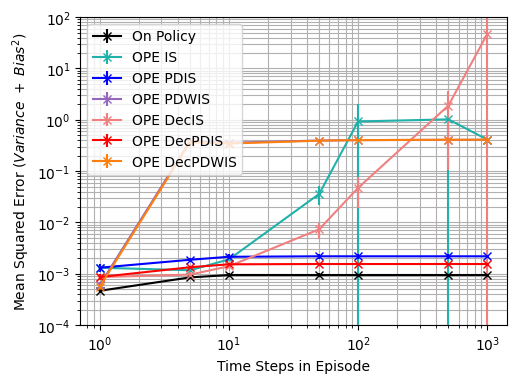

In [ ]:
MSEs1 = {
    'On Policy': [0.0003824764000000005, 0.0008538453673932743, 0.0008977998268141571, 0.0008878402225464575, 0.0008878402224146737, 0.0008878402224146734, 0.0008878402224146734],
    'OPE IS': [0.0009998580639999988, 0.0010777399060799173, 0.001967018210421373, 0.03818739012963158, 3.120519380627456, 3.424551626025152, 0.42112067227011374],
    'OPE PDIS': [0.0009998580639999988, 0.001671581159909361, 0.0019478340214303701, 0.001970848369632041, 0.001970848390196134, 0.0019708483901961964, 0.0019708483901961964],
    'OPE PDWIS': [0.00046340953465171745, 0.3944508743876681, 0.3664227371508747, 0.40464097043057584, 0.41276746831096917, 0.41725195198497467, 0.41727356045264374],
    'OPE DecIS': [0.0006721813600000007, 0.0008179483748717728, 0.0013911768088347186, 0.011768300335522508, 0.10212827520532414, 5.426047790049832, 226.29390524898233],
    'OPE DecPDIS': [0.0006721813600000007, 0.0012364496168842285, 0.0014827137234554569, 0.0015011294904823751, 0.0015011294429559613, 0.0015011294429559598, 0.0015011294429559598],
    'OPE DecPDWIS': [0.00044089724143146937, 0.29450760074538357, 0.3042179728498458, 0.3905265390936472, 0.405678201099773, 0.4180088483803235, 0.4195631443791507]
}

MSEs2 = {
    'On Policy': [0.00044249710000000093, 0.0008506318722745994, 0.0008513002666359605, 0.0008458211443816348, 0.0008458211511883662, 0.000845821151188366, 0.000845821151188366],
    'OPE IS': [0.0015073736680000002, 0.0011232409432115399, 0.0016952326419551339, 0.025557170583304104, 0.2782998390637664, 0.39966202301947357, 0.4097717121148211],
    'OPE PDIS': [0.0015073736680000002, 0.0020949825983221666, 0.002357684374756382, 0.002397041655217647, 0.002397041682605709, 0.0023970416826057076, 0.0023970416826057076],
    'OPE PDWIS': [0.0006925985062366806, 0.38446380693448245, 0.35560283826121086, 0.3933119480092568, 0.40124454580371244, 0.40559327252082283, 0.4056114931731891],
    'OPE DecIS': [0.0009377254600000007, 0.0011146010955897516, 0.0015190584487802547, 0.003813672680072924, 0.025996580571882155, 0.776761917275405, 0.5571668292879199],
    'OPE DecPDIS': [0.0009377254600000007, 0.0015003742581366736, 0.001643521333155845, 0.0016701059174002116, 0.0016701059268653348, 0.0016701059268653363, 0.0016701059268653363],
    'OPE DecPDWIS': [0.0006015869751919107, 0.3854289682656375, 0.35613266077115946, 0.39350267143579143, 0.40152230485033025, 0.40753356028328597, 0.40782747216935816]
}

MSEs3 = {
    'On Policy': [0.00047658590000000043, 0.0008708303905342513, 0.0010511084923971773, 0.001061326158053223, 0.0010613261519634581, 0.0010613261519634588, 0.0010613261519634588],
    'OPE IS': [0.0011093060199999984, 0.0012299949227386443, 0.002073323989940711, 0.025953546719413922, 0.5916437379055778, 0.4016690012766046, 0.40730714157629067],
    'OPE PDIS': [0.0011093060199999984, 0.001864815722529113, 0.002150070529485766, 0.0022120137164048314, 0.002212013809453474, 0.0022120138094534696, 0.0022120138094534696],
    'OPE PDWIS': [0.0004997571901107629, 0.38255156794574086, 0.3537505308071121, 0.39107428919812603, 0.39891714763556313, 0.4032836374306594, 0.4032931561972663],
    'OPE DecIS': [0.0008200344999999986, 0.0009693950104935145, 0.0014692884093720074, 0.007176333754525732, 0.042004402326208966, 1.161868850638548, 1.1939052015098763],
    'OPE DecPDIS': [0.0008200344999999986, 0.0012836354345276276, 0.001499192463793412, 0.0015267405641919078, 0.001526740578552152, 0.00152674057855215, 0.00152674057855215],
    'OPE DecPDWIS': [0.0005286818502064335, 0.3827355164136837, 0.35388733678366835, 0.3911404688627686, 0.3991215887256021, 0.40506361053361833, 0.40530977937966334]
}

MSEs4 = {
    'On Policy': [0.0005228416000000011, 0.0007821654284017709, 0.0009427565018714834, 0.0009347979478681302, 0.0009347979466737146, 0.0009347979466737142, 0.0009347979466737142],
    'OPE IS': [0.0014373005439999992, 0.0013789262292070626, 0.002026549567971119, 0.026658922603850704, 0.3300092578254612, 0.47700714460606825, 0.40806203888502374],
    'OPE PDIS': [0.0014373005439999992, 0.002071428417808012, 0.0024352600643111227, 0.0025166833127956744, 0.0025166833520783834, 0.0025166833520783804, 0.0025166833520783804],
    'OPE PDWIS': [0.0006607051340937718, 0.3820492412636854, 0.3537421834995783, 0.3915192369612976, 0.3993736705572791, 0.4040383902290634, 0.40406145907901425],
    'OPE DecIS': [0.0009202748799999991, 0.0010656453285994856, 0.0013474672871901807, 0.00693750757419177, 0.035674152573742485, 1.3398413343975795, 5.78961773929582],
    'OPE DecPDIS': [0.0009202748799999991, 0.001438518830405055, 0.0016433092579983355, 0.0016628590192232983, 0.0016628590231907753, 0.0016628590231907757, 0.0016628590231907757],
    'OPE DecPDWIS': [0.0005908434771566621, 0.3822444557220612, 0.3539849901532726, 0.3916769511999747, 0.3996957092193671, 0.40571528674559043, 0.40602451696329717]
}

MSEs5 = {
    'On Policy': [0.0005085664000000006, 0.0008956430664672102, 0.0009903117186679147, 0.001001423368451149, 0.0010014233610904691, 0.0010014233610904696, 0.0010014233610904696],
    'OPE IS': [0.001507148032, 0.0010509341942529001, 0.0017606267976975083, 0.0636125562246089, 0.31036248602538324, 0.3997538758322424, 0.4087463349619454],
    'OPE PDIS': [0.001507148032, 0.0016754054958987808, 0.0018282404047688054, 0.0018598450064721622, 0.0018598450135233026, 0.0018598450135232942, 0.0018598450135232942],
    'OPE PDWIS': [0.0007010315136206799, 0.38090243510580024, 0.3533541776935413, 0.39214177212624207, 0.40013109253307044, 0.4047785164188565, 0.40485337886094563],
    'OPE DecIS': [0.0009741347200000005, 0.0008483969557241535, 0.0012810244478566157, 0.007130651202380724, 0.02988643218119509, 0.7443154328684901, 0.3966758956223644],
    'OPE DecPDIS': [0.0009741347200000005, 0.0012460811904787487, 0.0013821853206528864, 0.0013889865339180912, 0.0013889865886043567, 0.0013889865886043547, 0.0013889865886043547],
    'OPE DecPDWIS': [0.0006322669902286152, 0.3812701902127786, 0.353607493715548, 0.3922810965422141, 0.4003903222701136, 0.406454531732813, 0.4067270711764703]
}

MSEs = [MSEs1, MSEs2, MSEs3, MSEs4, MSEs5]

plot_graphs(MSEs, 'MSE', 10**(-4), 10**2)

In [ ]:
print_specific_mean_std(MSEs)

10 STEPS
[0.0009466553612773387, 0.001904550241597169, 0.002143817878950489, 0.35657449348246345, 0.0014016030804067557, 0.001530184419811187, 0.3443660908546988]
[6.972946660884169e-05, 0.00014953158604020131, 0.00023182551011230308, 0.004985964220342925, 8.480054857208416e-05, 0.00010075731898312615, 0.020094299796325786]

100000 STEPS
[0.0009462417666661362, 0.411001579961639, 0.00219128644957141, 0.4070186095526118, 46.84625418293966, 0.0015499643120337153, 0.4090903968135879]
[7.735040465619158e-05, 0.005124148920571214, 0.00024782830632539, 0.005185671799136385, 89.74573724451945, 0.00010584633871490281, 0.005301913159118604]


#### ESS

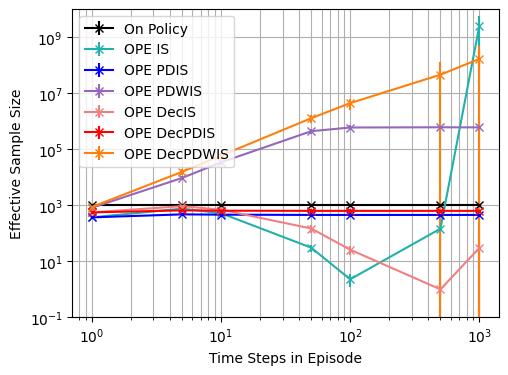

In [ ]:
vars1 = {
    'On Policy': [0.0003824764000000005, 0.0008538453673932743, 0.0008977998268141571, 0.0008878402225464575, 0.0008878402224146737, 0.0008878402224146734, 0.0008878402224146734],
    'OPE IS': [0.0009883469721599996, 0.0010136575710083234, 0.0018897276149803825, 0.036901206769192535, 3.1182931970349244, 3.2253973771007867, 3.4097523976956773e-10],
    'OPE PDIS': [0.0009883469721599996, 0.0015965183174502687, 0.0018699163553791804, 0.0018968604806001094, 0.001896860481484871, 0.0018968604814849268, 0.0018968604814849268],
    'OPE PDWIS': [0.00044914238279524426, 7.83897494759115e-05, 2.500170681615276e-05, 1.963879225073359e-06, 2.028659338783169e-06, 1.9049429876434119e-06, 1.8978267649338834e-06],
    'OPE DecIS': [0.0006609454559999998, 0.0007890027567959698, 0.0013564817408269945, 0.011064065939964486, 0.09610659615490072, 5.408063607330647, 226.27369239981488],
    'OPE DecPDIS': [0.0006609454559999998, 0.0012007114748681306, 0.0014374451542004945, 0.0014582484339204843, 0.0014582483787721123, 0.0014582483787721106, 0.0014582483787721106],
    'OPE DecPDWIS': [0.0004274743481831556, 3.867681094180139e-05, 1.1387969763692771e-05, 4.412989808178301e-07, 1.1011068636309354e-07, 4.3783836683473386e-09, 1.0940554735692396e-09]
}

ESS1 = calculate_ESS(vars1, 1000)

vars2 = {
    'On Policy': [0.0004424971000000007, 0.0008506318722745994, 0.0008513002666359604, 0.0008458211443816349, 0.0008458211511883662, 0.0008458211511883662, 0.0008458211511883662],
    'OPE IS': [0.0014991367680000003, 0.0011231528758860532, 0.0016802138142599106, 0.02442715049245885, 0.27800780128754776, 0.0014647985763286415, 1.5032855119344875e-09],
    'OPE PDIS': [0.0014991367680000003, 0.0020927121831310464, 0.002351397260002104, 0.0023878873438950244, 0.0023878873703387146, 0.002387887370338713, 0.002387887370338713],
    'OPE PDWIS': [0.000687978914853752, 0.00010518570241104463, 3.220903772219723e-05, 2.4212250846834316e-06, 1.7288298497947401e-06, 1.4821617707841736e-06, 1.4747871615530996e-06],
    'OPE DecIS': [0.0009278281439999996, 0.0011098521351787778, 0.0015185534869490839, 0.003799102112449765, 0.025993008850412763, 0.6945775164219883, 0.23169798728041033],
    'OPE DecPDIS': [0.0009278281439999996, 0.0014986848620381695, 0.001642724100853396, 0.0016700137587350161, 0.0016700137683035425, 0.0016700137683035435, 0.0016700137683035435],
    'OPE DecPDWIS': [0.0005939393589512096, 6.838323416276973e-05, 1.9463010381943596e-05, 9.831941605602462e-07, 2.731782629653191e-07, 1.5185741710836848e-07, 1.6125759443877475e-07]
}

ESS2 = calculate_ESS(vars2, 1000)

vars3 = {
    'On Policy': [0.00047658590000000043, 0.0008708303905342517, 0.0010511084923971769, 0.0010613261580532233, 0.0010613261519634583, 0.0010613261519634588, 0.0010613261519634588],
    'OPE IS': [0.0010951413350399999, 0.001224714464258392, 0.002072994090662829, 0.025924896457997438, 0.5911407798639734, 0.011307312632513772, 1.204373995813391e-10],
    'OPE PDIS': [0.0010951413350399999, 0.0018583530790749034, 0.0021482413041441885, 0.0022112953220821156, 0.0022112954177447063, 0.0022112954177447015, 0.0022112954177447015],
    'OPE PDWIS': [0.0004901960406330811, 9.673848478360378e-05, 2.9451872153192148e-05, 2.0216157812535134e-06, 1.5265664344082258e-06, 1.527054392603241e-06, 1.5203053191917253e-06],
    'OPE DecIS': [0.000807854399999999, 0.0009637449789295575, 0.0014663427729435913, 0.007169315779661275, 0.0419714815872317, 1.0124619804824686, 0.9428345049575613],
    'OPE DecPDIS': [0.000807854399999999, 0.0012746593489033273, 0.0014961717681981094, 0.0015253203679967686, 0.0015253203838905551, 0.0015253203838905527, 0.0015253203838905527],
    'OPE DecPDWIS': [0.0005183175662147613, 5.945411756239012e-05, 1.792531928138913e-05, 8.16315806571367e-07, 2.7185550829568963e-07, 1.5655739353480126e-07, 1.6384453410229027e-07]
}

ESS3 = calculate_ESS(vars3, 1000)

vars4 = {
    'On Policy': [0.000522841600000001, 0.0007821654284017708, 0.0009427565018714832, 0.0009347979478681302, 0.0009347979466737147, 0.0009347979466737142, 0.0009347979466737142],
    'OPE IS': [0.001436099327999999, 0.0013713765362310185, 0.0020144489508735508, 0.02649135516751112, 0.32917739081364233, 0.05553512215580441, 1.0441183430641484e-06],
    'OPE PDIS': [0.001436099327999999, 0.00206859642390101, 0.0024273716781481767, 0.002507360211227967, 0.0025073602493067043, 0.0025073602493067004, 0.0025073602493067004],
    'OPE PDWIS': [0.0006594054462682976, 0.00010361434493537665, 3.2501756486063806e-05, 2.6888939609598064e-06, 1.5545545134380164e-06, 1.6460972147161287e-06, 1.6699151685498083e-06],
    'OPE DecIS': [0.0009198804959999993, 0.0010603503642502567, 0.001345098299076942, 0.0069080493004970486, 0.03567397271257743, 1.1314749716507198, 5.65993737995867],
    'OPE DecPDIS': [0.0009198804959999993, 0.0014373936231291463, 0.0016413530463890665, 0.0016611055056138784, 0.00166110550955552, 0.00166110550955552, 0.00166110550955552],
    'OPE DecPDWIS': [0.0005902699468324429, 6.509081436961527e-05, 1.910949691555627e-05, 9.567493808953222e-07, 3.050910566407379e-07, 1.852457037218063e-07, 1.965277209157283e-07]
}

ESS4 = calculate_ESS(vars4, 1000)

vars5 = {
    'On Policy': [0.0005085664000000006, 0.0008956430664672102, 0.0009903117186679147, 0.0010014233684511487, 0.0010014233610904696, 0.001001423361090469, 0.001001423361090469],
    'OPE IS': [0.0014714545766400008, 0.001035557211229273, 0.0016180932651452824, 0.06356254629662743, 0.30642671956240647, 0.029947157931282612, 1.6409884438425646e-09],
    'OPE PDIS': [0.0014714545766400008, 0.0016315287304411294, 0.0017645024654582462, 0.0018008143160978393, 0.0018008143149818856, 0.0018008143149818789, 0.0018008143149818789],
    'OPE PDWIS': [0.0006723093635979944, 7.978024079038362e-05, 2.390391525988903e-05, 1.9539342498980625e-06, 1.3648907330515373e-06, 1.4022595287511457e-06, 1.4649083977568453e-06],
    'OPE DecIS': [0.0009404483039999991, 0.0008255306114229842, 0.0012306183615629432, 0.006971515050940655, 0.02883752319152915, 0.6073302361559234, 0.006984108821629645],
    'OPE DecPDIS': [0.0009404483039999991, 0.0012112380321269154, 0.0013328642125365906, 0.0013437916897795857, 0.0013437917390800311, 0.0013437917390800311, 0.0013437917390800311],
    'OPE DecPDWIS': [0.000601516916775439, 5.535175377541385e-05, 1.572743813434805e-05, 8.231329890956887e-07, 2.627699073575501e-07, 1.305432855817729e-07, 1.5571556181881517e-07]
}

ESS5 = calculate_ESS(vars5, 1000)

ESS = [ESS1, ESS2, ESS3, ESS4, ESS5]

plot_graphs(ESS, 'ESS', 10**(-1), 10**10)

In [ ]:
print_specific_mean_std(ESS)

10 STEPS
[1000.0, 513.765254302589, 456.2166941234708, 33692.84309906793, 688.9783337488125, 632.5419573677326, 58703.34920853427]
[7.190186943645084e-14, 51.653548820033336, 72.34072861842715, 5356.298738210397, 79.4120600796459, 81.99197976111994, 12126.558420742613]

100000 STEPS
[1000.0, 2517977975.498477, 446.2287881319834, 596567.3552238361, 29.666256739812958, 623.8199601399008, 166884691.64741933]
[1.016845989170083e-13, 3268755940.6677537, 74.21603701476188, 85258.47077706445, 56.874825987499506, 86.76778230281018, 322314839.20113844]


## Varying Trajectory Length With $\gamma = 0.9$

### Generate Data Set

#### From behaviour policy, generate maximum length trajectory

Dataset 1

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 1.44
Start state: 0,0, start state no: 0


Dataset 2

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 1.44
Start state: 0,0, start state no: 0


Dataset 3

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 1.44
Start state: 0,0, start state no: 0


Dataset 4

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 1.44
Start state: 0,0, start state no: 0


Dataset 5

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 1.44
Start state: 0,0, start state no: 0


Dataset 6

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 1.44
Start state: 0,0, start state no: 0


Dataset 7

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 1.44
Start state: 0,0, start state no: 0


Dataset 8

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 1.44
Start state: 0,0, start state no: 0


Dataset 9

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 1.44
Start state: 0,0, start state no: 0


Dataset 10

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 1.44
Start state: 0,0, start state no: 0


Estimate on dataset 1

In [ ]:
import sys
MDP_NAME = '4-state-MDP'
sys.argv[1] = MDP_NAME
import numpy as np
import policy_estimators as pe
from load_discrete_MDP import pi_b, pi_e
from load_discrete_MDP import factored_behaviour_policies, factored_evaluation_policies, factored_state_action_maps, factored_state_abstractions, factored_Rs
from load_discrete_MDP import action_spaces, action_space_mapping
from load_datasets import load_MDP_transitions
import gc

START_STATE_NO = 0
NO_TRAJECTORIES = 10000
TRAJECTORY_LENGTH = 1000
SHORTER_D = 1.44

def evaluate_PE(RUNS, NUM_EPISODES, EPISODE_LENGTH, VERSION_NUMBER):

  estimates = np.zeros(shape=(7,RUNS))

  nf_transitions_b, nf_transitions_e, f_transitions_b, f_transitions_e = load_MDP_transitions(MDP_NAME,
                                                                                          START_STATE_NO,
                                                                                          NO_TRAJECTORIES,
                                                                                          TRAJECTORY_LENGTH,
                                                                                          SHORTER_D,
                                                                                          VERSION_NUMBER)

  # Reshape data for processing
  T, ldim = nf_transitions_b.shape[-2], nf_transitions_b.shape[-1]
  nfb = nf_transitions_b.reshape((-1, NUM_EPISODES, T, ldim))
  nfe = nf_transitions_e.reshape((-1, NUM_EPISODES, T, ldim))
  T, D, ldim = f_transitions_b.shape[-3], f_transitions_b.shape[-2], f_transitions_b.shape[-1]
  fb = f_transitions_b.reshape((-1, NUM_EPISODES, T, D, ldim))
  fe = f_transitions_e.reshape((-1, NUM_EPISODES, T, D, ldim))

  for run in range(RUNS):
      #On policy Q estimate
      estimates[0, run] = pe.on_policy_Q_estimate(nfe[run, :, :EPISODE_LENGTH, :], 0.9)
      #Off policy IS estimate
      estimates[1, run] = pe.off_policy_IS_estimator(nfb[run, :, :EPISODE_LENGTH, :], 0.9, pi_b, pi_e)
      #Off policy PDIS estimate
      estimates[2, run] = pe.off_policy_PDIS_estimator(nfb[run, :, :EPISODE_LENGTH, :], 0.9, pi_b, pi_e)
      #Off policy PDWIS estimate
      estimates[3, run] = pe.off_policy_PDWIS_estimator(nfb[run, :, :EPISODE_LENGTH, :], 0.9, pi_b, pi_e)
      #Off policy decomposed IS estimate
      estimates[4, run], _ = pe.off_policy_DecIS_estimator(fb[run, :, :EPISODE_LENGTH, :, :], 0.9, action_spaces, factored_behaviour_policies, factored_evaluation_policies)
      #Off policy decomposed PDIS estimate
      estimates[5, run], _ = pe.off_policy_DecPDIS_estimator(fb[run, :, :EPISODE_LENGTH, :, :], 0.9, action_spaces, factored_behaviour_policies, factored_evaluation_policies)
      #Off policy decomposed PDWIS estimate
      estimates[6, run], _ = pe.off_policy_DecPDWIS_estimator(fb[run, :, :EPISODE_LENGTH, :, :], 0.9, action_spaces, factored_behaviour_policies, factored_evaluation_policies)

  return estimates


In [ ]:
from sklearn.metrics import mean_squared_error

def generate_graph_data(estimates):
  means = np.mean(estimates, axis=-1)
  variances = np.var(estimates, ddof=0, axis=-1)
  MSEs = mean_squared_error(estimates.T, np.full((estimates.T).shape, means[0]), multioutput='raw_values')
  biases_1 = np.sqrt(MSEs - variances)
  biases_2 = np.abs(means - np.full(means.shape, means[0]))

  print(f'Mean on policy Q estimate: {means[0]}. Variance of on policy Q estimate: {variances[0]}')
  print(f'Mean off policy IS estimate: {means[1]}. Bias1: {biases_1[1]}. Bias2: {biases_2[1]}. Variance: {variances[1]}. MSE: {MSEs[1]}')
  print(f'Mean off policy PDIS estimate: {means[2]}. Bias1: {biases_1[2]}. Bias2: {biases_2[2]} Variance: {variances[2]}. MSE: {MSEs[2]}')
  print(f'Mean off policy PDWIS estimate: {means[3]}. Bias1: {biases_1[3]}. Bias2: {biases_2[3]}. Variance: {variances[3]}. MSE: {MSEs[3]}')
  print(f'Mean off policy DecIS estimate: {means[4]}. Bias1: {biases_1[4]}. Bias2: {biases_2[4]}. Variance: {variances[4]}. MSE: {MSEs[4]}')
  print(f'Mean off policy DecPDIS estimate: {means[5]}. Bias1: {biases_1[5]}. Bias2: {biases_2[5]}. Variance: {variances[5]}. MSE: {MSEs[5]}')
  print(f'Mean off policy DecPDWIS estimate: {means[6]}. Bias1: {biases_1[6]}. Bias2: {biases_2[6]}. Variance: {variances[6]}. MSE: {MSEs[6]}')

  return means, variances, MSEs, biases_1, biases_2

### Run Estimates on Collected Data Sets

#### 100 runs, 1000 episodes, trajectory length 1

In [ ]:
e_1 = evaluate_PE(10, 1000, 1, 1)
gc.collect()
e_2 = evaluate_PE(10, 1000, 1, 2)
gc.collect()
e_3 = evaluate_PE(10, 1000, 1, 3)
gc.collect()
e_4 = evaluate_PE(10, 1000, 1, 4)
gc.collect()
e_5 = evaluate_PE(10, 1000, 1, 5)
gc.collect()
e_6 = evaluate_PE(10, 1000, 1, 6)
gc.collect()
e_7 = evaluate_PE(10, 1000, 1, 7)
gc.collect()
e_8 = evaluate_PE(10, 1000, 1, 8)
gc.collect()
e_9 = evaluate_PE(10, 1000, 1, 9)
gc.collect()
e_10 = evaluate_PE(10, 1000, 1, 10)
gc.collect()
estimates = np.concatenate((e_1, e_2, e_3, e_4, e_5, e_6, e_7, e_8, e_9, e_10), axis=-1)
print(estimates.shape)

(7, 100)


In [ ]:
means, variances, MSEs, biases_1, biases_2 = generate_graph_data(estimates)

Mean on policy Q estimate: 1.20269. Variance of on policy Q estimate: 0.0005050539000000011
Mean off policy IS estimate: 1.1970720000000001. Bias1: 0.005617999999999946. Bias2: 0.005617999999999901. Variance: 0.0010536353279999994. MSE: 0.0010851972519999988
Mean off policy PDIS estimate: 1.1970720000000001. Bias1: 0.005617999999999946. Bias2: 0.005617999999999901 Variance: 0.0010536353279999994. MSE: 0.0010851972519999988
Mean off policy PDWIS estimate: 1.197853150450645. Bias1: 0.004836849549354922. Bias2: 0.004836849549354927. Variance: 0.0004746848290908113. MSE: 0.0004980799426539062
Mean off policy DecIS estimate: 1.197564. Bias1: 0.005126000000000132. Bias2: 0.005125999999999964. Variance: 0.000720041904. MSE: 0.0007463177800000014
Mean off policy DecPDIS estimate: 1.197564. Bias1: 0.005126000000000132. Bias2: 0.005125999999999964. Variance: 0.000720041904. MSE: 0.0007463177800000014
Mean off policy DecPDWIS estimate: 1.1979014523454528. Bias1: 0.004788547654547264. Bias2: 0.004

#### 100 runs, 1000 episodes, trajectory length 5

In [ ]:
e_1 = evaluate_PE(10, 1000, 5, 1)
gc.collect()
e_2 = evaluate_PE(10, 1000, 5, 2)
gc.collect()
e_3 = evaluate_PE(10, 1000, 5, 3)
gc.collect()
e_4 = evaluate_PE(10, 1000, 5, 4)
gc.collect()
e_5 = evaluate_PE(10, 1000, 5, 5)
gc.collect()
e_6 = evaluate_PE(10, 1000, 5, 6)
gc.collect()
e_7 = evaluate_PE(10, 1000, 5, 7)
gc.collect()
e_8 = evaluate_PE(10, 1000, 5, 8)
gc.collect()
e_9 = evaluate_PE(10, 1000, 5, 9)
gc.collect()
e_10 = evaluate_PE(10, 1000, 5, 10)
gc.collect()
estimates = np.concatenate((e_1, e_2, e_3, e_4, e_5, e_6, e_7, e_8, e_9, e_10), axis=-1)
print(estimates.shape)

(7, 100)


In [ ]:
means_new, variances_new, MSEs_new, biases_1_new, biases_2_new = generate_graph_data(estimates)
means = np.stack((means, means_new), axis=-1)
variances = np.stack((variances, variances_new), axis=-1)
MSEs = np.stack((MSEs, MSEs_new), axis=-1)
biases_1 = np.stack((biases_1, biases_1_new), axis=-1)
print(means)

Mean on policy Q estimate: 0.449731523. Variance of on policy Q estimate: 0.0024140799547507706
Mean off policy IS estimate: 0.4656715210841652. Bias1: 0.01593999808416523. Bias2: 0.015939998084165186. Variance: 0.004911359230744995. MSE: 0.005165442769668186
Mean off policy PDIS estimate: 0.4643961392216016. Bias1: 0.014664616221601345. Bias2: 0.01466461622160159 Variance: 0.005737471478717864. MSE: 0.005952522447644717
Mean off policy PDWIS estimate: 0.093204584239336. Bias1: 0.356526938760664. Bias2: 0.356526938760664. Variance: 0.0002523462110857158. MSE: 0.12736380427313596
Mean off policy DecIS estimate: 0.46643777209344006. Bias1: 0.016706249093440068. Bias2: 0.01670624909344004. Variance: 0.0039026319632863475. MSE: 0.004181730722058415
Mean off policy DecPDIS estimate: 0.46561406843904. Bias1: 0.01588254543904002. Bias2: 0.015882545439039997. Variance: 0.00440629209365601. MSE: 0.004658547343279181
Mean off policy DecPDWIS estimate: 0.2411784830351184. Bias1: 0.208553039964881

#### 100 runs, 1000 episodes, trajectory length 10

In [ ]:
e_1 = evaluate_PE(10, 1000, 10, 1)
gc.collect()
e_2 = evaluate_PE(10, 1000, 10, 2)
gc.collect()
e_3 = evaluate_PE(10, 1000, 10, 3)
gc.collect()
e_4 = evaluate_PE(10, 1000, 10, 4)
gc.collect()
e_5 = evaluate_PE(10, 1000, 10, 5)
gc.collect()
e_6 = evaluate_PE(10, 1000, 10, 6)
gc.collect()
e_7 = evaluate_PE(10, 1000, 10, 7)
gc.collect()
e_8 = evaluate_PE(10, 1000, 10, 8)
gc.collect()
e_9 = evaluate_PE(10, 1000, 10, 9)
gc.collect()
e_10 = evaluate_PE(10, 1000, 10, 10)
gc.collect()
estimates = np.concatenate((e_1, e_2, e_3, e_4, e_5, e_6, e_7, e_8, e_9, e_10), axis=-1)
print(estimates.shape)

(7, 100)


In [ ]:
means_new, variances_new, MSEs_new, biases_1_new, biases_2_new = generate_graph_data(estimates)
means = np.concatenate((means, means_new[..., np.newaxis]), axis=-1)
variances = np.concatenate((variances, variances_new[..., np.newaxis]), axis=-1)
MSEs = np.concatenate((MSEs, MSEs_new[..., np.newaxis]), axis=-1)
biases_1 = np.concatenate((biases_1, biases_1_new[..., np.newaxis]), axis=-1)

Mean on policy Q estimate: -0.12738077724652017. Variance of on policy Q estimate: 0.0033854315368874676
Mean off policy IS estimate: -0.11116644510663345. Bias1: 0.016214332139886628. Bias2: 0.01621433213988671. Variance: 0.016989622230850304. MSE: 0.017252526797592864
Mean off policy PDIS estimate: -0.10603994932732844. Bias1: 0.021340827919191754. Bias2: 0.02134082791919173 Variance: 0.012520332884799167. MSE: 0.01297576382107572
Mean off policy PDWIS estimate: -0.010496541998375568. Bias1: 0.11688423524814458. Bias2: 0.11688423524814459. Variance: 0.00012293785897115123. MSE: 0.013784862308514756
Mean off policy DecIS estimate: -0.10594640903119197. Bias1: 0.02143436821532814. Bias2: 0.021434368215328195. Variance: 0.009118406588726674. MSE: 0.009577838729516943
Mean off policy DecPDIS estimate: -0.10564229937913215. Bias1: 0.021738477867387935. Bias2: 0.021738477867388015. Variance: 0.008919912414572543. MSE: 0.009392473834563458
Mean off policy DecPDWIS estimate: 0.12085549936121

#### 100 runs, 1000 episodes, trajectory length 50

In [ ]:
e_1 = evaluate_PE(10, 1000, 50, 1)
gc.collect()
e_2 = evaluate_PE(10, 1000, 50, 2)
gc.collect()
e_3 = evaluate_PE(10, 1000, 50, 3)
gc.collect()
e_4 = evaluate_PE(10, 1000, 50, 4)
gc.collect()
e_5 = evaluate_PE(10, 1000, 50, 5)
gc.collect()
e_6 = evaluate_PE(10, 1000, 50, 6)
gc.collect()
e_7 = evaluate_PE(10, 1000, 50, 7)
gc.collect()
e_8 = evaluate_PE(10, 1000, 50, 8)
gc.collect()
e_9 = evaluate_PE(10, 1000, 50, 9)
gc.collect()
e_10 = evaluate_PE(10, 1000, 50, 10)
gc.collect()
estimates = np.concatenate((e_1, e_2, e_3, e_4, e_5, e_6, e_7, e_8, e_9, e_10), axis=-1)
print(estimates.shape)

(7, 100)


In [ ]:
means_new, variances_new, MSEs_new, biases_1_new, biases_2_new = generate_graph_data(estimates)
means = np.concatenate((means, means_new[..., np.newaxis]), axis=-1)
variances = np.concatenate((variances, variances_new[..., np.newaxis]), axis=-1)
MSEs = np.concatenate((MSEs, MSEs_new[..., np.newaxis]), axis=-1)
biases_1 = np.concatenate((biases_1, biases_1_new[..., np.newaxis]), axis=-1)

Mean on policy Q estimate: -0.9532263018852224. Variance of on policy Q estimate: 0.003605055896225766
Mean off policy IS estimate: -0.8345702468941869. Bias1: 0.1186560549910358. Bias2: 0.11865605499103549. Variance: 0.4606046850393696. MSE: 0.4746839444254053
Mean off policy PDIS estimate: -0.9166830600667534. Bias1: 0.036543241818469116. Bias2: 0.03654324181846902 Variance: 0.025133359770007583. MSE: 0.026468768292610693
Mean off policy PDWIS estimate: -0.01845711882796793. Bias1: 0.9347691830572543. Bias2: 0.9347691830572544. Variance: 6.496449768149886e-06. MSE: 0.8737999220432948
Mean off policy DecIS estimate: -0.9138535026069095. Bias1: 0.03937279927831311. Bias2: 0.03937279927831294. Variance: 0.08360112939303128. MSE: 0.08515134671604162
Mean off policy DecPDIS estimate: -0.9230183071773588. Bias1: 0.030207994707863603. Bias2: 0.030207994707863617. Variance: 0.014208339071870532. MSE: 0.015120862016140848
Mean off policy DecPDWIS estimate: 0.024273651088784653. Bias1: 0.97749

<ipython-input-14-99b36351fcbb>:7: RuntimeWarning: invalid value encountered in sqrt
  biases_1 = np.sqrt(MSEs - variances)


#### 100 runs, 1000 episodes, trajectory length 100

In [ ]:
e_1 = evaluate_PE(10, 1000, 100, 1)
gc.collect()
e_2 = evaluate_PE(10, 1000, 100, 2)
gc.collect()
e_3 = evaluate_PE(10, 1000, 100, 3)
gc.collect()
e_4 = evaluate_PE(10, 1000, 100, 4)
gc.collect()
e_5 = evaluate_PE(10, 1000, 100, 5)
gc.collect()
e_6 = evaluate_PE(10, 1000, 100, 6)
gc.collect()
e_7 = evaluate_PE(10, 1000, 100, 7)
gc.collect()
e_8 = evaluate_PE(10, 1000, 100, 8)
gc.collect()
e_9 = evaluate_PE(10, 1000, 100, 9)
gc.collect()
e_10 = evaluate_PE(10, 1000, 100, 10)
gc.collect()
estimates = np.concatenate((e_1, e_2, e_3, e_4, e_5, e_6, e_7, e_8, e_9, e_10), axis=-1)
print(estimates.shape)

(7, 100)


In [ ]:
means_new, variances_new, MSEs_new, biases_1_new, biases_2_new = generate_graph_data(estimates)
means = np.concatenate((means, means_new[..., np.newaxis]), axis=-1)
variances = np.concatenate((variances, variances_new[..., np.newaxis]), axis=-1)
MSEs = np.concatenate((MSEs, MSEs_new[..., np.newaxis]), axis=-1)
biases_1 = np.concatenate((biases_1, biases_1_new[..., np.newaxis]), axis=-1)

Mean on policy Q estimate: -0.9655127597879484. Variance of on policy Q estimate: 0.0036163022609489582
Mean off policy IS estimate: -0.6773426889034782. Bias1: 0.2881700708844702. Bias2: 0.2881700708844702. Variance: 1.3685006219402234. MSE: 1.451542611693784
Mean off policy PDIS estimate: -0.9283751857937897. Bias1: 0.03713757399415847. Bias2: 0.037137573994158624 Variance: 0.02544926612372549. MSE: 0.026828465525897086
Mean off policy PDWIS estimate: -0.009716231892774334. Bias1: 0.9557965278951741. Bias2: 0.955796527895174. Variance: 2.5591034433977676e-06. MSE: 0.9135495618399136
Mean off policy DecIS estimate: -0.9493371088612831. Bias1: 0.01617565092665992. Bias2: 0.016175650926665286. Variance: 0.6669114009117796. MSE: 0.6671730525946807
Mean off policy DecPDIS estimate: -0.935362258572707. Bias1: 0.03015050121524119. Bias2: 0.03015050121524132. Variance: 0.014308210364699423. MSE: 0.015217263088229684
Mean off policy DecPDWIS estimate: 0.012136718088423471. Bias1: 0.9776494778

#### 100 runs, 1000 episodes, trajectory length 500

In [ ]:
e_1 = evaluate_PE(10, 1000, 500, 1)
gc.collect()
e_2 = evaluate_PE(10, 1000, 500, 2)
gc.collect()
e_3 = evaluate_PE(10, 1000, 500, 3)
gc.collect()
e_4 = evaluate_PE(10, 1000, 500, 4)
gc.collect()
e_5 = evaluate_PE(10, 1000, 500, 5)
gc.collect()
e_6 = evaluate_PE(10, 1000, 500, 6)
gc.collect()
e_7 = evaluate_PE(10, 1000, 500, 7)
gc.collect()
e_8 = evaluate_PE(10, 1000, 500, 8)
gc.collect()
e_9 = evaluate_PE(10, 1000, 500, 9)
gc.collect()
e_10 = evaluate_PE(10, 1000, 500, 10)
gc.collect()
estimates = np.concatenate((e_1, e_2, e_3, e_4, e_5, e_6, e_7, e_8, e_9, e_10), axis=-1)
print(estimates.shape)

(7, 100)


In [ ]:
means_new, variances_new, MSEs_new, biases_1_new, biases_2_new = generate_graph_data(estimates)
means = np.concatenate((means, means_new[..., np.newaxis]), axis=-1)
variances = np.concatenate((variances, variances_new[..., np.newaxis]), axis=-1)
MSEs = np.concatenate((MSEs, MSEs_new[..., np.newaxis]), axis=-1)
biases_1 = np.concatenate((biases_1, biases_1_new[..., np.newaxis]), axis=-1)

Mean on policy Q estimate: -0.9655767481153968. Variance of on policy Q estimate: 0.0036162652990522075
Mean off policy IS estimate: -0.2039894268203701. Bias1: 0.7615873212950264. Bias2: 0.7615873212950267. Variance: 2.4548891761020957. MSE: 3.0349044240594294
Mean off policy PDIS estimate: -0.9284292439144454. Bias1: 0.037147504200951434. Bias2: 0.037147504200951476 Variance: 0.025451975950004625. MSE: 0.02683191301836433
Mean off policy PDWIS estimate: -0.004490770196397545. Bias1: 0.9610859779189991. Bias2: 0.9610859779189993. Variance: 3.630414326956883e-06. MSE: 0.9236898873668458
Mean off policy DecIS estimate: -0.4193810215305564. Bias1: 0.5461957265848361. Bias2: 0.5461957265848405. Variance: 10.347906962695772. MSE: 10.646236734435309
Mean off policy DecPDIS estimate: -0.9354287800587542. Bias1: 0.03014796805664275. Bias2: 0.03014796805664266. Variance: 0.014308788073800309. MSE: 0.01521768805174466
Mean off policy DecPDWIS estimate: 0.002427133549324482. Bias1: 0.96800388166

<ipython-input-14-99b36351fcbb>:7: RuntimeWarning: invalid value encountered in sqrt
  biases_1 = np.sqrt(MSEs - variances)


#### 100 runs, 1000 episodes, trajectory length 1000

In [ ]:
e_1 = evaluate_PE(10, 1000, 1000, 1)
gc.collect()
e_2 = evaluate_PE(10, 1000, 1000, 2)
gc.collect()
e_3 = evaluate_PE(10, 1000, 1000, 3)
gc.collect()
e_4 = evaluate_PE(10, 1000, 1000, 4)
gc.collect()
e_5 = evaluate_PE(10, 1000, 1000, 5)
gc.collect()
e_6 = evaluate_PE(10, 1000, 1000, 6)
gc.collect()
e_7 = evaluate_PE(10, 1000, 1000, 7)
gc.collect()
e_8 = evaluate_PE(10, 1000, 1000, 8)
gc.collect()
e_9 = evaluate_PE(10, 1000, 1000, 9)
gc.collect()
e_10 = evaluate_PE(10, 1000, 1000, 10)
gc.collect()
estimates = np.concatenate((e_1, e_2, e_3, e_4, e_5, e_6, e_7, e_8, e_9, e_10), axis=-1)
print(estimates.shape)

(7, 100)


In [ ]:
means_new, variances_new, MSEs_new, biases_1_new, biases_2_new = generate_graph_data(estimates)
means = np.concatenate((means, means_new[..., np.newaxis]), axis=-1)
variances = np.concatenate((variances, variances_new[..., np.newaxis]), axis=-1)
MSEs = np.concatenate((MSEs, MSEs_new[..., np.newaxis]), axis=-1)
biases_1 = np.concatenate((biases_1, biases_1_new[..., np.newaxis]), axis=-1)

Mean on policy Q estimate: -0.9655767481153968. Variance of on policy Q estimate: 0.0036162652990522075
Mean off policy IS estimate: -1.5308233428066776e-05. Bias1: 0.9655614398819687. Bias2: 0.9655614398819687. Variance: 2.3174817061251502e-08. MSE: 0.9323089173617578
Mean off policy PDIS estimate: -0.9284292439144454. Bias1: 0.037147504200951434. Bias2: 0.037147504200951476 Variance: 0.025451975950004625. MSE: 0.02683191301836433
Mean off policy PDWIS estimate: -0.004401407703052623. Bias1: 0.9611753404123442. Bias2: 0.9611753404123442. Variance: 3.4620435771052367e-06. MSE: 0.9238614970603629
Mean off policy DecIS estimate: -0.00726053295259099. Bias1: 0.9583162151628057. Bias2: 0.9583162151628059. Variance: 0.03807641977497115. MSE: 0.9564463880189361
Mean off policy DecPDIS estimate: -0.9354287800587542. Bias1: 0.03014796805664275. Bias2: 0.03014796805664266. Variance: 0.014308788073800309. MSE: 0.01521768805174466
Mean off policy DecPDWIS estimate: 0.0012135439138132359. Bias1: 0

<ipython-input-14-99b36351fcbb>:7: RuntimeWarning: invalid value encountered in sqrt
  biases_1 = np.sqrt(MSEs - variances)


#### Write out the readings dict (to copy and paste)

In [ ]:
biases_dict = {
      'On Policy': list(biases_1[0, :]),
      'OPE IS': list(biases_1[1, :]),
      'OPE PDIS': list(biases_1[2, :]),
      'OPE PDWIS': list(biases_1[3, :]),
      'OPE DecIS': list(biases_1[4, :]),
      'OPE DecPDIS': list(biases_1[5, :]),
      'OPE DecPDWIS': list(biases_1[6, :]),
  }

vars_dict = {
      'On Policy': list(variances[0, :]),
      'OPE IS': list(variances[1, :]),
      'OPE PDIS': list(variances[2, :]),
      'OPE PDWIS': list(variances[3, :]),
      'OPE DecIS': list(variances[4, :]),
      'OPE DecPDIS': list(variances[5, :]),
      'OPE DecPDWIS': list(variances[6, :]),
  }

MSEs_dict = {
      'On Policy': list(MSEs[0, :]),
      'OPE IS': list(MSEs[1, :]),
      'OPE PDIS': list(MSEs[2, :]),
      'OPE PDWIS': list(MSEs[3, :]),
      'OPE DecIS': list(MSEs[4, :]),
      'OPE DecPDIS': list(MSEs[5, :]),
      'OPE DecPDWIS': list(MSEs[6, :]),
  }

print(biases_dict)
print()
print(vars_dict)
print()
print(MSEs_dict)

### Plot Graphs
<a id='vs_tr_len_g_0_9'></a>
<a name="vs_tr_len_g_0_9"></a>

In [ ]:
import matplotlib.pyplot as plt

def calculate_ESS(variances, episodes):
  ESS = {}
  on_policy_vars = variances['On Policy']
  for key in variances.keys():
    ESS[key] = []
    for ind in range(len(on_policy_vars)):
      ESS[key].append(episodes * on_policy_vars[ind]/variances[key][ind])
  return ESS

def generate_mean_std(readings, legend):
  arrays = None
  for r_dict in readings:
    add_val = np.expand_dims(np.array(r_dict[legend]), axis=0)
    if arrays is None:
      arrays = add_val
    else:
      arrays = np.concatenate((arrays, add_val), axis=0)

  return np.mean(arrays, axis=0), np.std(arrays, axis=0)

def plot_graphs(readings, label, low_ylim, up_ylim):
  LENGTHS = [1, 5, 10, 50, 100, 500, 1000]

  colours = {
      'On Policy': 'k',
      'OPE IS': 'lightseagreen',
      'OPE PDIS': 'b',
      'OPE PDWIS': 'tab:purple',
      'OPE DecIS': 'lightcoral',
      'OPE DecPDIS': 'r',
      'OPE DecPDWIS': 'tab:orange'
  }

  ylabels = {
      'bias': '|Bias| With Respect to On Policy Estimate',
      'var': 'Variance',
      'MSE': 'Mean Squared Error ($Variance \ + \ Bias^2$)',
      'ESS': 'Effective Sample Size'
  }

  legend_list = ['OPE IS', 'OPE PDIS', 'OPE PDWIS', 'OPE DecIS', 'OPE DecPDIS', 'OPE DecPDWIS']

  plt.figure(figsize=(5.5,4))
  if label != 'bias':
    legend_list.insert(0,'On Policy')
  for legend in legend_list:
    mean_reading, std_reading = generate_mean_std(readings, legend)
    plt.errorbar(LENGTHS, mean_reading, yerr=std_reading, color=colours[legend], marker='x')
  plt.yscale("log")
  plt.xscale("log")
  plt.grid(visible=True, which='both', axis='both')
  plt.legend(legend_list)
  plt.xlabel('Time Steps in Episode')
  plt.ylabel(ylabels[label])
  plt.ylim([low_ylim, up_ylim])
  plt.savefig(f'{label}-vs-episode-length-discount-0-9-policy-divergence-1-44.pdf', dpi=300)
  plt.show()

#### Bias

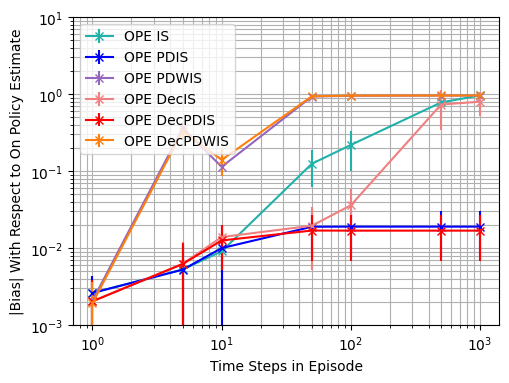

In [ ]:
biases_1 = {
    'On Policy': [0, 0, 0, 0, 0, 0, 0],
    'OPE IS': [0.005617999999999946, 0.01593999808416523, 0.016214332139886628, 0.1186560549910358, 0.2881700708844702, 0.7615873212950264, 0.9655614398819687],
    'OPE PDIS': [0.005617999999999946, 0.014664616221601345, 0.021340827919191754, 0.036543241818469116, 0.03713757399415847, 0.037147504200951434, 0.037147504200951434],
    'OPE PDWIS': [0.004836849549354922, 0.356526938760664, 0.11688423524814458, 0.9347691830572543, 0.9557965278951741, 0.9610859779189991, 0.9611753404123442],
    'OPE DecIS': [0.005126000000000132, 0.016706249093440068, 0.02143436821532814, 0.03937279927831311, 0.01617565092665992, 0.5461957265848361, 0.9583162151628057],
    'OPE DecPDIS': [0.005126000000000132, 0.01588254543904002, 0.021738477867387935, 0.030207994707863603, 0.03015050121524119, 0.03014796805664275, 0.03014796805664275],
    'OPE DecPDWIS': [0.004788547654547264, 0.20855303996488164, 0.248236276607738, 0.9774999529740068, 0.9776494778763717, 0.9680038816647213, 0.9667902920292101]
}

biases_2 = {
    'On Policy': [0, 0, 0, 0, 0, 0, 0],
    'OPE IS': [0.0009592000000001777, 0.0004761530238017789, 0.002568238339125859, 0.00487864567426269, 0.08942198315405153, 0.9513346536852988, 0.9512440499096217],
    'OPE PDIS': [0.0009592000000001777, 0.0014829064309743458, 0.0010541599924270883, 0.0042854708239779245, 0.003889290407681131, 0.0038872162422408894, 0.0038872162422408894],
    'OPE PDWIS': [0.0011908941561197997, 0.36754184722450645, 0.10989576094868027, 0.9200082170648259, 0.9413285652419996, 0.9466393758368853, 0.946680237281941],
    'OPE DecIS': [0.0006160000000001086, 0.0005602770608000064, 0.008910100283574491, 0.0031555806019978373, 0.004701088704383657, 0.44378790924141803, 0.23867981220994305],
    'OPE DecPDIS': [0.0006160000000001086, 0.0017612545711997783, 0.004242931625112943, 0.012162087889322028, 0.012269699370356659, 0.012270422861479184, 0.012270422861479184],
    'OPE DecPDWIS': [0.0008833091203760872, 0.3675113434319009, 0.10955732639851418, 0.9198856511942808, 0.9415595627697153, 0.9486336796391625, 0.9489551613480364]
}

biases_3 = {
    'On Policy': [0, 0, 0, 0, 0, 0, 0],
    'OPE IS': [0.0037083999999999897, 0.004556455117371318, 0.002102630047864509, 0.15004655011645499, 0.40892551983724096, 0.9479647488760381, 0.9623990302085949],
    'OPE PDIS': [0.0037083999999999897, 0.00040344933130104054, 0.0008561581036992577, 0.013055774221999432, 0.013142988421162178, 0.013146790901049008, 0.013146790901049008],
    'OPE PDWIS': [0.0030023158136312715, 0.3611006745186474, 0.11603723669792457, 0.9308506616342656, 0.9522940438349063, 0.9576187071371303, 0.9576293938187517],
    'OPE DecIS': [0.003022000000000132, 0.006837816987200154, 0.00940075781767928, 0.004056603388106606, 0.0518481156647316, 0.7954801190097724, 0.9629043155916965],
    'OPE DecPDIS': [0.003022000000000132, 0.003961468366400073, 0.008138859854806734, 0.0051206017934161945, 0.005131014453909762, 0.00513091803937189, 0.00513091803937189],
    'OPE DecPDWIS': [0.002773370400341046, 0.36032141499520187, 0.11668559944654712, 0.9309991420321599, 0.9526852421834773, 0.9597330388491754, 0.9599871915874297]
}

biases_4 = {
    'On Policy': [0, 0, 0, 0, 0, 0, 0],
    'OPE IS': [0.0011331999999999974, 0.004991131503733294, 0.01409414305221779, 0.17707548923356664, 0.11082775127262263, 0.24845910698861115, 0.9607902192823811],
    'OPE PDIS': [0.0011331999999999974, 0.00885969934940025, 0.02039274643933336, 0.0245671221143447, 0.025102304413861798, 0.02509549103488441, 0.02509549103488441],
    'OPE PDWIS': [8.612592551056343e-05, 0.36858665792223155, 0.10930953241150891, 0.9291681390575038, 0.9506323725646739, 0.9560796950332041, 0.956094110551096],
    'OPE DecIS': [0.00032200000000029454, 0.006669941647039899, 0.021866429919210867, 0.03056433566700483, 0.06172553389576923, 0.4188636869376686, 0.9471171535408619],
    'OPE DecPDIS': [0.00032200000000029454, 0.008787711477439767, 0.021158099812852816, 0.027444455184550718, 0.027417805542739173, 0.02741712434677483, 0.02741712434677483],
    'OPE DecPDWIS': [0.00034149201204166084, 0.36850400425283747, 0.109170529081428, 0.9289989845471514, 0.9507369077418532, 0.9580679521119434, 0.958381942782638]
}

biases_5 = {
    'On Policy': [0, 0, 0, 0, 0, 0, 0],
    'OPE IS': [0.001666000000000114, 0.00048115107432479076, 0.010382816324471284, 0.17330010836825172, 0.195514078040176, 0.9890092170849983, 0.9673039631910081],
    'OPE PDIS': [0.001666000000000114, 0.0008510388837625337, 0.006329711708629536, 0.016303030612692906, 0.015782265653548316, 0.015779286307165456, 0.015779286307165456],
    'OPE PDWIS': [0.001262689417771112, 0.3647899742981242, 0.11602241572155683, 0.9378671455122498, 0.9593802638663901, 0.9644834714737934, 0.96453384157805],
    'OPE DecIS': [0.0011020000000000695, 0.0005711483392022182, 0.008022379856316608, 0.02059292536394033, 0.045450533461282264, 1.4567785730449059, 0.8838427552466671],
    'OPE DecPDIS': [0.0011020000000000695, 0.0007311281151992915, 0.0075886109177223495, 0.009666426752592761, 0.009371177939304098, 0.009371860708582752, 0.009371860708582752],
    'OPE DecPDWIS': [0.0008585694941850743, 0.3644739469069759, 0.11609510696597464, 0.9377049128395802, 0.959350808407206, 0.9663573826575942, 0.966677626664296]
}

biases = [biases_1, biases_2, biases_3, biases_4, biases_5]

plot_graphs(biases, 'bias', 10**(-3), 10**(1))

#### Variance

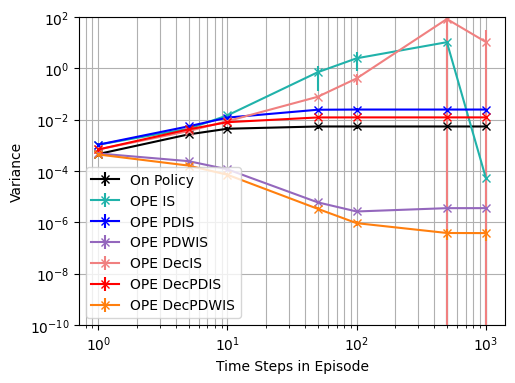

In [ ]:
vars1 = {
    'On Policy': [0.0005050539000000011, 0.0024140799547507706, 0.0033854315368874676, 0.003605055896225766, 0.0036163022609489582, 0.0036162652990522075, 0.0036162652990522075],
    'OPE IS': [0.0010536353279999994, 0.004911359230744995, 0.016989622230850304, 0.4606046850393696, 1.3685006219402234, 2.4548891761020957, 2.3174817061251502e-08],
    'OPE PDIS': [0.0010536353279999994, 0.005737471478717864, 0.012520332884799167, 0.025133359770007583, 0.02544926612372549, 0.025451975950004625, 0.025451975950004625],
    'OPE PDWIS': [0.0004746848290908113, 0.0002523462110857158, 0.00012293785897115123, 6.496449768149886e-06, 2.5591034433977676e-06, 3.630414326956883e-06, 3.4620435771052367e-06],
    'OPE DecIS': [0.000720041904, 0.0039026319632863475, 0.009118406588726674, 0.08360112939303128, 0.6669114009117796, 10.347906962695772, 0.03807641977497115],
    'OPE DecPDIS': [0.000720041904, 0.00440629209365601, 0.008919912414572543, 0.014208339071870532, 0.014308210364699423, 0.014308788073800309, 0.014308788073800309],
    'OPE DecPDWIS': [0.00045701952208590876, 0.00011647982455398007, 5.300047328520766e-05, 2.260328018001505e-06, 5.582362587428507e-07, 2.2264852093902185e-08, 5.568505272155559e-09]
}

vars2 = {
    'On Policy': [0.0005140964000000006, 0.0032839285819994766, 0.005307600585015568, 0.006203402521767864, 0.006209693764952186, 0.006209703649988482, 0.006209703649988482],
    'OPE IS': [0.0010085433753599983, 0.003415702135728756, 0.012127030859989613, 0.7389867518110331, 3.32533626251027, 0.00401119039191043, 5.845698865525861e-10],
    'OPE PDIS': [0.0010085433753599983, 0.004304762816780706, 0.010076789229715393, 0.02015596699225955, 0.020413362005143324, 0.020414085163801804, 0.020414085163801804],
    'OPE PDWIS': [0.0004587317342167602, 0.00019227078326408564, 9.706684747862541e-05, 5.374444348608058e-06, 2.4433522499378375e-06, 3.438219809626704e-06, 3.4482394583515886e-06],
    'OPE DecIS': [0.0006490038240000005, 0.002545295824878018, 0.008513666350973023, 0.0736686178788248, 0.34428375039663967, 48.550963842564755, 53.2090734485514],
    'OPE DecPDIS': [0.0006490038240000005, 0.0030813031459183886, 0.007124686745027413, 0.012288617505286639, 0.01233765930759007, 0.012337145572304475, 0.012337145572304475],
    'OPE DecPDWIS': [0.00041368135928473624, 0.00013153849194122365, 6.957391627469253e-05, 3.8469896334188025e-06, 1.1843303844882467e-06, 4.5643306127226863e-07, 5.242111504709093e-07]
}

vars3 = {
    'On Policy': [0.00045966910000000064, 0.0023591641146798194, 0.004917313507308208, 0.006158712669705309, 0.00615308452420943, 0.006153106577664476, 0.006153106577664476],
    'OPE IS': [0.0008047834214400004, 0.0038365241245032627, 0.013198969359472144, 0.19251582296625672, 0.6849585117376238, 0.010859894827383153, 3.640864475911039e-10],
    'OPE PDIS': [0.0008047834214400004, 0.004789961524217084, 0.011324050875686656, 0.026005125387654, 0.02674100157133652, 0.026746087419164094, 0.026746087419164094],
    'OPE PDWIS': [0.0003699100907262516, 0.000211609258815415, 0.00010843943338774873, 5.912985899916071e-06, 3.203231046954333e-06, 4.07790136412077e-06, 4.078188119411229e-06],
    'OPE DecIS': [0.0005284287360000006, 0.0029784770380992913, 0.007669615799894724, 0.07323814849100369, 0.28061251874051013, 0.6674139911193516, 0.0021938187172822394],
    'OPE DecPDIS': [0.0005284287360000006, 0.0035180348217300913, 0.006408368045025209, 0.010620743428897102, 0.010715169196828687, 0.010715785726997551, 0.010715785726997551],
    'OPE DecPDWIS': [0.0003393598719257633, 0.00014785374117829746, 6.27305473515284e-05, 3.1501680429908734e-06, 8.635556099713058e-07, 4.676235977759411e-07, 3.9819766953759103e-07]
}

vars4 = {
    'On Policy': [0.00046190190000000087, 0.0023714123301558747, 0.004125080675271484, 0.005758728124828494, 0.005751328545767127, 0.005751353212535274, 0.005751353212535274],
    'OPE IS': [0.0013813319577599997, 0.005485391426955722, 0.017971528245385095, 1.8092719393402235, 5.42558053946697, 50.29759532448939, 1.731676582390165e-06],
    'OPE PDIS': [0.0013813319577599997, 0.006894831243653451, 0.014846624155607295, 0.028291286894270486, 0.028743897668914057, 0.028743385542308614, 0.028743385542308614],
    'OPE PDWIS': [0.0006282480219008114, 0.0002997336144393221, 0.0001430084499548716, 6.496259174165824e-06, 2.444053076367952e-06, 3.545134837718011e-06, 3.5567875907084716e-06],
    'OPE DecIS': [0.0008956229759999997, 0.004672032569601875, 0.010305465597379675, 0.09239232744498568, 0.5748008145986264, 3.4838317675839265, 0.012017865051122905],
    'OPE DecPDIS': [0.0008956229759999997, 0.0053767666770112655, 0.009870738108565015, 0.013261303799958643, 0.013276738188571374, 0.013276575340093005, 0.013276575340093005],
    'OPE DecPDWIS': [0.0005743434957283785, 0.000225555982805883, 9.661639376835615e-05, 4.186853049795288e-06, 1.1241539292248252e-06, 5.363174246352704e-07, 5.137526978342274e-07]
}

vars5 = {
    'On Policy': [0.00037272750000000033, 0.003078854904439105, 0.004662715721074837, 0.005721038879503512, 0.005721293651210189, 0.005721345712938919, 0.005721345712938919],
    'OPE IS': [0.0011017428480000003, 0.004670662261956337, 0.013915730330468406, 0.36151652562377506, 1.6371125264622237, 0.016034128901319698, 0.0002768642935848096],
    'OPE PDIS': [0.0011017428480000003, 0.006090693893243666, 0.012044148375576758, 0.023598173286470937, 0.023938358695587834, 0.02393882684497223, 0.02393882684497223],
    'OPE PDWIS': [0.0005040523770730976, 0.00026691022054434974, 0.00011623476172344255, 6.0917999674171665e-06, 2.7345015248377904e-06, 3.3472113884986933e-06, 3.5133041179809183e-06],
    'OPE DecIS': [0.0006905748959999987, 0.004030277571844623, 0.008714213136717023, 0.07067984900995135, 0.179206676843621, 359.2210212883362, 0.7116867664820488],
    'OPE DecPDIS': [0.0006905748959999987, 0.0047648915965390086, 0.0080369145543139, 0.011282179064616, 0.011360121515288566, 0.011360187554540699, 0.011360187554540699],
    'OPE DecPDWIS': [0.0004418226060180462, 0.00019931650138751324, 7.905809502654062e-05, 3.576744237126551e-06, 9.714031761377674e-07, 4.6030791261075297e-07, 4.817152118564536e-07]
}

vars = [vars1, vars2, vars3, vars4, vars5]

plot_graphs(vars, 'var', 10**(-10), 10**2)

#### MSE

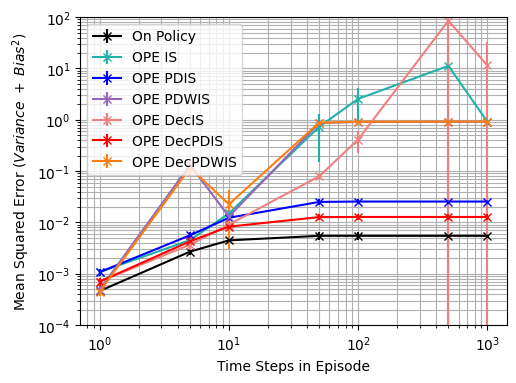

In [ ]:
MSEs1 = {
    'On Policy': [0.0005050539000000011, 0.0024140799547507706, 0.0033854315368874676, 0.003605055896225766, 0.0036163022609489582, 0.0036162652990522075, 0.0036162652990522075],
    'OPE IS': [0.0010851972519999988, 0.005165442769668186, 0.017252526797592864, 0.4746839444254053, 1.451542611693784, 3.0349044240594294, 0.9323089173617578],
    'OPE PDIS': [0.0010851972519999988, 0.005952522447644717, 0.01297576382107572, 0.026468768292610693, 0.026828465525897086, 0.02683191301836433, 0.02683191301836433],
    'OPE PDWIS': [0.0004980799426539062, 0.12736380427313596, 0.013784862308514756, 0.8737999220432948, 0.9135495618399136, 0.9236898873668458, 0.9238614970603629],
    'OPE DecIS': [0.0007463177800000014, 0.004181730722058415, 0.009577838729516943, 0.08515134671604162, 0.6671730525946807, 10.646236734435309, 0.9564463880189361],
    'OPE DecPDIS': [0.0007463177800000014, 0.004658547343279181, 0.009392473834563458, 0.015120862016140848, 0.015217263088229684, 0.01521768805174466, 0.01521768805174466],
    'OPE DecPDWIS': [0.00047994971072577887, 0.04361085030314751, 0.06167424949735863, 0.9555084183922036, 0.9557990598282009, 0.9370315371828197, 0.9346834743304308]
}

MSEs2 = {
    'On Policy': [0.0005140964000000006, 0.003283928581999479, 0.005307600585015566, 0.0062034025217678705, 0.006209693764952185, 0.006209703649988484, 0.006209703649988484],
    'OPE IS': [0.0010094634399999986, 0.0034159288574308316, 0.012133626708156169, 0.7390105529946481, 3.3333325535814735, 0.9090488136944379, 0.9048652430730287],
    'OPE PDIS': [0.0010094634399999986, 0.004306961828263731, 0.010077900483005027, 0.020174332252442716, 0.020428488585018605, 0.020429195613915745, 0.020429195613915745],
    'OPE PDWIS': [0.00046014996310784047, 0.13527928024446653, 0.012174145121968105, 0.8464204939111484, 0.8861019110928116, 0.8961295461046573, 0.8962069198996504],
    'OPE DecIS': [0.0006493832800000006, 0.0025456097352628765, 0.008593056238036377, 0.0736785755677605, 0.34430585063164615, 48.747911550953624, 53.266041501307974],
    'OPE DecPDIS': [0.0006493832800000006, 0.0030844051635829607, 0.0071426892138027965, 0.012436533887114232, 0.012488204830229001, 0.012487708849503986, 0.012487708849503986],
    'OPE DecPDWIS': [0.0004144615942868758, 0.13519612604306183, 0.012072381683865263, 0.8461934582627595, 0.886535594573482, 0.8999063145787984, 0.9005164224602282]
}

MSEs3 = {
    'On Policy': [0.00045966910000000085, 0.002359164114679819, 0.004917313507308207, 0.006158712669705306, 0.006153084524209429, 0.0061531065776644755, 0.0061531065776644755],
    'OPE IS': [0.0008185356520000003, 0.003857285407739882, 0.013203390412590327, 0.21502979016810655, 0.8521785925117815, 0.9094970599389931, 0.9262118937105303],
    'OPE PDIS': [0.0008185356520000003, 0.004790124295580012, 0.011324783882385185, 0.026175578628189825, 0.026913739715975323, 0.02691892553016, 0.02691892553016],
    'OPE PDWIS': [0.000378923990971032, 0.13060530639663756, 0.01357307973387792, 0.86648886725085, 0.9068671491544855, 0.9170376661603531, 0.9170581340937892],
    'OPE DecIS': [0.0005375612200000014, 0.0030252327792497343, 0.007757990047441382, 0.07325460452205208, 0.2833007458384935, 1.3002026108591533, 0.9293785397023957],
    'OPE DecPDIS': [0.0005375612200000014, 0.0035337280533480797, 0.006474609084761393, 0.01064696399162384, 0.010741496506154918, 0.010742112046924303, 0.010742112046924303],
    'OPE DecPDWIS': [0.0003470514553032512, 0.12997937584532276, 0.013678259665551567, 0.866762552632661, 0.9076100342298007, 0.9210879734822706, 0.92157580620959]
}

MSEs4 = {
    'On Policy': [0.00046190190000000087, 0.0023714123301558747, 0.004125080675271483, 0.005758728124828496, 0.005751328545767125, 0.005751353212535275, 0.005751353212535275],
    'OPE IS': [0.0013826160999999997, 0.005510302820643281, 0.018170173113761474, 1.8406276682275304, 5.437863329919116, 50.35932725233497, 0.9231195771452682],
    'OPE PDIS': [0.0013826160999999997, 0.0069733255162152145, 0.015262488262946239, 0.02889483038325161, 0.029374023355800243, 0.029373169212590578, 0.029373169212590578],
    'OPE PDWIS': [0.0006282554395758565, 0.13615585801271948, 0.012091582325977589, 0.8633599268987588, 0.9037043518210173, 0.9140919283896223, 0.9141195050180823],
    'OPE DecIS': [0.0008957266599999999, 0.004716520691176792, 0.010783606354791435, 0.09332650605975103, 0.5786108561333442, 3.659278555818944, 0.9090487675824674],
    'OPE DecPDIS': [0.0008957266599999999, 0.005453990550021992, 0.010318403296255657, 0.014014501920335456, 0.014028474249350832, 0.014028274047539518, 0.014028274047539518],
    'OPE DecPDWIS': [0.0005744601125226668, 0.13602075713318112, 0.012014820813687273, 0.8630433001426882, 0.9039017918964702, 0.9178947371813976, 0.9184964620045214]
}

MSEs5 = {
    'On Policy': [0.0003727275000000003, 0.0030788549044391067, 0.004662715721074836, 0.00572103887950351, 0.00572129365121019, 0.005721345712938918, 0.005721345712938918],
    'OPE IS': [0.0011045184040000006, 0.004670893768312661, 0.014023533205296113, 0.39154945318422285, 1.6753382811741238, 0.9941733603804012, 0.9359538214986158],
    'OPE PDIS': [0.0011045184040000006, 0.006091418160425342, 0.01208421362589112, 0.02386396209362934, 0.024187438604747005, 0.02418781272133573, 0.02418781272133573],
    'OPE PDWIS': [0.0005056467616388488, 0.13333863556897046, 0.013577435711589201, 0.879600874431263, 0.9204132251978692, 0.9302317139575281, 0.9303290448534288],
    'OPE DecIS': [0.0006917892999999989, 0.004030603782269997, 0.008778571715276058, 0.07110391758499617, 0.18127242783553613, 361.34322509921896, 1.4928647824840686],
    'OPE DecPDIS': [0.0006917892999999989, 0.004765426144859843, 0.008094501569974474, 0.011375618870779241, 0.011447940491258666, 0.011448019327681776, 0.011448019327681776],
    'OPE DecPDWIS': [0.0004425597475943914, 0.13304057447533657, 0.013557131956467633, 0.8792940803077218, 0.9203549449947357, 0.9338470513247485, 0.934466115608528]
}

MSEs = [MSEs1, MSEs2, MSEs3, MSEs4, MSEs5]

plot_graphs(MSEs, 'MSE', 10**(-4), 10**2)

#### ESS

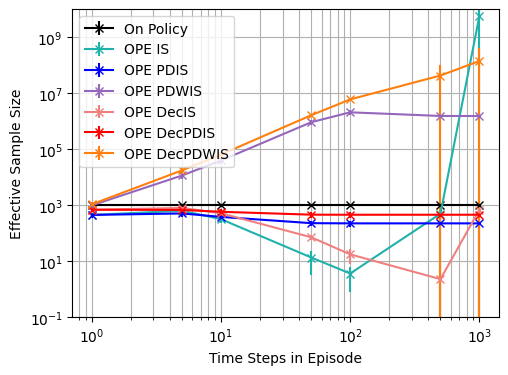

In [ ]:
vars1 = {
    'On Policy': [0.0005050539000000011, 0.0024140799547507706, 0.0033854315368874676, 0.003605055896225766, 0.0036163022609489582, 0.0036162652990522075, 0.0036162652990522075],
    'OPE IS': [0.0010536353279999994, 0.004911359230744995, 0.016989622230850304, 0.4606046850393696, 1.3685006219402234, 2.4548891761020957, 2.3174817061251502e-08],
    'OPE PDIS': [0.0010536353279999994, 0.005737471478717864, 0.012520332884799167, 0.025133359770007583, 0.02544926612372549, 0.025451975950004625, 0.025451975950004625],
    'OPE PDWIS': [0.0004746848290908113, 0.0002523462110857158, 0.00012293785897115123, 6.496449768149886e-06, 2.5591034433977676e-06, 3.630414326956883e-06, 3.4620435771052367e-06],
    'OPE DecIS': [0.000720041904, 0.0039026319632863475, 0.009118406588726674, 0.08360112939303128, 0.6669114009117796, 10.347906962695772, 0.03807641977497115],
    'OPE DecPDIS': [0.000720041904, 0.00440629209365601, 0.008919912414572543, 0.014208339071870532, 0.014308210364699423, 0.014308788073800309, 0.014308788073800309],
    'OPE DecPDWIS': [0.00045701952208590876, 0.00011647982455398007, 5.300047328520766e-05, 2.260328018001505e-06, 5.582362587428507e-07, 2.2264852093902185e-08, 5.568505272155559e-09]
}

ESS1 = calculate_ESS(vars1, 1000)

vars2 = {
    'On Policy': [0.0005140964000000006, 0.0032839285819994766, 0.005307600585015568, 0.006203402521767864, 0.006209693764952186, 0.006209703649988482, 0.006209703649988482],
    'OPE IS': [0.0010085433753599983, 0.003415702135728756, 0.012127030859989613, 0.7389867518110331, 3.32533626251027, 0.00401119039191043, 5.845698865525861e-10],
    'OPE PDIS': [0.0010085433753599983, 0.004304762816780706, 0.010076789229715393, 0.02015596699225955, 0.020413362005143324, 0.020414085163801804, 0.020414085163801804],
    'OPE PDWIS': [0.0004587317342167602, 0.00019227078326408564, 9.706684747862541e-05, 5.374444348608058e-06, 2.4433522499378375e-06, 3.438219809626704e-06, 3.4482394583515886e-06],
    'OPE DecIS': [0.0006490038240000005, 0.002545295824878018, 0.008513666350973023, 0.0736686178788248, 0.34428375039663967, 48.550963842564755, 53.2090734485514],
    'OPE DecPDIS': [0.0006490038240000005, 0.0030813031459183886, 0.007124686745027413, 0.012288617505286639, 0.01233765930759007, 0.012337145572304475, 0.012337145572304475],
    'OPE DecPDWIS': [0.00041368135928473624, 0.00013153849194122365, 6.957391627469253e-05, 3.8469896334188025e-06, 1.1843303844882467e-06, 4.5643306127226863e-07, 5.242111504709093e-07]
}

ESS2 = calculate_ESS(vars2, 1000)

vars3 = {
    'On Policy': [0.00045966910000000064, 0.0023591641146798194, 0.004917313507308208, 0.006158712669705309, 0.00615308452420943, 0.006153106577664476, 0.006153106577664476],
    'OPE IS': [0.0008047834214400004, 0.0038365241245032627, 0.013198969359472144, 0.19251582296625672, 0.6849585117376238, 0.010859894827383153, 3.640864475911039e-10],
    'OPE PDIS': [0.0008047834214400004, 0.004789961524217084, 0.011324050875686656, 0.026005125387654, 0.02674100157133652, 0.026746087419164094, 0.026746087419164094],
    'OPE PDWIS': [0.0003699100907262516, 0.000211609258815415, 0.00010843943338774873, 5.912985899916071e-06, 3.203231046954333e-06, 4.07790136412077e-06, 4.078188119411229e-06],
    'OPE DecIS': [0.0005284287360000006, 0.0029784770380992913, 0.007669615799894724, 0.07323814849100369, 0.28061251874051013, 0.6674139911193516, 0.0021938187172822394],
    'OPE DecPDIS': [0.0005284287360000006, 0.0035180348217300913, 0.006408368045025209, 0.010620743428897102, 0.010715169196828687, 0.010715785726997551, 0.010715785726997551],
    'OPE DecPDWIS': [0.0003393598719257633, 0.00014785374117829746, 6.27305473515284e-05, 3.1501680429908734e-06, 8.635556099713058e-07, 4.676235977759411e-07, 3.9819766953759103e-07]
}

ESS3 = calculate_ESS(vars3, 1000)

vars4 = {
    'On Policy': [0.00046190190000000087, 0.0023714123301558747, 0.004125080675271484, 0.005758728124828494, 0.005751328545767127, 0.005751353212535274, 0.005751353212535274],
    'OPE IS': [0.0013813319577599997, 0.005485391426955722, 0.017971528245385095, 1.8092719393402235, 5.42558053946697, 50.29759532448939, 1.731676582390165e-06],
    'OPE PDIS': [0.0013813319577599997, 0.006894831243653451, 0.014846624155607295, 0.028291286894270486, 0.028743897668914057, 0.028743385542308614, 0.028743385542308614],
    'OPE PDWIS': [0.0006282480219008114, 0.0002997336144393221, 0.0001430084499548716, 6.496259174165824e-06, 2.444053076367952e-06, 3.545134837718011e-06, 3.5567875907084716e-06],
    'OPE DecIS': [0.0008956229759999997, 0.004672032569601875, 0.010305465597379675, 0.09239232744498568, 0.5748008145986264, 3.4838317675839265, 0.012017865051122905],
    'OPE DecPDIS': [0.0008956229759999997, 0.0053767666770112655, 0.009870738108565015, 0.013261303799958643, 0.013276738188571374, 0.013276575340093005, 0.013276575340093005],
    'OPE DecPDWIS': [0.0005743434957283785, 0.000225555982805883, 9.661639376835615e-05, 4.186853049795288e-06, 1.1241539292248252e-06, 5.363174246352704e-07, 5.137526978342274e-07]
}

ESS4 = calculate_ESS(vars4, 1000)

vars5 = {
    'On Policy': [0.00037272750000000033, 0.003078854904439105, 0.004662715721074837, 0.005721038879503512, 0.005721293651210189, 0.005721345712938919, 0.005721345712938919],
    'OPE IS': [0.0011017428480000003, 0.004670662261956337, 0.013915730330468406, 0.36151652562377506, 1.6371125264622237, 0.016034128901319698, 0.0002768642935848096],
    'OPE PDIS': [0.0011017428480000003, 0.006090693893243666, 0.012044148375576758, 0.023598173286470937, 0.023938358695587834, 0.02393882684497223, 0.02393882684497223],
    'OPE PDWIS': [0.0005040523770730976, 0.00026691022054434974, 0.00011623476172344255, 6.0917999674171665e-06, 2.7345015248377904e-06, 3.3472113884986933e-06, 3.5133041179809183e-06],
    'OPE DecIS': [0.0006905748959999987, 0.004030277571844623, 0.008714213136717023, 0.07067984900995135, 0.179206676843621, 359.2210212883362, 0.7116867664820488],
    'OPE DecPDIS': [0.0006905748959999987, 0.0047648915965390086, 0.0080369145543139, 0.011282179064616, 0.011360121515288566, 0.011360187554540699, 0.011360187554540699],
    'OPE DecPDWIS': [0.0004418226060180462, 0.00019931650138751324, 7.905809502654062e-05, 3.576744237126551e-06, 9.714031761377674e-07, 4.6030791261075297e-07, 4.817152118564536e-07]
}

ESS5 = calculate_ESS(vars5, 1000)

ESS = [ESS1, ESS2, ESS3, ESS4, ESS5]

plot_graphs(ESS, 'ESS', 10**(-1), 10**10)

## Varying Trajectory Length With $\gamma = 0.9999$

### Generate Data Set

#### From behaviour policy, generate maximum length trajectory

Dataset 1

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 1.44
Start state: 0,0, start state no: 0


Dataset 2

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 1.44
Start state: 0,0, start state no: 0


Dataset 3

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 1.44
Start state: 0,0, start state no: 0


Dataset 4

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 1.44
Start state: 0,0, start state no: 0


Dataset 5

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 1.44
Start state: 0,0, start state no: 0


Dataset 6

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 1.44
Start state: 0,0, start state no: 0


Dataset 7

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 1.44
Start state: 0,0, start state no: 0


Dataset 8

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 1.44
Start state: 0,0, start state no: 0


Dataset 9

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 1.44
Start state: 0,0, start state no: 0


Dataset 10

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 1.44
Start state: 0,0, start state no: 0


Estimate on dataset 1

In [ ]:
import sys
MDP_NAME = '4-state-MDP'
sys.argv[1] = MDP_NAME
import numpy as np
import policy_estimators as pe
from load_discrete_MDP import pi_b, pi_e
from load_discrete_MDP import factored_behaviour_policies, factored_evaluation_policies, factored_state_action_maps, factored_state_abstractions, factored_Rs
from load_discrete_MDP import action_spaces, action_space_mapping
from load_datasets import load_MDP_transitions
import gc

START_STATE_NO = 0
NO_TRAJECTORIES = 10000
TRAJECTORY_LENGTH = 1000
SHORTER_D = 1.44

def evaluate_PE(RUNS, NUM_EPISODES, EPISODE_LENGTH, VERSION_NUMBER):

  estimates = np.zeros(shape=(7,RUNS))

  nf_transitions_b, nf_transitions_e, f_transitions_b, f_transitions_e = load_MDP_transitions(MDP_NAME,
                                                                                          START_STATE_NO,
                                                                                          NO_TRAJECTORIES,
                                                                                          TRAJECTORY_LENGTH,
                                                                                          SHORTER_D,
                                                                                          VERSION_NUMBER)

  # Reshape data for processing
  T, ldim = nf_transitions_b.shape[-2], nf_transitions_b.shape[-1]
  nfb = nf_transitions_b.reshape((-1, NUM_EPISODES, T, ldim))
  nfe = nf_transitions_e.reshape((-1, NUM_EPISODES, T, ldim))
  T, D, ldim = f_transitions_b.shape[-3], f_transitions_b.shape[-2], f_transitions_b.shape[-1]
  fb = f_transitions_b.reshape((-1, NUM_EPISODES, T, D, ldim))
  fe = f_transitions_e.reshape((-1, NUM_EPISODES, T, D, ldim))

  for run in range(RUNS):
      #On policy Q estimate
      estimates[0, run] = pe.on_policy_Q_estimate(nfe[run, :, :EPISODE_LENGTH, :], 0.9999)
      #Off policy IS estimate
      estimates[1, run] = pe.off_policy_IS_estimator(nfb[run, :, :EPISODE_LENGTH, :], 0.9999, pi_b, pi_e)
      #Off policy PDIS estimate
      estimates[2, run] = pe.off_policy_PDIS_estimator(nfb[run, :, :EPISODE_LENGTH, :], 0.9999, pi_b, pi_e)
      #Off policy PDWIS estimate
      estimates[3, run] = pe.off_policy_PDWIS_estimator(nfb[run, :, :EPISODE_LENGTH, :], 0.9999, pi_b, pi_e)
      #Off policy decomposed IS estimate
      estimates[4, run], _ = pe.off_policy_DecIS_estimator(fb[run, :, :EPISODE_LENGTH, :, :], 0.9999, action_spaces, factored_behaviour_policies, factored_evaluation_policies)
      #Off policy decomposed PDIS estimate
      estimates[5, run], _ = pe.off_policy_DecPDIS_estimator(fb[run, :, :EPISODE_LENGTH, :, :], 0.9999, action_spaces, factored_behaviour_policies, factored_evaluation_policies)
      #Off policy decomposed PDWIS estimate
      estimates[6, run], _ = pe.off_policy_DecPDWIS_estimator(fb[run, :, :EPISODE_LENGTH, :, :], 0.9999, action_spaces, factored_behaviour_policies, factored_evaluation_policies)

  return estimates


In [ ]:
from sklearn.metrics import mean_squared_error

def generate_graph_data(estimates):
  means = np.mean(estimates, axis=-1)
  variances = np.var(estimates, ddof=0, axis=-1)
  MSEs = mean_squared_error(estimates.T, np.full((estimates.T).shape, means[0]), multioutput='raw_values')
  biases_1 = np.sqrt(MSEs - variances)
  biases_2 = np.abs(means - np.full(means.shape, means[0]))

  print(f'Mean on policy Q estimate: {means[0]}. Variance of on policy Q estimate: {variances[0]}')
  print(f'Mean off policy IS estimate: {means[1]}. Bias1: {biases_1[1]}. Bias2: {biases_2[1]}. Variance: {variances[1]}. MSE: {MSEs[1]}')
  print(f'Mean off policy PDIS estimate: {means[2]}. Bias1: {biases_1[2]}. Bias2: {biases_2[2]} Variance: {variances[2]}. MSE: {MSEs[2]}')
  print(f'Mean off policy PDWIS estimate: {means[3]}. Bias1: {biases_1[3]}. Bias2: {biases_2[3]}. Variance: {variances[3]}. MSE: {MSEs[3]}')
  print(f'Mean off policy DecIS estimate: {means[4]}. Bias1: {biases_1[4]}. Bias2: {biases_2[4]}. Variance: {variances[4]}. MSE: {MSEs[4]}')
  print(f'Mean off policy DecPDIS estimate: {means[5]}. Bias1: {biases_1[5]}. Bias2: {biases_2[5]}. Variance: {variances[5]}. MSE: {MSEs[5]}')
  print(f'Mean off policy DecPDWIS estimate: {means[6]}. Bias1: {biases_1[6]}. Bias2: {biases_2[6]}. Variance: {variances[6]}. MSE: {MSEs[6]}')

  return means, variances, MSEs, biases_1, biases_2

### Run Estimates on Collected Data Sets

#### 100 runs, 1000 episodes, trajectory length 1

In [ ]:
e_1 = evaluate_PE(10, 1000, 1, 1)
gc.collect()
e_2 = evaluate_PE(10, 1000, 1, 2)
gc.collect()
e_3 = evaluate_PE(10, 1000, 1, 3)
gc.collect()
e_4 = evaluate_PE(10, 1000, 1, 4)
gc.collect()
e_5 = evaluate_PE(10, 1000, 1, 5)
gc.collect()
e_6 = evaluate_PE(10, 1000, 1, 6)
gc.collect()
e_7 = evaluate_PE(10, 1000, 1, 7)
gc.collect()
e_8 = evaluate_PE(10, 1000, 1, 8)
gc.collect()
e_9 = evaluate_PE(10, 1000, 1, 9)
gc.collect()
e_10 = evaluate_PE(10, 1000, 1, 10)
gc.collect()
estimates = np.concatenate((e_1, e_2, e_3, e_4, e_5, e_6, e_7, e_8, e_9, e_10), axis=-1)
print(estimates.shape)

(7, 100)


In [ ]:
means, variances, MSEs, biases_1, biases_2 = generate_graph_data(estimates)

Mean on policy Q estimate: 1.19799. Variance of on policy Q estimate: 0.0004401699000000008
Mean off policy IS estimate: 1.1978688. Bias1: 0.00012120000000042222. Bias2: 0.00012120000000015452. Variance: 0.0011587752345599994. MSE: 0.0011587899239999995
Mean off policy PDIS estimate: 1.1978688. Bias1: 0.00012120000000042222. Bias2: 0.00012120000000015452 Variance: 0.0011587752345599994. MSE: 0.0011587899239999995
Mean off policy PDWIS estimate: 1.198310351851159. Bias1: 0.00032035185115889247. Bias2: 0.00032035185115897313. Variance: 0.0005263950665434575. MSE: 0.0005264976918519984
Mean off policy DecIS estimate: 1.1985839999999999. Bias1: 0.000593999999999663. Bias2: 0.0005939999999997614. Variance: 0.0007487533440000003. MSE: 0.0007491061799999999
Mean off policy DecPDIS estimate: 1.1985839999999999. Bias1: 0.000593999999999663. Bias2: 0.0005939999999997614. Variance: 0.0007487533440000003. MSE: 0.0007491061799999999
Mean off policy DecPDWIS estimate: 1.1986573237709792. Bias1: 0.00

#### 100 runs, 1000 episodes, trajectory length 5

In [ ]:
e_1 = evaluate_PE(10, 1000, 5, 1)
gc.collect()
e_2 = evaluate_PE(10, 1000, 5, 2)
gc.collect()
e_3 = evaluate_PE(10, 1000, 5, 3)
gc.collect()
e_4 = evaluate_PE(10, 1000, 5, 4)
gc.collect()
e_5 = evaluate_PE(10, 1000, 5, 5)
gc.collect()
e_6 = evaluate_PE(10, 1000, 5, 6)
gc.collect()
e_7 = evaluate_PE(10, 1000, 5, 7)
gc.collect()
e_8 = evaluate_PE(10, 1000, 5, 8)
gc.collect()
e_9 = evaluate_PE(10, 1000, 5, 9)
gc.collect()
e_10 = evaluate_PE(10, 1000, 5, 10)
gc.collect()
estimates = np.concatenate((e_1, e_2, e_3, e_4, e_5, e_6, e_7, e_8, e_9, e_10), axis=-1)
print(estimates.shape)

(7, 100)


In [ ]:
means_new, variances_new, MSEs_new, biases_1_new, biases_2_new = generate_graph_data(estimates)
means = np.stack((means, means_new), axis=-1)
variances = np.stack((variances, variances_new), axis=-1)
MSEs = np.stack((MSEs, MSEs_new), axis=-1)
biases_1 = np.stack((biases_1, biases_1_new), axis=-1)
print(means)

Mean on policy Q estimate: 0.2424985042158857. Variance of on policy Q estimate: 0.005255894560626403
Mean off policy IS estimate: 0.24650986362931904. Bias1: 0.004011359413433519. Bias2: 0.004011359413433335. Variance: 0.00955542386801268. MSE: 0.009571514872356421
Mean off policy PDIS estimate: 0.24587702439102066. Bias1: 0.003378520175134603. Bias2: 0.003378520175134958 Variance: 0.01014990467423245. MSE: 0.010161319072806242
Mean off policy PDWIS estimate: 0.04946108767672455. Bias1: 0.19303741653916118. Bias2: 0.19303741653916115. Variance: 0.000423253963140163. MSE: 0.03768669814725378
Mean off policy DecIS estimate: 0.2440578209933662. Bias1: 0.0015593167774812747. Bias2: 0.0015593167774805017. Variance: 0.007176854976565561. MSE: 0.0071792864453780955
Mean off policy DecPDIS estimate: 0.24395290388435445. Bias1: 0.0014543996684678723. Bias2: 0.0014543996684687477. Variance: 0.007234099996369244. MSE: 0.007236215274764883
Mean off policy DecPDWIS estimate: 0.048967175646343286. 

#### 20 runs, 1000 episodes, trajectory length 10

In [ ]:
e_1 = evaluate_PE(10, 1000, 10, 1)
gc.collect()
e_2 = evaluate_PE(10, 1000, 10, 2)
gc.collect()
e_3 = evaluate_PE(10, 1000, 10, 3)
gc.collect()
e_4 = evaluate_PE(10, 1000, 10, 4)
gc.collect()
e_5 = evaluate_PE(10, 1000, 10, 5)
gc.collect()
e_6 = evaluate_PE(10, 1000, 10, 6)
gc.collect()
e_7 = evaluate_PE(10, 1000, 10, 7)
gc.collect()
e_8 = evaluate_PE(10, 1000, 10, 8)
gc.collect()
e_9 = evaluate_PE(10, 1000, 10, 9)
gc.collect()
e_10 = evaluate_PE(10, 1000, 10, 10)
gc.collect()
estimates = np.concatenate((e_1, e_2, e_3, e_4, e_5, e_6, e_7, e_8, e_9, e_10), axis=-1)
print(estimates.shape)

(7, 100)


In [ ]:
means_new, variances_new, MSEs_new, biases_1_new, biases_2_new = generate_graph_data(estimates)
means = np.concatenate((means, means_new[..., np.newaxis]), axis=-1)
variances = np.concatenate((variances, variances_new[..., np.newaxis]), axis=-1)
MSEs = np.concatenate((MSEs, MSEs_new[..., np.newaxis]), axis=-1)
biases_1 = np.concatenate((biases_1, biases_1_new[..., np.newaxis]), axis=-1)

Mean on policy Q estimate: -0.9576118574099419. Variance of on policy Q estimate: 0.014222942076811533
Mean off policy IS estimate: -0.9968424836270455. Bias1: 0.03923062621710431. Bias2: 0.039230626217103604. Variance: 0.04921069025863847. MSE: 0.050749732292024625
Mean off policy PDIS estimate: -0.9809911965456456. Bias1: 0.023379339135703538. Bias2: 0.02337933913570367 Variance: 0.03531711644116777. MSE: 0.03586370993959001
Mean off policy PDWIS estimate: -0.09803905786015829. Bias1: 0.8595727995497837. Bias2: 0.8595727995497836. Variance: 0.0003020063071423. MSE: 0.739167404032995
Mean off policy DecIS estimate: -0.9764310805808678. Bias1: 0.018819223170926158. Bias2: 0.01881922317092588. Variance: 0.028286072927374773. MSE: 0.028640236088131897
Mean off policy DecPDIS estimate: -0.9728025829333145. Bias1: 0.015190725523371919. Bias2: 0.015190725523372528. Variance: 0.022587814150863063. MSE: 0.022818572292789486
Mean off policy DecPDWIS estimate: -0.09717586145659944. Bias1: 0.860

#### 100 runs, 1000 episodes, trajectory length 50

In [ ]:
e_1 = evaluate_PE(10, 1000, 50, 1)
gc.collect()
e_2 = evaluate_PE(10, 1000, 50, 2)
gc.collect()
e_3 = evaluate_PE(10, 1000, 50, 3)
gc.collect()
e_4 = evaluate_PE(10, 1000, 50, 4)
gc.collect()
e_5 = evaluate_PE(10, 1000, 50, 5)
gc.collect()
e_6 = evaluate_PE(10, 1000, 50, 6)
gc.collect()
e_7 = evaluate_PE(10, 1000, 50, 7)
gc.collect()
e_8 = evaluate_PE(10, 1000, 50, 8)
gc.collect()
e_9 = evaluate_PE(10, 1000, 50, 9)
gc.collect()
e_10 = evaluate_PE(10, 1000, 50, 10)
gc.collect()
estimates = np.concatenate((e_1, e_2, e_3, e_4, e_5, e_6, e_7, e_8, e_9, e_10), axis=-1)
print(estimates.shape)

(7, 100)


In [ ]:
means_new, variances_new, MSEs_new, biases_1_new, biases_2_new = generate_graph_data(estimates)
means = np.concatenate((means, means_new[..., np.newaxis]), axis=-1)
variances = np.concatenate((variances, variances_new[..., np.newaxis]), axis=-1)
MSEs = np.concatenate((MSEs, MSEs_new[..., np.newaxis]), axis=-1)
biases_1 = np.concatenate((biases_1, biases_1_new[..., np.newaxis]), axis=-1)

Mean on policy Q estimate: -10.539694176025419. Variance of on policy Q estimate: 0.0651031706270363
Mean off policy IS estimate: -9.871288926223311. Bias1: 0.668405249802099. Bias2: 0.6684052498021078. Variance: 24.94584595500284. MSE: 25.392611532965848
Mean off policy PDIS estimate: -10.242006580936325. Bias1: 0.2976875950890971. Bias2: 0.29768759508909426 Variance: 2.34048340062941. MSE: 2.42910130489934
Mean off policy PDWIS estimate: -0.20639168021700327. Bias1: 10.333302495808418. Bias2: 10.333302495808416. Variance: 0.00030408570032958073. MSE: 106.7774445555808
Mean off policy DecIS estimate: -10.389024436351665. Bias1: 0.15066973967375305. Bias2: 0.15066973967375397. Variance: 2.0746000417298713. MSE: 2.097301412183228
Mean off policy DecPDIS estimate: -10.443875790961835. Bias1: 0.0958183850635863. Bias2: 0.09581838506358409. Variance: 0.4742533299357745. MSE: 0.4834344928519682
Mean off policy DecPDWIS estimate: -0.20882586139158263. Bias1: 10.330868314633838. Bias2: 10.330

#### 100 runs, 1000 episodes, trajectory length 100

In [ ]:
e_1 = evaluate_PE(10, 1000, 100, 1)
gc.collect()
e_2 = evaluate_PE(10, 1000, 100, 2)
gc.collect()
e_3 = evaluate_PE(10, 1000, 100, 3)
gc.collect()
e_4 = evaluate_PE(10, 1000, 100, 4)
gc.collect()
e_5 = evaluate_PE(10, 1000, 100, 5)
gc.collect()
e_6 = evaluate_PE(10, 1000, 100, 6)
gc.collect()
e_7 = evaluate_PE(10, 1000, 100, 7)
gc.collect()
e_8 = evaluate_PE(10, 1000, 100, 8)
gc.collect()
e_9 = evaluate_PE(10, 1000, 100, 9)
gc.collect()
e_10 = evaluate_PE(10, 1000, 100, 10)
gc.collect()
estimates = np.concatenate((e_1, e_2, e_3, e_4, e_5, e_6, e_7, e_8, e_9, e_10), axis=-1)
print(estimates.shape)

(7, 100)


In [ ]:
means_new, variances_new, MSEs_new, biases_1_new, biases_2_new = generate_graph_data(estimates)
means = np.concatenate((means, means_new[..., np.newaxis]), axis=-1)
variances = np.concatenate((variances, variances_new[..., np.newaxis]), axis=-1)
MSEs = np.concatenate((MSEs, MSEs_new[..., np.newaxis]), axis=-1)
biases_1 = np.concatenate((biases_1, biases_1_new[..., np.newaxis]), axis=-1)

Mean on policy Q estimate: -22.497339999493946. Variance of on policy Q estimate: 0.14382836841995053
Mean off policy IS estimate: -18.9611473384497. Bias1: 3.5361926610442582. Bias2: 3.5361926610442467. Variance: 351.1603166738157. MSE: 363.664975209839
Mean off policy PDIS estimate: -21.476873117728307. Bias1: 1.0204668817656264. Bias2: 1.020466881765639 Variance: 43.12559556863097. MSE: 44.16694822541143
Mean off policy PDWIS estimate: -0.21879035546644535. Bias1: 22.278549644027503. Bias2: 22.2785496440275. Variance: 0.0007225285017914804. MSE: 496.3344967698997
Mean off policy DecIS estimate: -21.555858087359365. Bias1: 0.9414819121345757. Bias2: 0.9414819121345808. Variance: 30.00085823683046. MSE: 30.887246427707037
Mean off policy DecPDIS estimate: -22.29723613863179. Bias1: 0.2001038608621621. Bias2: 0.20010386086215703. Variance: 3.272487789992721. MSE: 3.3125293451246645
Mean off policy DecPDWIS estimate: -0.22261801007133653. Bias1: 22.274721989422613. Bias2: 22.27472198942

#### 100 runs, 1000 episodes, trajectory length 500

In [ ]:
e_1 = evaluate_PE(10, 1000, 500, 1)
gc.collect()
e_2 = evaluate_PE(10, 1000, 500, 2)
gc.collect()
e_3 = evaluate_PE(10, 1000, 500, 3)
gc.collect()
e_4 = evaluate_PE(10, 1000, 500, 4)
gc.collect()
e_5 = evaluate_PE(10, 1000, 500, 5)
gc.collect()
e_6 = evaluate_PE(10, 1000, 500, 6)
gc.collect()
e_7 = evaluate_PE(10, 1000, 500, 7)
gc.collect()
e_8 = evaluate_PE(10, 1000, 500, 8)
gc.collect()
e_9 = evaluate_PE(10, 1000, 500, 9)
gc.collect()
e_10 = evaluate_PE(10, 1000, 500, 10)
gc.collect()
estimates = np.concatenate((e_1, e_2, e_3, e_4, e_5, e_6, e_7, e_8, e_9, e_10), axis=-1)
print(estimates.shape)

(7, 100)


In [ ]:
means_new, variances_new, MSEs_new, biases_1_new, biases_2_new = generate_graph_data(estimates)
means = np.concatenate((means, means_new[..., np.newaxis]), axis=-1)
variances = np.concatenate((variances, variances_new[..., np.newaxis]), axis=-1)
MSEs = np.concatenate((MSEs, MSEs_new[..., np.newaxis]), axis=-1)
biases_1 = np.concatenate((biases_1, biases_1_new[..., np.newaxis]), axis=-1)

Mean on policy Q estimate: -115.66859299304937. Variance of on policy Q estimate: 0.6884106519470156
Mean off policy IS estimate: -146.79927424050683. Bias1: 31.130681247451072. Bias2: 31.13068124745746. Variance: 2029860.7027251495. MSE: 2030829.8220400799
Mean off policy PDIS estimate: -104.45420333982221. Bias1: 11.214389653224904. Bias2: 11.214389653227158 Variance: 118852.58638547991. MSE: 118978.34892077427
Mean off policy PDWIS estimate: -0.2094340044242814. Bias1: 115.4591589886251. Bias2: 115.45915898862509. Variance: 0.0007737112586831516. MSE: 13330.81816807187
Mean off policy DecIS estimate: -90.43931207911596. Bias1: 25.229280913933255. Bias2: 25.229280913933408. Variance: 88443.49826830404. MSE: 89080.0148837382
Mean off policy DecPDIS estimate: -124.14809690608088. Bias1: 8.479503913031882. Bias2: 8.479503913031508. Variance: 27676.139356941734. MSE: 27748.041343552857
Mean off policy DecPDWIS estimate: -0.21895374627170267. Bias1: 115.44963924677766. Bias2: 115.44963924

<ipython-input-15-e4048996510b>:7: RuntimeWarning: invalid value encountered in sqrt
  biases_1 = np.sqrt(MSEs - variances)


#### 100 runs, 1000 episodes, trajectory length 1000

In [ ]:
e_1 = evaluate_PE(10, 1000, 1000, 1)
gc.collect()
e_2 = evaluate_PE(10, 1000, 1000, 2)
gc.collect()
e_3 = evaluate_PE(10, 1000, 1000, 3)
gc.collect()
e_4 = evaluate_PE(10, 1000, 1000, 4)
gc.collect()
e_5 = evaluate_PE(10, 1000, 1000, 5)
gc.collect()
e_6 = evaluate_PE(10, 1000, 1000, 6)
gc.collect()
e_7 = evaluate_PE(10, 1000, 1000, 7)
gc.collect()
e_8 = evaluate_PE(10, 1000, 1000, 8)
gc.collect()
e_9 = evaluate_PE(10, 1000, 1000, 9)
gc.collect()
e_10 = evaluate_PE(10, 1000, 1000, 10)
gc.collect()
estimates = np.concatenate((e_1, e_2, e_3, e_4, e_5, e_6, e_7, e_8, e_9, e_10), axis=-1)
print(estimates.shape)

(7, 100)


In [ ]:
means_new, variances_new, MSEs_new, biases_1_new, biases_2_new = generate_graph_data(estimates)
means = np.concatenate((means, means_new[..., np.newaxis]), axis=-1)
variances = np.concatenate((variances, variances_new[..., np.newaxis]), axis=-1)
MSEs = np.concatenate((MSEs, MSEs_new[..., np.newaxis]), axis=-1)
biases_1 = np.concatenate((biases_1, biases_1_new[..., np.newaxis]), axis=-1)

Mean on policy Q estimate: -227.08982951377783. Variance of on policy Q estimate: 1.12553717678261
Mean off policy IS estimate: -0.003641268685765394. Bias1: 227.08618824509205. Bias2: 227.08618824509207. Variance: 0.001257194348003088. MSE: 51568.13814887973
Mean off policy PDIS estimate: -104.9548587405025. Bias1: 122.13497077327534. Bias2: 122.13497077327533 Variance: 119226.80761546687. MSE: 134143.7587012557
Mean off policy PDWIS estimate: -0.2067960476690154. Bias1: 226.88303346610883. Bias2: 226.88303346610883. Variance: 0.0007112526419529852. MSE: 51475.9115860361
Mean off policy DecIS estimate: -7.59533655123069. Bias1: 219.4944929625471. Bias2: 219.49449296254713. Variance: 1355.3931329339634. MSE: 49533.2255738196
Mean off policy DecPDIS estimate: -158.53015478261975. Bias1: 68.55967473115825. Bias2: 68.55967473115808. Variance: 61588.66242095891. MSE: 66289.09142020113
Mean off policy DecPDWIS estimate: -0.21136663433009503. Bias1: 226.87846287944777. Bias2: 226.87846287944

#### Write out the readings dict (to copy and paste)

In [ ]:
biases_dict = {
      'On Policy': list(biases_1[0, :]),
      'OPE IS': list(biases_1[1, :]),
      'OPE PDIS': list(biases_1[2, :]),
      'OPE PDWIS': list(biases_1[3, :]),
      'OPE DecIS': list(biases_1[4, :]),
      'OPE DecPDIS': list(biases_1[5, :]),
      'OPE DecPDWIS': list(biases_1[6, :]),
  }

vars_dict = {
      'On Policy': list(variances[0, :]),
      'OPE IS': list(variances[1, :]),
      'OPE PDIS': list(variances[2, :]),
      'OPE PDWIS': list(variances[3, :]),
      'OPE DecIS': list(variances[4, :]),
      'OPE DecPDIS': list(variances[5, :]),
      'OPE DecPDWIS': list(variances[6, :]),
  }

MSEs_dict = {
      'On Policy': list(MSEs[0, :]),
      'OPE IS': list(MSEs[1, :]),
      'OPE PDIS': list(MSEs[2, :]),
      'OPE PDWIS': list(MSEs[3, :]),
      'OPE DecIS': list(MSEs[4, :]),
      'OPE DecPDIS': list(MSEs[5, :]),
      'OPE DecPDWIS': list(MSEs[6, :]),
  }

print(biases_dict)
print()
print(vars_dict)
print()
print(MSEs_dict)

{'On Policy': [0.0, 1.6130980174698654e-09, 0.0, 5.268356063861754e-09, 5.268356063861754e-09, nan, 0.0], 'OPE IS': [0.00012120000000042222, 0.004011359413433519, 0.03923062621710431, 0.668405249802099, 3.5361926610442582, 31.130681247451072, 227.08618824509205], 'OPE PDIS': [0.00012120000000042222, 0.003378520175134603, 0.023379339135703538, 0.2976875950890971, 1.0204668817656264, 11.214389653224904, 122.13497077327534], 'OPE PDWIS': [0.00032035185115889247, 0.19303741653916118, 0.8595727995497837, 10.333302495808418, 22.278549644027503, 115.4591589886251, 226.88303346610883], 'OPE DecIS': [0.000593999999999663, 0.0015593167774812747, 0.018819223170926158, 0.15066973967375305, 0.9414819121345757, 25.229280913933255, 219.4944929625471], 'OPE DecPDIS': [0.000593999999999663, 0.0014543996684678723, 0.015190725523371919, 0.0958183850635863, 0.2001038608621621, 8.479503913031882, 68.55967473115825], 'OPE DecPDWIS': [0.0006673237709789563, 0.19353132856954242, 0.8604359959533426, 10.3308683

### Plot Graphs
<a id='vs_tr_len_g_0_999'></a>
<a name="vs_tr_len_g_0_999"></a>

In [ ]:
import matplotlib.pyplot as plt

def calculate_ESS(variances, episodes):
  ESS = {}
  on_policy_vars = variances['On Policy']
  for key in variances.keys():
    ESS[key] = []
    for ind in range(len(on_policy_vars)):
      ESS[key].append(episodes * on_policy_vars[ind]/variances[key][ind])
  return ESS

def generate_mean_std(readings, legend):
  arrays = None
  for r_dict in readings:
    add_val = np.expand_dims(np.array(r_dict[legend]), axis=0)
    if arrays is None:
      arrays = add_val
    else:
      arrays = np.concatenate((arrays, add_val), axis=0)

  return np.mean(arrays, axis=0), np.std(arrays, axis=0)

def plot_graphs(readings, label, low_ylim, up_ylim):
  LENGTHS = [1, 5, 10, 50, 100, 500, 1000]

  colours = {
      'On Policy': 'k',
      'OPE IS': 'lightseagreen',
      'OPE PDIS': 'b',
      'OPE PDWIS': 'tab:purple',
      'OPE DecIS': 'lightcoral',
      'OPE DecPDIS': 'r',
      'OPE DecPDWIS': 'tab:orange'
  }

  ylabels = {
      'bias': '|Bias| With Respect to On Policy Estimate',
      'var': 'Variance',
      'MSE': 'Mean Squared Error ($Variance \ + \ Bias^2$)',
      'ESS': 'Effective Sample Size'
  }

  legend_list = ['OPE IS', 'OPE PDIS', 'OPE PDWIS', 'OPE DecIS', 'OPE DecPDIS', 'OPE DecPDWIS']

  plt.figure(figsize=(5.5,4))
  if label != 'bias':
    legend_list.insert(0,'On Policy')
  for legend in legend_list:
    mean_reading, std_reading = generate_mean_std(readings, legend)
    plt.errorbar(LENGTHS, mean_reading, yerr=std_reading, color=colours[legend], marker='x')
  plt.yscale("log")
  plt.xscale("log")
  plt.grid(visible=True, which='both', axis='both')
  plt.legend(legend_list)
  plt.xlabel('Time Steps in Episode')
  plt.ylabel(ylabels[label])
  plt.ylim([low_ylim, up_ylim])
  plt.savefig(f'{label}-vs-episode-length-discount-0-9999-policy-divergence-1-44.pdf', dpi=300)
  plt.show()

#### Bias

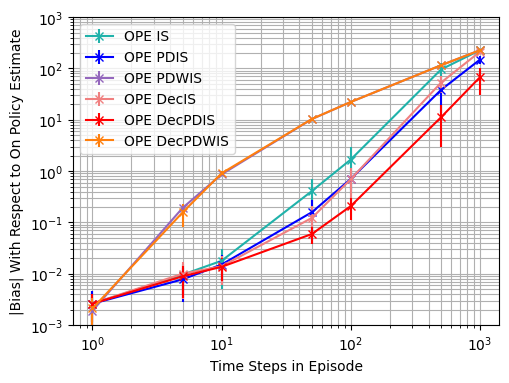

In [ ]:
biases_1 = {
    'On Policy': [0, 0, 0, 0, 0, 0, 0],
    'OPE IS': [0.002631599999999889, 0.010114874892884838, 0.009454428867013798, 0.0687490824626023, 0.14839148484285297, 114.90086440090795, 226.93592740436165],
    'OPE PDIS': [0.002631599999999889, 0.0108780530256214, 0.0027141821286192666, 0.09031444519941875, 0.5400413508964603, 58.193122590468434, 169.24348952552512],
    'OPE PDWIS': [0.0016728918551542234, 0.1848454101190434, 0.8638871601011101, 10.317925166708596, 22.253800375120193, 115.46273615257714, 226.72627820954068],
    'OPE DecIS': [0.003366000000000016, 0.004029174509512103, 0.01063404415442148, 0.25703862861600585, 0.43598138463051783, 44.452865349966885, 224.15517079884475],
    'OPE DecPDIS': [0.003366000000000016, 0.005977607113812943, 0.012749210554322751, 0.06955695549351196, 0.17982934268341927, 18.70156702627453, 88.87514108871653],
    'OPE DecPDWIS': [0.002211200590597367, 0.0061733529153157685, 1.0783443199020977, 10.54950295500921, 22.48467138083487, 115.67484171525305, 226.93724531017878]
}

biases_2 = {
    'On Policy': [0, 0, 0, 0, 0, 0, 0],
    'OPE IS': [0.004499199999999832, 0.020156210310746357, 0.008629099898575259, 0.8375057573396402, 0.6268227879226302, 112.66567201173677, 226.89555181312318],
    'OPE PDIS': [0.004499199999999832, 0.016103017417568, 0.009081072188014457, 0.2777622179598278, 0.8850266207902137, 57.83709831731246, 166.7437304300138],
    'OPE PDWIS': [0.003024464400035564, 0.20686257963406907, 0.862866987410345, 10.34638857148916, 22.2011323249631, 115.41778023011166, 226.69134462645525],
    'OPE DecIS': [0.0031719999999999075, 0.020995924529122013, 0.009488253593500154, 0.0038495927943175464, 0.41404137749463266, 67.32239281710132, 192.63263760669614],
    'OPE DecPDIS': [0.0031719999999999075, 0.017923434440357856, 0.011122543395516679, 0.05440635379013263, 0.2445911025669552, 5.408847771462307, 0.9140950398634011],
    'OPE DecPDWIS': [0.002565987130918032, 0.20726116599220953, 0.8631166114400337, 10.342696040915008, 22.195968068221607, 115.40759678645793, 226.68764124552553]
}

biases_3 = {
    'On Policy': [0, 0, 0, 0, 0, 0, 0],
    'OPE IS': [0.0005432000000006107, 0.004304029536238536, 0.026093636792282875, 0.20468839293694813, 1.1349069894155697, 105.74404675873397, 227.0253939259604],
    'OPE PDIS': [0.0005432000000006107, 0.005768968533320048, 0.02499799652180416, 0.12612258566231488, 0.2518431833846486, 5.522979361760493, 116.00537301474668],
    'OPE PDWIS': [0.00019123503858149547, 0.1960684945463451, 0.8643379058411624, 10.322543308335776, 22.210756022701084, 115.46327015609714, 226.81596061670572],
    'OPE DecIS': [0.0013760000000003173, 0.011157270838157072, 0.027048825570944037, 0.10664481028004401, 1.4774083848659236, 81.10537390369713, 222.8739916847329],
    'OPE DecPDIS': [0.0013760000000003173, 0.011391554569256158, 0.024405408545066672, 0.03027445311581484, 0.3556543804208659, 22.7612960247582, 109.62715581351077],
    'OPE DecPDWIS': [0.001012197775452302, 0.1972156786978178, 0.8644397027489391, 10.323683266770292, 22.20742266347413, 115.4622163856313, 226.81612988139423]
}

biases_4 = {
    'On Policy': [0, 0, 0, 0, 0, 0, 0],
    'OPE IS': [0.005269600000000246, 0.009603429874133292, 0.006140328142389929, 0.2699069522557569, 2.969861836619305, 113.91057254071201, 226.9694858880952],
    'OPE PDIS': [0.005269600000000246, 0.002876963343305262, 0.015556326977658684, 0.00019871601328989724, 0.828104132954865, 58.79892745450332, 168.63879491381346],
    'OPE PDWIS': [0.004322394114538348, 0.18544685606745545, 0.8731599993086671, 10.327954647267683, 22.183986001857356, 115.38293641055638, 226.7723295717466],
    'OPE DecIS': [0.004624000000000049, 0.012523384630561858, 0.0040551207841591766, 0.09486023817720016, 0.22294181760961346, 47.14924870238727, 201.28028571223297],
    'OPE DecPDIS': [0.004624000000000049, 0.007966939045257544, 0.004868850643075979, 0.04782445678915621, 0.06309680503523096, 0.7520323175068898, 69.24201153099423],
    'OPE DecPDWIS': [0.004097764413591361, 0.18444020465503166, 0.8738985205994293, 10.326500463623168, 22.17872083443948, 115.3756152537636, 226.7726571295315]
}

biases_5 = {
    'On Policy': [0, 0, 0, 0, 0, 0, 0],
    'OPE IS': [0.00012120000000042222, 0.004011359413433519, 0.03923062621710431, 0.668405249802099, 3.5361926610442582, 31.130681247451072, 227.08618824509205],
    'OPE PDIS': [0.00012120000000042222, 0.003378520175134603, 0.023379339135703538, 0.2976875950890971, 1.0204668817656264, 11.214389653224904, 122.13497077327534],
    'OPE PDWIS': [0.00032035185115889247, 0.19303741653916118, 0.8595727995497837, 10.333302495808418, 22.278549644027503, 115.4591589886251, 226.88303346610883],
    'OPE DecIS': [0.000593999999999663, 0.0015593167774812747, 0.018819223170926158, 0.15066973967375305, 0.9414819121345757, 25.229280913933255, 219.4944929625471],
    'OPE DecPDIS': [0.000593999999999663, 0.0014543996684678723, 0.015190725523371919, 0.0958183850635863, 0.2001038608621621, 8.479503913031882, 68.55967473115825],
    'OPE DecPDWIS': [0.0006673237709789563, 0.19353132856954242, 0.8604359959533426, 10.330868314633838, 22.274721989422613, 115.44963924677766, 226.87846287944777]
}

biases = [biases_1, biases_2, biases_3, biases_4, biases_5]

plot_graphs(biases, 'bias', 10**(-3), 10**(3))

#### Variance

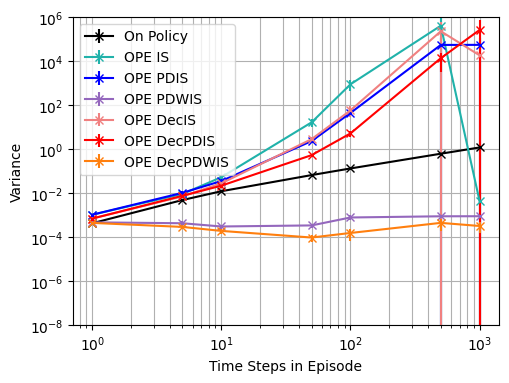

In [ ]:
vars1 = {
    'On Policy': [0.00048262590000000034, 0.004988746440832571, 0.012422568441153197, 0.06050424263412424, 0.13084274888025269, 0.6073024355396136, 0.973702274015983],
    'OPE IS': [0.000984138301439999, 0.00885089734190856, 0.04235675056733301, 20.045233950454943, 978.806344409227, 4.334278894300821, 7.13388054949085e-08],
    'OPE PDIS': [0.000984138301439999, 0.009725264971392198, 0.02625014062942845, 2.5728219882070973, 58.29352966917593, 4321.095856831917, 4324.430735282654],
    'OPE PDWIS': [0.0004429679383636798, 0.00040565078034440186, 0.00022427996093227285, 0.00034147355725012713, 0.0009422749326724862, 0.0009415265293746845, 0.0009440896968200214],
    'OPE DecIS': [0.0006805722239999995, 0.006732717877403083, 0.020097581687386554, 4.000123828451965, 43.9449061184894, 98628.35064203643, 126.25605344425745],
    'OPE DecPDIS': [0.0006805722239999995, 0.007224844478665421, 0.014787394168870456, 0.5621839048204752, 4.212964636131698, 2466.4136378762646, 22001.157941388978],
    'OPE DecPDWIS': [0.0004300058150228841, 0.00020891848853522648, 9.154689192875918e-05, 2.8290237273301252e-05, 1.4366805016358315e-05, 2.701841028454492e-06, 1.3203750041685685e-06]
}

vars2 = {
    'On Policy': [0.0003969000000000006, 0.005098951328338253, 0.011273999729722615, 0.06832610354078078, 0.11524766077341646, 0.6519587401234372, 1.357265821648704],
    'OPE IS': [0.0011722656153599997, 0.00728047082334559, 0.07241931565255341, 8.46527556595399, 851.1061166479334, 500.4088220932497, 7.828548649828689e-05],
    'OPE PDIS': [0.0011722656153599997, 0.0075442942292575236, 0.042999228736747205, 1.9703178566850854, 47.189440921039505, 4260.5128800267485, 4730.571620171879],
    'OPE PDWIS': [0.0005306136835037321, 0.00031262698396775286, 0.00038223128055293984, 0.0003168709783062671, 0.0010302104458329775, 0.0007311599716248953, 0.0007079173855149978],
    'OPE DecIS': [0.0007895144159999995, 0.005811370691952824, 0.03357464063125897, 2.408754752053863, 46.62847614814878, 909072.4181952482, 56284.55665636166],
    'OPE DecPDIS': [0.0007895144159999995, 0.005944766594619407, 0.026601254806707605, 0.47078520560374565, 5.023202006001737, 13744.270861172392, 1169455.5938247738],
    'OPE DecPDWIS': [0.000506728654168875, 0.00024346469037124114, 0.0002488380428442331, 0.0001040993391748243, 0.00014751413276063667, 0.0006911216895228388, 0.0004054626825306238]
}

vars3 = {
    'On Policy': [0.0003507756000000002, 0.004429155687269362, 0.012132787363002955, 0.07142124754651513, 0.14685435399604307, 0.5171819977798773, 1.2687550543605695],
    'OPE IS': [0.0008819906457599996, 0.008140903464919434, 0.03945159078562292, 17.28270477427942, 1686.2782623383143, 4765.293326789394, 0.0009728666229585473],
    'OPE PDIS': [0.0008819906457599996, 0.009970742621003083, 0.0279095434589741, 2.923943799537209, 45.61183600588853, 141016.69468391396, 142485.32251020244],
    'OPE PDWIS': [0.0004031263165268064, 0.00041379270014773564, 0.00024030072554643366, 0.00047022431580801417, 0.0005172821664995584, 0.001107876712316428, 0.0011939405840633557],
    'OPE DecIS': [0.0005658351839999997, 0.006774077687316012, 0.026171335141692918, 3.0479109833693796, 114.53932681493397, 7405.32996553484, 345.1839910653798],
    'OPE DecPDIS': [0.0005658351839999997, 0.007673781209216707, 0.020942529416059407, 0.629466565628392, 8.15527871240313, 2097.1212502150515, 9174.295399525108],
    'OPE DecPDWIS': [0.0003624290796936723, 0.00031430831388410844, 0.00019324406935108035, 0.0001328084791508904, 0.0002818197941579173, 0.0003585230012749569, 0.00040435643079991655]
}

vars4 = {
    'On Policy': [0.0004596404000000006, 0.0044584302146348205, 0.0108300527089378, 0.06507130064134356, 0.12487621299338882, 0.6272256355295198, 1.2305177621732974],
    'OPE IS': [0.0010005165158399993, 0.011833250557378404, 0.06071297718231716, 11.751878954114096, 560.3798255295227, 69.47323096055457, 0.018656048714519157],
    'OPE PDIS': [0.0010005165158399993, 0.014100275327781615, 0.04469681467534687, 1.839951057852058, 26.55820445577932, 3517.678373058454, 3676.418352825395],
    'OPE PDWIS': [0.0004453777443751628, 0.0005810209844829388, 0.0003727651030138872, 0.0002695761186946849, 0.0006951199182639551, 0.0008738059699786479, 0.0008946353958482157],
    'OPE DecIS': [0.0006941795039999996, 0.009170461462781393, 0.030710174537927227, 2.697588668762721, 52.7306863962106, 35943.9944836657, 33273.2286822671],
    'OPE DecPDIS': [0.0006941795039999996, 0.009649598807349242, 0.02413979013852233, 0.5265166807586109, 5.282719326832355, 21809.03260134317, 48605.568933573144],
    'OPE DecPDWIS': [0.0004414585060394465, 0.0003930546844961144, 0.00021806721067422732, 0.00011164559278265734, 0.00019228507171879902, 0.0004823739569665076, 0.0004961074872171142]
}

vars5 = {
    'On Policy': [0.0004401699000000008, 0.005255894560626403, 0.014222942076811533, 0.0651031706270363, 0.14382836841995053, 0.6884106519470156, 1.12553717678261],
    'OPE IS': [0.0011587752345599994, 0.00955542386801268, 0.04921069025863847, 24.94584595500284, 351.1603166738157, 2029860.7027251495, 0.001257194348003088],
    'OPE PDIS': [0.0011587752345599994, 0.01014990467423245, 0.03531711644116777, 2.34048340062941, 43.12559556863097, 118852.58638547991, 119226.80761546687],
    'OPE PDWIS': [0.0005263950665434575, 0.000423253963140163, 0.0003020063071423, 0.00030408570032958073, 0.0007225285017914804, 0.0007737112586831516, 0.0007112526419529852],
    'OPE DecIS': [0.0007487533440000003, 0.007176854976565561, 0.028286072927374773, 2.0746000417298713, 30.00085823683046, 88443.49826830404, 1355.3931329339634],
    'OPE DecPDIS': [0.0007487533440000003, 0.007234099996369244, 0.022587814150863063, 0.4742533299357745, 3.272487789992721, 27676.139356941734, 61588.66242095891],
    'OPE DecPDWIS': [0.0004793326900516437, 0.0002946554983425871, 0.0002070265590497668, 0.00010222383801510565, 0.00013642766529387083, 0.0006875135478530028, 0.00029576022624281035]
}

vars = [vars1, vars2, vars3, vars4, vars5]

plot_graphs(vars, 'var', 10**(-8), 10**6)

#### MSE

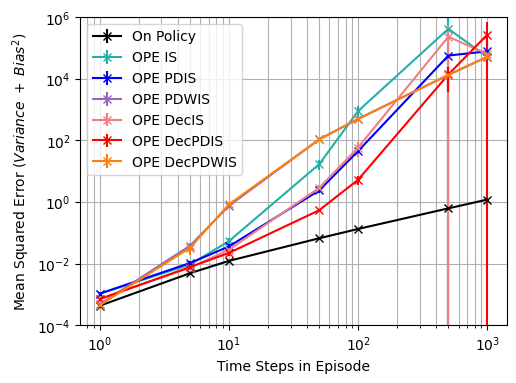

In [ ]:
MSEs1 = {
    'On Policy': [0.00048262590000000034, 0.004988746440832571, 0.012422568441153197, 0.06050424263412424, 0.13084274888025269, 0.6073024355396136, 0.973702274015983],
    'OPE IS': [0.0009910636199999983, 0.008953208036007273, 0.042446136792534436, 20.049960386794393, 978.8283644420009, 13206.542918970137, 51499.915146949046],
    'OPE PDIS': [0.0009910636199999983, 0.00984359700902043, 0.026257507414055765, 2.580978687218776, 58.585174329854006, 7707.535373661205, 32967.78948205918],
    'OPE PDWIS': [0.0004457665055227211, 0.034573476422421756, 0.7465253053484934, 106.45992121935586, 495.23257341063237, 13331.644381366172, 51404.80617483974],
    'OPE DecIS': [0.0006919021799999996, 0.0067489521246311855, 0.02021066458246474, 4.066192685052762, 44.13498588623374, 100604.40787985876, 50371.79664930353],
    'OPE DecPDIS': [0.0006919021799999996, 0.007260576265472528, 0.014949936538628911, 0.5670220748780016, 4.2453032286216486, 2816.1622471145038, 29899.948644928256],
    'OPE DecPDWIS': [0.00043489522307474225, 0.007260576265472528, 1.1629180191570463, 111.29204088798531, 505.5604614709398, 13380.669008550689, 51500.513310292634]
}

MSEs2 = {
    'On Policy': [0.0003969000000000008, 0.005098951328338255, 0.011273999729722615, 0.06832610354078077, 0.11524766077341651, 0.6519587401234369, 1.3572658216487037],
    'OPE IS': [0.0011925084159999982, 0.007686743637436628, 0.072493777017613, 9.166691459531034, 851.4990234553925, 13193.962471949497, 51481.59151086715],
    'OPE PDIS': [0.0011925084159999982, 0.007803601399208022, 0.043081694608831135, 2.0474697064110483, 47.97271304054685, 7605.642821793216, 32534.04325788899],
    'OPE PDWIS': [0.0005397610684108146, 0.04310475383682932, 0.7449216692431574, 107.04807334321978, 492.8913067209674, 13321.264724406325, 51388.966436467694],
    'OPE DecIS': [0.0007995759999999989, 0.006252199538785411, 0.03366466758751354, 2.408769571418545, 46.79990641042643, 913604.7227698683, 93391.88972767438],
    'OPE DecPDIS': [0.0007995759999999989, 0.0062660160967572135, 0.026724965778292756, 0.47374525693648273, 5.083026813456656, 13773.526495387245, 1169456.4293945157],
    'OPE DecPDWIS': [0.000513312944124912, 0.04320065561882148, 0.7452191229865704, 106.97146549409817, 492.66114599964595, 13318.914087147345, 51387.28709892277]
}

MSEs3 = {
    'On Policy': [0.00035077560000000037, 0.004429155687269362, 0.012132787363002957, 0.07142124754651513, 0.1468543539960431, 0.5171819977798773, 1.2687550543605701],
    'OPE IS': [0.0008822857120000003, 0.008159428135168248, 0.0401324686666705, 17.32460211248253, 1687.5662762129386, 15947.09675170271, 51540.53046010412],
    'OPE PDIS': [0.0008822857120000003, 0.01000402361894152, 0.028534443289078233, 2.939850706151357, 45.67526099490584, 141047.1979849444, 155942.56907849296],
    'OPE PDWIS': [0.0004031628873667877, 0.038856647253817884, 0.7473203161994327, 106.55537057678352, 493.318200382119, 13331.767863016585, 51445.48118441958],
    'OPE DecIS': [0.0005677285600000006, 0.006898562379872002, 0.026902974106460274, 3.059284098929046, 116.72206235060611, 13983.411641593355, 50018.000160551775],
    'OPE DecPDIS': [0.0005677285600000006, 0.0078035487247210475, 0.02153815338231102, 0.6303831081398537, 8.28176875071568, 2615.197846941725, 21192.408691284876],
    'OPE DecPDWIS': [0.0003634536240303029, 0.03920833223812502, 0.7474492437580254, 106.57856900107207, 493.1699031739785, 13331.523771205346, 51445.557178729934]
}

MSEs4 = {
    'On Policy': [0.00045964040000000055, 0.004458430214634823, 0.0108300527089378, 0.06507130064134356, 0.12487621299338883, 0.6272256355295198, 1.2305177621732974],
    'OPE IS': [0.001028285200000002, 0.0119254764227258, 0.06075068081201339, 11.824728716990087, 569.1999048581305, 13045.091767513368, 51515.16618035495],
    'OPE PDIS': [0.001028285200000002, 0.014108552245860337, 0.0449388139843827, 1.8399510973401119, 27.24396091079625, 6974.992242858399, 32115.46150280863],
    'OPE PDWIS': [0.00046406083525655855, 0.03497155740978648, 0.7627811494957253, 106.66691677213683, 492.12993005052135, 13313.222888528468, 51425.69035403227],
    'OPE DecIS': [0.00071556088, 0.009327296625386386, 0.030726618542501347, 2.706587133549756, 52.78038945024968, 38167.04613686527, 73786.98209866523],
    'OPE DecPDIS': [0.00071556088, 0.009713070925100091, 0.02416349584510691, 0.5288038594257888, 5.286700533638009, 21809.598153949744, 53400.02509443148],
    'OPE DecPDWIS': [0.00045825017922874225, 0.03441124377768608, 0.7639166915165454, 106.63672347080227, 491.8958501370717, 13311.533077558444, 51425.83851769554]
}

MSEs5 = {
    'On Policy': [0.0004401699000000008, 0.005255894560626405, 0.014222942076811533, 0.06510317062703633, 0.14382836841995056, 0.6884106519470155, 1.12553717678261],
    'OPE IS': [0.0011587899239999995, 0.009571514872356421, 0.050749732292024625, 25.392611532965848, 363.664975209839, 2030829.8220400799, 51568.13814887973],
    'OPE PDIS': [0.0011587899239999995, 0.010161319072806242, 0.03586370993959001, 2.42910130489934, 44.16694822541143, 118978.34892077427, 134143.7587012557],
    'OPE PDWIS': [0.0005264976918519984, 0.03768669814725378, 0.739167404032995, 106.7774445555808, 496.3344967698997, 13330.81816807187, 51475.9115860361],
    'OPE DecIS': [0.0007491061799999999, 0.0071792864453780955, 0.028640236088131897, 2.097301412183228, 30.887246427707037, 89080.0148837382, 49533.2255738196],
    'OPE DecPDIS': [0.0007491061799999999, 0.007236215274764883, 0.022818572292789486, 0.4834344928519682, 3.3125293451246645, 27748.041343552857, 66289.09142020113],
    'OPE DecPDWIS': [0.0004797780110669573, 0.03774903063623477, 0.7405571296912704, 106.7269423581434, 496.1633761337326, 13328.619889724652, 51473.83721430118]
}

MSEs = [MSEs1, MSEs2, MSEs3, MSEs4, MSEs5]

plot_graphs(MSEs, 'MSE', 10**(-4), 10**6)

#### ESS

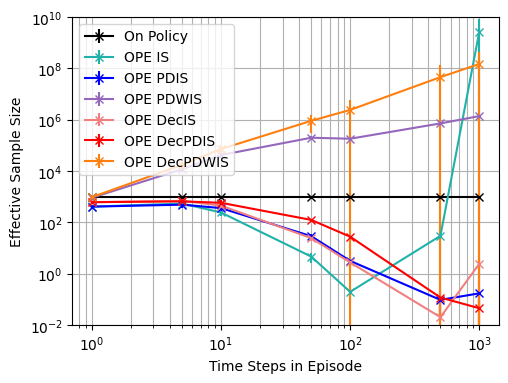

In [ ]:
vars1 = {
    'On Policy': [0.00048262590000000034, 0.004988746440832571, 0.012422568441153197, 0.06050424263412424, 0.13084274888025269, 0.6073024355396136, 0.973702274015983],
    'OPE IS': [0.000984138301439999, 0.00885089734190856, 0.04235675056733301, 20.045233950454943, 978.806344409227, 4.334278894300821, 7.13388054949085e-08],
    'OPE PDIS': [0.000984138301439999, 0.009725264971392198, 0.02625014062942845, 2.5728219882070973, 58.29352966917593, 4321.095856831917, 4324.430735282654],
    'OPE PDWIS': [0.0004429679383636798, 0.00040565078034440186, 0.00022427996093227285, 0.00034147355725012713, 0.0009422749326724862, 0.0009415265293746845, 0.0009440896968200214],
    'OPE DecIS': [0.0006805722239999995, 0.006732717877403083, 0.020097581687386554, 4.000123828451965, 43.9449061184894, 98628.35064203643, 126.25605344425745],
    'OPE DecPDIS': [0.0006805722239999995, 0.007224844478665421, 0.014787394168870456, 0.5621839048204752, 4.212964636131698, 2466.4136378762646, 22001.157941388978],
    'OPE DecPDWIS': [0.0004300058150228841, 0.00020891848853522648, 9.154689192875918e-05, 2.8290237273301252e-05, 1.4366805016358315e-05, 2.701841028454492e-06, 1.3203750041685685e-06]
}

ESS1 = calculate_ESS(vars1, 1000)

vars2 = {
    'On Policy': [0.0003969000000000006, 0.005098951328338253, 0.011273999729722615, 0.06832610354078078, 0.11524766077341646, 0.6519587401234372, 1.357265821648704],
    'OPE IS': [0.0011722656153599997, 0.00728047082334559, 0.07241931565255341, 8.46527556595399, 851.1061166479334, 500.4088220932497, 7.828548649828689e-05],
    'OPE PDIS': [0.0011722656153599997, 0.0075442942292575236, 0.042999228736747205, 1.9703178566850854, 47.189440921039505, 4260.5128800267485, 4730.571620171879],
    'OPE PDWIS': [0.0005306136835037321, 0.00031262698396775286, 0.00038223128055293984, 0.0003168709783062671, 0.0010302104458329775, 0.0007311599716248953, 0.0007079173855149978],
    'OPE DecIS': [0.0007895144159999995, 0.005811370691952824, 0.03357464063125897, 2.408754752053863, 46.62847614814878, 909072.4181952482, 56284.55665636166],
    'OPE DecPDIS': [0.0007895144159999995, 0.005944766594619407, 0.026601254806707605, 0.47078520560374565, 5.023202006001737, 13744.270861172392, 1169455.5938247738],
    'OPE DecPDWIS': [0.000506728654168875, 0.00024346469037124114, 0.0002488380428442331, 0.0001040993391748243, 0.00014751413276063667, 0.0006911216895228388, 0.0004054626825306238]
}

ESS2 = calculate_ESS(vars2, 1000)

vars3 = {
    'On Policy': [0.0003507756000000002, 0.004429155687269362, 0.012132787363002955, 0.07142124754651513, 0.14685435399604307, 0.5171819977798773, 1.2687550543605695],
    'OPE IS': [0.0008819906457599996, 0.008140903464919434, 0.03945159078562292, 17.28270477427942, 1686.2782623383143, 4765.293326789394, 0.0009728666229585473],
    'OPE PDIS': [0.0008819906457599996, 0.009970742621003083, 0.0279095434589741, 2.923943799537209, 45.61183600588853, 141016.69468391396, 142485.32251020244],
    'OPE PDWIS': [0.0004031263165268064, 0.00041379270014773564, 0.00024030072554643366, 0.00047022431580801417, 0.0005172821664995584, 0.001107876712316428, 0.0011939405840633557],
    'OPE DecIS': [0.0005658351839999997, 0.006774077687316012, 0.026171335141692918, 3.0479109833693796, 114.53932681493397, 7405.32996553484, 345.1839910653798],
    'OPE DecPDIS': [0.0005658351839999997, 0.007673781209216707, 0.020942529416059407, 0.629466565628392, 8.15527871240313, 2097.1212502150515, 9174.295399525108],
    'OPE DecPDWIS': [0.0003624290796936723, 0.00031430831388410844, 0.00019324406935108035, 0.0001328084791508904, 0.0002818197941579173, 0.0003585230012749569, 0.00040435643079991655]
}

ESS3 = calculate_ESS(vars3, 1000)

vars4 = {
    'On Policy': [0.0004596404000000006, 0.0044584302146348205, 0.0108300527089378, 0.06507130064134356, 0.12487621299338882, 0.6272256355295198, 1.2305177621732974],
    'OPE IS': [0.0010005165158399993, 0.011833250557378404, 0.06071297718231716, 11.751878954114096, 560.3798255295227, 69.47323096055457, 0.018656048714519157],
    'OPE PDIS': [0.0010005165158399993, 0.014100275327781615, 0.04469681467534687, 1.839951057852058, 26.55820445577932, 3517.678373058454, 3676.418352825395],
    'OPE PDWIS': [0.0004453777443751628, 0.0005810209844829388, 0.0003727651030138872, 0.0002695761186946849, 0.0006951199182639551, 0.0008738059699786479, 0.0008946353958482157],
    'OPE DecIS': [0.0006941795039999996, 0.009170461462781393, 0.030710174537927227, 2.697588668762721, 52.7306863962106, 35943.9944836657, 33273.2286822671],
    'OPE DecPDIS': [0.0006941795039999996, 0.009649598807349242, 0.02413979013852233, 0.5265166807586109, 5.282719326832355, 21809.03260134317, 48605.568933573144],
    'OPE DecPDWIS': [0.0004414585060394465, 0.0003930546844961144, 0.00021806721067422732, 0.00011164559278265734, 0.00019228507171879902, 0.0004823739569665076, 0.0004961074872171142]
}

ESS4 = calculate_ESS(vars4, 1000)

vars5 = {
    'On Policy': [0.0004401699000000008, 0.005255894560626403, 0.014222942076811533, 0.0651031706270363, 0.14382836841995053, 0.6884106519470156, 1.12553717678261],
    'OPE IS': [0.0011587752345599994, 0.00955542386801268, 0.04921069025863847, 24.94584595500284, 351.1603166738157, 2029860.7027251495, 0.001257194348003088],
    'OPE PDIS': [0.0011587752345599994, 0.01014990467423245, 0.03531711644116777, 2.34048340062941, 43.12559556863097, 118852.58638547991, 119226.80761546687],
    'OPE PDWIS': [0.0005263950665434575, 0.000423253963140163, 0.0003020063071423, 0.00030408570032958073, 0.0007225285017914804, 0.0007737112586831516, 0.0007112526419529852],
    'OPE DecIS': [0.0007487533440000003, 0.007176854976565561, 0.028286072927374773, 2.0746000417298713, 30.00085823683046, 88443.49826830404, 1355.3931329339634],
    'OPE DecPDIS': [0.0007487533440000003, 0.007234099996369244, 0.022587814150863063, 0.4742533299357745, 3.272487789992721, 27676.139356941734, 61588.66242095891],
    'OPE DecPDWIS': [0.0004793326900516437, 0.0002946554983425871, 0.0002070265590497668, 0.00010222383801510565, 0.00013642766529387083, 0.0006875135478530028, 0.00029576022624281035]
}

ESS5 = calculate_ESS(vars5, 1000)

ESS = [ESS1, ESS2, ESS3, ESS4, ESS5]

plot_graphs(ESS, 'ESS', 10**(-2), 10**10)

## Policy Divergence 2.56

In [ ]:
import pandas as pd

# Set up global information
MAIN_REWARD_PATH = 'configs/4-state-MDP/evaluation-policy.csv'

HORIZONTAL_REWARD_PATH = 'configs/4-state-MDP/factorisation/horizontal/evaluation-policy.csv'

VERTICAL_REWARD_PATH = 'configs/4-state-MDP/factorisation/vertical/evaluation-policy.csv'

# Modify and write everything
main_data = [['0,0', 'up,right', 0.64],
             ['0,0', 'up,left', 0.16],
             ['0,0', 'down,right', 0.16],
             ['0,0', 'down,left', 0.04],
             ['0,1', 'up,right', 0.64],
             ['0,1', 'up,left', 0.16],
             ['0,1', 'down,right', 0.16],
             ['0,1', 'down,left', 0.04],
             ['1,0', 'up,right', 0.64],
             ['1,0', 'up,left', 0.16],
             ['1,0', 'down,right', 0.16],
             ['1,0', 'down,left', 0.04],
             ['1,1', 'up,right', 0.64],
             ['1,1', 'up,left', 0.16],
             ['1,1', 'down,right', 0.16],
             ['1,1', 'down,left', 0.04]]

main_reward_df = pd.DataFrame(main_data, columns=['state', 'action', 'probability'])
main_reward_df.to_csv(MAIN_REWARD_PATH)

horizontal_data = [['0,?', 'right', 0.8],
                   ['0,?', 'left', 0.2],
                   ['1,?', 'right', 0.8],
                   ['1,?', 'left', 0.2]]
horizontal_reward_df = pd.DataFrame(horizontal_data, columns=['state', 'action', 'probability'])
horizontal_reward_df.to_csv(HORIZONTAL_REWARD_PATH)

vertical_data = [['?,0', 'up', 0.8],
                 ['?,0', 'down', 0.2],
                 ['?,1', 'up', 0.8],
                 ['?,1', 'down', 0.2]]
vertical_reward_df = pd.DataFrame(vertical_data, columns=['state', 'action', 'probability'])
vertical_reward_df.to_csv(VERTICAL_REWARD_PATH)

### Generate Data Set

Dataset 1

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 2.56
Start state: 0,0, start state no: 0


Dataset 2

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 2.56
Start state: 0,0, start state no: 0


Dataset 3

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 2.56
Start state: 0,0, start state no: 0


Dataset 4

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 2.56
Start state: 0,0, start state no: 0


Dataset 5

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 2.56
Start state: 0,0, start state no: 0


Dataset 6

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 2.56
Start state: 0,0, start state no: 0


Dataset 7

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 2.56
Start state: 0,0, start state no: 0


Dataset 8

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 2.56
Start state: 0,0, start state no: 0


Dataset 9

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 2.56
Start state: 0,0, start state no: 0


Dataset 10

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 2.56
Start state: 0,0, start state no: 0


Estimate on dataset 1

In [ ]:
import sys
MDP_NAME = '4-state-MDP'
sys.argv[1] = MDP_NAME
import numpy as np
import policy_estimators as pe
from load_discrete_MDP import pi_b, pi_e
from load_discrete_MDP import factored_behaviour_policies, factored_evaluation_policies, factored_state_action_maps, factored_state_abstractions, factored_Rs
from load_discrete_MDP import action_spaces, action_space_mapping
from load_datasets import load_MDP_transitions
import gc

START_STATE_NO = 0
NO_TRAJECTORIES = 10000
TRAJECTORY_LENGTH = 1000
SHORTER_D = 2.56

def evaluate_PE(RUNS, NUM_EPISODES, EPISODE_LENGTH, VERSION_NUMBER):

  estimates = np.zeros(shape=(7,RUNS))

  nf_transitions_b, nf_transitions_e, f_transitions_b, f_transitions_e = load_MDP_transitions(MDP_NAME,
                                                                                          START_STATE_NO,
                                                                                          NO_TRAJECTORIES,
                                                                                          TRAJECTORY_LENGTH,
                                                                                          SHORTER_D,
                                                                                          VERSION_NUMBER)

  # Reshape data for processing
  T, ldim = nf_transitions_b.shape[-2], nf_transitions_b.shape[-1]
  nfb = nf_transitions_b.reshape((-1, NUM_EPISODES, T, ldim))
  nfe = nf_transitions_e.reshape((-1, NUM_EPISODES, T, ldim))
  T, D, ldim = f_transitions_b.shape[-3], f_transitions_b.shape[-2], f_transitions_b.shape[-1]
  fb = f_transitions_b.reshape((-1, NUM_EPISODES, T, D, ldim))
  fe = f_transitions_e.reshape((-1, NUM_EPISODES, T, D, ldim))

  for run in range(RUNS):
      #On policy Q estimate
      estimates[0, run] = pe.on_policy_Q_estimate(nfe[run, :, :EPISODE_LENGTH, :], 0.7)
      #Off policy IS estimate
      estimates[1, run] = pe.off_policy_IS_estimator(nfb[run, :, :EPISODE_LENGTH, :], 0.7, pi_b, pi_e)
      #Off policy PDIS estimate
      estimates[2, run] = pe.off_policy_PDIS_estimator(nfb[run, :, :EPISODE_LENGTH, :], 0.7, pi_b, pi_e)
      #Off policy PDWIS estimate
      estimates[3, run] = pe.off_policy_PDWIS_estimator(nfb[run, :, :EPISODE_LENGTH, :], 0.7, pi_b, pi_e)
      #Off policy decomposed IS estimate
      estimates[4, run], _ = pe.off_policy_DecIS_estimator(fb[run, :, :EPISODE_LENGTH, :, :], 0.7, action_spaces, factored_behaviour_policies, factored_evaluation_policies)
      #Off policy decomposed PDIS estimate
      estimates[5, run], _ = pe.off_policy_DecPDIS_estimator(fb[run, :, :EPISODE_LENGTH, :, :], 0.7, action_spaces, factored_behaviour_policies, factored_evaluation_policies)
      #Off policy decomposed PDWIS estimate
      estimates[6, run], _ = pe.off_policy_DecPDWIS_estimator(fb[run, :, :EPISODE_LENGTH, :, :], 0.7, action_spaces, factored_behaviour_policies, factored_evaluation_policies)

  return estimates


In [ ]:
from sklearn.metrics import mean_squared_error

def generate_graph_data(estimates):
  means = np.mean(estimates, axis=-1)
  variances = np.var(estimates, ddof=0, axis=-1)
  MSEs = mean_squared_error(estimates.T, np.full((estimates.T).shape, means[0]), multioutput='raw_values')
  biases_1 = np.sqrt(MSEs - variances)
  biases_2 = np.abs(means - np.full(means.shape, means[0]))

  print(f'Mean on policy Q estimate: {means[0]}. Variance of on policy Q estimate: {variances[0]}')
  print(f'Mean off policy IS estimate: {means[1]}. Bias1: {biases_1[1]}. Bias2: {biases_2[1]}. Variance: {variances[1]}. MSE: {MSEs[1]}')
  print(f'Mean off policy PDIS estimate: {means[2]}. Bias1: {biases_1[2]}. Bias2: {biases_2[2]} Variance: {variances[2]}. MSE: {MSEs[2]}')
  print(f'Mean off policy PDWIS estimate: {means[3]}. Bias1: {biases_1[3]}. Bias2: {biases_2[3]}. Variance: {variances[3]}. MSE: {MSEs[3]}')
  print(f'Mean off policy DecIS estimate: {means[4]}. Bias1: {biases_1[4]}. Bias2: {biases_2[4]}. Variance: {variances[4]}. MSE: {MSEs[4]}')
  print(f'Mean off policy DecPDIS estimate: {means[5]}. Bias1: {biases_1[5]}. Bias2: {biases_2[5]}. Variance: {variances[5]}. MSE: {MSEs[5]}')
  print(f'Mean off policy DecPDWIS estimate: {means[6]}. Bias1: {biases_1[6]}. Bias2: {biases_2[6]}. Variance: {variances[6]}. MSE: {MSEs[6]}')

  return means, variances, MSEs, biases_1, biases_2

### Run Estimates on Collected Data Sets

#### 100 runs, 1000 episodes, trajectory length 10

In [ ]:
e_1 = evaluate_PE(10, 1000, 10, 1)
gc.collect()
e_2 = evaluate_PE(10, 1000, 10, 2)
gc.collect()
e_3 = evaluate_PE(10, 1000, 10, 3)
gc.collect()
e_4 = evaluate_PE(10, 1000, 10, 4)
gc.collect()
e_5 = evaluate_PE(10, 1000, 10, 5)
gc.collect()
e_6 = evaluate_PE(10, 1000, 10, 6)
gc.collect()
e_7 = evaluate_PE(10, 1000, 10, 7)
gc.collect()
e_8 = evaluate_PE(10, 1000, 10, 8)
gc.collect()
e_9 = evaluate_PE(10, 1000, 10, 9)
gc.collect()
e_10 = evaluate_PE(10, 1000, 10, 10)
gc.collect()
estimates = np.concatenate((e_1, e_2, e_3, e_4, e_5, e_6, e_7, e_8, e_9, e_10), axis=-1)
print(estimates.shape)

(7, 100)


In [ ]:
_, variances, MSEs, biases, _ =  generate_graph_data(estimates);

Mean on policy Q estimate: -0.5522127887911096. Variance of on policy Q estimate: 0.0012656968663691068
Mean off policy IS estimate: -0.5334035742144336. Bias1: 0.018809214576658614. Bias2: 0.018809214576675948. Variance: 1.1710942922284502. MSE: 1.171448078781441
Mean off policy PDIS estimate: -0.5427096213204484. Bias1: 0.009503167470660396. Bias2: 0.009503167470661156 Variance: 0.08741702657678196. MSE: 0.08750733676875738
Mean off policy PDWIS estimate: -0.05174302617003487. Bias1: 0.5004697626210748. Bias2: 0.5004697626210747. Variance: 0.0004263868925789818. MSE: 0.2508963701905739
Mean off policy DecIS estimate: -0.5349846724119083. Bias1: 0.017228116379200808. Bias2: 0.017228116379201297. Variance: 0.04184207499903064. MSE: 0.04213888299300593
Mean off policy DecPDIS estimate: -0.5499091240329884. Bias1: 0.0023036647581215815. Bias2: 0.00230366475812116. Variance: 0.00992112148624339. MSE: 0.009926428357561202
Mean off policy DecPDWIS estimate: -0.05441994907040785. Bias1: 0.49

<ipython-input-17-e4048996510b>:7: RuntimeWarning: invalid value encountered in sqrt
  biases_1 = np.sqrt(MSEs - variances)


In [ ]:
print(list(biases))
print()
print(list(variances))
print()
print(list(MSEs))

[nan, 0.018809214576658614, 0.009503167470660396, 0.5004697626210748, 0.017228116379200808, 0.0023036647581215815, 0.49779283972070176]

[0.0012656968663691068, 1.1710942922284502, 0.08741702657678196, 0.0004263868925789818, 0.04184207499903064, 0.00992112148624339, 6.973753176816935e-05]

[0.0012656968663691064, 1.171448078781441, 0.08750733676875738, 0.2508963701905739, 0.04213888299300593, 0.009926428357561202, 0.24786744880896844]


#### 100 runs, 1000 episodes, trajectory length 1000

In [ ]:
e_1 = evaluate_PE(10, 1000, 1000, 1)
gc.collect()
e_2 = evaluate_PE(10, 1000, 1000, 2)
gc.collect()
e_3 = evaluate_PE(10, 1000, 1000, 3)
gc.collect()
e_4 = evaluate_PE(10, 1000, 1000, 4)
gc.collect()
e_5 = evaluate_PE(10, 1000, 1000, 5)
gc.collect()
e_6 = evaluate_PE(10, 1000, 1000, 6)
gc.collect()
e_7 = evaluate_PE(10, 1000, 1000, 7)
gc.collect()
e_8 = evaluate_PE(10, 1000, 1000, 8)
gc.collect()
e_9 = evaluate_PE(10, 1000, 1000, 9)
gc.collect()
e_10 = evaluate_PE(10, 1000, 1000, 10)
gc.collect()
estimates = np.concatenate((e_1, e_2, e_3, e_4, e_5, e_6, e_7, e_8, e_9, e_10), axis=-1)
print(estimates.shape)

(7, 100)


In [ ]:
_, variances, MSEs, biases, _ =  generate_graph_data(estimates);

Mean on policy Q estimate: -0.5522127887911096. Variance of on policy Q estimate: 0.0012656968663691068
Mean off policy IS estimate: -0.5334035742144336. Bias1: 0.018809214576658614. Bias2: 0.018809214576675948. Variance: 1.1710942922284502. MSE: 1.171448078781441
Mean off policy PDIS estimate: -0.5427096213204484. Bias1: 0.009503167470660396. Bias2: 0.009503167470661156 Variance: 0.08741702657678196. MSE: 0.08750733676875738
Mean off policy PDWIS estimate: -0.05174302617003487. Bias1: 0.5004697626210748. Bias2: 0.5004697626210747. Variance: 0.0004263868925789818. MSE: 0.2508963701905739
Mean off policy DecIS estimate: -0.5349846724119083. Bias1: 0.017228116379200808. Bias2: 0.017228116379201297. Variance: 0.04184207499903064. MSE: 0.04213888299300593
Mean off policy DecPDIS estimate: -0.5499091240329884. Bias1: 0.0023036647581215815. Bias2: 0.00230366475812116. Variance: 0.00992112148624339. MSE: 0.009926428357561202
Mean off policy DecPDWIS estimate: -0.05441994907040785. Bias1: 0.49

<ipython-input-17-e4048996510b>:7: RuntimeWarning: invalid value encountered in sqrt
  biases_1 = np.sqrt(MSEs - variances)


In [ ]:
print(list(biases))
print()
print(list(variances))
print()
print(list(MSEs))

[nan, 0.018809214576658614, 0.009503167470660396, 0.5004697626210748, 0.017228116379200808, 0.0023036647581215815, 0.49779283972070176]

[0.0012656968663691068, 1.1710942922284502, 0.08741702657678196, 0.0004263868925789818, 0.04184207499903064, 0.00992112148624339, 6.973753176816935e-05]

[0.0012656968663691064, 1.171448078781441, 0.08750733676875738, 0.2508963701905739, 0.04213888299300593, 0.009926428357561202, 0.24786744880896844]


Put all readings together to find mean and std

In [ ]:
def ESS_on_list(lst, N):
  on_policy_var  = lst[0]
  ESS_list = np.zeros(len(lst))
  ESS_list[0] = N
  for id in range(1, len(lst)):
    ESS_list[id] = (N * on_policy_var)/lst[id]
  return ESS_list

In [ ]:
import numpy as np

biases10 = np.array([
   [4.656612873077393e-10, 0.06199166186245781, 0.011311509187116773, 0.5039865698418574, 0.024367520435714603, 0.014532913004186677, 0.5013589917625663],
   [6.585445079827193e-10, 0.04637715875357937, 0.021352866172425426, 0.49675315613127213, 0.011518451136153273, 0.009460293885733915, 0.49354675448698826],
   [6.585445079827193e-10, 0.07234374534259888, 0.018368057401832262, 0.4955190965915523, 0.026801418778257483, 0.0017456852027493263, 0.4926429145868887],
   [0.0, 0.17581604424160152, 0.059763170426244426, 0.5087943204034991, 0.0011608949478422298, 0.008829922459627333, 0.5032674948523054],
   [0.0, 0.07397273872806755, 0.0322251655793423, 0.4924612873772206, 0.005937205821347086, 0.007161771786800847, 0.491900220327086]
])

vars10 = np.array([
    [0.0009813480600210209, 1.1609522502381515, 0.11523758530462155, 0.0005531260247717897, 0.05679146145869703, 0.011896199131458453, 8.120957062224061e-05],
    [0.0012338485957522941, 0.9292444195506294, 0.07636573696560156, 0.0004436109992357808, 0.0353836032621105, 0.010648484562493008, 7.279033285573702e-05],
    [0.0011259797757898985, 0.7643175154206644, 0.06680808551723069, 0.0003316386999461644, 0.040142905028413424, 0.008620379978758296, 6.048292314599581e-05],
    [0.00106861021817627, 0.5401218534159168, 0.07560319940971987, 0.0004659507338852397, 0.05103821231187631, 0.008734063816328609, 5.770357673974219e-05],
    [0.0014545643264594294, 1.6632308347691422, 0.09327879387754283, 0.00043279775503164046, 0.04587536426320679, 0.010047260147422084, 6.778387274094872e-05]
])

MSEs10 = np.array([
    [0.000981348060021021, 1.1647952163786208, 0.11536553554471178, 0.25455558860573324, 0.057385237510882, 0.012107404691845711, 0.2514420481917992],
    [0.0012338485957522946, 0.9313952604046841, 0.07682168185937907, 0.2472073091256158, 0.03551627797868645, 0.010737981722897463, 0.24366118919749521],
    [0.001125979775789899, 0.7695511329108592, 0.0671454710499477, 0.24587081378685427, 0.04086122107694096, 0.008623427395585394, 0.24275752421581054],
    [0.0010686102181762698, 0.5710331348286816, 0.0791748359491162, 0.25933761120874377, 0.051039559988956235, 0.00881203134697164, 0.25333587495165494],
    [0.0014545643264594285, 1.6687028008440732, 0.09431725517415886, 0.24295091732026108, 0.04591061467617183, 0.0100985511225483, 0.24203361063057674]
])

ESS10 = np.zeros((5,7))
for i in range(5):
  ESS10[i,:] = ESS_on_list(vars10[i,:], 1000)

print('10 Steps \n')
print('Bias:')
print(list(np.mean(biases10, axis=0)))
print(list(np.std(biases10, axis=0)))
print('\nVar:')
print(list(np.mean(vars10, axis=0)))
print(list(np.std(vars10, axis=0)))
print('\nMSE:')
print(list(np.mean(MSEs10, axis=0)))
print(list(np.std(MSEs10, axis=0)))
print('\nESS:')
print(list(np.mean(ESS10, axis=0)))
print(list(np.std(ESS10, axis=0)))

10 Steps 

Bias:
[3.5655006065463553e-10, 0.08610026978566102, 0.028604153753392238, 0.49950288606908033, 0.013957098223862935, 0.008346117267819619, 0.496543275203167]
[2.99520431263506e-10, 0.045922521025301886, 0.016972863299152506, 0.005990824277750492, 0.01007335051688986, 0.004116315734903587, 0.004778203925998418]

Var:
[0.0011728701952397826, 1.0115733746789008, 0.08545868021494331, 0.000445424842574123, 0.04584630926486081, 0.00998927752729209, 6.799405522093287e-05]
[0.00016298437435832903, 0.3839665473568848, 0.017179023065659257, 7.08955238114544e-05, 0.0075993433239075195, 0.0012266790829311865, 8.485391629927443e-06]

MSE:
[0.0011728701952397826, 1.0210955090733838, 0.08656495591546273, 0.2499844480094416, 0.046142582246327495, 0.010075879255969703, 0.24664604943746732]
[0.00016298437435832873, 0.3778681406880385, 0.016829932772700014, 0.0060412255219746405, 0.0076320720063821545, 0.001286306124580755, 0.004755207256487696]

ESS:
[1000.0, 1.2998559170367705, 14.2510193840

In [ ]:
biases1000 = np.array([
    [6.585445079827193e-10, 0.6453986103605789, 0.029294817058947195, 0.6178535150944617, 0.6453986103605789, 0.017164268160987338, 0.6304010628608739],
    [0.0, 0.6375882949306095, 0.03597207531339671, 0.6118304427182736, 0.6375882949306095, 0.009975317425048301, 0.6223914520649386],
    [0.0, 0.6372910259169537, 0.022165201210098583, 0.610367716404015, 0.6372910259169537, 0.0009345125901936039, 0.6225448641787715],
    [6.585445079827193e-10, 0.6483497817814852, 0.061088974822548076, 0.6242553109274608, 0.6483497817814852, 0.006252521332785597, 0.6326768298798883],
    [6.585445079827193e-10, 0.6373710874148822, 0.041773168809274314, 0.6082380397879007, 0.6373710874148822, 0.006396125621675115, 0.6223901188676322]
])

vars1000 = np.array([
    [0.0009804284567891761, 1.650482391671709e-276, 0.129502517783182, 0.00020767234536279373, 9.213488018276814e-122, 0.014009624908449314, 2.1073650683295533e-05],
    [0.001226706939341396, 1.1325336849086683e-289, 0.08469619385150023, 0.0001765557947894357, 1.8831812183222957e-114, 0.011566193939454093, 2.0992026546665814e-05],
    [0.0011232528594463929, 7.951779450114159e-276, 0.0981274548840903, 0.00015872870416906132, 1.8865108757456233e-117, 0.00955284273770465, 2.191061307531153e-05],
    [0.0010806817587270786, 4.2356125288538144e-279, 0.10009391135498369, 0.00018017455585762467, 6.673326956648481e-115, 0.010535589260531313, 1.993479427072554e-05],
    [0.00148080718043624, 2.0431978920022704e-281, 0.1352816627087768, 0.00019220231522375884, 6.966938722857489e-120, 0.010989922080163307, 1.5894569099142696e-05]
])

MSEs1000 = np.array([
    [0.0009804284567891766, 0.41653936625536625, 0.1303607040896992, 0.3819506384599451, 0.41653936625536625, 0.014304237009951598, 0.39742657370680284],
    [0.0012267069393413954, 0.40651883383252196, 0.08599018405385292, 0.37451304643162814, 0.40651883383252196, 0.011665700897184566, 0.3873921116300494],
    [0.0011232528594463929, 0.40613985171428346, 0.09861875102877446, 0.37270747793242115, 0.40613985171428346, 0.00955371605148588, 0.38758401852844043],
    [0.001080681758727079, 0.42035743953609944, 0.1038257741998536, 0.3898748677769983, 0.42035743953609944, 0.010574683283548252, 0.40029990586113584],
    [0.0014808071804362404, 0.4062419030724294, 0.13702666034114494, 0.37014571536025165, 0.4062419030724294, 0.011030832503131556, 0.3873853546331645]
])

ESS1000 = np.zeros((5,7))
for i in range(5):
  ESS1000[i,:] = ESS_on_list(vars1000[i,:], 1000)

print('1000 Steps \n')
print('Bias:')
print(list(np.mean(biases1000, axis=0)))
print(list(np.std(biases1000, axis=0)))
print('\nVar:')
print(list(np.mean(vars1000, axis=0)))
print(list(np.std(vars1000, axis=0)))
print('\nMSE:')
print(list(np.mean(MSEs1000, axis=0)))
print(list(np.std(MSEs1000, axis=0)))
print('\nESS:')
print(list(np.mean(ESS1000, axis=0)))
print(list(np.std(ESS1000, axis=0)))

1000 Steps 

Bias:
[3.951267047896316e-10, 0.641199760080902, 0.038058847442852976, 0.6145090049864224, 0.641199760080902, 0.008144549026137992, 0.626080865570421]
[3.2261960349397316e-10, 0.004727214225517455, 0.01325106627709848, 0.005827970467105958, 0.004727214225517455, 0.005354034456432787, 0.004514588328530793]

Var:
[0.0011783754389480567, 1.921303577258751e-276, 0.10954034811650662, 0.00018306674308053483, 5.104814967872984e-115, 0.011330834585260536, 1.9961130735028222e-05]
[0.00017062617258890316, 0.0, 0.019482426929449924, 1.6321713603019047e-05, 7.333145565043676e-115, 0.0014927292516613182, 2.1278414110374416e-06]

MSE:
[0.0011783754389480569, 0.4111594788821401, 0.11116441474266503, 0.3778383491922489, 0.4111594788821401, 0.011425833949060372, 0.3920175928719186]
[0.00017062617258890313, 0.00607388612941441, 0.019402806425377263, 0.007188168004020697, 0.00607388612941441, 0.0015954967473396308, 0.005663268868809063]

ESS:
[1000.0, 2.166305451086581e+288, 11.0488002970655

## Policy Divergence 3.61

In [ ]:
import pandas as pd

# Set up global information
MAIN_REWARD_PATH = 'configs/4-state-MDP/evaluation-policy.csv'

HORIZONTAL_REWARD_PATH = 'configs/4-state-MDP/factorisation/horizontal/evaluation-policy.csv'

VERTICAL_REWARD_PATH = 'configs/4-state-MDP/factorisation/vertical/evaluation-policy.csv'

# Modify and write everything
main_data = [['0,0', 'up,right', 0.9025],
             ['0,0', 'up,left', 0.0475],
             ['0,0', 'down,right', 0.0475],
             ['0,0', 'down,left', 0.0025],
             ['0,1', 'up,right', 0.9025],
             ['0,1', 'up,left', 0.0475],
             ['0,1', 'down,right', 0.0475],
             ['0,1', 'down,left', 0.0025],
             ['1,0', 'up,right', 0.9025],
             ['1,0', 'up,left', 0.0475],
             ['1,0', 'down,right', 0.0475],
             ['1,0', 'down,left', 0.0025],
             ['1,1', 'up,right', 0.9025],
             ['1,1', 'up,left', 0.0475],
             ['1,1', 'down,right', 0.0475],
             ['1,1', 'down,left', 0.0025]]

main_reward_df = pd.DataFrame(main_data, columns=['state', 'action', 'probability'])
main_reward_df.to_csv(MAIN_REWARD_PATH)

horizontal_data = [['0,?', 'right', 0.95],
                   ['0,?', 'left', 0.05],
                   ['1,?', 'right', 0.95],
                   ['1,?', 'left', 0.05]]
horizontal_reward_df = pd.DataFrame(horizontal_data, columns=['state', 'action', 'probability'])
horizontal_reward_df.to_csv(HORIZONTAL_REWARD_PATH)

vertical_data = [['?,0', 'up', 0.95],
                 ['?,0', 'down', 0.05],
                 ['?,1', 'up', 0.95],
                 ['?,1', 'down', 0.05]]
vertical_reward_df = pd.DataFrame(vertical_data, columns=['state', 'action', 'probability'])
vertical_reward_df.to_csv(VERTICAL_REWARD_PATH)

### Generate Data Set

Dataset 1

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 3.61
Start state: 0,0, start state no: 0


Dataset 2

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 3.61
Start state: 0,0, start state no: 0


Dataset 3

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 3.61
Start state: 0,0, start state no: 0


Dataset 4

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 3.61
Start state: 0,0, start state no: 0


Dataset 5

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 3.61
Start state: 0,0, start state no: 0


Dataset 6

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 3.61
Start state: 0,0, start state no: 0


Dataset 7

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 3.61
Start state: 0,0, start state no: 0


Dataset 8

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 3.61
Start state: 0,0, start state no: 0


Dataset 9

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 3.61
Start state: 0,0, start state no: 0


Dataset 10

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 3.61
Start state: 0,0, start state no: 0


Estimate on dataset 1

In [ ]:
import sys
MDP_NAME = '4-state-MDP'
sys.argv[1] = MDP_NAME
import numpy as np
import policy_estimators as pe
from load_discrete_MDP import pi_b, pi_e
from load_discrete_MDP import factored_behaviour_policies, factored_evaluation_policies, factored_state_action_maps, factored_state_abstractions, factored_Rs
from load_discrete_MDP import action_spaces, action_space_mapping
from load_datasets import load_MDP_transitions
import gc

START_STATE_NO = 0
NO_TRAJECTORIES = 10000
TRAJECTORY_LENGTH = 1000
SHORTER_D = 3.61

def evaluate_PE(RUNS, NUM_EPISODES, EPISODE_LENGTH, VERSION_NUMBER):

  estimates = np.zeros(shape=(7,RUNS))

  nf_transitions_b, nf_transitions_e, f_transitions_b, f_transitions_e = load_MDP_transitions(MDP_NAME,
                                                                                          START_STATE_NO,
                                                                                          NO_TRAJECTORIES,
                                                                                          TRAJECTORY_LENGTH,
                                                                                          SHORTER_D,
                                                                                          VERSION_NUMBER)

  # Reshape data for processing
  T, ldim = nf_transitions_b.shape[-2], nf_transitions_b.shape[-1]
  nfb = nf_transitions_b.reshape((-1, NUM_EPISODES, T, ldim))
  nfe = nf_transitions_e.reshape((-1, NUM_EPISODES, T, ldim))
  T, D, ldim = f_transitions_b.shape[-3], f_transitions_b.shape[-2], f_transitions_b.shape[-1]
  fb = f_transitions_b.reshape((-1, NUM_EPISODES, T, D, ldim))
  fe = f_transitions_e.reshape((-1, NUM_EPISODES, T, D, ldim))

  for run in range(RUNS):
      #On policy Q estimate
      estimates[0, run] = pe.on_policy_Q_estimate(nfe[run, :, :EPISODE_LENGTH, :], 0.7)
      #Off policy IS estimate
      estimates[1, run] = pe.off_policy_IS_estimator(nfb[run, :, :EPISODE_LENGTH, :], 0.7, pi_b, pi_e)
      #Off policy PDIS estimate
      estimates[2, run] = pe.off_policy_PDIS_estimator(nfb[run, :, :EPISODE_LENGTH, :], 0.7, pi_b, pi_e)
      #Off policy PDWIS estimate
      estimates[3, run] = pe.off_policy_PDWIS_estimator(nfb[run, :, :EPISODE_LENGTH, :], 0.7, pi_b, pi_e)
      #Off policy decomposed IS estimate
      estimates[4, run], _ = pe.off_policy_DecIS_estimator(fb[run, :, :EPISODE_LENGTH, :, :], 0.7, action_spaces, factored_behaviour_policies, factored_evaluation_policies)
      #Off policy decomposed PDIS estimate
      estimates[5, run], _ = pe.off_policy_DecPDIS_estimator(fb[run, :, :EPISODE_LENGTH, :, :], 0.7, action_spaces, factored_behaviour_policies, factored_evaluation_policies)
      #Off policy decomposed PDWIS estimate
      estimates[6, run], _ = pe.off_policy_DecPDWIS_estimator(fb[run, :, :EPISODE_LENGTH, :, :], 0.7, action_spaces, factored_behaviour_policies, factored_evaluation_policies)

  return estimates


In [ ]:
from sklearn.metrics import mean_squared_error

def generate_graph_data(estimates):
  means = np.mean(estimates, axis=-1)
  variances = np.var(estimates, ddof=0, axis=-1)
  MSEs = mean_squared_error(estimates.T, np.full((estimates.T).shape, means[0]), multioutput='raw_values')
  biases_1 = np.sqrt(MSEs - variances)
  biases_2 = np.abs(means - np.full(means.shape, means[0]))

  print(f'Mean on policy Q estimate: {means[0]}. Variance of on policy Q estimate: {variances[0]}')
  print(f'Mean off policy IS estimate: {means[1]}. Bias1: {biases_1[1]}. Bias2: {biases_2[1]}. Variance: {variances[1]}. MSE: {MSEs[1]}')
  print(f'Mean off policy PDIS estimate: {means[2]}. Bias1: {biases_1[2]}. Bias2: {biases_2[2]} Variance: {variances[2]}. MSE: {MSEs[2]}')
  print(f'Mean off policy PDWIS estimate: {means[3]}. Bias1: {biases_1[3]}. Bias2: {biases_2[3]}. Variance: {variances[3]}. MSE: {MSEs[3]}')
  print(f'Mean off policy DecIS estimate: {means[4]}. Bias1: {biases_1[4]}. Bias2: {biases_2[4]}. Variance: {variances[4]}. MSE: {MSEs[4]}')
  print(f'Mean off policy DecPDIS estimate: {means[5]}. Bias1: {biases_1[5]}. Bias2: {biases_2[5]}. Variance: {variances[5]}. MSE: {MSEs[5]}')
  print(f'Mean off policy DecPDWIS estimate: {means[6]}. Bias1: {biases_1[6]}. Bias2: {biases_2[6]}. Variance: {variances[6]}. MSE: {MSEs[6]}')

  return means, variances, MSEs, biases_1, biases_2

### Run Estimates on Collected Data Sets

#### 100 runs, 1000 episodes, trajectory length 10

In [ ]:
e_1 = evaluate_PE(10, 1000, 10, 1)
gc.collect()
e_2 = evaluate_PE(10, 1000, 10, 2)
gc.collect()
e_3 = evaluate_PE(10, 1000, 10, 3)
gc.collect()
e_4 = evaluate_PE(10, 1000, 10, 4)
gc.collect()
e_5 = evaluate_PE(10, 1000, 10, 5)
gc.collect()
e_6 = evaluate_PE(10, 1000, 10, 6)
gc.collect()
e_7 = evaluate_PE(10, 1000, 10, 7)
gc.collect()
e_8 = evaluate_PE(10, 1000, 10, 8)
gc.collect()
e_9 = evaluate_PE(10, 1000, 10, 9)
gc.collect()
e_10 = evaluate_PE(10, 1000, 10, 10)
gc.collect()
estimates = np.concatenate((e_1, e_2, e_3, e_4, e_5, e_6, e_7, e_8, e_9, e_10), axis=-1)
print(estimates.shape)

(7, 100)


In [ ]:
_, variances, MSEs, biases, _ = generate_graph_data(estimates);

Mean on policy Q estimate: -1.9276306517717197. Variance of on policy Q estimate: 0.0005768097699562518
Mean off policy IS estimate: -1.423281040449242. Bias1: 0.5043496113224775. Bias2: 0.5043496113224777. Variance: 43.9017841271018. MSE: 44.15615265754293
Mean off policy PDIS estimate: -1.870410332448684. Bias1: 0.05722031932303247. Bias2: 0.05722031932303562 Variance: 2.7004641325384893. MSE: 2.703738297481919
Mean off policy PDWIS estimate: -0.1933833109195972. Bias1: 1.7342473408521226. Bias2: 1.7342473408521224. Variance: 0.00358406349853024. MSE: 3.0111979027511886
Mean off policy DecIS estimate: -2.192339515438843. Bias1: 0.2647088636671238. Bias2: 0.26470886366712354. Variance: 1.4165934231375104. MSE: 1.4866642056414503
Mean off policy DecPDIS estimate: -1.9690301750613182. Bias1: 0.0413995232895989. Bias2: 0.041399523289598505. Variance: 0.08201659056758269. MSE: 0.08373051109618873
Mean off policy DecPDWIS estimate: 0.1894223494556101. Bias1: 2.1170530012273296. Bias2: 2.11

In [ ]:
print(list(biases))
print()
print(list(variances))
print()
print(list(MSEs))

#### 100 runs, 1000 episodes, trajectory length 1000

In [ ]:
e_1 = evaluate_PE(10, 1000, 1000, 1)
gc.collect()
e_2 = evaluate_PE(10, 1000, 1000, 2)
gc.collect()
e_3 = evaluate_PE(10, 1000, 1000, 3)
gc.collect()
e_4 = evaluate_PE(10, 1000, 1000, 4)
gc.collect()
e_5 = evaluate_PE(10, 1000, 1000, 5)
gc.collect()
e_6 = evaluate_PE(10, 1000, 1000, 6)
gc.collect()
e_7 = evaluate_PE(10, 1000, 1000, 7)
gc.collect()
e_8 = evaluate_PE(10, 1000, 1000, 8)
gc.collect()
e_9 = evaluate_PE(10, 1000, 1000, 9)
gc.collect()
e_10 = evaluate_PE(10, 1000, 1000, 10)
gc.collect()
estimates = np.concatenate((e_1, e_2, e_3, e_4, e_5, e_6, e_7, e_8, e_9, e_10), axis=-1)
print(estimates.shape)

(7, 100)


In [ ]:
_, variances, MSEs, biases, _ = generate_graph_data(estimates);

Mean on policy Q estimate: -2.088361115520721. Variance of on policy Q estimate: 0.0005781588756925788
Mean off policy IS estimate: 0.0. Bias1: 2.088361115520721. Bias2: 2.088361115520721. Variance: 0.0. MSE: 4.3612521488189495
Mean off policy PDIS estimate: -1.90121184709963. Bias1: 0.18714926842109156. Bias2: 0.18714926842109092 Variance: 2.8462882578187076. MSE: 2.8813131064892574
Mean off policy PDWIS estimate: -0.17963022006561466. Bias1: 1.9087308954551063. Bias2: 1.9087308954551063. Variance: 0.003938845284121407. MSE: 3.6471924765489736
Mean off policy DecIS estimate: 6.2432749354506216e-276. Bias1: 2.088361115520721. Bias2: 2.088361115520721. Variance: 0.0. MSE: 4.3612521488189495
Mean off policy DecPDIS estimate: -2.1473290807772996. Bias1: 0.05896796525657847. Bias2: 0.05896796525657866. Variance: 0.14507912002798934. MSE: 0.14855634095449038
Mean off policy DecPDWIS estimate: 0.0018957117059533969. Bias1: 2.0902568272266744. Bias2: 2.0902568272266744. Variance: 5.5194214748

In [ ]:
print(list(biases))
print()
print(list(variances))
print()
print(list(MSEs))

Put all readings together to find mean and std

In [ ]:
biases10 = np.array([
   [0.0, 0.5043496113224775, 0.05722031932303247, 1.7342473408521226, 0.2647088636671238, 0.0413995232895989, 2.1170530012273296],
   [0.0, 0.3557587855366392, 0.22850445555333623, 1.7328614913362572, 0.03130656626948296, 0.009275482635261578, 1.7380011454606534],
   [0.0, 0.876125737392329, 0.29177283881903415, 1.746378506421174, 0.014876330712833228, 0.020059179516141255, 1.734663470341252],
   [2.3283064365386963e-10, 1.3220203088091957, 0.28930074707275233, 1.7386833301486841, 0.003811055122491102, 0.043761980343573245, 1.743105666307441],
   [0.0, 0.37184736276905744, 0.1092973341508551, 1.7343748489695612, 0.06636618892487127, 0.0045543512739995165, 1.7349853342264567]
])

vars10 = np.array([
    [0.0005768097699562518, 43.9017841271018, 2.7004641325384893, 0.00358406349853024, 1.4165934231375104, 0.08201659056758269, 0.00005814371104176693],
    [0.0004317861077580136, 52.22022721259074, 3.572348854885231, 0.004145438471660939, 1.2139135254082358, 0.08249465677184327, 0.00013811842874476222],
    [0.00041089568059552285, 23.24926173428131, 1.7726653604878817, 0.003541590425403622, 1.18724882934544, 0.06645774212309752, 0.00016936424991653915],
    [0.0004114366760198044, 10.790910183454649, 1.2040554893822444, 0.004073000569623792, 0.9660301031547571, 0.05343743439587864, 0.00011611053751283136],
    [0.0005170278682929799, 71.78597860534634, 6.708348958630628, 0.0037572320912001266, 0.949981237679159, 0.07046055893201997, 0.00018156009691617985]
])

MSEs10 = np.array([
    [0.0005768097699562518, 44.15615265754293, 2.703738297481919, 3.0111979027511886, 1.4866642056414503, 0.08373051109618873, 4.481971553716685],
    [0.00043178610775801353, 52.34679152607725, 3.6245631410929575, 3.006954386627778, 1.2148936264998214, 0.08258069134996031, 3.0207861000512883],
    [0.00041089568059552285, 24.01685804200256, 1.8577967499603998, 3.0533794781152546, 1.1874701345609175, 0.0668601128059583, 3.0092267195862723],
    [0.0004114366760198045, 12.53864788035861, 1.287750411639097, 3.0270927231065423, 0.9660446272959038, 0.05535254531946993, 3.0385334744506203],
    [0.0005170278682929798, 71.92424906654465, 6.720294865883112, 3.0118133488293886, 0.9543857087115707, 0.07048130104754695, 3.0103556700778062]
])

ESS10 = np.zeros((5,7))
for i in range(5):
  ESS10[i,:] = ESS_on_list(vars10[i,:], 1000)

print('10 Steps \n')
print('Bias:')
print(list(np.mean(biases10, axis=0)))
print(list(np.std(biases10, axis=0)))
print('\nVar:')
print(list(np.mean(vars10, axis=0)))
print(list(np.std(vars10, axis=0)))
print('\nMSE:')
print(list(np.mean(MSEs10, axis=0)))
print(list(np.std(MSEs10, axis=0)))
print('\nESS:')
print(list(np.mean(ESS10, axis=0)))
print(list(np.std(ESS10, axis=0)))

10 Steps 

Bias:
[4.656612873077393e-11, 0.6860203611659397, 0.19521913898380205, 1.7373091035455601, 0.07621380093936048, 0.023810103411714897, 1.8135617235126265]
[9.313225746154786e-11, 0.3691659870789623, 0.09561182877147123, 0.004937774039969131, 0.0965903377325487, 0.016146663471561837, 0.15177588471697193]

Var:
[0.00046959122052451455, 40.38963237255497, 3.191576559184895, 0.0038202650112837437, 1.1467534237450205, 0.0709733965580844, 0.00013265940482641588]
[6.633610917011844e-05, 21.48443809751744, 1.9348083139670447, 0.00024780511303841335, 0.1734036875136189, 0.01079681135526409, 4.3805885247667635e-05]

MSE:
[0.00046959122052451455, 40.9965398345052, 3.2388286932114965, 3.02208756788603, 1.1618916605419327, 0.07180103232382486, 3.3121747035765345]
[6.633610917011843e-05, 20.94514632674426, 1.9115268868862194, 0.01707274309267969, 0.19511814536595767, 0.010537747516011926, 0.5849929437396013]

ESS:
[1000.0, 0.016882225137617703, 0.19700845220598673, 123.94822818706295, 0.41

In [ ]:
biases1000 = np.array([
   [0, 2.088361115520721, 0.18714926842109156, 1.9087308954551063, 2.088361115520721, 0.05896796525657847, 2.0902568272266744],
   [2.3283064365386963e-10, 2.092315121601908, 0.12102154370311506, 1.901883087070854, 2.092315121601908, 0.002223398042328796, 1.9639092056200478],
   [0.0, 2.089333575516899, 0.39887379049541727, 1.9190012448083227, 2.089333575516899, 0.017879145488270517, 1.9615606185232313],
   [0.0, 2.0954318143461874, 0.4263019066696912, 1.909382520341515, 2.0954318143461874, 0.07324692263950011, 1.9693664896703102],
   [0.0, 2.0893304855774817, 4.600883070739011e-05, 1.9059387807119015, 2.0893304855774817, 0.04156356982349773, 1.9652348444573025]
])

vars1000 = np.array([
    [0.0005781588756925788, 0.0, 2.8462882578187076, 0.003938845284121407, 0.0, 0.14507912002798934, 5.519421474891854e-09],
    [0.0004322622296137059, 0.0, 4.215015263284239, 0.004430082115828363, 0.0, 0.1285550990000212, 0.000722470760924127],
    [0.0004106611881767584, 0.0, 1.9586130539568165, 0.004061677048971074, 0.0, 0.10719998665992496, 0.0008712999525874694],
    [0.0004127190617191273, 0.0, 1.2087121254250979, 0.004547565641544593, 0.0, 0.0798445643707111, 0.0006131037531980008],
    [0.0005117407116803092, 0.0, 6.841578247328066, 0.0041077300265436175, 0.0, 0.17921989377023537, 0.0007347616204118611]
])

MSEs1000 = np.array([
    [0.0005781588756925788, 4.3612521488189495, 2.8813131064892574, 3.6471924765489736,  4.3612521488189495, 0.14855634095449038, 4.369173609287144],
    [0.00043226222961370597, 4.3777825680840055, 4.229661477324524, 3.62158935900199, 4.3777825680840055, 0.12856004249887584, 3.857661838680091],
    [0.0004106611881767583, 4.3653147897822295, 2.1177133547009985, 3.686627454624863, 4.3653147897822295, 0.1075196505033157, 3.848591360093829],
    [0.0004127190617191272, 4.390834488574155, 1.390445441055312, 3.6502891746272605, 4.390834488574155, 0.08520967604686801, 3.8790174743895585],
    [0.0005117407116803092, 4.365301877963435, 6.841578249444878, 3.6367103658481135, 4.365301877963435, 0.18094742410670814, 3.862882755489529]
])

ESS1000 = np.zeros((5,7))
for i in range(5):
  ESS1000[i,:] = ESS_on_list(vars1000[i,:], 1000)

print('1000 Steps \n')
print('Bias:')
print(list(np.mean(biases1000, axis=0)))
print(list(np.std(biases1000, axis=0)))
print('\nVar:')
print(list(np.mean(vars1000, axis=0)))
print(list(np.std(vars1000, axis=0)))
print('\nMSE:')
print(list(np.mean(MSEs1000, axis=0)))
print(list(np.std(MSEs1000, axis=0)))
print('\nESS:')
print(list(np.mean(ESS1000, axis=0)))
print(list(np.std(ESS1000, axis=0)))

1000 Steps 

Bias:
[4.656612873077393e-11, 2.0909544225126395, 0.22667850362400452, 1.90898730567754, 2.0909544225126395, 0.03877620025003513, 1.9900655970995131]
[9.313225746154787e-11, 0.0026033861392410493, 0.16345578067229946, 0.005661525310824173, 0.0026033861392410493, 0.02598654171767373, 0.05015972994026075]

Var:
[0.0004691084133764959, 0.0, 3.4140413895625854, 0.004217180023401811, 0.0, 0.1279797327657764, 0.0005883283213085867]
[6.582248029630188e-05, 0.0, 1.9846239180094494, 0.00023156539533986846, 0.0, 0.033666204049326555, 0.0003053677751651338]

MSE:
[0.0004691084133764959, 4.372097174644555, 3.4921423258029947, 3.64848176613024, 4.372097174644555, 0.13015862682205162, 3.9634654075880307]
[6.582248029630191e-05, 0.0108922175742218, 1.9205182963238767, 0.02154896735150846, 0.0108922175742218, 0.033025640679052205, 0.20309500743836503]

ESS:
[1000.0, inf, 0.18632036680175812, 112.16008974010961, inf, 3.8405600429800217, 20950468.872941803]
[0.0, nan, 0.09417859204745281, 2

<ipython-input-30-5ecc81af7490>:6: RuntimeWarning: divide by zero encountered in double_scalars
  ESS_list[id] = (N * on_policy_var)/lst[id]
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


## Policy Divergence 4.46

In [ ]:
import pandas as pd

# Set up global information
MAIN_REWARD_PATH_B = 'configs/4-state-MDP/behaviour-policy.csv'
HORIZONTAL_REWARD_PATH_B = 'configs/4-state-MDP/factorisation/horizontal/behaviour-policy.csv'
VERTICAL_REWARD_PATH_B = 'configs/4-state-MDP/factorisation/vertical/behaviour-policy.csv'

MAIN_REWARD_PATH_E = 'configs/4-state-MDP/evaluation-policy.csv'
HORIZONTAL_REWARD_PATH_E = 'configs/4-state-MDP/factorisation/horizontal/evaluation-policy.csv'
VERTICAL_REWARD_PATH_E = 'configs/4-state-MDP/factorisation/vertical/evaluation-policy.csv'

# Modify and write evaluation
main_data = [['0,0', 'up,right', 0.9025],
             ['0,0', 'up,left', 0.0475],
             ['0,0', 'down,right', 0.0475],
             ['0,0', 'down,left', 0.0025],
             ['0,1', 'up,right', 0.9025],
             ['0,1', 'up,left', 0.0475],
             ['0,1', 'down,right', 0.0475],
             ['0,1', 'down,left', 0.0025],
             ['1,0', 'up,right', 0.9025],
             ['1,0', 'up,left', 0.0475],
             ['1,0', 'down,right', 0.0475],
             ['1,0', 'down,left', 0.0025],
             ['1,1', 'up,right', 0.9025],
             ['1,1', 'up,left', 0.0475],
             ['1,1', 'down,right', 0.0475],
             ['1,1', 'down,left', 0.0025]]

main_reward_df = pd.DataFrame(main_data, columns=['state', 'action', 'probability'])
main_reward_df.to_csv(MAIN_REWARD_PATH_E)

horizontal_data = [['0,?', 'right', 0.95],
                   ['0,?', 'left', 0.05],
                   ['1,?', 'right', 0.95],
                   ['1,?', 'left', 0.05]]
horizontal_reward_df = pd.DataFrame(horizontal_data, columns=['state', 'action', 'probability'])
horizontal_reward_df.to_csv(HORIZONTAL_REWARD_PATH_E)

vertical_data = [['?,0', 'up', 0.95],
                 ['?,0', 'down', 0.05],
                 ['?,1', 'up', 0.95],
                 ['?,1', 'down', 0.05]]
vertical_reward_df = pd.DataFrame(vertical_data, columns=['state', 'action', 'probability'])
vertical_reward_df.to_csv(VERTICAL_REWARD_PATH_E)

# Modify and write behaviour
main_data = [['0,0', 'up,right', 0.2025],
             ['0,0', 'up,left', 0.2475],
             ['0,0', 'down,right', 0.2475],
             ['0,0', 'down,left', 0.3025],
             ['0,1', 'up,right', 0.2025],
             ['0,1', 'up,left', 0.2475],
             ['0,1', 'down,right', 0.2475],
             ['0,1', 'down,left', 0.3025],
             ['1,0', 'up,right', 0.2025],
             ['1,0', 'up,left', 0.2475],
             ['1,0', 'down,right', 0.2475],
             ['1,0', 'down,left', 0.3025],
             ['1,1', 'up,right', 0.2025],
             ['1,1', 'up,left', 0.2475],
             ['1,1', 'down,right', 0.2475],
             ['1,1', 'down,left', 0.3025]]

main_reward_df = pd.DataFrame(main_data, columns=['state', 'action', 'probability'])
main_reward_df.to_csv(MAIN_REWARD_PATH_B)

horizontal_data = [['0,?', 'right', 0.45],
                   ['0,?', 'left', 0.55],
                   ['1,?', 'right', 0.45],
                   ['1,?', 'left', 0.55]]
horizontal_reward_df = pd.DataFrame(horizontal_data, columns=['state', 'action', 'probability'])
horizontal_reward_df.to_csv(HORIZONTAL_REWARD_PATH_B)

vertical_data = [['?,0', 'up', 0.45],
                 ['?,0', 'down', 0.55],
                 ['?,1', 'up', 0.45],
                 ['?,1', 'down', 0.55]]
vertical_reward_df = pd.DataFrame(vertical_data, columns=['state', 'action', 'probability'])
vertical_reward_df.to_csv(VERTICAL_REWARD_PATH_B)

### Generate Data Set

Dataset 1

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 4.4567901234567895
Start state: 0,0, start state no: 0


Dataset 2

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 4.4567901234567895
Start state: 0,0, start state no: 0


Dataset 3

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 4.4567901234567895
Start state: 0,0, start state no: 0


Dataset 4

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 4.4567901234567895
Start state: 0,0, start state no: 0


Dataset 5

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 4.4567901234567895
Start state: 0,0, start state no: 0


Dataset 6

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 4.4567901234567895
Start state: 0,0, start state no: 0


Dataset 7

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 4.4567901234567895
Start state: 0,0, start state no: 0


Dataset 8

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 4.4567901234567895
Start state: 0,0, start state no: 0


Dataset 9

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 4.4567901234567895
Start state: 0,0, start state no: 0


Dataset 10

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 4.4567901234567895
Start state: 0,0, start state no: 0


Estimate on dataset 1

In [ ]:
import sys
MDP_NAME = '4-state-MDP'
sys.argv[1] = MDP_NAME
import numpy as np
import policy_estimators as pe
from load_discrete_MDP import pi_b, pi_e
from load_discrete_MDP import factored_behaviour_policies, factored_evaluation_policies, factored_state_action_maps, factored_state_abstractions, factored_Rs
from load_discrete_MDP import action_spaces, action_space_mapping
from load_datasets import load_MDP_transitions
import gc

START_STATE_NO = 0
NO_TRAJECTORIES = 10000
TRAJECTORY_LENGTH = 1000
SHORTER_D = 4.46

def evaluate_PE(RUNS, NUM_EPISODES, EPISODE_LENGTH, VERSION_NUMBER):

  estimates = np.zeros(shape=(7,RUNS))

  nf_transitions_b, nf_transitions_e, f_transitions_b, f_transitions_e = load_MDP_transitions(MDP_NAME,
                                                                                          START_STATE_NO,
                                                                                          NO_TRAJECTORIES,
                                                                                          TRAJECTORY_LENGTH,
                                                                                          SHORTER_D,
                                                                                          VERSION_NUMBER)

  # Reshape data for processing
  T, ldim = nf_transitions_b.shape[-2], nf_transitions_b.shape[-1]
  nfb = nf_transitions_b.reshape((-1, NUM_EPISODES, T, ldim))
  nfe = nf_transitions_e.reshape((-1, NUM_EPISODES, T, ldim))
  T, D, ldim = f_transitions_b.shape[-3], f_transitions_b.shape[-2], f_transitions_b.shape[-1]
  fb = f_transitions_b.reshape((-1, NUM_EPISODES, T, D, ldim))
  fe = f_transitions_e.reshape((-1, NUM_EPISODES, T, D, ldim))

  for run in range(RUNS):
      #On policy Q estimate
      estimates[0, run] = pe.on_policy_Q_estimate(nfe[run, :, :EPISODE_LENGTH, :], 0.7)
      #Off policy IS estimate
      estimates[1, run] = pe.off_policy_IS_estimator(nfb[run, :, :EPISODE_LENGTH, :], 0.7, pi_b, pi_e)
      #Off policy PDIS estimate
      estimates[2, run] = pe.off_policy_PDIS_estimator(nfb[run, :, :EPISODE_LENGTH, :], 0.7, pi_b, pi_e)
      #Off policy PDWIS estimate
      estimates[3, run] = pe.off_policy_PDWIS_estimator(nfb[run, :, :EPISODE_LENGTH, :], 0.7, pi_b, pi_e)
      #Off policy decomposed IS estimate
      estimates[4, run], _ = pe.off_policy_DecIS_estimator(fb[run, :, :EPISODE_LENGTH, :, :], 0.7, action_spaces, factored_behaviour_policies, factored_evaluation_policies)
      #Off policy decomposed PDIS estimate
      estimates[5, run], _ = pe.off_policy_DecPDIS_estimator(fb[run, :, :EPISODE_LENGTH, :, :], 0.7, action_spaces, factored_behaviour_policies, factored_evaluation_policies)
      #Off policy decomposed PDWIS estimate
      estimates[6, run], _ = pe.off_policy_DecPDWIS_estimator(fb[run, :, :EPISODE_LENGTH, :, :], 0.7, action_spaces, factored_behaviour_policies, factored_evaluation_policies)

  return estimates


In [ ]:
from sklearn.metrics import mean_squared_error

def generate_graph_data(estimates):
  means = np.mean(estimates, axis=-1)
  variances = np.var(estimates, ddof=0, axis=-1)
  MSEs = mean_squared_error(estimates.T, np.full((estimates.T).shape, means[0]), multioutput='raw_values')
  biases_1 = np.sqrt(MSEs - variances)
  biases_2 = np.abs(means - np.full(means.shape, means[0]))

  print(f'Mean on policy Q estimate: {means[0]}. Variance of on policy Q estimate: {variances[0]}')
  print(f'Mean off policy IS estimate: {means[1]}. Bias1: {biases_1[1]}. Bias2: {biases_2[1]}. Variance: {variances[1]}. MSE: {MSEs[1]}')
  print(f'Mean off policy PDIS estimate: {means[2]}. Bias1: {biases_1[2]}. Bias2: {biases_2[2]} Variance: {variances[2]}. MSE: {MSEs[2]}')
  print(f'Mean off policy PDWIS estimate: {means[3]}. Bias1: {biases_1[3]}. Bias2: {biases_2[3]}. Variance: {variances[3]}. MSE: {MSEs[3]}')
  print(f'Mean off policy DecIS estimate: {means[4]}. Bias1: {biases_1[4]}. Bias2: {biases_2[4]}. Variance: {variances[4]}. MSE: {MSEs[4]}')
  print(f'Mean off policy DecPDIS estimate: {means[5]}. Bias1: {biases_1[5]}. Bias2: {biases_2[5]}. Variance: {variances[5]}. MSE: {MSEs[5]}')
  print(f'Mean off policy DecPDWIS estimate: {means[6]}. Bias1: {biases_1[6]}. Bias2: {biases_2[6]}. Variance: {variances[6]}. MSE: {MSEs[6]}')

  return means, variances, MSEs, biases_1, biases_2

### Run Estimates on Collected Data Sets

#### 100 runs, 1000 episodes, trajectory length 10

In [ ]:
e_1 = evaluate_PE(10, 1000, 10, 1)
gc.collect()
e_2 = evaluate_PE(10, 1000, 10, 2)
gc.collect()
e_3 = evaluate_PE(10, 1000, 10, 3)
gc.collect()
e_4 = evaluate_PE(10, 1000, 10, 4)
gc.collect()
e_5 = evaluate_PE(10, 1000, 10, 5)
gc.collect()
e_6 = evaluate_PE(10, 1000, 10, 6)
gc.collect()
e_7 = evaluate_PE(10, 1000, 10, 7)
gc.collect()
e_8 = evaluate_PE(10, 1000, 10, 8)
gc.collect()
e_9 = evaluate_PE(10, 1000, 10, 9)
gc.collect()
e_10 = evaluate_PE(10, 1000, 10, 10)
gc.collect()
estimates = np.concatenate((e_1, e_2, e_3, e_4, e_5, e_6, e_7, e_8, e_9, e_10), axis=-1)
print(estimates.shape)

(7, 100)


In [ ]:
_, variances, MSEs, biases, _ = generate_graph_data(estimates);

Mean on policy Q estimate: -1.928023415711209. Variance of on policy Q estimate: 0.00038659771583043234
Mean off policy IS estimate: -0.1729462814967549. Bias1: 1.7550771342144544. Bias2: 1.7550771342144542. Variance: 0.9046748567133223. MSE: 3.9849706037557446
Mean off policy PDIS estimate: -2.0416676288217976. Bias1: 0.11364421311061017. Bias2: 0.11364421311058859 Variance: 7.140836379773763. MSE: 7.153751386947293
Mean off policy PDWIS estimate: -0.1907851418140146. Bias1: 1.737238273897195. Bias2: 1.7372382738971945. Variance: 0.011239703547110617. MSE: 3.029236523840416
Mean off policy DecIS estimate: -2.079563494205088. Bias1: 0.15154007849387752. Bias2: 0.15154007849387874. Variance: 3.2318865789760793. MSE: 3.25485097436601
Mean off policy DecPDIS estimate: -1.9223849415992915. Bias1: 0.00563847411191827. Bias2: 0.005638474111917535. Variance: 0.10849574684966752. MSE: 0.1085275392399783
Mean off policy DecPDWIS estimate: -0.19164763490945558. Bias1: 1.7363757808017537. Bias2: 

In [ ]:
print(list(biases))
print()
print(list(variances))
print()
print(list(MSEs))

[2.3283064365386963e-10, 1.7550771342144544, 0.11364421311061017, 1.737238273897195, 0.15154007849387752, 0.00563847411191827, 1.7363757808017537]

[0.00038659771583043234, 0.9046748567133223, 7.140836379773763, 0.011239703547110617, 3.2318865789760793, 0.10849574684966752, 0.0002418504118358656]

[0.0003865977158304324, 3.9849706037557446, 7.153751386947293, 3.029236523840416, 3.25485097436601, 0.1085275392399783, 3.015242702566736]


#### 100 runs, 1000 episodes, trajectory length 1000

In [ ]:
e_1 = evaluate_PE(10, 1000, 1000, 1)
gc.collect()
e_2 = evaluate_PE(10, 1000, 1000, 2)
gc.collect()
e_3 = evaluate_PE(10, 1000, 1000, 3)
gc.collect()
e_4 = evaluate_PE(10, 1000, 1000, 4)
gc.collect()
e_5 = evaluate_PE(10, 1000, 1000, 5)
gc.collect()
e_6 = evaluate_PE(10, 1000, 1000, 6)
gc.collect()
e_7 = evaluate_PE(10, 1000, 1000, 7)
gc.collect()
e_8 = evaluate_PE(10, 1000, 1000, 8)
gc.collect()
e_9 = evaluate_PE(10, 1000, 1000, 9)
gc.collect()
e_10 = evaluate_PE(10, 1000, 1000, 10)
gc.collect()
estimates = np.concatenate((e_1, e_2, e_3, e_4, e_5, e_6, e_7, e_8, e_9, e_10), axis=-1)
print(estimates.shape)

(7, 100)


In [ ]:
_, variances, MSEs, biases, _ = generate_graph_data(estimates);

Mean on policy Q estimate: -2.088885599702167. Variance of on policy Q estimate: 0.00038205579205397147
Mean off policy IS estimate: 0.0. Bias1: 2.0888855997021682. Bias2: 2.088885599702167. Variance: 0.0. MSE: 4.363443048643088
Mean off policy PDIS estimate: -2.0923387128193465. Bias1: 0.003453113117126237. Bias2: 0.0034531131171795515 Variance: 7.473092497449866. MSE: 7.473104421440065
Mean off policy PDWIS estimate: -0.18470567808000612. Bias1: 1.904179921622161. Bias2: 1.9041799216221609. Variance: 0.011251126723327416. MSE: 3.6371523006323074
Mean off policy DecIS estimate: 0.0. Bias1: 2.0888855997021682. Bias2: 2.088885599702167. Variance: 0.0. MSE: 4.363443048643088
Mean off policy DecPDIS estimate: -2.1883182394320873. Bias1: 0.09943263972991997. Bias2: 0.09943263972992034. Variance: 0.7291710623690011. MSE: 0.7390579122126611
Mean off policy DecPDWIS estimate: -0.13756152183704892. Bias1: 1.9513240778651182. Bias2: 1.951324077865118. Variance: 0.001238127766799592. MSE: 3.8089

In [ ]:
print(list(biases))
print()
print(list(variances))
print()
print(list(MSEs))

[4.0327450436746636e-10, 2.0888855997021682, 0.003453113117126237, 1.904179921622161, 2.0888855997021682, 0.09943263972991997, 1.9513240778651182]

[0.00038205579205397147, 0.0, 7.473092497449866, 0.011251126723327416, 0.0, 0.7291710623690011, 0.001238127766799592]

[0.00038205579205397163, 4.363443048643088, 7.473104421440065, 3.6371523006323074, 4.363443048643088, 0.7390579122126611, 3.808903784622953]


Put all readings together to find mean and std

In [ ]:
biases10 = np.array([
   [0.0, 1.649855981334589, 0.24523318477182446, 1.7309652046991992, 0.10534402844029173, 0.02089425854747766, 2.1603530217570315],
   [2.3283064365386963e-10, 1.7550771342144544, 0.11364421311061017, 1.737238273897195, 0.15154007849387752, 0.00563847411191827, 1.7363757808017537],
   [0.0, 1.455806763975353, 0.19997217154818497, 1.7500075255230922, 0.08059456205275041, 0.03015891052752584, 1.7342933945839387],
   [0.0, 1.2782401299833759, 0.15400643402710557, 1.7409206200944602, 0.3329851985884336, 0.034509614982591856, 1.7364393436408887],
   [2.3283064365386963e-10, 1.554103194812985, 0.3601577612161553, 1.7425572747790063, 0.12007802161603456, 0.061480230992442465, 1.7339192496336873]
])

vars10 = np.array([
    [0.000540969499777893, 2.4034829856026576, 2.7813492321812574, 0.007422815427588214, 2.897638587916542, 0.10266747696424475, 8.457327657715532e-05],
    [0.00038659771583043234, 0.9046748567133223, 7.140836379773763, 0.011239703547110617, 3.2318865789760793, 0.10849574684966752, 0.0002418504118358656],
    [0.0005433229722644691, 4.260384001009275, 5.437249828909424, 0.008343657109369776, 2.735044256752196, 0.11759580789473864, 0.00025832526450690624],
    [0.0004632819368835089, 5.561140752728779, 18.461319361566915, 0.007147110391540754, 3.3226255046597966, 0.1291875659344347, 0.00024057206089370887],
    [0.0004172953416849552, 3.064152731407974, 1.5657620728061084, 0.010058535637174819, 4.168730971146614, 0.1571346273414273, 0.0002586592313588024]
])

MSEs10 = np.array([
    [0.000540969499777893, 5.125507744748178, 2.841488547094589, 3.003663355306929, 2.908735952244571, 0.10310404700449359, 4.667209751891314],
    [0.0003865977158304324, 3.9849706037557446, 7.153751386947293, 3.029236523840416, 3.25485097436601, 0.1085275392399783, 3.015242702566736],
    [0.0005433229722644691, 6.379757335045663, 5.477238698303121, 3.070869996496826, 2.741539740184671, 0.11850536777894595, 3.0080319037619887],
    [0.0004632819368835087, 7.195038582628697, 18.48503734328866, 3.0379517158616203, 3.433504647138775, 0.13037847946068143, 3.0154621662048937],
    [0.00041729534168495527, 5.479389471535901, 1.6954756857703415, 3.0465643915224128, 4.183149702421835, 0.16091444614431138, 3.0067346234816084]
])

ESS10 = np.zeros((5,7))
for i in range(5):
  ESS10[i,:] = ESS_on_list(vars10[i,:], 1000)

print('10 Steps \n')
print('Bias:')
print(list(np.mean(biases10, axis=0)))
print(list(np.std(biases10, axis=0)))
print('\nVar:')
print(list(np.mean(vars10, axis=0)))
print(list(np.std(vars10, axis=0)))
print('\nMSE:')
print(list(np.mean(MSEs10, axis=0)))
print(list(np.std(MSEs10, axis=0)))
print('\nESS:')
print(list(np.mean(ESS10, axis=0)))
print(list(np.std(ESS10, axis=0)))

10 Steps 

Bias:
[9.313225746154786e-11, 1.5386166408641515, 0.2146027529347761, 1.7403377797985908, 0.15810837783827755, 0.03053629783239122, 1.82027615808346]
[1.1406325468715179e-10, 0.16378191141377563, 0.08509180727968339, 0.00626453420425837, 0.0904033419640844, 0.01836478814119691, 0.17004158857524282]

Var:
[0.00047029349328825176, 3.2387670654924015, 7.077303375047494, 0.008842364422556837, 3.271185179890246, 0.1230162449969026, 0.00021679604903448768]
[6.354738681285534e-05, 1.5882881857503683, 6.018669979025957, 0.0015725153013182813, 0.4973455700590318, 0.01926887428569966, 6.656287728710316e-05]

MSE:
[0.00047029349328825165, 5.632932747542837, 7.1305983322808, 3.037657196605641, 3.3043562032711717, 0.12428597592568211, 3.3425362295813086]
[6.354738681285531e-05, 1.0949663467825401, 5.99323686049359, 0.02194996089085543, 0.5029285946405099, 0.02053865282839516, 0.6623464801928627]

ESS:
[1000.0, 0.19988659121033195, 0.1280342714861376, 55.74013133212968, 0.1488998363326206

In [ ]:
biases1000 = np.array([
   [0.0, 2.0895171190030015, 0.40002398305610515, 1.8944343203707705, 2.0895171190030015, 0.08241099254884138, 2.0918534144638885],
   [4.0327450436746636e-10, 2.0888855997021682, 0.003453113117126237, 1.904179921622161, 2.0888855997021682, 0.09943263972991997, 1.9513240778651182],
   [0.0, 2.088744278926656, 0.3549359373937985, 1.9144660491748111, 2.088744278926656, 0.032695151859258045, 1.94347494827969],
   [0.0, 2.091103570199804, 0.0030157049231797958, 1.906094954321057, 2.091103570199804, 0.026839742804780742, 1.9504821863980126],
   [0.0, 2.090120734139891, 0.49737876666454417, 1.9077108224023844, 2.090120734139891, 0.05560436168439127, 1.9440108653717092]
])

vars1000 = np.array([
    [0.0005412056277557323, 0.0, 2.791032223343023, 0.007257566129470584, 0.0, 0.30218062420788827, 8.028450135279459e-09],
    [0.00038205579205397147, 0.0, 7.473092497449866, 0.011251126723327416, 0.0, 0.7291710623690011, 0.001238127766799592],
    [0.0005490655599201527, 0.0, 5.434686744952547, 0.00820296877571284, 0.0, 0.2419066769699688, 0.0009668443117788944],
    [0.0004621766119381974, 0.0, 18.503590075867486, 0.007021006282043378, 0.0, 0.22922925942705444, 0.0007718589962544413],
    [0.00040847570321389157, 0.0, 1.6520075887388208, 0.010068605124340893, 0.0, 0.2947256373286358, 0.0011092773333123722]
])

MSEs1000 = np.array([
    [0.0005412056277557323, 4.366081790606603, 2.9510514103630943, 3.5961389603281337, 4.366081790606603, 0.30897219590077346, 4.375850715632679],
    [0.00038205579205397163, 4.363443048643088, 7.473104421440065, 3.6371523006323074, 4.363443048643088, 0.7390579122126611, 3.808903784622953],
    [0.0005490655599201527, 4.362852662748836, 5.434686744952547, 3.6733832222187233, 4.362852662748836, 0.24297564992506873, 3.7780617189025225],
    [0.0004621766119381974, 4.372714141302368, 18.50359917034367, 3.640218981170236, 4.372714141302368, 0.22994963122088122, 3.805152618452226],
    [0.0004084757032138915, 4.368604683281476, 1.899393226267564, 3.649429187035523, 4.368604683281476, 0.2978174823669644, 3.7802875220165744]

])

ESS1000 = np.zeros((5,7))
for i in range(5):
  ESS1000[i,:] = ESS_on_list(vars1000[i,:], 1000)

print('1000 Steps \n')
print('Bias:')
print(list(np.mean(biases1000, axis=0)))
print(list(np.std(biases1000, axis=0)))
print('\nVar:')
print(list(np.mean(vars1000, axis=0)))
print(list(np.std(vars1000, axis=0)))
print('\nMSE:')
print(list(np.mean(MSEs1000, axis=0)))
print(list(np.std(MSEs1000, axis=0)))
print('\nESS:')
print(list(np.mean(ESS1000, axis=0)))
print(list(np.std(ESS1000, axis=0)))

1000 Steps 

Bias:
[8.065490087349328e-11, 2.0896742603943044, 0.25176150103095074, 1.905377213578237, 2.0896742603943044, 0.059396577725438285, 1.9762290984756838]
[1.6130980174698658e-10, 0.0008664652283786502, 0.2080798383611564, 0.0064768547026731295, 0.0008664652283786502, 0.027999443195643795, 0.05790163189460553]

Var:
[0.0004685958589763891, 0.0, 7.170881826070348, 0.008760254606979021, 0.0, 0.3594426520605097, 0.000817223287319087]
[6.766442837495822e-05, 0.0, 6.01958530655735, 0.0016437670072270653, 0.0, 0.18704895737771052, 0.0004369762684220393]

MSE:
[0.0004685958589763891, 4.366739265316474, 7.2523669946733875, 3.639264530276985, 4.366739265316474, 0.3637545743252698, 3.909651271925391]
[6.766442837495818e-05, 0.0036216549836163045, 5.9514461417996625, 0.02503035221816455, 0.0036216549836163045, 0.19010140235654147, 0.23343638805622124]

ESS:
[1000.0, inf, 0.12366013258321237, 56.37205138962931, inf, 1.5973746215463973, 13482563.109935155]
[0.0, nan, 0.08452652281749501, 

<ipython-input-30-5ecc81af7490>:6: RuntimeWarning: divide by zero encountered in double_scalars
  ESS_list[id] = (N * on_policy_var)/lst[id]
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


## Policy Divergence 5.64

In [ ]:
import pandas as pd

# Set up global information
MAIN_REWARD_PATH_B = 'configs/4-state-MDP/behaviour-policy.csv'
HORIZONTAL_REWARD_PATH_B = 'configs/4-state-MDP/factorisation/horizontal/behaviour-policy.csv'
VERTICAL_REWARD_PATH_B = 'configs/4-state-MDP/factorisation/vertical/behaviour-policy.csv'

MAIN_REWARD_PATH_E = 'configs/4-state-MDP/evaluation-policy.csv'
HORIZONTAL_REWARD_PATH_E = 'configs/4-state-MDP/factorisation/horizontal/evaluation-policy.csv'
VERTICAL_REWARD_PATH_E = 'configs/4-state-MDP/factorisation/vertical/evaluation-policy.csv'

# Modify and write evaluation
main_data = [['0,0', 'up,right', 0.9025],
             ['0,0', 'up,left', 0.0475],
             ['0,0', 'down,right', 0.0475],
             ['0,0', 'down,left', 0.0025],
             ['0,1', 'up,right', 0.9025],
             ['0,1', 'up,left', 0.0475],
             ['0,1', 'down,right', 0.0475],
             ['0,1', 'down,left', 0.0025],
             ['1,0', 'up,right', 0.9025],
             ['1,0', 'up,left', 0.0475],
             ['1,0', 'down,right', 0.0475],
             ['1,0', 'down,left', 0.0025],
             ['1,1', 'up,right', 0.9025],
             ['1,1', 'up,left', 0.0475],
             ['1,1', 'down,right', 0.0475],
             ['1,1', 'down,left', 0.0025]]

main_reward_df = pd.DataFrame(main_data, columns=['state', 'action', 'probability'])
main_reward_df.to_csv(MAIN_REWARD_PATH_E)

horizontal_data = [['0,?', 'right', 0.95],
                   ['0,?', 'left', 0.05],
                   ['1,?', 'right', 0.95],
                   ['1,?', 'left', 0.05]]
horizontal_reward_df = pd.DataFrame(horizontal_data, columns=['state', 'action', 'probability'])
horizontal_reward_df.to_csv(HORIZONTAL_REWARD_PATH_E)

vertical_data = [['?,0', 'up', 0.95],
                 ['?,0', 'down', 0.05],
                 ['?,1', 'up', 0.95],
                 ['?,1', 'down', 0.05]]
vertical_reward_df = pd.DataFrame(vertical_data, columns=['state', 'action', 'probability'])
vertical_reward_df.to_csv(VERTICAL_REWARD_PATH_E)

# Modify and write behaviour
main_data = [['0,0', 'up,right', 0.16],
             ['0,0', 'up,left', 0.24],
             ['0,0', 'down,right', 0.24],
             ['0,0', 'down,left', 0.36],
             ['0,1', 'up,right', 0.16],
             ['0,1', 'up,left', 0.24],
             ['0,1', 'down,right', 0.24],
             ['0,1', 'down,left', 0.36],
             ['1,0', 'up,right', 0.16],
             ['1,0', 'up,left', 0.24],
             ['1,0', 'down,right', 0.24],
             ['1,0', 'down,left', 0.36],
             ['1,1', 'up,right', 0.16],
             ['1,1', 'up,left', 0.24],
             ['1,1', 'down,right', 0.24],
             ['1,1', 'down,left', 0.36]]

main_reward_df = pd.DataFrame(main_data, columns=['state', 'action', 'probability'])
main_reward_df.to_csv(MAIN_REWARD_PATH_B)

horizontal_data = [['0,?', 'right', 0.4],
                   ['0,?', 'left', 0.6],
                   ['1,?', 'right', 0.4],
                   ['1,?', 'left', 0.6]]
horizontal_reward_df = pd.DataFrame(horizontal_data, columns=['state', 'action', 'probability'])
horizontal_reward_df.to_csv(HORIZONTAL_REWARD_PATH_B)

vertical_data = [['?,0', 'up', 0.4],
                 ['?,0', 'down', 0.6],
                 ['?,1', 'up', 0.4],
                 ['?,1', 'down', 0.6]]
vertical_reward_df = pd.DataFrame(vertical_data, columns=['state', 'action', 'probability'])
vertical_reward_df.to_csv(VERTICAL_REWARD_PATH_B)

### Generate Data Set

Dataset 1

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 5.640625
Start state: 0,0, start state no: 0


Dataset 2

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 5.640625
Start state: 0,0, start state no: 0


Dataset 3

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 5.640625
Start state: 0,0, start state no: 0


Dataset 4

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 5.640625
Start state: 0,0, start state no: 0


Dataset 5

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 5.640625
Start state: 0,0, start state no: 0


Dataset 6

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 5.640625
Start state: 0,0, start state no: 0


Dataset 7

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 5.640625
Start state: 0,0, start state no: 0


Dataset 8

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 5.640625
Start state: 0,0, start state no: 0


Dataset 9

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 5.640625
Start state: 0,0, start state no: 0


Dataset 10

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 5.640625
Start state: 0,0, start state no: 0


Estimate on dataset 1

In [ ]:
import sys
MDP_NAME = '4-state-MDP'
sys.argv[1] = MDP_NAME
import numpy as np
import policy_estimators as pe
from load_discrete_MDP import pi_b, pi_e
from load_discrete_MDP import factored_behaviour_policies, factored_evaluation_policies, factored_state_action_maps, factored_state_abstractions, factored_Rs
from load_discrete_MDP import action_spaces, action_space_mapping
from load_datasets import load_MDP_transitions
import gc

START_STATE_NO = 0
NO_TRAJECTORIES = 10000
TRAJECTORY_LENGTH = 1000
SHORTER_D = 5.64

def evaluate_PE(RUNS, NUM_EPISODES, EPISODE_LENGTH, VERSION_NUMBER):

  estimates = np.zeros(shape=(7,RUNS))

  nf_transitions_b, nf_transitions_e, f_transitions_b, f_transitions_e = load_MDP_transitions(MDP_NAME,
                                                                                          START_STATE_NO,
                                                                                          NO_TRAJECTORIES,
                                                                                          TRAJECTORY_LENGTH,
                                                                                          SHORTER_D,
                                                                                          VERSION_NUMBER)

  # Reshape data for processing
  T, ldim = nf_transitions_b.shape[-2], nf_transitions_b.shape[-1]
  nfb = nf_transitions_b.reshape((-1, NUM_EPISODES, T, ldim))
  nfe = nf_transitions_e.reshape((-1, NUM_EPISODES, T, ldim))
  T, D, ldim = f_transitions_b.shape[-3], f_transitions_b.shape[-2], f_transitions_b.shape[-1]
  fb = f_transitions_b.reshape((-1, NUM_EPISODES, T, D, ldim))
  fe = f_transitions_e.reshape((-1, NUM_EPISODES, T, D, ldim))

  for run in range(RUNS):
      #On policy Q estimate
      estimates[0, run] = pe.on_policy_Q_estimate(nfe[run, :, :EPISODE_LENGTH, :], 0.7)
      #Off policy IS estimate
      estimates[1, run] = pe.off_policy_IS_estimator(nfb[run, :, :EPISODE_LENGTH, :], 0.7, pi_b, pi_e)
      #Off policy PDIS estimate
      estimates[2, run] = pe.off_policy_PDIS_estimator(nfb[run, :, :EPISODE_LENGTH, :], 0.7, pi_b, pi_e)
      #Off policy PDWIS estimate
      estimates[3, run] = pe.off_policy_PDWIS_estimator(nfb[run, :, :EPISODE_LENGTH, :], 0.7, pi_b, pi_e)
      #Off policy decomposed IS estimate
      estimates[4, run], _ = pe.off_policy_DecIS_estimator(fb[run, :, :EPISODE_LENGTH, :, :], 0.7, action_spaces, factored_behaviour_policies, factored_evaluation_policies)
      #Off policy decomposed PDIS estimate
      estimates[5, run], _ = pe.off_policy_DecPDIS_estimator(fb[run, :, :EPISODE_LENGTH, :, :], 0.7, action_spaces, factored_behaviour_policies, factored_evaluation_policies)
      #Off policy decomposed PDWIS estimate
      estimates[6, run], _ = pe.off_policy_DecPDWIS_estimator(fb[run, :, :EPISODE_LENGTH, :, :], 0.7, action_spaces, factored_behaviour_policies, factored_evaluation_policies)

  return estimates


In [ ]:
from sklearn.metrics import mean_squared_error

def generate_graph_data(estimates):
  means = np.mean(estimates, axis=-1)
  variances = np.var(estimates, ddof=0, axis=-1)
  MSEs = mean_squared_error(estimates.T, np.full((estimates.T).shape, means[0]), multioutput='raw_values')
  biases_1 = np.sqrt(MSEs - variances)
  biases_2 = np.abs(means - np.full(means.shape, means[0]))

  print(f'Mean on policy Q estimate: {means[0]}. Variance of on policy Q estimate: {variances[0]}')
  print(f'Mean off policy IS estimate: {means[1]}. Bias1: {biases_1[1]}. Bias2: {biases_2[1]}. Variance: {variances[1]}. MSE: {MSEs[1]}')
  print(f'Mean off policy PDIS estimate: {means[2]}. Bias1: {biases_1[2]}. Bias2: {biases_2[2]} Variance: {variances[2]}. MSE: {MSEs[2]}')
  print(f'Mean off policy PDWIS estimate: {means[3]}. Bias1: {biases_1[3]}. Bias2: {biases_2[3]}. Variance: {variances[3]}. MSE: {MSEs[3]}')
  print(f'Mean off policy DecIS estimate: {means[4]}. Bias1: {biases_1[4]}. Bias2: {biases_2[4]}. Variance: {variances[4]}. MSE: {MSEs[4]}')
  print(f'Mean off policy DecPDIS estimate: {means[5]}. Bias1: {biases_1[5]}. Bias2: {biases_2[5]}. Variance: {variances[5]}. MSE: {MSEs[5]}')
  print(f'Mean off policy DecPDWIS estimate: {means[6]}. Bias1: {biases_1[6]}. Bias2: {biases_2[6]}. Variance: {variances[6]}. MSE: {MSEs[6]}')

  return means, variances, MSEs, biases_1, biases_2

### Run Estimates on Collected Data Sets

#### 100 runs, 1000 episodes, trajectory length 10

In [ ]:
e_1 = evaluate_PE(10, 1000, 10, 1)
gc.collect()
e_2 = evaluate_PE(10, 1000, 10, 2)
gc.collect()
e_3 = evaluate_PE(10, 1000, 10, 3)
gc.collect()
e_4 = evaluate_PE(10, 1000, 10, 4)
gc.collect()
e_5 = evaluate_PE(10, 1000, 10, 5)
gc.collect()
e_6 = evaluate_PE(10, 1000, 10, 6)
gc.collect()
e_7 = evaluate_PE(10, 1000, 10, 7)
gc.collect()
e_8 = evaluate_PE(10, 1000, 10, 8)
gc.collect()
e_9 = evaluate_PE(10, 1000, 10, 9)
gc.collect()
e_10 = evaluate_PE(10, 1000, 10, 10)
gc.collect()
estimates = np.concatenate((e_1, e_2, e_3, e_4, e_5, e_6, e_7, e_8, e_9, e_10), axis=-1)
print(estimates.shape)

(7, 100)


In [ ]:
_, variances, MSEs, biases, _ = generate_graph_data(estimates);

Mean on policy Q estimate: -1.9302371164273495. Variance of on policy Q estimate: 0.0005014613466634509
Mean off policy IS estimate: -0.11646956046407979. Bias1: 1.8137675559632696. Bias2: 1.8137675559632698. Variance: 0.26446829207054184. MSE: 3.554221039135514
Mean off policy PDIS estimate: -1.3998637223728023. Bias1: 0.5303733940545468. Bias2: 0.5303733940545472 Variance: 2.7753670078708668. MSE: 3.0566629449918064
Mean off policy PDWIS estimate: -0.16927243847344145. Bias1: 1.760964677953908. Bias2: 1.760964677953908. Variance: 0.01566433997994153. MSE: 3.116660936981253
Mean off policy DecIS estimate: -2.018841604788312. Bias1: 0.0886044883610046. Bias2: 0.08860448836096246. Variance: 10.484202095749188. MSE: 10.492052851106903
Mean off policy DecPDIS estimate: -2.0357037982727317. Bias1: 0.1054666818453826. Bias2: 0.10546668184538222. Variance: 0.2417581508587121. MSE: 0.25288137183818726
Mean off policy DecPDWIS estimate: 0.27508325976866943. Bias1: 2.2053203761960187. Bias2: 2.

<ipython-input-19-99b36351fcbb>:7: RuntimeWarning: invalid value encountered in sqrt
  biases_1 = np.sqrt(MSEs - variances)


In [ ]:
print(list(biases))
print()
print(list(variances))
print()
print(list(MSEs))

#### 100 runs, 1000 episodes, trajectory length 1000

In [ ]:
e_1 = evaluate_PE(10, 1000, 1000, 1)
gc.collect()
e_2 = evaluate_PE(10, 1000, 1000, 2)
gc.collect()
e_3 = evaluate_PE(10, 1000, 1000, 3)
gc.collect()
e_4 = evaluate_PE(10, 1000, 1000, 4)
gc.collect()
e_5 = evaluate_PE(10, 1000, 1000, 5)
gc.collect()
e_6 = evaluate_PE(10, 1000, 1000, 6)
gc.collect()
e_7 = evaluate_PE(10, 1000, 1000, 7)
gc.collect()
e_8 = evaluate_PE(10, 1000, 1000, 8)
gc.collect()
e_9 = evaluate_PE(10, 1000, 1000, 9)
gc.collect()
e_10 = evaluate_PE(10, 1000, 1000, 10)
gc.collect()
estimates = np.concatenate((e_1, e_2, e_3, e_4, e_5, e_6, e_7, e_8, e_9, e_10), axis=-1)
print(estimates.shape)

(7, 100)


In [ ]:
_, variances, MSEs, biases, _ = generate_graph_data(estimates);

Mean on policy Q estimate: -2.0911721965269283. Variance of on policy Q estimate: 0.0005017988522431005
Mean off policy IS estimate: 0.0. Bias1: 2.0911721965269296. Bias2: 2.0911721965269283. Variance: 0.0. MSE: 4.373001155527263
Mean off policy PDIS estimate: -1.4013136452587107. Bias1: 0.6898585512682187. Bias2: 0.6898585512682176 Variance: 2.7815271815786264. MSE: 3.257432002336512
Mean off policy PDWIS estimate: -0.16814512992531994. Bias1: 1.9230270666016085. Bias2: 1.9230270666016085. Variance: 0.015587781567452639. MSE: 3.7136208804498394
Mean off policy DecIS estimate: 0.0. Bias1: 2.0911721965269296. Bias2: 2.0911721965269283. Variance: 0.0. MSE: 4.373001155527263
Mean off policy DecPDIS estimate: -2.1663699083243837. Bias1: 0.07519771179745587. Bias2: 0.07519771179745538. Variance: 0.44977512140447934. MSE: 0.45542981726405257
Mean off policy DecPDWIS estimate: 0.0027875243264350747. Bias1: 2.0939597208533636. Bias2: 2.0939597208533636. Variance: 9.902980164573303e-09. MSE: 4.

In [ ]:
print(list(biases))
print()
print(list(variances))
print()
print(list(MSEs))

Put all readings together to find mean and std

In [ ]:
biases10 = np.array([
   [0.0, 1.8137675559632696, 0.5303733940545468, 1.760964677953908, 0.0886044883610046, 0.1054666818453826, 2.2053203761960187],
   [0.0, 1.46478953971516, 0.1135858696900132, 1.7634057536454357, 0.5606587101260276, 0.002371659696270219, 1.72903058243889],
   [0.0, 1.87465952756614, 0.7174705062288922, 1.775258175395778, 0.23586599065869207, 0.032925294902804, 1.7329583744535566],
   [0.0, 1.7345721043114417, 0.2856581016260446, 1.7403221288674016, 0.07179770612505115, 0.02028351524996209, 1.7317123939829357],
   [2.3283064365386963e-10, 1.8779105479773888, 0.6033186674159556, 1.800614916288637, 0.06120601641766796, 0.03661337920377458, 1.7374003453613391]
])

vars10 = np.array([
    [0.0005014613466634509, 0.26446829207054184, 2.7753670078708668, 0.01566433997994153, 10.484202095749188, 0.2417581508587121, 9.813908495011737e-05],
    [0.0003978821792877303, 21.728032727737272, 35.81931036859251, 0.01934501438977457, 6.7555793260124695, 0.24628437154811633, 0.00040271860561174303],
    [0.0005754990931897107, 0.060229133865144766, 1.975278702840432, 0.021561570295409494, 10.511333114785367, 0.24579335692250495, 0.00044349088720617566],
    [0.0005021450518691423, 2.5719925378433506, 4.363388555089302, 0.017042813388924567, 10.52923486479391, 0.21441810040923365, 0.00047203492672705585],
    [0.0003902502091388292, 0.09022147003737378, 5.863268073294413, 0.028108925161068554, 9.697060909861083, 0.22926083937101174, 0.00045946044018716403]
])

MSEs10 = np.array([
   [0.0005014613466634509, 3.554221039135514, 3.0566629449918064, 3.116660936981253, 10.492052851106903, 0.25288137183818726, 4.8635361007503],
   [0.0003978821792877303, 23.873641123396222, 35.83221211838575, 3.128944866379602, 7.0699175152526506, 0.24628999631783124, 2.9899494736145793],
   [0.0005754990931897107, 3.574577478159648, 2.490042630148775, 3.1731031596049557, 10.566965880334774, 0.24687743196694156, 3.0035882184759197],
   [0.0005021450518691421, 5.580732922898774, 4.444989106113898, 3.045763925614489, 10.53438977539873, 0.2148295214001291, 2.9992998504008375],
   [0.0003902502091388293, 3.61676949624211, 6.227261487746977, 3.270323001922203, 9.700807086306803, 0.23060137890773114, 3.019019420501887]
])

ESS10 = np.zeros((5,7))
for i in range(5):
  ESS10[i,:] = ESS_on_list(vars10[i,:], 1000)

print('10 Steps \n')
print('Bias:')
print(list(np.mean(biases10, axis=0)))
print(list(np.std(biases10, axis=0)))
print('\nVar:')
print(list(np.mean(vars10, axis=0)))
print(list(np.std(vars10, axis=0)))
print('\nMSE:')
print(list(np.mean(MSEs10, axis=0)))
print(list(np.std(MSEs10, axis=0)))
print('\nESS:')
print(list(np.mean(ESS10, axis=0)))
print(list(np.std(ESS10, axis=0)))

10 Steps 

Bias:
[4.656612873077393e-11, 1.7531398551066801, 0.4500813078030905, 1.7681131304302322, 0.20362658233768868, 0.0395321061796387, 1.827284414486548]
[9.313225746154786e-11, 0.15329784112063052, 0.21985889180607537, 0.019763690386214946, 0.18942221201601683, 0.03507404803056065, 0.18903733106008852]

Var:
[0.0004734475760297727, 4.942988832310737, 10.159322541537506, 0.02034453264302374, 9.595482062240402, 0.23550296382191577, 0.00037516878893645116]
[7.022073719590414e-05, 8.44557363108431, 12.899498307537929, 0.004371991810528261, 1.454363541773717, 0.012204866983138904, 0.00014047098598829298]

MSE:
[0.0004734475760297726, 8.039988411966453, 10.410233657477441, 3.146959178100501, 9.672826621679972, 0.23829594008616403, 3.3750786127487054]
[7.022073719590411e-05, 7.954613316233724, 12.776249964133465, 0.07400691692568033, 1.340807698323488, 0.013857567138605333, 0.7442879935952632]

ESS:
[1000.0, 3.1980579870571257, 0.1329563371553535, 24.523762982059786, 0.049882416974309

In [ ]:
biases1000 = np.array([
   [0.0, 2.0911721965269296, 0.6898585512682187, 1.9230270666016085, 2.0911721965269296, 0.07519771179745587, 2.0939597208533636],
   [0.0, 2.087106223009267, 0.04527380520196423, 1.92559260056602, 2.087106223009267, 0.03442370423104473, 1.9241937264877134],
   [0.0, 2.088837180741842, 0.8760743823139715, 1.9377731974657233, 2.088837180741842, 0.09837031549120628, 1.9340307478472898],
   [4.656612873077393e-10, 2.091094183481891, 0.309302502554864, 1.9025985075694507, 2.091094183481891, 0.030457301616811126, 1.9259575852033546],
   [2.3283064365386963e-10, 2.0907429769834995, 0.7604343351917782, 1.9624543840725577, 2.0907429769834995, 0.05744482403785208, 1.9286689455215273]
])

vars1000 = np.array([
    [0.0005017988522431005, 0.0, 2.7815271815786264, 0.015587781567452639, 4.373001155527263, 0.44977512140447934, 9.902980164573303e-09],
    [0.00040560905562664297, 0.0, 35.816343407736284, 0.019184386074625456, 0.0, 1.1251875287829503, 0.0008163584447817905],
    [0.0005873223643682435, 0.0, 1.978684484234682, 0.021216353787295358, 0.0, 2.338994236266993, 0.0013084536045748028],
    [0.0005032942958837245, 0.0, 7.401640452204349, 0.017025140711817585, 0.0, 0.5029868815991702, 0.0011496167108613984],
    [0.00039104432722295127, 0.0, 5.856900860890416, 0.027882264614566617, 0.0, 0.3960037639962528, 0.0009696000542088304]
])

MSEs1000 = np.array([
    [0.0005017988522431005, 4.373001155527263, 3.257432002336512, 3.7136208804498394, 4.373001155527263, 0.45542981726405257, 4.384667322459276],
    [0.00040560905562664286, 4.356012386124008, 35.81839312517375, 3.7270912494292334, 4.356012386124008, 1.1263725201959367, 3.703337855499455],
    [0.0005873223643682435, 4.363240767649528, 2.7461908075814887, 3.776181318603828, 4.363240767649528, 2.3486709552368326, 3.7417833872233217],
    [0.0005032942958837247, 4.372674884191796, 7.497308490291051, 3.6369062217173185, 4.372674884191796, 0.5039145288209476, 3.7104622367131985],
    [0.0003910443272229513, 4.371206195805827, 6.435161239028978, 3.8791094741801686, 4.371206195805827, 0.3993036718049926, 3.7207335014733296]
])

ESS1000 = np.zeros((5,7))
for i in range(5):
  ESS1000[i,:] = ESS_on_list(vars1000[i,:], 1000)

print('1000 Steps \n')
print('Bias:')
print(list(np.mean(biases1000, axis=0)))
print(list(np.std(biases1000, axis=0)))
print('\nVar:')
print(list(np.mean(vars1000, axis=0)))
print(list(np.std(vars1000, axis=0)))
print('\nMSE:')
print(list(np.mean(MSEs1000, axis=0)))
print(list(np.std(MSEs1000, axis=0)))
print('\nESS:')
print(list(np.mean(ESS1000, axis=0)))
print(list(np.std(ESS1000, axis=0)))

1000 Steps 

Bias:
[1.3969838619232177e-10, 2.0897905521486857, 0.5361887153061593, 1.930289151255072, 2.0897905521486857, 0.05917877143487401, 1.9613621451826497]
[1.8626451492309571e-10, 0.0015893425606166372, 0.310450506734672, 0.019657977309474977, 0.0015893425606166372, 0.02542961395778956, 0.0663821389738921]

Var:
[0.00047781377906893247, 0.0, 10.76701927732887, 0.02017918535115153, 0.8746002311054527, 0.9625895064099691, 0.0008488077434813974]
[7.205432754193899e-05, 0.0, 12.679957329084788, 0.004299575802235403, 1.7492004622109054, 0.7370428300933981, 0.0004556011119022968]

MSE:
[0.00047781377906893263, 4.367227077859684, 11.150897132882356, 3.746581828876077, 4.367227077859684, 0.9667382986645524, 3.852196860673716]
[7.205432754193902e-05, 0.006640962674049374, 12.46609893833076, 0.07991839860252893, 0.006640962674049374, 0.739303078964024, 0.2665506517180019]

ESS:
[1000.0, inf, 0.12466350650810405, 24.920734532605945, inf, 0.7430670484068532, 10134657.218697894]
[0.0, nan,

<ipython-input-30-5ecc81af7490>:6: RuntimeWarning: divide by zero encountered in double_scalars
  ESS_list[id] = (N * on_policy_var)/lst[id]
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


## Policy Divergence 10.03

In [ ]:
import pandas as pd

# Set up global information
MAIN_REWARD_PATH_B = 'configs/4-state-MDP/behaviour-policy.csv'
HORIZONTAL_REWARD_PATH_B = 'configs/4-state-MDP/factorisation/horizontal/behaviour-policy.csv'
VERTICAL_REWARD_PATH_B = 'configs/4-state-MDP/factorisation/vertical/behaviour-policy.csv'

MAIN_REWARD_PATH_E = 'configs/4-state-MDP/evaluation-policy.csv'
HORIZONTAL_REWARD_PATH_E = 'configs/4-state-MDP/factorisation/horizontal/evaluation-policy.csv'
VERTICAL_REWARD_PATH_E = 'configs/4-state-MDP/factorisation/vertical/evaluation-policy.csv'

# Modify and write evaluation
main_data = [['0,0', 'up,right', 0.9025],
             ['0,0', 'up,left', 0.0475],
             ['0,0', 'down,right', 0.0475],
             ['0,0', 'down,left', 0.0025],
             ['0,1', 'up,right', 0.9025],
             ['0,1', 'up,left', 0.0475],
             ['0,1', 'down,right', 0.0475],
             ['0,1', 'down,left', 0.0025],
             ['1,0', 'up,right', 0.9025],
             ['1,0', 'up,left', 0.0475],
             ['1,0', 'down,right', 0.0475],
             ['1,0', 'down,left', 0.0025],
             ['1,1', 'up,right', 0.9025],
             ['1,1', 'up,left', 0.0475],
             ['1,1', 'down,right', 0.0475],
             ['1,1', 'down,left', 0.0025]]

main_reward_df = pd.DataFrame(main_data, columns=['state', 'action', 'probability'])
main_reward_df.to_csv(MAIN_REWARD_PATH_E)

horizontal_data = [['0,?', 'right', 0.95],
                   ['0,?', 'left', 0.05],
                   ['1,?', 'right', 0.95],
                   ['1,?', 'left', 0.05]]
horizontal_reward_df = pd.DataFrame(horizontal_data, columns=['state', 'action', 'probability'])
horizontal_reward_df.to_csv(HORIZONTAL_REWARD_PATH_E)

vertical_data = [['?,0', 'up', 0.95],
                 ['?,0', 'down', 0.05],
                 ['?,1', 'up', 0.95],
                 ['?,1', 'down', 0.05]]
vertical_reward_df = pd.DataFrame(vertical_data, columns=['state', 'action', 'probability'])
vertical_reward_df.to_csv(VERTICAL_REWARD_PATH_E)

# Modify and write behaviour
main_data = [['0,0', 'up,right', 0.09],
             ['0,0', 'up,left', 0.21],
             ['0,0', 'down,right', 0.21],
             ['0,0', 'down,left', 0.49],
             ['0,1', 'up,right', 0.09],
             ['0,1', 'up,left', 0.21],
             ['0,1', 'down,right', 0.21],
             ['0,1', 'down,left', 0.49],
             ['1,0', 'up,right', 0.09],
             ['1,0', 'up,left', 0.21],
             ['1,0', 'down,right', 0.21],
             ['1,0', 'down,left', 0.49],
             ['1,1', 'up,right', 0.09],
             ['1,1', 'up,left', 0.21],
             ['1,1', 'down,right', 0.21],
             ['1,1', 'down,left', 0.49]]

main_reward_df = pd.DataFrame(main_data, columns=['state', 'action', 'probability'])
main_reward_df.to_csv(MAIN_REWARD_PATH_B)

horizontal_data = [['0,?', 'right', 0.3],
                   ['0,?', 'left', 0.7],
                   ['1,?', 'right', 0.3],
                   ['1,?', 'left', 0.7]]
horizontal_reward_df = pd.DataFrame(horizontal_data, columns=['state', 'action', 'probability'])
horizontal_reward_df.to_csv(HORIZONTAL_REWARD_PATH_B)

vertical_data = [['?,0', 'up', 0.3],
                 ['?,0', 'down', 0.7],
                 ['?,1', 'up', 0.3],
                 ['?,1', 'down', 0.7]]
vertical_reward_df = pd.DataFrame(vertical_data, columns=['state', 'action', 'probability'])
vertical_reward_df.to_csv(VERTICAL_REWARD_PATH_B)

### Generate Data Set

Dataset 1

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 10.027777777777779
Start state: 0,0, start state no: 0


Dataset 2

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 10.027777777777779
Start state: 0,0, start state no: 0


Dataset 3

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 10.027777777777779
Start state: 0,0, start state no: 0


Dataset 4

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 10.027777777777779
Start state: 0,0, start state no: 0


Dataset 5

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 10.027777777777779
Start state: 0,0, start state no: 0


Dataset 6

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 10.027777777777779
Start state: 0,0, start state no: 0


Dataset 7

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 10.027777777777779
Start state: 0,0, start state no: 0


Dataset 8

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 10.027777777777779
Start state: 0,0, start state no: 0


Dataset 9

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 10.027777777777779
Start state: 0,0, start state no: 0


Dataset 10

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 10.027777777777779
Start state: 0,0, start state no: 0


Estimate on dataset 1

In [ ]:
import sys
MDP_NAME = '4-state-MDP'
sys.argv[1] = MDP_NAME
import numpy as np
import policy_estimators as pe
from load_discrete_MDP import pi_b, pi_e
from load_discrete_MDP import factored_behaviour_policies, factored_evaluation_policies, factored_state_action_maps, factored_state_abstractions, factored_Rs
from load_discrete_MDP import action_spaces, action_space_mapping
from load_datasets import load_MDP_transitions
import gc

START_STATE_NO = 0
NO_TRAJECTORIES = 10000
TRAJECTORY_LENGTH = 1000
SHORTER_D = 10.03

def evaluate_PE(RUNS, NUM_EPISODES, EPISODE_LENGTH, VERSION_NUMBER):

  estimates = np.zeros(shape=(7,RUNS))

  nf_transitions_b, nf_transitions_e, f_transitions_b, f_transitions_e = load_MDP_transitions(MDP_NAME,
                                                                                          START_STATE_NO,
                                                                                          NO_TRAJECTORIES,
                                                                                          TRAJECTORY_LENGTH,
                                                                                          SHORTER_D,
                                                                                          VERSION_NUMBER)

  # Reshape data for processing
  T, ldim = nf_transitions_b.shape[-2], nf_transitions_b.shape[-1]
  nfb = nf_transitions_b.reshape((-1, NUM_EPISODES, T, ldim))
  nfe = nf_transitions_e.reshape((-1, NUM_EPISODES, T, ldim))
  T, D, ldim = f_transitions_b.shape[-3], f_transitions_b.shape[-2], f_transitions_b.shape[-1]
  fb = f_transitions_b.reshape((-1, NUM_EPISODES, T, D, ldim))
  fe = f_transitions_e.reshape((-1, NUM_EPISODES, T, D, ldim))

  for run in range(RUNS):
      #On policy Q estimate
      estimates[0, run] = pe.on_policy_Q_estimate(nfe[run, :, :EPISODE_LENGTH, :], 0.7)
      #Off policy IS estimate
      estimates[1, run] = pe.off_policy_IS_estimator(nfb[run, :, :EPISODE_LENGTH, :], 0.7, pi_b, pi_e)
      #Off policy PDIS estimate
      estimates[2, run] = pe.off_policy_PDIS_estimator(nfb[run, :, :EPISODE_LENGTH, :], 0.7, pi_b, pi_e)
      #Off policy PDWIS estimate
      estimates[3, run] = pe.off_policy_PDWIS_estimator(nfb[run, :, :EPISODE_LENGTH, :], 0.7, pi_b, pi_e)
      #Off policy decomposed IS estimate
      estimates[4, run], _ = pe.off_policy_DecIS_estimator(fb[run, :, :EPISODE_LENGTH, :, :], 0.7, action_spaces, factored_behaviour_policies, factored_evaluation_policies)
      #Off policy decomposed PDIS estimate
      estimates[5, run], _ = pe.off_policy_DecPDIS_estimator(fb[run, :, :EPISODE_LENGTH, :, :], 0.7, action_spaces, factored_behaviour_policies, factored_evaluation_policies)
      #Off policy decomposed PDWIS estimate
      estimates[6, run], _ = pe.off_policy_DecPDWIS_estimator(fb[run, :, :EPISODE_LENGTH, :, :], 0.7, action_spaces, factored_behaviour_policies, factored_evaluation_policies)

  return estimates


In [ ]:
from sklearn.metrics import mean_squared_error

def generate_graph_data(estimates):
  means = np.mean(estimates, axis=-1)
  variances = np.var(estimates, ddof=0, axis=-1)
  MSEs = mean_squared_error(estimates.T, np.full((estimates.T).shape, means[0]), multioutput='raw_values')
  biases_1 = np.sqrt(MSEs - variances)
  biases_2 = np.abs(means - np.full(means.shape, means[0]))

  print(f'Mean on policy Q estimate: {means[0]}. Variance of on policy Q estimate: {variances[0]}')
  print(f'Mean off policy IS estimate: {means[1]}. Bias1: {biases_1[1]}. Bias2: {biases_2[1]}. Variance: {variances[1]}. MSE: {MSEs[1]}')
  print(f'Mean off policy PDIS estimate: {means[2]}. Bias1: {biases_1[2]}. Bias2: {biases_2[2]} Variance: {variances[2]}. MSE: {MSEs[2]}')
  print(f'Mean off policy PDWIS estimate: {means[3]}. Bias1: {biases_1[3]}. Bias2: {biases_2[3]}. Variance: {variances[3]}. MSE: {MSEs[3]}')
  print(f'Mean off policy DecIS estimate: {means[4]}. Bias1: {biases_1[4]}. Bias2: {biases_2[4]}. Variance: {variances[4]}. MSE: {MSEs[4]}')
  print(f'Mean off policy DecPDIS estimate: {means[5]}. Bias1: {biases_1[5]}. Bias2: {biases_2[5]}. Variance: {variances[5]}. MSE: {MSEs[5]}')
  print(f'Mean off policy DecPDWIS estimate: {means[6]}. Bias1: {biases_1[6]}. Bias2: {biases_2[6]}. Variance: {variances[6]}. MSE: {MSEs[6]}')

  return means, variances, MSEs, biases_1, biases_2

### Run Estimates on Collected Data Sets

#### 100 runs, 1000 episodes, trajectory length 10

In [ ]:
e_1 = evaluate_PE(10, 1000, 10, 1)
gc.collect()
e_2 = evaluate_PE(10, 1000, 10, 2)
gc.collect()
e_3 = evaluate_PE(10, 1000, 10, 3)
gc.collect()
e_4 = evaluate_PE(10, 1000, 10, 4)
gc.collect()
e_5 = evaluate_PE(10, 1000, 10, 5)
gc.collect()
e_6 = evaluate_PE(10, 1000, 10, 6)
gc.collect()
e_7 = evaluate_PE(10, 1000, 10, 7)
gc.collect()
e_8 = evaluate_PE(10, 1000, 10, 8)
gc.collect()
e_9 = evaluate_PE(10, 1000, 10, 9)
gc.collect()
e_10 = evaluate_PE(10, 1000, 10, 10)
gc.collect()
estimates = np.concatenate((e_1, e_2, e_3, e_4, e_5, e_6, e_7, e_8, e_9, e_10), axis=-1)
print(estimates.shape)

(7, 100)


In [ ]:
_, vars, MSEs, biases, _ = generate_graph_data(estimates);

Mean on policy Q estimate: -1.931267645790549. Variance of on policy Q estimate: 0.0005295467630068709
Mean off policy IS estimate: -0.013766626115471841. Bias1: 1.9175010196750768. Bias2: 1.9175010196750772. Variance: 0.019650238770582012. MSE: 3.6964603992255416
Mean off policy PDIS estimate: -6.1742629427056785. Bias1: 4.24299529691521. Bias2: 4.242995296915129 Variance: 1851.6097246625827. MSE: 1869.6127337522273
Mean off policy PDWIS estimate: -0.013954126659060666. Bias1: 1.9173135191314885. Bias2: 1.9173135191314885. Variance: 0.09188641355103927. MSE: 3.767977544195412
Mean off policy DecIS estimate: -4.247886866874583. Bias1: 2.3166192210839665. Bias2: 2.316619221084034. Variance: 457.4982740649281. MSE: 462.8649986804238
Mean off policy DecPDIS estimate: -2.157974700399234. Bias1: 0.22670705460868773. Bias2: 0.2267070546086849. Variance: 2.91383771843733. MSE: 2.9652338070466766
Mean off policy DecPDWIS estimate: -0.20085539827575447. Bias1: 1.7304122475147945. Bias2: 1.73041

<ipython-input-15-e4048996510b>:7: RuntimeWarning: invalid value encountered in sqrt
  biases_1 = np.sqrt(MSEs - variances)


In [ ]:
print(list(biases))
print()
print(list(vars))
print()
print(list(MSEs))

#### 100 runs, 1000 episodes, trajectory length 1000

In [ ]:
e_1 = evaluate_PE(10, 1000, 1000, 1)
gc.collect()
e_2 = evaluate_PE(10, 1000, 1000, 2)
gc.collect()
e_3 = evaluate_PE(10, 1000, 1000, 3)
gc.collect()
e_4 = evaluate_PE(10, 1000, 1000, 4)
gc.collect()
e_5 = evaluate_PE(10, 1000, 1000, 5)
gc.collect()
e_6 = evaluate_PE(10, 1000, 1000, 6)
gc.collect()
e_7 = evaluate_PE(10, 1000, 1000, 7)
gc.collect()
e_8 = evaluate_PE(10, 1000, 1000, 8)
gc.collect()
e_9 = evaluate_PE(10, 1000, 1000, 9)
gc.collect()
e_10 = evaluate_PE(10, 1000, 1000, 10)
gc.collect()
estimates = np.concatenate((e_1, e_2, e_3, e_4, e_5, e_6, e_7, e_8, e_9, e_10), axis=-1)
print(estimates.shape)

(7, 100)


In [ ]:
_, vars, MSEs, biases, _ = generate_graph_data(estimates);

Mean on policy Q estimate: -2.0922365870926805. Variance of on policy Q estimate: 0.0005320591734506068
Mean off policy IS estimate: 0.0. Bias1: 2.0922365870926822. Bias2: 2.0922365870926805. Variance: 0.0. MSE: 4.377453936369235
Mean off policy PDIS estimate: -6.174273835928037. Bias1: 4.08203724883535. Bias2: 4.082037248835357 Variance: 1851.6063235258264. MSE: 1868.2693516267057
Mean off policy PDWIS estimate: -0.014461009355707967. Bias1: 2.0777755777369724. Bias2: 2.0777755777369724. Variance: 0.09128000185994839. MSE: 4.408431353300158
Mean off policy DecIS estimate: 0.0. Bias1: 2.0922365870926822. Bias2: 2.0922365870926805. Variance: 0.0. MSE: 4.377453936369235
Mean off policy DecPDIS estimate: -2.3160456553465507. Bias1: 0.2238090682538669. Bias2: 0.22380906825387026. Variance: 5.448774345217906. MSE: 5.49886484425057
Mean off policy DecPDWIS estimate: -0.18985925030402112. Bias1: 1.9023773367886594. Bias2: 1.9023773367886594. Variance: 0.0013049195887174722. MSE: 3.62034445111

In [ ]:
print(list(biases))
print()
print(list(vars))
print()
print(list(MSEs))

Put all readings together to find mean and std

In [ ]:
biases10 = np.array([
   [0.0, 1.931120821134861, 0.15028131592542385, 1.8539848516742434, 0.9235078760137919, 0.20632119378978991, 1.7239120699877155],
   [0.0, 1.9337941273015133, 1.1554115585165512, 1.8992106912962192, 2.3114142286640655, 0.21302228220747157, 1.733193053727003],
   [0.0, 1.9292196678477733, 1.2770902143010912, 1.9128582597268604, 1.5976594280793752, 0.1350523884577366, 1.7323001249662597],
   [0.0, 1.9175010196750772, 4.24299529691521, 1.9173135191314885, 2.3166192210839665, 0.22670705460868773, 1.7304122475147945],
   [0.0, 1.9305930856077511, 0.8596936692200403, 1.842482185784087, 0.33534004375982607, 0.01665510230795627, 1.7295910115975661]
])

vars10 = np.array([
    [0.0005458425715086558, 0.00016388723091260884, 12.333631002907648, 0.09325588493113114, 308.87244183308724, 2.5473764401829895, 0.0014395646944636614],
    [0.000418231052599685, 1.1058293565580734e-05, 4.459444826164682, 0.08673998416505362, 454.7935600214363, 2.400540709764803, 0.0016927879223203296],
    [0.0004546232093264445, 5.0208997627844976e-05, 3.685342749523039, 0.07781437819419508, 0.6780153376003678, 0.9649932635394969, 0.0014313353111996808],
    [0.0005295467630068709,  0.019650238770582012, 1851.6097246625827, 0.09188641355103927, 457.4982740649281, 2.91383771843733, 0.0010301263867961755],
    [0.0004949479314805649, 6.526985886578768e-05, 4.796524292091691, 0.07129696692125244, 156.86963753681923, 1.6615315734748162, 0.0012296354280680142]
])

MSEs10 = np.array([
   [0.0005458425715086558, 3.729391513051492, 12.356215476823925, 3.5305157151686974, 309.72530863014674, 2.5899448751898335, 2.973312389743794],
   [0.000418231052599685, 3.7395707850793873, 5.794420695718328, 3.6937412340989164, 460.136195757907, 2.4459192024816825, 3.0056509494098544],
   [0.0004546232093264445, 3.7219387358083007, 5.316302164986646, 3.736841099999468, 3.230530985731284, 0.9832324111676363, 3.002295058269319],
   [0.0005295467630068709, 3.6964603992255416, 1869.6127337522273, 3.767977544195412, 462.8649986804238, 2.9652338070466766, 2.9953566727359986],
   [0.0004949479314805649, 3.7272549320553234, 5.535597496988707, 3.4660375718529597, 156.98209048176807, 1.6618089659077047, 2.9927147028271603],
])

ESS10 = np.zeros((5,7))
for i in range(5):
  ESS10[i,:] = ESS_on_list(vars10[i,:], 1000)

print('10 Steps \n')
print('Bias:')
print(list(np.mean(biases10, axis=0)))
print(list(np.std(biases10, axis=0)))
print('\nVar:')
print(list(np.mean(vars10, axis=0)))
print(list(np.std(vars10, axis=0)))
print('\nMSE:')
print(list(np.mean(MSEs10, axis=0)))
print(list(np.std(MSEs10, axis=0)))
print('\nESS:')
print(list(np.mean(ESS10, axis=0)))
print(list(np.std(ESS10, axis=0)))

10 Steps 

Bias:
[0.0, 1.9284457443133953, 1.5370944109756635, 1.8851699015225798, 1.4969081595202052, 0.1595516042743284, 1.7298817015586678]
[0.0, 0.005670242786132696, 1.4083540685645801, 0.030957227006039898, 0.7776278739750532, 0.07819972411912798, 0.003250117096939282]

Var:
[0.0004886383055844443, 0.003988132630310766, 375.3769335066539, 0.0841987255525343, 275.7423857587743, 2.097655941079887, 0.0013646899485695722]
[4.7116556227848985e-05, 0.00783121493466204, 738.123018868683, 0.008423846450157488, 176.6257425741341, 0.697605849920584, 0.00022265157205219232]

MSE:
[0.0004886383055844443, 3.722923273044009, 379.723053917349, 3.639022633063091, 278.5878249071954, 2.1292278523587065, 2.9938659545972257]
[4.7116556227848985e-05, 0.014415228474452958, 744.9495208545816, 0.11907101201472946, 178.04326698074956, 0.7131963978154467, 0.011277699595574849]

ESS:
[1000.0, 11563.168461575313, 0.07297531456301715, 5.844472062079733, 0.13550399866565893, 0.2678474402422514, 372.0872225360

In [ ]:
biases1000 = np.array([
   [0.0, 2.091617188133787, 0.3110646242066137, 2.0152516021871185, 2.091617188133787, 0.5584601648201323, 1.893711797725114],
   [0.0, 2.0950119121584434, 1.3163565695266808, 2.060142450089176, 2.0950119121584434, 0.15611629923135945, 1.9055244818301502],
   [0.0, 2.0894114844492906, 1.4382222194383627, 2.073929623577968, 2.0894114844492906, 0.2659002444712164, 1.9020186794327563],
   [0.0, 2.0922365870926822, 4.08203724883535, 2.0777755777369724, 2.0922365870926822, 0.2238090682538669, 1.9023773367886594],
   [0.0, 2.0927275556777913, 1.0207862407438393, 2.003594043454214, 2.0927275556777913, 0.10990108225470838, 1.9018496836519128]
])

vars1000 = np.array([
    [0.0005471681409045245, 0.0, 12.336607352029676, 0.09305992386331294, 0.0, 34.95603059078651, 0.001539488945347877],
    [0.000419502949552284, 0.0, 4.4594218590146, 0.08671566410194032, 0.0, 3.538077971070343, 0.0020620749043575065],
    [0.00045822044913524735, 0.0, 3.6853372977400447, 0.07772429336550435, 0.0, 1.0039910747288932, 0.0016525567261361437],
    [0.0005320591734506068, 0.0, 1851.6063235258264, 0.09128000185994839, 0.0, 5.448774345217906, 0.0013049195887174722],
    [0.0004933868852926554, 0.0, 4.796537443673394, 0.07128817534405493, 0.0, 1.7410134852761106, 0.0012386921437254105]
])

MSEs1000 = np.array([
    [0.0005471681409045244, 4.37486246169669, 12.433368552462477, 4.154298943981062, 4.37486246169669, 35.26790834647744, 3.5876838617886317],
    [0.000419502949552284, 4.389074912085777, 6.192216477150651, 4.330902578761373, 4.389074912085777, 3.5624502699560385, 3.63308562575842],
    [0.00045822044913524735, 4.3656403513485875, 5.753820450226255, 4.378908376919756, 4.3656403513485875, 1.0746940147387458, 3.619327613637262],
    [0.0005320591734506068, 4.377453936369235, 1868.2693516267057, 4.408431353300158, 4.377453936369235, 5.49886484425057, 3.6203444511158294],
    [0.0004933868852926554, 4.379508622293144, 5.838541992965333, 4.085677266309262, 4.379508622293144, 1.7530917331568667, 3.618270911350606]
])

ESS1000 = np.zeros((5,7))
for i in range(5):
  ESS1000[i,:] = ESS_on_list(vars1000[i,:], 1000)

print('1000 Steps \n')
print('Bias:')
print(list(np.mean(biases1000, axis=0)))
print(list(np.std(biases1000, axis=0)))
print('\nVar:')
print(list(np.mean(vars1000, axis=0)))
print(list(np.std(vars1000, axis=0)))
print('\nMSE:')
print(list(np.mean(MSEs1000, axis=0)))
print(list(np.std(MSEs1000, axis=0)))
print('\nESS:')
print(list(np.mean(ESS1000, axis=0)))
print(list(np.std(ESS1000, axis=0)))

1000 Steps 

Bias:
[0.0, 2.092200945502399, 1.6336933805501694, 2.0461386594090896, 2.092200945502399, 0.2628373718062567, 1.9010963958857185]
[0.0, 0.0018056570977566886, 1.285169351716658, 0.030768142923205014, 0.0018056570977566886, 0.15729228932773245, 0.00392935348681019]

Var:
[0.0004900675196670637, 0.0, 375.37684549565677, 0.08401361170695218, 0.0, 9.337577493415953, 0.001559546461656882]
[4.696465176764205e-05, 0.0, 738.1213671824163, 0.008287696090679983, 0.0, 12.901306686260801, 0.0002930427909846189]

MSE:
[0.0004900675196670636, 4.377308056758687, 379.69745981990206, 4.2716437038543225, 4.377308056758687, 9.431401841715932, 3.61574249273015]
[4.696465176764202e-05, 0.007555646081772194, 744.2902246409096, 0.12812610502697303, 0.007555646081772194, 13.009423661233749, 0.01502328224570785]

ESS:
[1000.0, inf, 0.07318218871303192, 5.872554454353475, inf, 0.1943316228091724, 328.43700122479015]
[0.0, nan, 0.04489720942493744, 0.6591998555346881, nan, 0.15724169544818067, 77.64

<ipython-input-30-5ecc81af7490>:6: RuntimeWarning: divide by zero encountered in double_scalars
  ESS_list[id] = (N * on_policy_var)/lst[id]
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


## Policy Divergence 22.56

In [ ]:
import pandas as pd

# Set up global information
MAIN_REWARD_PATH_B = 'configs/4-state-MDP/behaviour-policy.csv'
HORIZONTAL_REWARD_PATH_B = 'configs/4-state-MDP/factorisation/horizontal/behaviour-policy.csv'
VERTICAL_REWARD_PATH_B = 'configs/4-state-MDP/factorisation/vertical/behaviour-policy.csv'

MAIN_REWARD_PATH_E = 'configs/4-state-MDP/evaluation-policy.csv'
HORIZONTAL_REWARD_PATH_E = 'configs/4-state-MDP/factorisation/horizontal/evaluation-policy.csv'
VERTICAL_REWARD_PATH_E = 'configs/4-state-MDP/factorisation/vertical/evaluation-policy.csv'

# Modify and write evaluation
main_data = [['0,0', 'up,right', 0.9025],
             ['0,0', 'up,left', 0.0475],
             ['0,0', 'down,right', 0.0475],
             ['0,0', 'down,left', 0.0025],
             ['0,1', 'up,right', 0.9025],
             ['0,1', 'up,left', 0.0475],
             ['0,1', 'down,right', 0.0475],
             ['0,1', 'down,left', 0.0025],
             ['1,0', 'up,right', 0.9025],
             ['1,0', 'up,left', 0.0475],
             ['1,0', 'down,right', 0.0475],
             ['1,0', 'down,left', 0.0025],
             ['1,1', 'up,right', 0.9025],
             ['1,1', 'up,left', 0.0475],
             ['1,1', 'down,right', 0.0475],
             ['1,1', 'down,left', 0.0025]]

main_reward_df = pd.DataFrame(main_data, columns=['state', 'action', 'probability'])
main_reward_df.to_csv(MAIN_REWARD_PATH_E)

horizontal_data = [['0,?', 'right', 0.95],
                   ['0,?', 'left', 0.05],
                   ['1,?', 'right', 0.95],
                   ['1,?', 'left', 0.05]]
horizontal_reward_df = pd.DataFrame(horizontal_data, columns=['state', 'action', 'probability'])
horizontal_reward_df.to_csv(HORIZONTAL_REWARD_PATH_E)

vertical_data = [['?,0', 'up', 0.95],
                 ['?,0', 'down', 0.05],
                 ['?,1', 'up', 0.95],
                 ['?,1', 'down', 0.05]]
vertical_reward_df = pd.DataFrame(vertical_data, columns=['state', 'action', 'probability'])
vertical_reward_df.to_csv(VERTICAL_REWARD_PATH_E)

# Modify and write behaviour
main_data = [['0,0', 'up,right', 0.04],
             ['0,0', 'up,left', 0.16],
             ['0,0', 'down,right', 0.16],
             ['0,0', 'down,left', 0.64],
             ['0,1', 'up,right', 0.04],
             ['0,1', 'up,left', 0.16],
             ['0,1', 'down,right', 0.16],
             ['0,1', 'down,left', 0.64],
             ['1,0', 'up,right', 0.04],
             ['1,0', 'up,left', 0.16],
             ['1,0', 'down,right', 0.16],
             ['1,0', 'down,left', 0.64],
             ['1,1', 'up,right', 0.04],
             ['1,1', 'up,left', 0.16],
             ['1,1', 'down,right', 0.16],
             ['1,1', 'down,left', 0.64]]

main_reward_df = pd.DataFrame(main_data, columns=['state', 'action', 'probability'])
main_reward_df.to_csv(MAIN_REWARD_PATH_B)

horizontal_data = [['0,?', 'right', 0.2],
                   ['0,?', 'left', 0.8],
                   ['1,?', 'right', 0.2],
                   ['1,?', 'left', 0.8]]
horizontal_reward_df = pd.DataFrame(horizontal_data, columns=['state', 'action', 'probability'])
horizontal_reward_df.to_csv(HORIZONTAL_REWARD_PATH_B)

vertical_data = [['?,0', 'up', 0.2],
                 ['?,0', 'down', 0.8],
                 ['?,1', 'up', 0.2],
                 ['?,1', 'down', 0.8]]
vertical_reward_df = pd.DataFrame(vertical_data, columns=['state', 'action', 'probability'])
vertical_reward_df.to_csv(VERTICAL_REWARD_PATH_B)

### Generate Data Set

Dataset 1

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 22.5625
Start state: 0,0, start state no: 0


Dataset 2

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 22.5625
Start state: 0,0, start state no: 0


Dataset 3

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 22.5625
Start state: 0,0, start state no: 0


Dataset 4

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 22.5625
Start state: 0,0, start state no: 0


Dataset 5

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 22.5625
Start state: 0,0, start state no: 0


Dataset 6

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 22.5625
Start state: 0,0, start state no: 0


Dataset 7

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 22.5625
Start state: 0,0, start state no: 0


Dataset 8

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 22.5625
Start state: 0,0, start state no: 0


Dataset 9

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 22.5625
Start state: 0,0, start state no: 0


Dataset 10

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 22.5625
Start state: 0,0, start state no: 0


Estimate on dataset 1

In [ ]:
import sys
MDP_NAME = '4-state-MDP'
sys.argv[1] = MDP_NAME
import numpy as np
import policy_estimators as pe
from load_discrete_MDP import pi_b, pi_e
from load_discrete_MDP import factored_behaviour_policies, factored_evaluation_policies, factored_state_action_maps, factored_state_abstractions, factored_Rs
from load_discrete_MDP import action_spaces, action_space_mapping
from load_datasets import load_MDP_transitions
import gc

START_STATE_NO = 0
NO_TRAJECTORIES = 10000
TRAJECTORY_LENGTH = 1000
SHORTER_D = 22.56

def evaluate_PE(RUNS, NUM_EPISODES, EPISODE_LENGTH, VERSION_NUMBER):

  estimates = np.zeros(shape=(7,RUNS))

  nf_transitions_b, nf_transitions_e, f_transitions_b, f_transitions_e = load_MDP_transitions(MDP_NAME,
                                                                                          START_STATE_NO,
                                                                                          NO_TRAJECTORIES,
                                                                                          TRAJECTORY_LENGTH,
                                                                                          SHORTER_D,
                                                                                          VERSION_NUMBER)

  # Reshape data for processing
  T, ldim = nf_transitions_b.shape[-2], nf_transitions_b.shape[-1]
  nfb = nf_transitions_b.reshape((-1, NUM_EPISODES, T, ldim))
  nfe = nf_transitions_e.reshape((-1, NUM_EPISODES, T, ldim))
  T, D, ldim = f_transitions_b.shape[-3], f_transitions_b.shape[-2], f_transitions_b.shape[-1]
  fb = f_transitions_b.reshape((-1, NUM_EPISODES, T, D, ldim))
  fe = f_transitions_e.reshape((-1, NUM_EPISODES, T, D, ldim))

  for run in range(RUNS):
      #On policy Q estimate
      estimates[0, run] = pe.on_policy_Q_estimate(nfe[run, :, :EPISODE_LENGTH, :], 0.7)
      #Off policy IS estimate
      estimates[1, run] = pe.off_policy_IS_estimator(nfb[run, :, :EPISODE_LENGTH, :], 0.7, pi_b, pi_e)
      #Off policy PDIS estimate
      estimates[2, run] = pe.off_policy_PDIS_estimator(nfb[run, :, :EPISODE_LENGTH, :], 0.7, pi_b, pi_e)
      #Off policy PDWIS estimate
      estimates[3, run] = pe.off_policy_PDWIS_estimator(nfb[run, :, :EPISODE_LENGTH, :], 0.7, pi_b, pi_e)
      #Off policy decomposed IS estimate
      estimates[4, run], _ = pe.off_policy_DecIS_estimator(fb[run, :, :EPISODE_LENGTH, :, :], 0.7, action_spaces, factored_behaviour_policies, factored_evaluation_policies)
      #Off policy decomposed PDIS estimate
      estimates[5, run], _ = pe.off_policy_DecPDIS_estimator(fb[run, :, :EPISODE_LENGTH, :, :], 0.7, action_spaces, factored_behaviour_policies, factored_evaluation_policies)
      #Off policy decomposed PDWIS estimate
      estimates[6, run], _ = pe.off_policy_DecPDWIS_estimator(fb[run, :, :EPISODE_LENGTH, :, :], 0.7, action_spaces, factored_behaviour_policies, factored_evaluation_policies)

  return estimates


In [ ]:
from sklearn.metrics import mean_squared_error

def generate_graph_data(estimates):
  means = np.mean(estimates, axis=-1)
  variances = np.var(estimates, ddof=0, axis=-1)
  MSEs = mean_squared_error(estimates.T, np.full((estimates.T).shape, means[0]), multioutput='raw_values')
  biases_1 = np.sqrt(MSEs - variances)
  biases_2 = np.abs(means - np.full(means.shape, means[0]))

  print(f'Mean on policy Q estimate: {means[0]}. Variance of on policy Q estimate: {variances[0]}')
  print(f'Mean off policy IS estimate: {means[1]}. Bias1: {biases_1[1]}. Bias2: {biases_2[1]}. Variance: {variances[1]}. MSE: {MSEs[1]}')
  print(f'Mean off policy PDIS estimate: {means[2]}. Bias1: {biases_1[2]}. Bias2: {biases_2[2]} Variance: {variances[2]}. MSE: {MSEs[2]}')
  print(f'Mean off policy PDWIS estimate: {means[3]}. Bias1: {biases_1[3]}. Bias2: {biases_2[3]}. Variance: {variances[3]}. MSE: {MSEs[3]}')
  print(f'Mean off policy DecIS estimate: {means[4]}. Bias1: {biases_1[4]}. Bias2: {biases_2[4]}. Variance: {variances[4]}. MSE: {MSEs[4]}')
  print(f'Mean off policy DecPDIS estimate: {means[5]}. Bias1: {biases_1[5]}. Bias2: {biases_2[5]}. Variance: {variances[5]}. MSE: {MSEs[5]}')
  print(f'Mean off policy DecPDWIS estimate: {means[6]}. Bias1: {biases_1[6]}. Bias2: {biases_2[6]}. Variance: {variances[6]}. MSE: {MSEs[6]}')

  return means, variances, MSEs, biases_1, biases_2

### Run Estimates on Collected Data Sets

#### 100 runs, 1000 episodes, trajectory length 10

In [ ]:
e_1 = evaluate_PE(10, 1000, 10, 1)
gc.collect()
e_2 = evaluate_PE(10, 1000, 10, 2)
gc.collect()
e_3 = evaluate_PE(10, 1000, 10, 3)
gc.collect()
e_4 = evaluate_PE(10, 1000, 10, 4)
gc.collect()
e_5 = evaluate_PE(10, 1000, 10, 5)
gc.collect()
e_6 = evaluate_PE(10, 1000, 10, 6)
gc.collect()
e_7 = evaluate_PE(10, 1000, 10, 7)
gc.collect()
e_8 = evaluate_PE(10, 1000, 10, 8)
gc.collect()
e_9 = evaluate_PE(10, 1000, 10, 9)
gc.collect()
e_10 = evaluate_PE(10, 1000, 10, 10)
gc.collect()
estimates = np.concatenate((e_1, e_2, e_3, e_4, e_5, e_6, e_7, e_8, e_9, e_10), axis=-1)
print(estimates.shape)

(7, 100)


In [ ]:
_, vars, MSEs, biases, _ = generate_graph_data(estimates);

Mean on policy Q estimate: -1.9291575390413496. Variance of on policy Q estimate: 0.0003602388330372748
Mean off policy IS estimate: 4.0376470508276276e-08. Bias1: 1.9291575794178193. Bias2: 1.9291575794178202. Variance: 4.076846015242883e-14. MSE: 3.7216489662252603
Mean off policy PDIS estimate: 0.3709044751506886. Bias1: 2.3000620141920383. Bias2: 2.3000620141920383 Variance: 0.003255668206739379. MSE: 5.293540937335876
Mean off policy PDWIS estimate: 1.1601864839792753. Bias1: 3.0893440230206255. Bias2: 3.089344023020625. Variance: 0.04403827235466872. MSE: 9.588084764927931
Mean off policy DecIS estimate: 8.2375751421037e-05. Bias1: 1.9292399147927701. Bias2: 1.9292399147927706. Variance: 1.1085368846825124e-07. MSE: 3.721966759683303
Mean off policy DecPDIS estimate: 0.5361217457430828. Bias1: 2.4652792847844323. Bias2: 2.4652792847844323. Variance: 0.00258379179569224. MSE: 6.080185743782935
Mean off policy DecPDWIS estimate: 0.4027994300584158. Bias1: 2.3319569690997657. Bias2:

In [ ]:
print(list(biases))
print()
print(list(vars))
print()
print(list(MSEs))

#### 100 runs, 1000 episodes, trajectory length 1000

In [ ]:
e_1 = evaluate_PE(10, 1000, 1000, 1)
gc.collect()
e_2 = evaluate_PE(10, 1000, 1000, 2)
gc.collect()
e_3 = evaluate_PE(10, 1000, 1000, 3)
gc.collect()
e_4 = evaluate_PE(10, 1000, 1000, 4)
gc.collect()
e_5 = evaluate_PE(10, 1000, 1000, 5)
gc.collect()
e_6 = evaluate_PE(10, 1000, 1000, 6)
gc.collect()
e_7 = evaluate_PE(10, 1000, 1000, 7)
gc.collect()
e_8 = evaluate_PE(10, 1000, 1000, 8)
gc.collect()
e_9 = evaluate_PE(10, 1000, 1000, 9)
gc.collect()
e_10 = evaluate_PE(10, 1000, 1000, 10)
gc.collect()
estimates = np.concatenate((e_1, e_2, e_3, e_4, e_5, e_6, e_7, e_8, e_9, e_10), axis=-1)
print(estimates.shape)

(7, 100)


In [ ]:
_, vars, MSEs, biases, _ = generate_graph_data(estimates);

Mean on policy Q estimate: -2.0901726543316848. Variance of on policy Q estimate: 0.00035914492551328595
Mean off policy IS estimate: 0.0. Bias1: 2.0901726543316848. Bias2: 2.0901726543316848. Variance: 0.0. MSE: 4.368821724915961
Mean off policy PDIS estimate: 0.3709044750999751. Bias1: 2.4610771294316596. Bias2: 2.46107712943166 Variance: 0.003255668204146711. MSE: 6.060156305215725
Mean off policy PDWIS estimate: 1.160186474552828. Bias1: 3.250359128884513. Bias2: 3.250359128884513. Variance: 0.04403827100775978. MSE: 10.608872737730648
Mean off policy DecIS estimate: 0.0. Bias1: 2.0901726543316848. Bias2: 2.0901726543316848. Variance: 0.0. MSE: 4.368821724915961
Mean off policy DecPDIS estimate: 0.5361151310851417. Bias1: 2.6262877854168267. Bias2: 2.6262877854168263. Variance: 0.0025838022350073795. MSE: 6.899971334064628
Mean off policy DecPDWIS estimate: 0.00413223163353508. Bias1: 2.09430488596522. Bias2: 2.09430488596522. Variance: 2.0875271654706963e-08. MSE: 4.38611297625306

In [ ]:
print(list(biases))
print()
print(list(vars))
print()
print(list(MSEs))

Put all the readings together to find mean and std

In [ ]:
biases10 = np.array([
   [0.0, 1.9292153619294312, 2.541615377028255, 2.3513551400243276, 1.8941801341794486, 0.4322352808111686, 1.7642930099523488],
   [2.3283064365386963e-10, 1.9230506806192604, 1.8387086661858678, 2.3256946859461314, 2.2642383778691157, 0.33354967545664094, 1.765493372321513],
   [0.0, 1.931389478637843, 1.7945576899028495, 2.229907650643032, 1.9099072198205547, 0.05593323784645791, 1.750911500530928],
   [4.656612873077393e-10, 1.9300224604615586, 1.7386191118544316, 2.1827886115916804, 1.2262463694483596, 0.6502320589102542, 1.7595642158162041],
   [0.0, 1.9286804174891703, 0.5938814150247936, 2.2660354455384226, 1.2441877177689662, 0.2260787442866244, 1.7616539048726834]
])

vars10 = np.array([
    [0.0004734176742399194, 9.801646022164912e-08, 0.8762578075782608, 0.2977860054458954, 0.04263077536115669, 2.5316723485593973, 0.007982549093731287],
    [0.0003826491527030819, 9.187261937720993e-11, 10.335029213024587, 0.3362299143055003, 11.417285903162053, 3.211724564281016, 0.007652594988207671],
    [0.0005900262377424475, 1.0752020002289208e-07, 7.426334327020673, 0.3307314820415393, 0.06759875598815177, 11.489883598332538, 0.010130975020212353],
    [0.0004494805716330007, 3.435998492056369e-11, 8.252742042311304, 0.2647189995709678, 53.75180841001279, 1.1337029575319553, 0.0074435928269864695],
    [0.00043080154060078064, 2.131477258054143e-10, 45.581274664917395, 0.38365036979776257, 41.27629625912744, 3.762841652107943, 0.007442381984537447]
])

MSEs10 = np.array([
     [0.0004734176742399194, 3.7218720107209666, 7.33606653232474, 5.826656999964721, 3.6305491560812304, 2.718499686537307, 3.12071237406045],
     [0.00038264915270308194, 3.698123920322074, 13.7158787721316, 5.745085686543575, 16.544061334977417, 3.3229799502782464, 3.1246194426993963],
     [0.0005900262377424475,  3.7302654257131582, 10.646771629410125, 5.303219612437866, 3.7153443443108323, 11.493012125428526, 3.0758220577116777],
     [0.0004494805716330009, 3.7249866979204485, 11.275538458416797, 5.0292851224653035, 55.255488568598075, 1.5565046879666236, 3.10350982240788],
     [0.00043080154060078064, 3.719808153019348, 45.933969800029246, 5.518567010234281, 42.82429933617459, 3.81395325072616, 3.1108668625377107]
])

ESS10 = np.zeros((5,7))
for i in range(5):
  ESS10[i,:] = ESS_on_list(vars10[i,:], 1000)

print('10 Steps \n')
print('Bias:')
print(list(np.mean(biases10, axis=0)))
print(list(np.std(biases10, axis=0)))
print('\nVar:')
print(list(np.mean(vars10, axis=0)))
print(list(np.std(vars10, axis=0)))
print('\nMSE:')
print(list(np.mean(MSEs10, axis=0)))
print(list(np.std(MSEs10, axis=0)))
print('\nESS:')
print(list(np.mean(ESS10, axis=0)))
print(list(np.std(ESS10, axis=0)))

10 Steps 

Bias:
[1.3969838619232177e-10, 1.928471679827453, 1.7014764519992394, 2.271156306748719, 1.707751963817289, 0.33960579946222913, 1.7603832006987354]
[1.862645149230957e-10, 0.002860151652219727, 0.6263348232248763, 0.06155129903044653, 0.4079310693932286, 0.19923056240552786, 0.005165249109544083]

Var:
[0.000465275035383846, 4.1175208114928875e-08, 14.494327610970444, 0.32262335423233307, 21.31112402073032, 4.42596502416257, 0.008130418782735047]
[6.912899315622552e-05, 5.038032577097153e-08, 15.862306168656378, 0.039862225291387436, 22.147371444271204, 3.6397909934418116, 0.0010195617501667976]

MSE:
[0.000465275035383846, 3.7190112415391985, 17.7816450384625, 5.484562886329149, 24.39394854802843, 4.580989940187373, 3.1071061118834225]
[6.912899315622549e-05, 0.011022359059942808, 14.222726859046139, 0.29196575748286, 21.035477831494504, 3.5373257156444886, 0.017306736928699374]

ESS:
[1000.0, 3855593478.48126, 0.14413256582236958, 1.4665416815924666, 3.9771483645123618, 0

In [ ]:
biases1000 = np.array([
   [4.0327450436746636e-10, 2.0840998231325574, 1.999760074529888, 2.4867459875427116, 2.0840998231325574, 0.47254619968866074, 1.9279669964757729],
   [0.0, 2.0902044842438183, 2.7026578365157987, 2.512396595556783, 2.0902044842438183, 0.590578180727824, 1.9266245195111673],
   [0.0, 2.0922142427436996, 1.9554228615196025, 2.3907724595015973, 2.0922142427436996, 0.10398770847534483, 1.9135440040628962],
   [0.0, 2.090960584277655, 1.899558594282984, 2.343728048548518, 2.090960584277655, 0.7951677618871119, 1.9227462566606746],
   [0.0, 2.089622713217665, 0.7548279255856475, 2.42698160274854, 2.089622713217665, 0.39101936553762734, 1.9243914926490617]
])

vars1000 = np.array([
    [0.00038214251799257177, 0.0, 10.335029211145539, 0.3362298712959937, 0.0, 3.197081042910706, 0.007596330164740796],
    [0.00046479952069181855, 0.0, 0.8762579166685484, 0.29778234489808014, 0.0, 2.5322232861612117, 0.007889589176765344],
    [0.0005858021110692345, 0.0, 7.426334312986155, 0.3307307918734202, 0.0, 11.496520995658365, 0.010279741047660449],
    [0.0004560184760630429, 0.0, 8.252741982702638, 0.26471889269068155, 0.0, 1.3008443797787883, 0.007280463227085019],
    [0.00043440703161908424, 0.0, 45.581274560888424, 0.3836496916230596, 0.0, 3.7491151748204525, 0.007399497432408301]
])

MSEs1000 = np.array([
    [0.00038214251799257193, 4.343472072781156, 14.334069566829323, 6.520135477855771, 4.343472072781156, 3.4203809537509016, 3.7246530696645532],
    [0.00046479952069181855, 4.368954785952966, 8.180617297948807, 6.609918998263392, 4.368954785952966, 2.881005873712998, 3.719771628358402],
    [0.0005858021110692345, 4.3773604375395925, 11.250012880339666, 6.046523744984737, 4.3773604375395925, 11.507334439172318, 3.671930396532721],
    [0.0004560184760630429, 4.372116165002752, 11.861064835816984, 5.7577800582437275, 4.372116165002752, 1.933136149323347, 3.7042336307297217],
    [0.00043440703161908413, 4.366523083595156, 46.151039758132356, 6.273889391702932, 4.366523083595156, 3.902011319045901, 3.710682114412492]
])

ESS10 = np.zeros((5,7))
for i in range(5):
  ESS10[i,:] = ESS_on_list(vars10[i,:], 1000)

print('1000 Steps \n')
print('Bias:')
print(list(np.mean(biases1000, axis=0)))
print(list(np.std(biases1000, axis=0)))
print('\nVar:')
print(list(np.mean(vars1000, axis=0)))
print(list(np.std(vars1000, axis=0)))
print('\nMSE:')
print(list(np.mean(MSEs1000, axis=0)))
print(list(np.std(MSEs1000, axis=0)))
print('\nESS:')
print(list(np.mean(ESS1000, axis=0)))
print(list(np.std(ESS1000, axis=0)))

1000 Steps 

Bias:
[8.065490087349328e-11, 2.089420369523079, 1.8624454584867842, 2.4321249387796304, 2.089420369523079, 0.4706598432633138, 1.9230546538719147]
[1.6130980174698658e-10, 0.0027979271549783517, 0.6263626625982094, 0.061607612354688826, 0.0027979271549783517, 0.2282456638679943, 0.005083497950934288]

Var:
[0.0004646339314871505, 0.0, 14.49432759687826, 0.322622318476247, 0.0, 4.455156975865904, 0.008089124209731981]
[6.704398557835492e-05, 0.0, 15.862306115190279, 0.03986247386413362, 0.0, 3.614122833163466, 0.0011145384701869098]

MSE:
[0.00046463393148715043, 4.365685308974324, 18.355360867813424, 6.2416495342101115, 4.365685308974324, 4.728773747001093, 3.7062541679395777]
[6.704398557835489e-05, 0.011683182310282996, 14.035368227359731, 0.3119038219599977, 0.011683182310282996, 3.4517864523246873, 0.01856368435970267]

ESS:
[1000.0, inf, 93.67585874062955, 93568.58123698087, inf, 121.9592393461716, 162302854.225182]
[0.0, nan, 187.19094344389734, 187125.42095890187, 

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


## Policy Divergence 90.25

In [ ]:
import pandas as pd

# Set up global information
MAIN_REWARD_PATH_B = 'configs/4-state-MDP/behaviour-policy.csv'
HORIZONTAL_REWARD_PATH_B = 'configs/4-state-MDP/factorisation/horizontal/behaviour-policy.csv'
VERTICAL_REWARD_PATH_B = 'configs/4-state-MDP/factorisation/vertical/behaviour-policy.csv'

MAIN_REWARD_PATH_E = 'configs/4-state-MDP/evaluation-policy.csv'
HORIZONTAL_REWARD_PATH_E = 'configs/4-state-MDP/factorisation/horizontal/evaluation-policy.csv'
VERTICAL_REWARD_PATH_E = 'configs/4-state-MDP/factorisation/vertical/evaluation-policy.csv'

# Modify and write evaluation
main_data = [['0,0', 'up,right', 0.9025],
             ['0,0', 'up,left', 0.0475],
             ['0,0', 'down,right', 0.0475],
             ['0,0', 'down,left', 0.0025],
             ['0,1', 'up,right', 0.9025],
             ['0,1', 'up,left', 0.0475],
             ['0,1', 'down,right', 0.0475],
             ['0,1', 'down,left', 0.0025],
             ['1,0', 'up,right', 0.9025],
             ['1,0', 'up,left', 0.0475],
             ['1,0', 'down,right', 0.0475],
             ['1,0', 'down,left', 0.0025],
             ['1,1', 'up,right', 0.9025],
             ['1,1', 'up,left', 0.0475],
             ['1,1', 'down,right', 0.0475],
             ['1,1', 'down,left', 0.0025]]

main_reward_df = pd.DataFrame(main_data, columns=['state', 'action', 'probability'])
main_reward_df.to_csv(MAIN_REWARD_PATH_E)

horizontal_data = [['0,?', 'right', 0.95],
                   ['0,?', 'left', 0.05],
                   ['1,?', 'right', 0.95],
                   ['1,?', 'left', 0.05]]
horizontal_reward_df = pd.DataFrame(horizontal_data, columns=['state', 'action', 'probability'])
horizontal_reward_df.to_csv(HORIZONTAL_REWARD_PATH_E)

vertical_data = [['?,0', 'up', 0.95],
                 ['?,0', 'down', 0.05],
                 ['?,1', 'up', 0.95],
                 ['?,1', 'down', 0.05]]
vertical_reward_df = pd.DataFrame(vertical_data, columns=['state', 'action', 'probability'])
vertical_reward_df.to_csv(VERTICAL_REWARD_PATH_E)

# Modify and write behaviour
main_data = [['0,0', 'up,right', 0.01],
             ['0,0', 'up,left', 0.09],
             ['0,0', 'down,right', 0.09],
             ['0,0', 'down,left', 0.81],
             ['0,1', 'up,right', 0.01],
             ['0,1', 'up,left', 0.09],
             ['0,1', 'down,right', 0.09],
             ['0,1', 'down,left', 0.81],
             ['1,0', 'up,right', 0.01],
             ['1,0', 'up,left', 0.09],
             ['1,0', 'down,right', 0.09],
             ['1,0', 'down,left', 0.81],
             ['1,1', 'up,right', 0.01],
             ['1,1', 'up,left', 0.09],
             ['1,1', 'down,right', 0.09],
             ['1,1', 'down,left', 0.81]]

main_reward_df = pd.DataFrame(main_data, columns=['state', 'action', 'probability'])
main_reward_df.to_csv(MAIN_REWARD_PATH_B)

horizontal_data = [['0,?', 'right', 0.1],
                   ['0,?', 'left', 0.9],
                   ['1,?', 'right', 0.1],
                   ['1,?', 'left', 0.9]]
horizontal_reward_df = pd.DataFrame(horizontal_data, columns=['state', 'action', 'probability'])
horizontal_reward_df.to_csv(HORIZONTAL_REWARD_PATH_B)

vertical_data = [['?,0', 'up', 0.1],
                 ['?,0', 'down', 0.9],
                 ['?,1', 'up', 0.1],
                 ['?,1', 'down', 0.9]]
vertical_reward_df = pd.DataFrame(vertical_data, columns=['state', 'action', 'probability'])
vertical_reward_df.to_csv(VERTICAL_REWARD_PATH_B)

### Generate Data Set

Dataset 1

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 90.25
Start state: 0,0, start state no: 0


Dataset 2

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 90.25
Start state: 0,0, start state no: 0


Dataset 3

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 90.25
Start state: 0,0, start state no: 0


Dataset 4

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 90.25
Start state: 0,0, start state no: 0


Dataset 5

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 90.25
Start state: 0,0, start state no: 0


Dataset 6

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Dataset 7

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 90.25
Start state: 0,0, start state no: 0


Dataset 8

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Dataset 9

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Dataset 10

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 90.25
Start state: 0,0, start state no: 0


Estimate on dataset 1

In [ ]:
import sys
MDP_NAME = '4-state-MDP'
sys.argv[1] = MDP_NAME
import numpy as np
import policy_estimators as pe
from load_discrete_MDP import pi_b, pi_e
from load_discrete_MDP import factored_behaviour_policies, factored_evaluation_policies, factored_state_action_maps, factored_state_abstractions, factored_Rs
from load_discrete_MDP import action_spaces, action_space_mapping
from load_datasets import load_MDP_transitions
import gc

START_STATE_NO = 0
NO_TRAJECTORIES = 10000
TRAJECTORY_LENGTH = 1000
SHORTER_D = 90.25

def evaluate_PE(RUNS, NUM_EPISODES, EPISODE_LENGTH, VERSION_NUMBER):

  estimates = np.zeros(shape=(7,RUNS))

  nf_transitions_b, nf_transitions_e, f_transitions_b, f_transitions_e = load_MDP_transitions(MDP_NAME,
                                                                                          START_STATE_NO,
                                                                                          NO_TRAJECTORIES,
                                                                                          TRAJECTORY_LENGTH,
                                                                                          SHORTER_D,
                                                                                          VERSION_NUMBER)

  # Reshape data for processing
  T, ldim = nf_transitions_b.shape[-2], nf_transitions_b.shape[-1]
  nfb = nf_transitions_b.reshape((-1, NUM_EPISODES, T, ldim))
  nfe = nf_transitions_e.reshape((-1, NUM_EPISODES, T, ldim))
  T, D, ldim = f_transitions_b.shape[-3], f_transitions_b.shape[-2], f_transitions_b.shape[-1]
  fb = f_transitions_b.reshape((-1, NUM_EPISODES, T, D, ldim))
  fe = f_transitions_e.reshape((-1, NUM_EPISODES, T, D, ldim))

  for run in range(RUNS):
      #On policy Q estimate
      estimates[0, run] = pe.on_policy_Q_estimate(nfe[run, :, :EPISODE_LENGTH, :], 0.7)
      #Off policy IS estimate
      estimates[1, run] = pe.off_policy_IS_estimator(nfb[run, :, :EPISODE_LENGTH, :], 0.7, pi_b, pi_e)
      #Off policy PDIS estimate
      estimates[2, run] = pe.off_policy_PDIS_estimator(nfb[run, :, :EPISODE_LENGTH, :], 0.7, pi_b, pi_e)
      #Off policy PDWIS estimate
      estimates[3, run] = pe.off_policy_PDWIS_estimator(nfb[run, :, :EPISODE_LENGTH, :], 0.7, pi_b, pi_e)
      #Off policy decomposed IS estimate
      estimates[4, run], _ = pe.off_policy_DecIS_estimator(fb[run, :, :EPISODE_LENGTH, :, :], 0.7, action_spaces, factored_behaviour_policies, factored_evaluation_policies)
      #Off policy decomposed PDIS estimate
      estimates[5, run], _ = pe.off_policy_DecPDIS_estimator(fb[run, :, :EPISODE_LENGTH, :, :], 0.7, action_spaces, factored_behaviour_policies, factored_evaluation_policies)
      #Off policy decomposed PDWIS estimate
      estimates[6, run], _ = pe.off_policy_DecPDWIS_estimator(fb[run, :, :EPISODE_LENGTH, :, :], 0.7, action_spaces, factored_behaviour_policies, factored_evaluation_policies)

  return estimates


In [ ]:
from sklearn.metrics import mean_squared_error

def generate_graph_data(estimates):
  means = np.mean(estimates, axis=-1)
  variances = np.var(estimates, ddof=0, axis=-1)
  MSEs = mean_squared_error(estimates.T, np.full((estimates.T).shape, means[0]), multioutput='raw_values')
  biases_1 = np.sqrt(MSEs - variances)
  biases_2 = np.abs(means - np.full(means.shape, means[0]))

  print(f'Mean on policy Q estimate: {means[0]}. Variance of on policy Q estimate: {variances[0]}')
  print(f'Mean off policy IS estimate: {means[1]}. Bias1: {biases_1[1]}. Bias2: {biases_2[1]}. Variance: {variances[1]}. MSE: {MSEs[1]}')
  print(f'Mean off policy PDIS estimate: {means[2]}. Bias1: {biases_1[2]}. Bias2: {biases_2[2]} Variance: {variances[2]}. MSE: {MSEs[2]}')
  print(f'Mean off policy PDWIS estimate: {means[3]}. Bias1: {biases_1[3]}. Bias2: {biases_2[3]}. Variance: {variances[3]}. MSE: {MSEs[3]}')
  print(f'Mean off policy DecIS estimate: {means[4]}. Bias1: {biases_1[4]}. Bias2: {biases_2[4]}. Variance: {variances[4]}. MSE: {MSEs[4]}')
  print(f'Mean off policy DecPDIS estimate: {means[5]}. Bias1: {biases_1[5]}. Bias2: {biases_2[5]}. Variance: {variances[5]}. MSE: {MSEs[5]}')
  print(f'Mean off policy DecPDWIS estimate: {means[6]}. Bias1: {biases_1[6]}. Bias2: {biases_2[6]}. Variance: {variances[6]}. MSE: {MSEs[6]}')

  return means, variances, MSEs, biases_1, biases_2

### Run Estimates on Collected Data Sets

#### 100 runs, 1000 episodes, trajectory length 10

In [ ]:
e_1 = evaluate_PE(10, 1000, 10, 1)
gc.collect()
e_2 = evaluate_PE(10, 1000, 10, 2)
gc.collect()
e_3 = evaluate_PE(10, 1000, 10, 3)
gc.collect()
e_4 = evaluate_PE(10, 1000, 10, 4)
gc.collect()
e_5 = evaluate_PE(10, 1000, 10, 5)
gc.collect()
e_6 = evaluate_PE(10, 1000, 10, 6)
gc.collect()
e_7 = evaluate_PE(10, 1000, 10, 7)
gc.collect()
e_8 = evaluate_PE(10, 1000, 10, 8)
gc.collect()
e_9 = evaluate_PE(10, 1000, 10, 9)
gc.collect()
e_10 = evaluate_PE(10, 1000, 10, 10)
gc.collect()
estimates = np.concatenate((e_1, e_2, e_3, e_4, e_5, e_6, e_7, e_8, e_9, e_10), axis=-1)
print(estimates.shape)

(7, 100)


In [ ]:
_, vars, MSEs, biases, _ = generate_graph_data(estimates);

Mean on policy Q estimate: -1.9247693705179894. Variance of on policy Q estimate: 0.0004310886281578688
Mean off policy IS estimate: 2.698572348514658e-08. Bias1: 1.9247693975037135. Bias2: 1.9247693975037128. Variance: 4.196426637674811e-14. MSE: 3.7047372335668496
Mean off policy PDIS estimate: 0.9537930805111335. Bias1: 2.878562451029125. Bias2: 2.878562451029123 Variance: 8.264516493444416. MSE: 16.55063827791922
Mean off policy PDWIS estimate: 1.2881022263827964. Bias1: 3.2128715969007864. Bias2: 3.2128715969007855. Variance: 0.47960726600097. MSE: 10.802151164172779
Mean off policy DecIS estimate: 0.02245202953566954. Bias1: 1.9472214000536583. Bias2: 1.947221400053659. Variance: 0.023737014298769277. MSE: 3.815408195125699
Mean off policy DecPDIS estimate: -1.1507193408950511. Bias1: 0.7740500296229412. Bias2: 0.7740500296229382. Variance: 11.7890230695559. MSE: 12.388176517915177
Mean off policy DecPDWIS estimate: 0.014696764841076631. Bias1: 1.9394661353590659. Bias2: 1.939466

<ipython-input-15-e4048996510b>:7: RuntimeWarning: invalid value encountered in sqrt
  biases_1 = np.sqrt(MSEs - variances)


In [ ]:
print(list(biases))
print()
print(list(vars))
print()
print(list(MSEs))

[nan, 1.9247693975037135, 2.878562451029125, 3.2128715969007864, 1.9472214000536583, 0.7740500296229412, 1.9394661353590659]

[0.0004310886281578688, 4.196426637674811e-14, 8.264516493444416, 0.47960726600097, 0.023737014298769277, 11.7890230695559, 0.05355577915299505]

[0.00043108862815786876, 3.7047372335668496, 16.55063827791922, 10.802151164172779, 3.815408195125699, 12.388176517915177, 3.815084669357626]


#### 100 runs, 1000 episodes, trajectory length 1000

In [ ]:
e_1 = evaluate_PE(10, 1000, 1000, 1)
gc.collect()
e_2 = evaluate_PE(10, 1000, 1000, 2)
gc.collect()
e_3 = evaluate_PE(10, 1000, 1000, 3)
gc.collect()
e_4 = evaluate_PE(10, 1000, 1000, 4)
gc.collect()
e_5 = evaluate_PE(10, 1000, 1000, 5)
gc.collect()
e_6 = evaluate_PE(10, 1000, 1000, 6)
gc.collect()
e_7 = evaluate_PE(10, 1000, 1000, 7)
gc.collect()
e_8 = evaluate_PE(10, 1000, 1000, 8)
gc.collect()
e_9 = evaluate_PE(10, 1000, 1000, 9)
gc.collect()
e_10 = evaluate_PE(10, 1000, 1000, 10)
gc.collect()
estimates = np.concatenate((e_1, e_2, e_3, e_4, e_5, e_6, e_7, e_8, e_9, e_10), axis=-1)
print(estimates.shape)

(7, 100)


In [ ]:
_, vars, MSEs, biases, _ = generate_graph_data(estimates);

Mean on policy Q estimate: -2.085756562861132. Variance of on policy Q estimate: 0.00043619406995680786
Mean off policy IS estimate: 0.0. Bias1: 2.085756562861133. Bias2: 2.085756562861132. Variance: 0.0. MSE: 4.350380439518289
Mean off policy PDIS estimate: 0.9537930805097016. Bias1: 3.039549643370835. Bias2: 3.0395496433708336 Variance: 8.26451649343806. MSE: 17.50337852795383
Mean off policy PDWIS estimate: 1.2881022261288948. Bias1: 3.3738587889900273. Bias2: 3.3738587889900264. Variance: 0.47960726587927077. MSE: 11.862530393924523
Mean off policy DecIS estimate: 0.0. Bias1: 2.085756562861133. Bias2: 2.085756562861132. Variance: 0.0. MSE: 4.350380439518289
Mean off policy DecPDIS estimate: -1.1507013739341256. Bias1: 0.9350551889270005. Bias2: 0.9350551889270062. Variance: 11.78889323002989. MSE: 12.663221436369199
Mean off policy DecPDWIS estimate: 0.014732803162764247. Bias1: 2.100489366023896. Bias2: 2.100489366023896. Variance: 0.05353799763470943. MSE: 4.4655935744141795


<ipython-input-15-e4048996510b>:7: RuntimeWarning: invalid value encountered in sqrt
  biases_1 = np.sqrt(MSEs - variances)


In [ ]:
print(list(biases))
print()
print(list(vars))
print()
print(list(MSEs))

[nan, 2.085756562861133, 3.039549643370835, 3.3738587889900273, 2.085756562861133, 0.9350551889270005, 2.100489366023896]

[0.00043619406995680786, 0.0, 8.26451649343806, 0.47960726587927077, 0.0, 11.78889323002989, 0.05353799763470943]

[0.00043619406995680765, 4.350380439518289, 17.50337852795383, 11.862530393924523, 4.350380439518289, 12.663221436369199, 4.4655935744141795]


Put all readings together to find mean and std

In [ ]:
biases10 = np.array([
   [0.0, 1.927229495406139, 1.5210420562249556, 3.1166052065609686, 1.9472899360514508, 0.6880773789562012, 1.928629164224942],
   [0.0, 1.924408274581417, 2.8507554876656713, 3.2195317518600723, 1.9334874826561612, 0.8426331785979202, 2.454423642681062],
   [0.0, 1.9268117516924934, 1.4849596359174586, 2.945203314371604, 1.9465155185881358, 0.031137838740625357, 1.895552059059625],
   [0.0, 1.9300708596917058, 2.1079530867443634, 3.0192327928401643, 1.9418275232593185, 1.782674692357911, 1.9291229720106262],
   [0.0, 1.9247693975037135, 2.878562451029125, 3.2128715969007864, 1.9472214000536583, 0.7740500296229412, 1.9394661353590659]
])

vars10 = np.array([
   [0.0004912855678144356, 6.472423772715751e-14, 1102.429703150336, 0.6488521039417959, 0.012744694259192247, 16.417665068110182, 0.046363226402668545],
   [0.0004976485820217438, 6.105643791961964e-15, 10.169294173741289, 0.5142620290460743, 0.01484291241527588, 4.077992005440629, 0.0010080749056748536],
   [0.0004888776243241598, 1.457089424622966e-17, 25.59721105669623, 0.9002993598124001, 0.024446114616112773, 25.318453445871523, 0.05488951525023482],
   [0.0006874273436285045, 5.73976665140264e-18, 15.790149630364185, 0.7552832419183274, 0.011985432624008226, 429.4891775163338, 0.05146638591391181],
   [0.0004310886281578688, 4.196426637674811e-14, 8.264516493444416, 0.47960726600097, 0.023737014298769277, 11.7890230695559, 0.05355577915299505]
])

MSEs10 = np.array([
     [0.0004912855678144355, 3.7142135279634663, 1104.7432720871411, 10.362080117504732, 3.8046827893064563, 16.891115547541418, 3.765973679501667],
     [0.0004976485820217438, 3.703347207277433, 18.296101024197228, 10.87964673028126, 3.7532167580033358, 4.788022679114664, 6.025203492657449],
     [0.0004888776243241597, 3.7126035264602946, 27.802316177000343, 9.574521922797882, 3.813368778720552, 25.31942301087296, 3.6480071238554195],
     [0.0006874273436285045, 3.72517352343108, 20.233615846279275, 9.871049899279745, 3.7826795627114276, 432.6671065751072, 3.7729818270530235],
     [0.00043108862815786876, 3.7047372335668496, 16.55063827791922, 10.802151164172779, 3.815408195125699, 12.388176517915177, 3.815084669357626]
])

ESS10 = np.zeros((5,7))
for i in range(5):
  ESS10[i,:] = ESS_on_list(vars10[i,:], 1000)

print('10 Steps \n')
print('Bias:')
print(list(np.mean(biases10, axis=0)))
print(list(np.std(biases10, axis=0)))
print('\nVar:')
print(list(np.mean(vars10, axis=0)))
print(list(np.std(vars10, axis=0)))
print('\nMSE:')
print(list(np.mean(MSEs10, axis=0)))
print(list(np.std(MSEs10, axis=0)))
print('\nESS:')
print(list(np.mean(ESS10, axis=0)))
print(list(np.std(ESS10, axis=0)))

10 Steps 

Bias:
[0.0, 1.9266579557750938, 2.1686545435163147, 3.102688932506719, 1.9432683721217447, 0.8237146236551199, 2.0294387946670644]
[0.0, 0.002031055966519459, 0.6098780636135729, 0.10747350726426652, 0.00529311270667299, 0.5601793139920249, 0.21300643384703916]

Var:
[0.0005192655491893424, 2.256289171135304e-14, 232.45017490091647, 0.6596608001439136, 0.01755123364267168, 97.41846222106241, 0.04145659632509702]
[8.74381577075671e-05, 2.623770310594758e-14, 435.03151475425267, 0.15538820642374412, 0.005426218419089447, 166.17782318407257, 0.02043128643673793]

MSE:
[0.0005192655491893424, 3.7120150037398245, 237.52518868250746, 10.29788996680728, 3.793871216773494, 98.41076886611027, 4.2054501584850374]
[8.743815770756711e-05, 0.00782844994138305, 433.6260277851444, 0.5103517282823019, 0.023404805479207376, 167.2603975916827, 0.9115699185977543]

ESS:
[1000.0, 3.068335102830352e+16, 0.03283549638136886, 0.815373499305478, 33.51807496299364, 0.04188672367253761, 106.914298233

In [ ]:
biases1000 = np.array([
   [0.0, 2.08800148243723, 1.3602700427533692, 3.277377219935491, 2.08800148243723, 0.8489218197629781, 2.0894460219973694],
   [0.0, 2.0854063788861863, 3.011753600279436, 3.3805298543915527, .0854063788861863, 1.0033052146623243, 2.090853900796725],
   [0.0, 2.0878981506889747, 1.6460460356623645, 3.10628971402878, 2.0878981506889747, 0.1268334992309934, 2.0565258061513725],
   [0.0, 2.091019861348518, 2.2689020889055502, 3.180181795003734, 2.091019861348518, 1.6217549225885621, 2.090039021163864],
   [0.0, 2.085756562861133, 3.039549643370835, 3.3738587889900273, 2.085756562861133, 0.9350551889270005, 2.100489366023896]
])

vars1000 = np.array([
    [0.0004984577165895985, 0.0, 1102.4297031503681, 0.6488521039256788, 0.0, 16.41669369094469, 0.04633678004594378],
    [0.0004932407688182479, 0.0, 10.169294173565294, 0.514262030982442, 0.0, 4.077743866332304, 1.4625380471094997e-07],
    [0.0004909840884528261, 0.0, 25.5972110566941, 0.9002993597583842, 0.0, 25.303517661678015, 0.054718147299712375],
    [0.000675768043155183,  0.0, 15.790149630398899, 0.7552832419045798, 0.0, 429.488960002949, 0.05143960316478843],
    [0.00043619406995680786, 0.0, 8.26451649343806, 0.47960726587927077, 0.0, 11.78889323002989, 0.05353799763470943]
])

MSEs1000 = np.array([
    [0.0004984577165895985, 4.359750190660069, 1104.2800377395804, 11.390053545677766, 4.359750190660069, 17.137361947014377, 4.412121458886575],
    [0.0004932407688182479, 4.348919765099196, 19.23995392236144, 11.942244127415016, 4.348919765099196, 5.084365220100916, 4.371670180730685],
    [0.000490984088452826, 4.35931868765044, 28.306678608213886, 10.549335147239383, 4.35931868765044, 25.319604398205193, 4.284016538666264],
    [0.000675768043155183, 4.372364060553976, 20.938066319438867, 10.868839491177752, 4.372364060553976, 432.11904903188923, 4.419702713152391],
    [0.00043619406995680765, 4.350380439518289, 17.50337852795383, 11.862530393924523, 4.350380439518289, 12.663221436369199, 4.4655935744141795]
])

ESS1000 = np.zeros((5,7))
for i in range(5):
  ESS1000[i,:] = ESS_on_list(vars1000[i,:], 1000)

print('1000 Steps \n')
print('Bias:')
print(list(np.mean(biases1000, axis=0)))
print(list(np.std(biases1000, axis=0)))
print('\nVar:')
print(list(np.mean(vars1000, axis=0)))
print(list(np.std(vars1000, axis=0)))
print('\nMSE:')
print(list(np.mean(MSEs1000, axis=0)))
print(list(np.std(MSEs1000, axis=0)))
print('\nESS:')
print(list(np.mean(ESS1000, axis=0)))
print(list(np.std(ESS1000, axis=0)))

1000 Steps 

Bias:
[0.0, 2.087616487244408, 2.265304282194311, 3.2636474744699173, 1.6876164872444082, 0.9071741290343717, 2.0854708232266455]
[0.0, 0.0020077055836755283, 0.6869094785260298, 0.10744721021482836, 0.801106807840433, 0.4760187138545427, 0.015026768135740689]

Var:
[0.0005189289373945325, 0.0, 232.4501749008929, 0.659660800490071, 0.0, 97.41516169038678, 0.04120653487979174]
[8.161302696771042e-05, 0.0, 435.03151475428086, 0.15538820607137274, 0.0, 166.1791683485143, 0.02080206821183019]

MSE:
[0.0005189289373945325, 4.358146628696394, 238.05362302350963, 11.322600541086889, 4.358146628696394, 98.46472040671578, 4.390620893170019]
[8.161302696771047e-05, 0.008384857875712788, 433.1288444190449, 0.5447698206817205, 0.008384857875712788, 166.9558901030947, 0.06107789684276659]

ESS:
[1000.0, inf, 0.032742440141720244, 0.8153795479285, inf, 0.0418599452939803, 674507.9464486754]
[0.0, nan, 0.01988730745218749, 0.14896284155066988, nan, 0.04132741964270766, 1348995.3855304185

<ipython-input-30-5ecc81af7490>:6: RuntimeWarning: divide by zero encountered in double_scalars
  ESS_list[id] = (N * on_policy_var)/lst[id]
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


## Policy Divergence 361.0

In [ ]:
import pandas as pd

# Set up global information
MAIN_REWARD_PATH_B = 'configs/4-state-MDP/behaviour-policy.csv'
HORIZONTAL_REWARD_PATH_B = 'configs/4-state-MDP/factorisation/horizontal/behaviour-policy.csv'
VERTICAL_REWARD_PATH_B = 'configs/4-state-MDP/factorisation/vertical/behaviour-policy.csv'

MAIN_REWARD_PATH_E = 'configs/4-state-MDP/evaluation-policy.csv'
HORIZONTAL_REWARD_PATH_E = 'configs/4-state-MDP/factorisation/horizontal/evaluation-policy.csv'
VERTICAL_REWARD_PATH_E = 'configs/4-state-MDP/factorisation/vertical/evaluation-policy.csv'

# Modify and write evaluation
main_data = [['0,0', 'up,right', 0.9025],
             ['0,0', 'up,left', 0.0475],
             ['0,0', 'down,right', 0.0475],
             ['0,0', 'down,left', 0.0025],
             ['0,1', 'up,right', 0.9025],
             ['0,1', 'up,left', 0.0475],
             ['0,1', 'down,right', 0.0475],
             ['0,1', 'down,left', 0.0025],
             ['1,0', 'up,right', 0.9025],
             ['1,0', 'up,left', 0.0475],
             ['1,0', 'down,right', 0.0475],
             ['1,0', 'down,left', 0.0025],
             ['1,1', 'up,right', 0.9025],
             ['1,1', 'up,left', 0.0475],
             ['1,1', 'down,right', 0.0475],
             ['1,1', 'down,left', 0.0025]]

main_reward_df = pd.DataFrame(main_data, columns=['state', 'action', 'probability'])
main_reward_df.to_csv(MAIN_REWARD_PATH_E)

horizontal_data = [['0,?', 'right', 0.95],
                   ['0,?', 'left', 0.05],
                   ['1,?', 'right', 0.95],
                   ['1,?', 'left', 0.05]]
horizontal_reward_df = pd.DataFrame(horizontal_data, columns=['state', 'action', 'probability'])
horizontal_reward_df.to_csv(HORIZONTAL_REWARD_PATH_E)

vertical_data = [['?,0', 'up', 0.95],
                 ['?,0', 'down', 0.05],
                 ['?,1', 'up', 0.95],
                 ['?,1', 'down', 0.05]]
vertical_reward_df = pd.DataFrame(vertical_data, columns=['state', 'action', 'probability'])
vertical_reward_df.to_csv(VERTICAL_REWARD_PATH_E)

# Modify and write behaviour
main_data = [['0,0', 'up,right', 0.0025],
             ['0,0', 'up,left', 0.0475],
             ['0,0', 'down,right', 0.0475],
             ['0,0', 'down,left', 0.9025],
             ['0,1', 'up,right', 0.0025],
             ['0,1', 'up,left', 0.0475],
             ['0,1', 'down,right', 0.0475],
             ['0,1', 'down,left', 0.9025],
             ['1,0', 'up,right', 0.0025],
             ['1,0', 'up,left', 0.0475],
             ['1,0', 'down,right', 0.0475],
             ['1,0', 'down,left', 0.9025],
             ['1,1', 'up,right', 0.0025],
             ['1,1', 'up,left', 0.0475],
             ['1,1', 'down,right', 0.0475],
             ['1,1', 'down,left', 0.9025]]

main_reward_df = pd.DataFrame(main_data, columns=['state', 'action', 'probability'])
main_reward_df.to_csv(MAIN_REWARD_PATH_B)

horizontal_data = [['0,?', 'right', 0.05],
                   ['0,?', 'left', 0.95],
                   ['1,?', 'right', 0.05],
                   ['1,?', 'left', 0.95]]
horizontal_reward_df = pd.DataFrame(horizontal_data, columns=['state', 'action', 'probability'])
horizontal_reward_df.to_csv(HORIZONTAL_REWARD_PATH_B)

vertical_data = [['?,0', 'up', 0.05],
                 ['?,0', 'down', 0.95],
                 ['?,1', 'up', 0.05],
                 ['?,1', 'down', 0.95]]
vertical_reward_df = pd.DataFrame(vertical_data, columns=['state', 'action', 'probability'])
vertical_reward_df.to_csv(VERTICAL_REWARD_PATH_B)

### Generate Data Set

Dataset 1

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 361.0
Start state: 0,0, start state no: 0


Dataset 2

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 361.0
Start state: 0,0, start state no: 0


Dataset 3

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 361.0
Start state: 0,0, start state no: 0


Dataset 4

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 361.0
Start state: 0,0, start state no: 0


Dataset 5

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 361.0
Start state: 0,0, start state no: 0


Dataset 6

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 361.0
Start state: 0,0, start state no: 0


Dataset 7

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 361.0
Start state: 0,0, start state no: 0


Dataset 8

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 361.0
Start state: 0,0, start state no: 0


Dataset 9

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 361.0
Start state: 0,0, start state no: 0


Dataset 10

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 361.0
Start state: 0,0, start state no: 0


Estimate on dataset 1

In [ ]:
import sys
MDP_NAME = '4-state-MDP'
sys.argv[1] = MDP_NAME
import numpy as np
import policy_estimators as pe
from load_discrete_MDP import pi_b, pi_e
from load_discrete_MDP import factored_behaviour_policies, factored_evaluation_policies, factored_state_action_maps, factored_state_abstractions, factored_Rs
from load_discrete_MDP import action_spaces, action_space_mapping
from load_datasets import load_MDP_transitions
import gc

START_STATE_NO = 0
NO_TRAJECTORIES = 10000
TRAJECTORY_LENGTH = 1000
SHORTER_D = 361.0

def evaluate_PE(RUNS, NUM_EPISODES, EPISODE_LENGTH, VERSION_NUMBER):

  estimates = np.zeros(shape=(7,RUNS))

  nf_transitions_b, nf_transitions_e, f_transitions_b, f_transitions_e = load_MDP_transitions(MDP_NAME,
                                                                                          START_STATE_NO,
                                                                                          NO_TRAJECTORIES,
                                                                                          TRAJECTORY_LENGTH,
                                                                                          SHORTER_D,
                                                                                          VERSION_NUMBER)

  # Reshape data for processing
  T, ldim = nf_transitions_b.shape[-2], nf_transitions_b.shape[-1]
  nfb = nf_transitions_b.reshape((-1, NUM_EPISODES, T, ldim))
  nfe = nf_transitions_e.reshape((-1, NUM_EPISODES, T, ldim))
  T, D, ldim = f_transitions_b.shape[-3], f_transitions_b.shape[-2], f_transitions_b.shape[-1]
  fb = f_transitions_b.reshape((-1, NUM_EPISODES, T, D, ldim))
  fe = f_transitions_e.reshape((-1, NUM_EPISODES, T, D, ldim))

  for run in range(RUNS):
      #On policy Q estimate
      estimates[0, run] = pe.on_policy_Q_estimate(nfe[run, :, :EPISODE_LENGTH, :], 0.7)
      #Off policy IS estimate
      estimates[1, run] = pe.off_policy_IS_estimator(nfb[run, :, :EPISODE_LENGTH, :], 0.7, pi_b, pi_e)
      #Off policy PDIS estimate
      estimates[2, run] = pe.off_policy_PDIS_estimator(nfb[run, :, :EPISODE_LENGTH, :], 0.7, pi_b, pi_e)
      #Off policy PDWIS estimate
      estimates[3, run] = pe.off_policy_PDWIS_estimator(nfb[run, :, :EPISODE_LENGTH, :], 0.7, pi_b, pi_e)
      #Off policy decomposed IS estimate
      estimates[4, run], _ = pe.off_policy_DecIS_estimator(fb[run, :, :EPISODE_LENGTH, :, :], 0.7, action_spaces, factored_behaviour_policies, factored_evaluation_policies)
      #Off policy decomposed PDIS estimate
      estimates[5, run], _ = pe.off_policy_DecPDIS_estimator(fb[run, :, :EPISODE_LENGTH, :, :], 0.7, action_spaces, factored_behaviour_policies, factored_evaluation_policies)
      #Off policy decomposed PDWIS estimate
      estimates[6, run], _ = pe.off_policy_DecPDWIS_estimator(fb[run, :, :EPISODE_LENGTH, :, :], 0.7, action_spaces, factored_behaviour_policies, factored_evaluation_policies)

  return estimates


In [ ]:
from sklearn.metrics import mean_squared_error

def generate_graph_data(estimates):
  means = np.mean(estimates, axis=-1)
  variances = np.var(estimates, ddof=0, axis=-1)
  MSEs = mean_squared_error(estimates.T, np.full((estimates.T).shape, means[0]), multioutput='raw_values')
  biases_1 = np.sqrt(MSEs - variances)
  biases_2 = np.abs(means - np.full(means.shape, means[0]))

  print(f'Mean on policy Q estimate: {means[0]}. Variance of on policy Q estimate: {variances[0]}')
  print(f'Mean off policy IS estimate: {means[1]}. Bias1: {biases_1[1]}. Bias2: {biases_2[1]}. Variance: {variances[1]}. MSE: {MSEs[1]}')
  print(f'Mean off policy PDIS estimate: {means[2]}. Bias1: {biases_1[2]}. Bias2: {biases_2[2]} Variance: {variances[2]}. MSE: {MSEs[2]}')
  print(f'Mean off policy PDWIS estimate: {means[3]}. Bias1: {biases_1[3]}. Bias2: {biases_2[3]}. Variance: {variances[3]}. MSE: {MSEs[3]}')
  print(f'Mean off policy DecIS estimate: {means[4]}. Bias1: {biases_1[4]}. Bias2: {biases_2[4]}. Variance: {variances[4]}. MSE: {MSEs[4]}')
  print(f'Mean off policy DecPDIS estimate: {means[5]}. Bias1: {biases_1[5]}. Bias2: {biases_2[5]}. Variance: {variances[5]}. MSE: {MSEs[5]}')
  print(f'Mean off policy DecPDWIS estimate: {means[6]}. Bias1: {biases_1[6]}. Bias2: {biases_2[6]}. Variance: {variances[6]}. MSE: {MSEs[6]}')

  return means, variances, MSEs, biases_1, biases_2

### Run Estimates on Collected Data Sets

#### 100 runs, 1000 episodes, trajectory length 10

In [ ]:
e_1 = evaluate_PE(10, 1000, 10, 1)
gc.collect()
e_2 = evaluate_PE(10, 1000, 10, 2)
gc.collect()
e_3 = evaluate_PE(10, 1000, 10, 3)
gc.collect()
e_4 = evaluate_PE(10, 1000, 10, 4)
gc.collect()
e_5 = evaluate_PE(10, 1000, 10, 5)
gc.collect()
e_6 = evaluate_PE(10, 1000, 10, 6)
gc.collect()
e_7 = evaluate_PE(10, 1000, 10, 7)
gc.collect()
e_8 = evaluate_PE(10, 1000, 10, 8)
gc.collect()
e_9 = evaluate_PE(10, 1000, 10, 9)
gc.collect()
e_10 = evaluate_PE(10, 1000, 10, 10)
gc.collect()
estimates = np.concatenate((e_1, e_2, e_3, e_4, e_5, e_6, e_7, e_8, e_9, e_10), axis=-1)
print(estimates.shape)

(7, 100)


In [ ]:
_, vars, MSEs, biases, _ = generate_graph_data(estimates);

Mean on policy Q estimate: -1.9280795018219492. Variance of on policy Q estimate: 0.00038939501699578505
Mean off policy IS estimate: 1.1489318031792569e-16. Bias1: 1.9280795018219505. Bias2: 1.9280795018219494. Variance: 9.9527977077072e-32. MSE: 3.717490565345981
Mean off policy PDIS estimate: 0.04571052896421409. Bias1: 1.973790030786163. Bias2: 1.9737900307861633 Variance: 0.0004048534713832375. MSE: 3.896251939102226
Mean off policy PDWIS estimate: 1.1012651327609613. Bias1: 3.0293446345829107. Bias2: 3.0293446345829107. Variance: 0.04171678138860705. MSE: 9.218645696464876
Mean off policy DecIS estimate: 7.455897264835526e-08. Bias1: 1.928079576380922. Bias2: 1.9280795763809218. Variance: 1.3996840615279042e-13. MSE: 3.717490852857375
Mean off policy DecPDIS estimate: 0.23010315412909566. Bias1: 2.158182655951045. Bias2: 2.1581826559510446. Variance: 0.0006813044297809598. MSE: 4.658433680877689
Mean off policy DecPDWIS estimate: 0.36098762525706385. Bias1: 2.2890671270790133. Bi

In [ ]:
print(list(biases))
print()
print(list(vars))
print()
print(list(MSEs))

#### 100 runs, 1000 episodes, trajectory length 1000

In [ ]:
e_1 = evaluate_PE(10, 1000, 1000, 1)
gc.collect()
e_2 = evaluate_PE(10, 1000, 1000, 2)
gc.collect()
e_3 = evaluate_PE(10, 1000, 1000, 3)
gc.collect()
e_4 = evaluate_PE(10, 1000, 1000, 4)
gc.collect()
e_5 = evaluate_PE(10, 1000, 1000, 5)
gc.collect()
e_6 = evaluate_PE(10, 1000, 1000, 6)
gc.collect()
e_7 = evaluate_PE(10, 1000, 1000, 7)
gc.collect()
e_8 = evaluate_PE(10, 1000, 1000, 8)
gc.collect()
e_9 = evaluate_PE(10, 1000, 1000, 9)
gc.collect()
e_10 = evaluate_PE(10, 1000, 1000, 10)
gc.collect()
estimates = np.concatenate((e_1, e_2, e_3, e_4, e_5, e_6, e_7, e_8, e_9, e_10), axis=-1)
print(estimates.shape)

(7, 100)


In [ ]:
_, vars, MSEs, biases, _ =  generate_graph_data(estimates);

Mean on policy Q estimate: -2.0890403375557742. Variance of on policy Q estimate: 0.00039662554002943247
Mean off policy IS estimate: 0.0. Bias1: 2.089040337555773. Bias2: 2.0890403375557742. Variance: 0.0. MSE: 4.364089531935137
Mean off policy PDIS estimate: 0.04571052896421409. Bias1: 2.134750866519988. Bias2: 2.134750866519988 Variance: 0.0004048534713832375. MSE: 4.557566115579223
Mean off policy PDWIS estimate: 1.1012651327609613. Bias1: 3.190305470316736. Bias2: 3.1903054703167353. Variance: 0.04171678138860706. MSE: 10.219765775321497
Mean off policy DecIS estimate: 0.0. Bias1: 2.089040337555773. Bias2: 2.0890403375557742. Variance: 0.0. MSE: 4.364089531935137
Mean off policy DecPDIS estimate: 0.23010315437780116. Bias1: 2.3191434919335756. Bias2: 2.319143491933575. Variance: 0.0006813044259354628. MSE: 5.379107840603793
Mean off policy DecPDWIS estimate: 0.003714064582419126. Bias1: 2.0927544021381936. Bias2: 2.092754402138193. Variance: 5.467299331227508e-08. MSE: 4.379621042

In [ ]:
print(list(biases))
print()
print(list(vars))
print()
print(list(MSEs))

Put all readings together to find mean and std

In [ ]:
biases10 = np.array([
    [0.0, 1.9295213397468924, 1.879599168470964, 3.335515936022466, 1.9284088031820579, 0.9445151523305301, 2.193890601908014],
    [0.0, 1.9280795018219505, 1.973790030786163, 3.0293446345829107, 1.928079576380922, 2.158182655951045, 2.2890671270790133],
    [3.2927225399135965e-10, 1.9255975009885207, 0.338806099973419, 3.4377287824948883, 1.9244908591526484, 1.411723527628504, 2.2708846389698665],
    [0.0, 1.932189197451254, 3.902160065256593, 3.465365032155861, 1.932036865078291, 2.009530803995735, 2.3037417429016096],
    [0.0, 1.9308183227731004, 3.722264100261645, 3.426504745897049, 3.2864827806774537, 0.724873851114156, 2.2467105834769576]
])

vars10 = np.array([
    [0.00035617504470540797, 1.142166842756907e-18, 328.7653970216123, 0.2736578576815121, 0.00013460638885788817, 26.346942907941482, 0.17861414498167696],
    [0.00038939501699578505, 9.9527977077072e-32, 0.0004048534713832375, 0.04171678138860705, 1.3996840615279042e-13, 0.0006813044297809598, 0.0003681522059217007],
    [0.0005172137404623956, 1.763009822709303e-18, 914.7902246879868, 0.2748792809025991, 0.0001332372087387553, 14.061890450342666, 0.16683082752817785],
    [0.0004220485269968785, 1.8473814212426938e-18, 1.3768736772495982, 0.16124587243792418, 0.00010545205122339764, 2.5469978243130655, 0.18044296695977127],
    [0.00042195015657620907, 6.961012106319323e-24, 1.5101710220819302, 0.1987737950705178, 181.92461074059963, 47.05994777675235, 0.1517965605774313]
])

MSEs10 = np.array([
    [0.00035617504470540797, 3.7230526005386424, 332.298290055729, 11.399324417141342, 3.718895118578915, 27.239051780923447, 4.991770118121987],
    [0.00038939501699578505, 3.717490565345981, 3.896251939102226, 9.218645696464876, 3.717490852857375, 4.658433680877689, 5.240196464479689],
    [0.0005172137404623957, 3.7079257358132356, 914.905014261366, 12.092858462896386, 3.7037983041708378, 16.054853768802534, 5.323747871037479],
    [0.0004220485269968784, 3.7333550947473206, 16.603726852132937, 12.170000678526515, 3.7328719000727744, 6.585211876520812, 5.487668984947117],
    [0.00042195015657620907, 3.7280593955563286, 15.365421054178563, 11.939708568725518, 192.72557980828904, 47.58538987678142, 5.199505006484803]
])

ESS10 = np.zeros((5,7))
for i in range(5):
  ESS10[i,:] = ESS_on_list(vars10[i,:], 1000)

print('10 Steps \n')
print('Bias:')
print(list(np.mean(biases10, axis=0)))
print(list(np.std(biases10, axis=0)))
print('\nVar:')
print(list(np.mean(vars10, axis=0)))
print(list(np.std(vars10, axis=0)))
print('\nMSE:')
print(list(np.mean(MSEs10, axis=0)))
print(list(np.std(MSEs10, axis=0)))
print('\nESS:')
print(list(np.mean(ESS10, axis=0)))
print(list(np.std(ESS10, axis=0)))

10 Steps 

Bias:
[6.585445079827192e-11, 1.9292411725563436, 2.363323892949757, 3.338891826230635, 2.1998997768942745, 1.449765198203994, 2.2608589388670923]
[1.3170890159654385e-10, 0.0022751953160638195, 1.319024926615929, 0.16079247490150192, 0.5432967523965064, 0.5652229773300482, 0.038522942623644196]

Var:
[0.0004213564971473352, 9.505130095442219e-19, 249.28861425248041, 0.19005471749623207, 36.38499680724972, 18.00329205275587, 0.13561053045059582]
[5.377657554867174e-05, 8.134115736452033e-19, 356.1482702138728, 0.08613339278343819, 72.76980696669166, 17.27675561602666, 0.06839072103764059]

MSE:
[0.00042135649714733524, 3.7219766784003014, 256.6137408325018, 11.364107564750928, 41.51972719679379, 20.42458819678118, 5.248577689014215]
[5.377657554867178e-05, 0.008777011028081018, 351.7803972546012, 1.10599321454673, 75.6029268661005, 15.76921434925719, 0.16201463243743297]

ESS:
[1000.0, 7.824835477713742e+29, 192.48094866003424, 3.451515736271, 556404161728.6384, 114.35366432

In [ ]:
biases1000 = np.array([
    [0.0, 2.0904474498861325, 2.0405252787185684, 3.496442046269252, 2.0904474498861325, 1.1054413571302504, 2.354817190749093],
    [0.0, 2.089040337555773, 2.134750866519988, 3.190305470316736, 2.089040337555773, 2.3191434919335756, 2.0927544021381936],
    [0.0, 2.086534127812518, 0.17786947301482142, 3.598665409451983, 2.086534127812518, 1.5746034235119903, 2.431887975668799],
    [0.0, 2.0931807755723404, 4.063151643514283, 3.6263566104134006, 2.0931807755723404, 2.1705940402081647, 2.4648130687595438],
    [0.0, 2.0916919426974285, 3.883137720186356, 3.5873783658215554, 2.0916919426974285, 0.18631084577065096, 2.4076772250205187]
])

vars1000 = np.array([
    [0.00035766104326074384, 0.0, 328.7653970216123, 0.2736578576809694, 0.0, 26.34694287271049, 0.17861224207695525],
    [0.00039662554002943247, 0.0, 0.0004048534713832375, 0.04171678138860706, 0.0, 0.0006813044259354628, 5.467299331227508e-08],
    [0.0005213278665816499, 0.0, 914.7902246879871, 0.2748792809019659, 0.0, 14.06708093901546, 0.16685601528240399],
    [0.0004274326637631338, 0.0, 1.3768736772495982, 0.16124587243792615, 0.0, 2.5470295655266466, 0.18042627845472692],
    [0.00042755523578433307, 0.0, 1.5101710220819244, 0.19877379507053874, 0.0, 100.70340335572833, 0.15178784705702456]
])

MSEs1000 = np.array([
    [0.00035766104326074384, 4.369970540735434, 332.92914043470176, 12.498764840600483, 4.369970540735434, 27.56894346676446, 5.723776243924407],
    [0.00039662554002943247, 4.364089531935137, 4.557566115579223, 10.219765775321497, 4.364089531935137, 5.379107840603793, 4.379621042341782],
    [0.0005213278665816499, 4.353624666526344, 914.8218622374177, 13.225272010088174, 4.353624666526344, 16.54645688035114, 6.080935141484895],
    [0.0004274326637631337, 4.381405759225625, 17.886074955442417, 13.311708138326894, 4.381405759225625, 7.258508052913851, 6.255729742382567],
    [0.00042755523578433307, 4.375175183145342, 16.588929576016014, 13.068057334635071, 4.375175183145342, 100.7381150869801, 5.94869746693953]
])

ESS1000 = np.zeros((5,7))
for i in range(5):
  ESS1000[i,:] = ESS_on_list(vars1000[i,:], 1000)

print('1000 Steps \n')
print('Bias:')
print(list(np.mean(biases1000, axis=0)))
print(list(np.std(biases1000, axis=0)))
print('\nVar:')
print(list(np.mean(vars1000, axis=0)))
print(list(np.std(vars1000, axis=0)))
print('\nMSE:')
print(list(np.mean(MSEs1000, axis=0)))
print(list(np.std(MSEs1000, axis=0)))
print('\nESS:')
print(list(np.mean(ESS1000, axis=0)))
print(list(np.std(ESS1000, axis=0)))

1000 Steps 

Bias:
[0.0, 2.0901789267048385, 2.459886996390803, 3.4998295804545854, 2.0901789267048385, 1.4712186317109264, 2.3503899724672297]
[0.0, 0.0022783047615224806, 1.4202310996237175, 0.16078498087042692, 0.0022783047615224806, 0.7750576725301976, 0.13372515556659523]

Var:
[0.0004261204698838586, 0.0, 249.28861425248047, 0.19005471749600147, 0.0, 28.733027607481368, 0.1355364875088208]
[5.408303388793887e-05, 0.0, 356.14827021387293, 0.08613339278320842, 0.0, 37.18002849627635, 0.0685357689032046]

MSE:
[0.0004261204698838586, 4.368853136313576, 257.35671466383144, 12.464713619794423, 4.368853136313576, 31.498226265522668, 5.6777519274146355]
[5.408303388793887e-05, 0.009522430671756371, 351.3386784673757, 1.157654760949914, 0.009522430671756371, 35.50472971700918, 0.6719060316118299]

ESS:
[1000.0, inf, 196.05439583167768, 3.5025778120788273, inf, 116.47576307476012, 1450903.1967161123]
[0.0, nan, 391.81120812723947, 3.033557854883937, nan, 232.8401850935157, 2901801.2370961

<ipython-input-30-5ecc81af7490>:6: RuntimeWarning: divide by zero encountered in double_scalars
  ESS_list[id] = (N * on_policy_var)/lst[id]
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


## Plot Policy Mismatch
<a id='vs_pd_tr_len_10'></a>
<a name="vs_pd_tr_len_10"></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_graphs(means, stds, label, extralabel, low_ylim, up_ylim, T):
  POLICY_DIVERGENCES = [1.44, 2.56, 3.61, 4.4567901234567895, 5.640625, 10.027777777777779, 22.5265, 90.25, 361.0]

  mapfn = lambda a : a**T

  POLICY_DIVERGENCES = list(map(mapfn, POLICY_DIVERGENCES))

  colours = {
      'On Policy': 'k',
      'OPE IS': 'lightseagreen',
      'OPE PDIS': 'b',
      'OPE PDWIS': 'tab:purple',
      'OPE DecIS': 'lightcoral',
      'OPE DecPDIS': 'r',
      'OPE DecPDWIS': 'tab:orange'
  }

  ylabels = {
      'bias': '|Bias| With Respect to On Policy Estimate',
      'var': 'Variance',
      'MSE': 'Mean Squared Error ($Variance \ + \ Bias^2$)',
      'ESS': 'Effective Saple Size'
  }

  legend_list = ['OPE IS', 'OPE PDIS', 'OPE PDWIS', 'OPE DecIS', 'OPE DecPDIS', 'OPE DecPDWIS']
  add_factor = 1

  plt.figure()
  if label != 'bias':
    legend_list.insert(0,'On Policy')
    add_factor = 0

  for i in range(len(legend_list)):
    legend = legend_list[i]
    ind = i + add_factor
    plt.errorbar(POLICY_DIVERGENCES, means[:, ind], yerr=stds[:, ind], color=colours[legend], marker='x')
  plt.yscale("log")
  plt.xscale("log")
  plt.grid(visible=True, which='both', axis='both')
  plt.legend(legend_list)
  plt.xlabel('Policy Divergence')
  plt.ylabel(ylabels[label])
  plt.ylim([low_ylim, up_ylim])
  plt.savefig(f'{label}-{extralabel}-vs-policy-divergence.pdf', dpi=300)
  plt.show()

#### Bias

Trajectory length 10

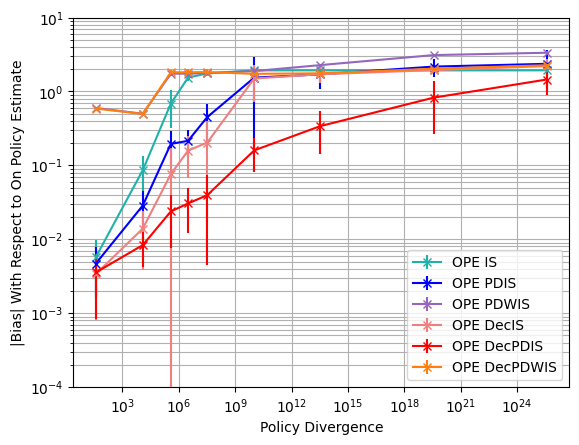

In [ ]:
biases_means = np.array([
    [0.0, 0.005731724756034633, 0.004695846086459681, 0.597100165535937, 0.003391204078695846, 0.0035561261632880994, 0.5865513700346284],
    [3.5655006065463553e-10, 0.08610026978566102, 0.028604153753392238, 0.49950288606908033, 0.013957098223862935, 0.008346117267819619, 0.496543275203167],
    [4.656612873077393e-11, 0.6860203611659397, 0.19521913898380205, 1.7373091035455601, 0.07621380093936048, 0.023810103411714897, 1.8135617235126265],
    [9.313225746154786e-11, 1.5386166408641515, 0.2146027529347761, 1.7403377797985908, 0.15810837783827755, 0.03053629783239122, 1.82027615808346],
    [4.656612873077393e-11, 1.7531398551066801, 0.4500813078030905, 1.7681131304302322, 0.20362658233768868, 0.0395321061796387, 1.827284414486548],
    [0.0, 1.9284457443133953, 1.5370944109756635, 1.8851699015225798, 1.4969081595202052, 0.1595516042743284, 1.7298817015586678],
    [1.3969838619232177e-10, 1.928471679827453, 1.7014764519992394, 2.271156306748719, 1.707751963817289, 0.33960579946222913, 1.7603832006987354],
    [0.0, 1.9266579557750938, 2.1686545435163147, 3.102688932506719, 1.9432683721217447, 0.8237146236551199, 2.0294387946670644],
    [6.585445079827192e-11, 1.9292411725563436, 2.363323892949757, 3.338891826230635, 2.1998997768942745, 1.449765198203994, 2.2608589388670923]
])

biases_stds = np.array([
    [0.0, 0.004074558348316746, 0.0030791388173304814, 0.004155976628006591, 0.0025853206825229924, 0.002725202760609489, 0.017517377609215717],
    [2.99520431263506e-10, 0.045922521025301886, 0.016972863299152506, 0.005990824277750492, 0.01007335051688986, 0.004116315734903587, 0.004778203925998418],
    [9.313225746154786e-11, 0.3691659870789623, 0.09561182877147123, 0.004937774039969131, 0.0965903377325487, 0.016146663471561837, 0.15177588471697193],
    [1.1406325468715179e-10, 0.16378191141377563, 0.08509180727968339, 0.00626453420425837, 0.0904033419640844, 0.01836478814119691, 0.17004158857524282],
    [9.313225746154786e-11, 0.15329784112063052, 0.21985889180607537, 0.019763690386214946, 0.18942221201601683, 0.03507404803056065, 0.18903733106008852],
    [0.0, 0.005670242786132696, 1.4083540685645801, 0.030957227006039898, 0.7776278739750532, 0.07819972411912798, 0.003250117096939282],
    [1.862645149230957e-10, 0.002860151652219727, 0.6263348232248763, 0.06155129903044653, 0.4079310693932286, 0.19923056240552786, 0.005165249109544083],
    [0.0, 0.002031055966519459, 0.6098780636135729, 0.10747350726426652, 0.00529311270667299, 0.5601793139920249, 0.21300643384703916],
    [1.3170890159654385e-10, 0.0022751953160638195, 1.319024926615929, 0.16079247490150192, 0.5432967523965064, 0.5652229773300482, 0.038522942623644196]
])

plot_graphs(biases_means, biases_stds, 'bias', '10-steps', 10**(-4), 10, 10)

Trajectory length 1000

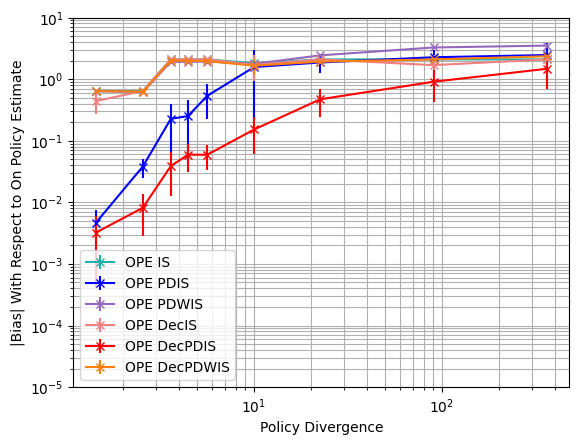

In [ ]:
biases_means = np.array([
    [0.0, 0.6410815363893916, 0.00464226623839341, 0.6379660134407219, 0.4396209589160067, 0.0032181146909088082, 0.6395883336212165],
    [3.951267047896316e-10, 0.641199760080902, 0.038058847442852976, 0.6145090049864224, 0.641199760080902, 0.008144549026137992, 0.626080865570421],
    [4.656612873077393e-11, 2.0909544225126395, 0.22667850362400452, 1.90898730567754, 2.0909544225126395, 0.03877620025003513, 1.9900655970995131],
    [8.065490087349328e-11, 2.0896742603943044, 0.25176150103095074, 1.905377213578237, 2.0896742603943044, 0.059396577725438285, 1.9762290984756838],
    [1.3969838619232177e-10, 2.0897905521486857, 0.5361887153061593, 1.930289151255072, 2.0897905521486857, 0.05917877143487401, 1.9613621451826497],
    [0.0, 1.8036651300788606, 1.5732007801981367, 1.772281475418751, 1.70231188788819, 0.1524550115369727, 1.6519014243166938],
    [8.065490087349328e-11, 2.089420369523079, 1.8624454584867842, 2.4321249387796304, 2.089420369523079, 0.4706598432633138, 1.9230546538719147],
    [0.0, 2.087616487244408, 2.265304282194311, 3.2636474744699173, 1.6876164872444082, 0.9071741290343717, 2.0854708232266455],
    [0.0, 2.0901789267048385, 2.459886996390803, 3.4998295804545854, 2.0901789267048385, 1.4712186317109264, 2.3503899724672297]
])

biases_stds = np.array([
    [0.0, 0.0039792106566775435, 0.00298198708446201, 0.004045948418117796, 0.17308471698796127, 0.002812844458821112, 0.004126090320156475],
    [3.2261960349397316e-10, 0.004727214225517455, 0.01325106627709848, 0.005827970467105958, 0.004727214225517455, 0.005354034456432787, 0.004514588328530793],
    [9.313225746154787e-11, 0.0026033861392410493, 0.16345578067229946, 0.005661525310824173, 0.0026033861392410493, 0.02598654171767373, 0.05015972994026075],
    [1.6130980174698658e-10, 0.0008664652283786502, 0.2080798383611564, 0.0064768547026731295, 0.0008664652283786502, 0.027999443195643795, 0.05790163189460553],
    [1.8626451492309571e-10, 0.0015893425606166372, 0.310450506734672, 0.019657977309474977, 0.0015893425606166372, 0.02542961395778956, 0.0663821389738921],
    [0.0, 0.5773662592694373, 1.351412663446814, 0.5637863004157962, 0.7800720291148672, 0.09063577015666577, 0.5020840414684908],
    [1.6130980174698658e-10, 0.0027979271549783517, 0.6263626625982094, 0.061607612354688826, 0.0027979271549783517, 0.2282456638679943, 0.005083497950934288],
    [0.0, 0.0020077055836755283, 0.6869094785260298, 0.10744721021482836, 0.801106807840433, 0.4760187138545427, 0.015026768135740689],
    [0.0, 0.0022783047615224806, 1.4202310996237175, 0.16078498087042692, 0.0022783047615224806, 0.7750576725301976, 0.13372515556659523]
])

#Note: Last parameter should be 1000 but the value overflows
plot_graphs(biases_means, biases_stds, 'bias', '1000-steps', 10**(-5), 10, 1)

#### Variance

Trajectory length 10

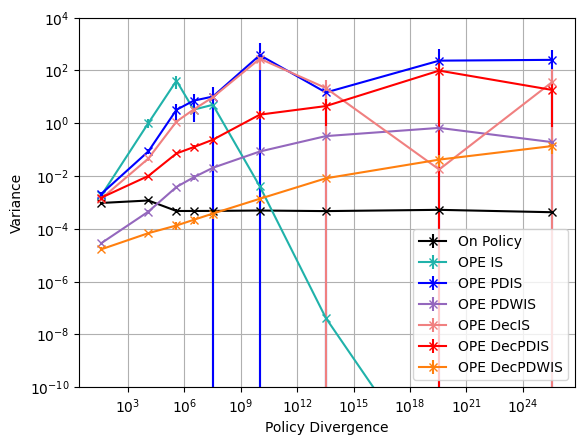

In [ ]:
var_means = np.array([
    [0.0009466553612773385, 0.0018550955471843909, 0.002112285812626379, 2.8613657687498994e-05, 0.0013834189322719107, 0.0015101116564355313, 1.6722646895385963e-05],
    [0.0011728701952397826, 1.0115733746789008, 0.08545868021494331, 0.000445424842574123, 0.04584630926486081, 0.00998927752729209, 6.799405522093287e-05],
    [0.00046959122052451455, 40.38963237255497, 3.191576559184895, 0.0038202650112837437, 1.1467534237450205, 0.0709733965580844, 0.00013265940482641588],
    [0.00047029349328825176, 3.2387670654924015, 7.077303375047494, 0.008842364422556837, 3.271185179890246, 0.1230162449969026, 0.00021679604903448768],
    [0.0004734475760297727, 4.942988832310737, 10.159322541537506, 0.02034453264302374, 9.595482062240402, 0.23550296382191577, 0.00037516878893645116],
    [0.0004886383055844443, 0.003988132630310766, 375.3769335066539, 0.0841987255525343, 275.7423857587743, 2.097655941079887, 0.0013646899485695722],
    [0.000465275035383846, 4.1175208114928875e-08, 14.494327610970444, 0.32262335423233307, 21.31112402073032, 4.42596502416257, 0.008130418782735047],
    [0.0005192655491893424, 2.256289171135304e-14, 232.45017490091647, 0.6596608001439136, 0.01755123364267168, 97.41846222106241, 0.04145659632509702],
    [0.0004213564971473352, 9.505130095442219e-19, 249.28861425248041, 0.19005471749623207, 36.38499680724972, 18.00329205275587, 0.13561053045059582]
])

var_stds = np.array([
    [6.97294666088416e-05, 0.00017934679525410298, 0.0002597854478841312, 3.576996957875511e-06, 0.00010067751371575461, 0.00011975120897199474, 2.969925470538167e-06],
    [0.00016298437435832903, 0.3839665473568848, 0.017179023065659257, 7.08955238114544e-05, 0.0075993433239075195, 0.0012266790829311865, 8.485391629927443e-06],
    [6.633610917011844e-05, 21.48443809751744, 1.9348083139670447, 0.00024780511303841335, 0.1734036875136189, 0.01079681135526409, 4.3805885247667635e-05],
    [6.354738681285534e-05, 1.5882881857503683, 6.018669979025957, 0.0015725153013182813, 0.4973455700590318, 0.01926887428569966, 6.656287728710316e-05],
    [7.022073719590414e-05, 8.44557363108431, 12.899498307537929, 0.004371991810528261, 1.454363541773717, 0.012204866983138904, 0.00014047098598829298],
    [4.7116556227848985e-05, 0.00783121493466204, 738.123018868683, 0.008423846450157488, 176.6257425741341, 0.697605849920584, 0.00022265157205219232],
    [6.912899315622552e-05, 5.038032577097153e-08, 15.862306168656378, 0.039862225291387436, 22.147371444271204, 3.6397909934418116, 0.0010195617501667976],
    [8.74381577075671e-05, 2.623770310594758e-14, 435.03151475425267, 0.15538820642374412, 0.005426218419089447, 166.17782318407257, 0.02043128643673793],
    [5.377657554867174e-05, 8.134115736452033e-19, 356.1482702138728, 0.08613339278343819, 72.76980696669166, 17.27675561602666, 0.06839072103764059]
])

plot_graphs(var_means, var_stds, 'var', '10-steps', 10**(-10), 10**4, 10)

Trajectory length 1000

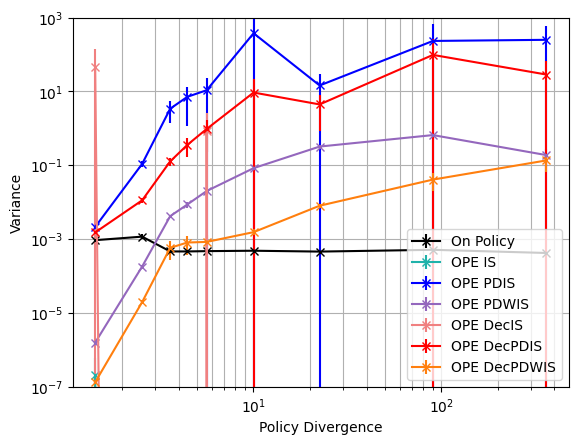

In [ ]:
var_means = np.array([
    [0.0009462417666661362, 2.0954480593185527e-07, 0.002160843566771384, 1.6055485623970724e-06, 46.62302927616663, 0.0015316959559203516, 1.3568789334983554e-07],
    [0.0011783754389480567, 1.921303577258751e-276, 0.10954034811650662, 0.00018306674308053483, 5.104814967872984e-115, 0.011330834585260536, 1.9961130735028222e-05],
    [0.0004691084133764959, 0.0, 3.4140413895625854, 0.004217180023401811, 0.0, 0.1279797327657764, 0.0005883283213085867],
    [0.0004685958589763891, 0.0, 7.170881826070348, 0.008760254606979021, 0.0, 0.3594426520605097, 0.000817223287319087],
    [0.00047781377906893247, 0.0, 10.76701927732887, 0.02017918535115153, 0.8746002311054527, 0.9625895064099691, 0.0008488077434813974],
    [0.0004900675196670637, 0.0, 375.37684549565677, 0.08401361170695218, 0.0, 9.337577493415953, 0.001559546461656882],
    [0.0004646339314871505, 0.0, 14.49432759687826, 0.322622318476247, 0.0, 4.455156975865904, 0.008089124209731981],
    [0.0005189289373945325, 0.0, 232.4501749008929, 0.659660800490071, 0.0, 97.41516169038678, 0.04120653487979174],
    [0.0004261204698838586, 0.0, 249.28861425248047, 0.19005471749600147, 0.0, 28.733027607481368, 0.1355364875088208]
])

var_stds = np.array([
    [7.735040465619146e-05, 4.172872078886706e-07, 0.0002733043068602113, 1.6353239314499426e-07, 89.84901461741076, 0.00012379163058022423, 6.879636523691361e-08],
    [0.00017062617258890316, 0.0, 0.019482426929449924, 1.6321713603019047e-05, 7.333145565043676e-115, 0.0014927292516613182, 2.1278414110374416e-06],
    [6.582248029630188e-05, 0.0, 1.9846239180094494, 0.00023156539533986846, 0.0, 0.033666204049326555, 0.0003053677751651338],
    [6.766442837495822e-05, 0.0, 6.01958530655735, 0.0016437670072270653, 0.0, 0.18704895737771052, 0.0004369762684220393],
    [7.205432754193899e-05, 0.0, 12.679957329084788, 0.004299575802235403, 1.7492004622109054, 0.7370428300933981, 0.0004556011119022968],
    [4.696465176764205e-05, 0.0, 738.1213671824163, 0.008287696090679983, 0.0, 12.901306686260801, 0.0002930427909846189],
    [6.704398557835492e-05, 0.0, 15.862306115190279, 0.03986247386413362, 0.0, 3.614122833163466, 0.0011145384701869098],
    [8.161302696771042e-05, 0.0, 435.03151475428086, 0.15538820607137274, 0.0, 166.1791683485143, 0.02080206821183019],
    [5.408303388793887e-05, 0.0, 356.14827021387293, 0.08613339278320842, 0.0, 37.18002849627635, 0.0685357689032046]
])

#Note: Last parameter should be 1000 but the value overflows
plot_graphs(var_means, var_stds, 'var', '1000-steps', 10**(-7), 10**(3), 1)

#### MSE

Trajectory length 10

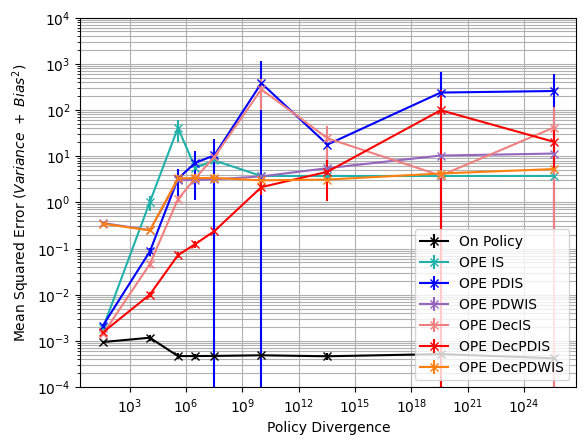

In [ ]:
MSE_means = np.array([
    [0.0009466553612773387, 0.001904550241597169, 0.002143817878950489, 0.35657449348246345, 0.0014016030804067557, 0.001530184419811187, 0.3443660908546988],
    [0.0011728701952397826, 1.0210955090733838, 0.08656495591546273, 0.2499844480094416, 0.046142582246327495, 0.010075879255969703, 0.24664604943746732],
    [0.00046959122052451455, 40.9965398345052, 3.2388286932114965, 3.02208756788603, 1.1618916605419327, 0.07180103232382486, 3.3121747035765345],
    [0.00047029349328825165, 5.632932747542837, 7.1305983322808, 3.037657196605641, 3.3043562032711717, 0.12428597592568211, 3.3425362295813086],
    [0.0004734475760297726, 8.039988411966453, 10.410233657477441, 3.146959178100501, 9.672826621679972, 0.23829594008616403, 3.3750786127487054],
    [0.0004886383055844443, 3.722923273044009, 379.723053917349, 3.639022633063091, 278.5878249071954, 2.1292278523587065, 2.9938659545972257],
    [0.000465275035383846, 3.7190112415391985, 17.7816450384625, 5.484562886329149, 24.39394854802843, 4.580989940187373, 3.1071061118834225],
    [0.0005192655491893424, 3.7120150037398245, 237.52518868250746, 10.29788996680728, 3.793871216773494, 98.41076886611027, 4.2054501584850374],
    [0.00042135649714733524, 3.7219766784003014, 256.6137408325018, 11.364107564750928, 41.51972719679379, 20.42458819678118, 5.248577689014215]
])

MSE_stds = np.array([
    [6.972946660884169e-05, 0.00014953158604020131, 0.00023182551011230308, 0.004985964220342925, 8.480054857208416e-05, 0.00010075731898312615, 0.020094299796325786],
    [0.00016298437435832873, 0.3778681406880385, 0.016829932772700014, 0.0060412255219746405, 0.0076320720063821545, 0.001286306124580755, 0.004755207256487696],
    [6.633610917011843e-05, 20.94514632674426, 1.9115268868862194, 0.01707274309267969, 0.19511814536595767, 0.010537747516011926, 0.5849929437396013],
    [6.354738681285531e-05, 1.0949663467825401, 5.99323686049359, 0.02194996089085543, 0.5029285946405099, 0.02053865282839516, 0.6623464801928627],
    [7.022073719590411e-05, 7.954613316233724, 12.776249964133465, 0.07400691692568033, 1.340807698323488, 0.013857567138605333, 0.7442879935952632],
    [4.7116556227848985e-05, 0.014415228474452958, 744.9495208545816, 0.11907101201472946, 178.04326698074956, 0.7131963978154467, 0.011277699595574849],
    [6.912899315622549e-05, 0.011022359059942808, 14.222726859046139, 0.29196575748286, 21.035477831494504, 3.5373257156444886, 0.017306736928699374],
    [8.743815770756711e-05, 0.00782844994138305, 433.6260277851444, 0.5103517282823019, 0.023404805479207376, 167.2603975916827, 0.9115699185977543],
    [5.377657554867178e-05, 0.008777011028081018, 351.7803972546012, 1.10599321454673, 75.6029268661005, 15.76921434925719, 0.16201463243743297]
])

plot_graphs(MSE_means, MSE_stds, 'MSE', '10-steps', 10**(-4), 10**4, 10)

Trajectory length 1000

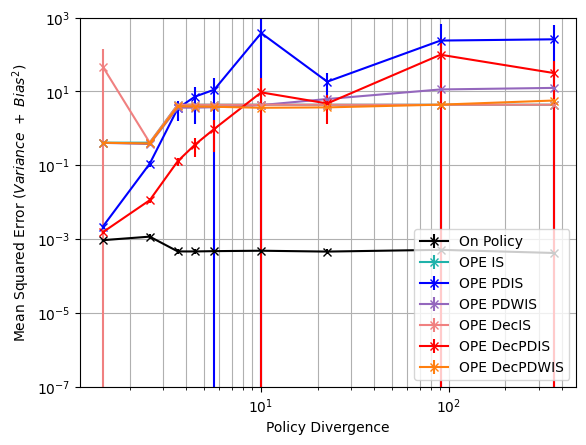

In [ ]:
MSE_means = np.array([
    [0.0009462417666661362, 0.411001579961639, 0.00219128644957141, 0.4070186095526118, 46.84625418293966, 0.0015499643120337153, 0.4090903968135879],
    [0.0011783754389480569, 0.4111594788821401, 0.11116441474266503, 0.3778383491922489, 0.4111594788821401, 0.011425833949060372, 0.3920175928719186],
    [0.0004691084133764959, 4.372097174644555, 3.4921423258029947, 3.64848176613024, 4.372097174644555, 0.13015862682205162, 3.9634654075880307],
    [0.0004685958589763891, 4.366739265316474, 7.2523669946733875, 3.639264530276985, 4.366739265316474, 0.3637545743252698, 3.909651271925391],
    [0.00047781377906893263, 4.367227077859684, 11.150897132882356, 3.746581828876077, 4.367227077859684, 0.9667382986645524, 3.852196860673716],
    [0.0004900675196670636, 4.377308056758687, 379.69745981990206, 4.2716437038543225, 4.377308056758687, 9.431401841715932, 3.61574249273015],
    [0.00046463393148715043, 4.365685308974324, 18.355360867813424, 6.2416495342101115, 4.365685308974324, 4.728773747001093, 3.7062541679395777],
    [0.0005189289373945325, 4.358146628696394, 238.05362302350963, 11.322600541086889, 4.358146628696394, 98.46472040671578, 4.390620893170019],
    [0.0004261204698838586, 4.368853136313576, 257.35671466383144, 12.464713619794423, 4.368853136313576, 31.498226265522668, 5.6777519274146355]
])

MSE_stds = np.array([
    [7.735040465619158e-05, 0.005124148920571214, 0.00024782830632539, 0.005185671799136385, 89.74573724451945, 0.00010584633871490281, 0.005301913159118604],
    [0.00017062617258890313, 0.00607388612941441, 0.019402806425377263, 0.007188168004020697, 0.00607388612941441, 0.0015954967473396308, 0.005663268868809063],
    [6.582248029630191e-05, 0.0108922175742218, 1.9205182963238767, 0.02154896735150846, 0.0108922175742218, 0.033025640679052205, 0.20309500743836503],
    [6.766442837495818e-05, 0.0036216549836163045, 5.9514461417996625, 0.02503035221816455, 0.0036216549836163045, 0.19010140235654147, 0.23343638805622124],
    [7.205432754193902e-05, 0.006640962674049374, 12.46609893833076, 0.07991839860252893, 0.006640962674049374, 0.739303078964024, 0.2665506517180019],
    [4.696465176764202e-05, 0.007555646081772194, 744.2902246409096, 0.12812610502697303, 0.007555646081772194, 13.009423661233749, 0.01502328224570785],
    [6.704398557835489e-05, 0.011683182310282996, 14.035368227359731, 0.3119038219599977, 0.011683182310282996, 3.4517864523246873, 0.01856368435970267],
    [8.161302696771047e-05, 0.008384857875712788, 433.1288444190449, 0.5447698206817205, 0.008384857875712788, 166.9558901030947, 0.06107789684276659],
    [5.408303388793887e-05, 0.009522430671756371, 351.3386784673757, 1.157654760949914, 0.009522430671756371, 35.50472971700918, 0.6719060316118299]
])

plot_graphs(MSE_means, MSE_stds, 'MSE', '1000-steps', 10**(-7), 10**3, 1)

#### ESS

Trajectory length 10

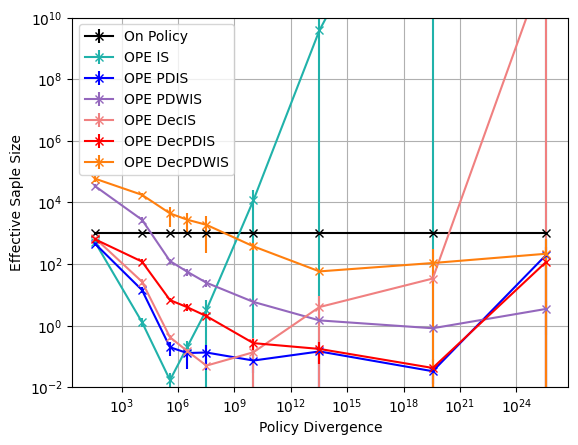

In [ ]:
ESS_means = np.array([
    [1000.0, 513.765254302589, 456.2166941234708, 33692.84309906793, 688.9783337488125, 632.5419573677326, 58703.34920853427],
    [1000.0, 1.2998559170367705, 14.251019384091652, 2720.999754947291, 26.568819015512723, 119.22073714626156, 17525.83390005607],
    [1000.0, 0.016882225137617703, 0.19700845220598673, 123.94822818706295, 0.41582486252374284, 6.6974013794209, 4372.782110669132],
    [1000.0, 0.19988659121033195, 0.1280342714861376, 55.74013133212968, 0.1488998363326206, 3.9388851280135517, 2727.4525023986253],
    [1000.0, 3.1980579870571257, 0.1329563371553535, 24.523762982059786, 0.0498824169743098, 2.01505364356978, 1861.7005013342782],
    [1000.0, 11563.168461575313, 0.07297531456301715, 5.844472062079733, 0.13550399866565893, 0.2678474402422514, 372.0872225360731],
    [1000.0, 3855593478.48126, 0.14413256582236958, 1.4665416815924666, 3.9771483645123618, 0.1736901386564963, 57.16374740922663],
    [1000.0, 3.068335102830352e+16, 0.03283549638136886, 0.815373499305478, 33.51807496299364, 0.04188672367253761, 106.91429823311464],
    [1000.0, 7.824835477713742e+29, 192.48094866003424, 3.451515736271, 556404161728.6384, 114.35366432864082, 213.5828326183699]
])

ESS_stds = np.array([
    [7.190186943645084e-14, 51.653548820033336, 72.34072861842715, 5356.298738210397, 79.4120600796459, 81.99197976111994, 12126.558420742613],
    [0.0, 0.4192483156563841, 3.0038898447122606, 624.0014828210219, 6.565190678107639, 20.74972404801889, 3085.0363198562795],
    [0.0, 0.011259857939150384, 0.09230976809081716, 22.517397088516194, 0.07091917492820535, 0.8868730206626967, 2797.618874422701],
    [0.0, 0.1226790412980865, 0.08993434863330792, 14.986000104398572, 0.03803130558726069, 0.9106125449313611, 1844.4418464497433],
    [0.0, 3.5357208834897964, 0.09689358717071904, 6.542988391451438, 0.006432229813674169, 0.3079961645052178, 1630.4909743233575],
    [0.0, 13508.848168215389, 0.0447057724902089, 0.6719445286567982, 0.2675093971613689, 0.11069852171659199, 89.1392858103811],
    [0.0, 4862719892.132166, 0.1993799845835187, 0.28125233221804663, 4.907536195662444, 0.11937804846736963, 3.6858779955014187],
    [0.0, 4.639441852191212e+16, 0.019924911652142555, 0.1527867009190018, 14.227716745638375, 0.04177920268192449, 193.3824937168354],
    [0.0, 1.564967065234228e+30, 384.6681291060305, 2.971697836525758, 1112808318192.1611, 228.59485062747683, 422.0593340425886]
])

plot_graphs(ESS_means, ESS_stds, 'ESS', '10-steps', 10**(-2), 10**10, 10)

Trajectory length 1000

/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:3648: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err


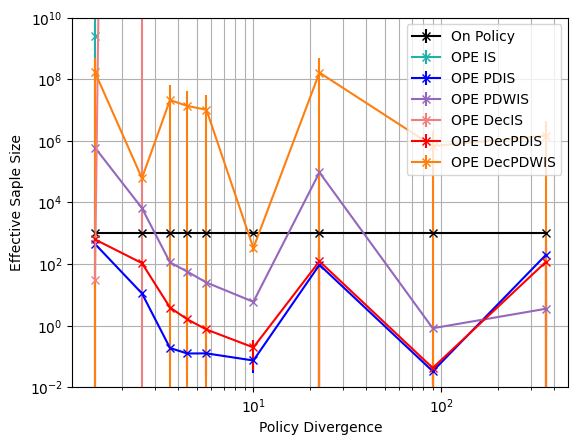

In [ ]:
ESS_means = np.array([
    [1000.0, 2517977975.498477, 446.2287881319834, 596567.3552238361, 29.666256739812958, 623.8199601399008, 166884691.64741933],
    [1000.0, 2.166305451086581e+288, 11.048800297065563, 6489.593541280233, 2.1708751000755555e+120, 106.18839279049814, 60720.225285543944],
    [1000.0, np.Inf, 0.18632036680175812, 112.16008974010961, np.Inf, 3.8405600429800217, 20950468.872941803],
    [1000.0, np.Inf, 0.12366013258321237, 56.37205138962931, np.Inf, 1.5973746215463973, 13482563.109935155],
    [1000.0, np.Inf, 0.12466350650810405, 24.920734532605945, np.Inf, 0.7430670484068532, 10134657.218697894],
    [1000.0, np.Inf, 0.07318218871303192, 5.872554454353475, np.Inf, 0.1943316228091724, 328.43700122479015],
    [1000.0, np.Inf, 93.67585874062955, 93568.58123698087, np.Inf, 121.9592393461716, 162302854.225182],
    [1000.0, np.Inf, 0.032742440141720244, 0.8153795479285, np.Inf, 0.0418599452939803, 674507.9464486754],
    [1000.0, np.Inf, 196.05439583167768, 3.5025778120788273, np.Inf, 116.47576307476012, 1450903.1967161123]
])

ESS_stds = np.array([
    [1.016845989170083e-13, 3268755940.6677537, 74.21603701476188, 85258.47077706445, 56.874825987499506, 86.76778230281018, 322314839.20113844],
    [0.0, np.Inf, 2.1967020336665946, 1039.2248805968222, 4.2359759357438676e+120, 21.303092357145676, 16680.166127955075],
    [0.0, np.Inf, 0.09417859204745281, 20.717727694457874, np.Inf, 0.7726560130467044, 41899718.1127652],
    [0.0, np.Inf, 0.08452652281749501, 16.027181609889823, np.Inf, 0.6102326689216041, 26964204.47534458],
    [0.0, np.Inf, 0.10213251502636311, 6.557897051878086, np.Inf, 0.36146865871659456, 20268421.02885907],
    [0.0, np.Inf, 0.04489720942493744, 0.6591998555346881, np.Inf, 0.15724169544818067, 77.64110453938235],
    [0.0, np.Inf, 187.19094344389734, 187125.42095890187, np.Inf, 243.44051054444859, 324605065.0688377],
    [0.0, np.Inf, 0.01988730745218749, 0.14896284155066988, np.Inf, 0.04132741964270766, 1348995.3855304185],
    [0.0, np.Inf, 391.81120812723947, 3.033557854883937, np.Inf, 232.8401850935157, 2901801.2370961313]
])

plot_graphs(ESS_means, ESS_stds, 'ESS', '10-steps', 10**(-2), 10**10, 1)

## Experiments on Coverage

### Generate Data Set

#### From behaviour policy, generate maximum length trajectory

Dataset

In [ ]:
!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 1.44
Start state: 0,0, start state no: 0


In [ ]:
import pandas as pd

# Set up global information
MAIN_REWARD_PATH = 'configs/4-state-MDP/evaluation-policy.csv'

HORIZONTAL_REWARD_PATH = 'configs/4-state-MDP/factorisation/horizontal/evaluation-policy.csv'

VERTICAL_REWARD_PATH = 'configs/4-state-MDP/factorisation/vertical/evaluation-policy.csv'

# Modify and write everything
main_data = [['0,0', 'up,right', 0.64],
             ['0,0', 'up,left', 0.16],
             ['0,0', 'down,right', 0.16],
             ['0,0', 'down,left', 0.04],
             ['0,1', 'up,right', 0.64],
             ['0,1', 'up,left', 0.16],
             ['0,1', 'down,right', 0.16],
             ['0,1', 'down,left', 0.04],
             ['1,0', 'up,right', 0.64],
             ['1,0', 'up,left', 0.16],
             ['1,0', 'down,right', 0.16],
             ['1,0', 'down,left', 0.04],
             ['1,1', 'up,right', 0.64],
             ['1,1', 'up,left', 0.16],
             ['1,1', 'down,right', 0.16],
             ['1,1', 'down,left', 0.04]]

main_reward_df = pd.DataFrame(main_data, columns=['state', 'action', 'probability'])
main_reward_df.to_csv(MAIN_REWARD_PATH)

horizontal_data = [['0,?', 'right', 0.8],
                   ['0,?', 'left', 0.2],
                   ['1,?', 'right', 0.8],
                   ['1,?', 'left', 0.2]]
horizontal_reward_df = pd.DataFrame(horizontal_data, columns=['state', 'action', 'probability'])
horizontal_reward_df.to_csv(HORIZONTAL_REWARD_PATH)

vertical_data = [['?,0', 'up', 0.8],
                 ['?,0', 'down', 0.2],
                 ['?,1', 'up', 0.8],
                 ['?,1', 'down', 0.2]]
vertical_reward_df = pd.DataFrame(vertical_data, columns=['state', 'action', 'probability'])
vertical_reward_df.to_csv(VERTICAL_REWARD_PATH)

!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 2.56
Start state: 0,0, start state no: 0


In [ ]:
import pandas as pd

# Set up global information
MAIN_REWARD_PATH = 'configs/4-state-MDP/evaluation-policy.csv'

HORIZONTAL_REWARD_PATH = 'configs/4-state-MDP/factorisation/horizontal/evaluation-policy.csv'

VERTICAL_REWARD_PATH = 'configs/4-state-MDP/factorisation/vertical/evaluation-policy.csv'

# Modify and write everything
main_data = [['0,0', 'up,right', 0.9025],
             ['0,0', 'up,left', 0.0475],
             ['0,0', 'down,right', 0.0475],
             ['0,0', 'down,left', 0.0025],
             ['0,1', 'up,right', 0.9025],
             ['0,1', 'up,left', 0.0475],
             ['0,1', 'down,right', 0.0475],
             ['0,1', 'down,left', 0.0025],
             ['1,0', 'up,right', 0.9025],
             ['1,0', 'up,left', 0.0475],
             ['1,0', 'down,right', 0.0475],
             ['1,0', 'down,left', 0.0025],
             ['1,1', 'up,right', 0.9025],
             ['1,1', 'up,left', 0.0475],
             ['1,1', 'down,right', 0.0475],
             ['1,1', 'down,left', 0.0025]]

main_reward_df = pd.DataFrame(main_data, columns=['state', 'action', 'probability'])
main_reward_df.to_csv(MAIN_REWARD_PATH)

horizontal_data = [['0,?', 'right', 0.95],
                   ['0,?', 'left', 0.05],
                   ['1,?', 'right', 0.95],
                   ['1,?', 'left', 0.05]]
horizontal_reward_df = pd.DataFrame(horizontal_data, columns=['state', 'action', 'probability'])
horizontal_reward_df.to_csv(HORIZONTAL_REWARD_PATH)

vertical_data = [['?,0', 'up', 0.95],
                 ['?,0', 'down', 0.05],
                 ['?,1', 'up', 0.95],
                 ['?,1', 'down', 0.05]]
vertical_reward_df = pd.DataFrame(vertical_data, columns=['state', 'action', 'probability'])
vertical_reward_df.to_csv(VERTICAL_REWARD_PATH)

!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 3.61
Start state: 0,0, start state no: 0


In [ ]:
import pandas as pd

# Set up global information
MAIN_REWARD_PATH_B = 'configs/4-state-MDP/behaviour-policy.csv'
HORIZONTAL_REWARD_PATH_B = 'configs/4-state-MDP/factorisation/horizontal/behaviour-policy.csv'
VERTICAL_REWARD_PATH_B = 'configs/4-state-MDP/factorisation/vertical/behaviour-policy.csv'

MAIN_REWARD_PATH_E = 'configs/4-state-MDP/evaluation-policy.csv'
HORIZONTAL_REWARD_PATH_E = 'configs/4-state-MDP/factorisation/horizontal/evaluation-policy.csv'
VERTICAL_REWARD_PATH_E = 'configs/4-state-MDP/factorisation/vertical/evaluation-policy.csv'

# Modify and write evaluation
main_data = [['0,0', 'up,right', 0.9025],
             ['0,0', 'up,left', 0.0475],
             ['0,0', 'down,right', 0.0475],
             ['0,0', 'down,left', 0.0025],
             ['0,1', 'up,right', 0.9025],
             ['0,1', 'up,left', 0.0475],
             ['0,1', 'down,right', 0.0475],
             ['0,1', 'down,left', 0.0025],
             ['1,0', 'up,right', 0.9025],
             ['1,0', 'up,left', 0.0475],
             ['1,0', 'down,right', 0.0475],
             ['1,0', 'down,left', 0.0025],
             ['1,1', 'up,right', 0.9025],
             ['1,1', 'up,left', 0.0475],
             ['1,1', 'down,right', 0.0475],
             ['1,1', 'down,left', 0.0025]]

main_reward_df = pd.DataFrame(main_data, columns=['state', 'action', 'probability'])
main_reward_df.to_csv(MAIN_REWARD_PATH_E)

horizontal_data = [['0,?', 'right', 0.95],
                   ['0,?', 'left', 0.05],
                   ['1,?', 'right', 0.95],
                   ['1,?', 'left', 0.05]]
horizontal_reward_df = pd.DataFrame(horizontal_data, columns=['state', 'action', 'probability'])
horizontal_reward_df.to_csv(HORIZONTAL_REWARD_PATH_E)

vertical_data = [['?,0', 'up', 0.95],
                 ['?,0', 'down', 0.05],
                 ['?,1', 'up', 0.95],
                 ['?,1', 'down', 0.05]]
vertical_reward_df = pd.DataFrame(vertical_data, columns=['state', 'action', 'probability'])
vertical_reward_df.to_csv(VERTICAL_REWARD_PATH_E)

# Modify and write behaviour
main_data = [['0,0', 'up,right', 0.2025],
             ['0,0', 'up,left', 0.2475],
             ['0,0', 'down,right', 0.2475],
             ['0,0', 'down,left', 0.3025],
             ['0,1', 'up,right', 0.2025],
             ['0,1', 'up,left', 0.2475],
             ['0,1', 'down,right', 0.2475],
             ['0,1', 'down,left', 0.3025],
             ['1,0', 'up,right', 0.2025],
             ['1,0', 'up,left', 0.2475],
             ['1,0', 'down,right', 0.2475],
             ['1,0', 'down,left', 0.3025],
             ['1,1', 'up,right', 0.2025],
             ['1,1', 'up,left', 0.2475],
             ['1,1', 'down,right', 0.2475],
             ['1,1', 'down,left', 0.3025]]

main_reward_df = pd.DataFrame(main_data, columns=['state', 'action', 'probability'])
main_reward_df.to_csv(MAIN_REWARD_PATH_B)

horizontal_data = [['0,?', 'right', 0.45],
                   ['0,?', 'left', 0.55],
                   ['1,?', 'right', 0.45],
                   ['1,?', 'left', 0.55]]
horizontal_reward_df = pd.DataFrame(horizontal_data, columns=['state', 'action', 'probability'])
horizontal_reward_df.to_csv(HORIZONTAL_REWARD_PATH_B)

vertical_data = [['?,0', 'up', 0.45],
                 ['?,0', 'down', 0.55],
                 ['?,1', 'up', 0.45],
                 ['?,1', 'down', 0.55]]
vertical_reward_df = pd.DataFrame(vertical_data, columns=['state', 'action', 'probability'])
vertical_reward_df.to_csv(VERTICAL_REWARD_PATH_B)

!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 4.4567901234567895
Start state: 0,0, start state no: 0


In [ ]:
import pandas as pd

# Set up global information
MAIN_REWARD_PATH_B = 'configs/4-state-MDP/behaviour-policy.csv'
HORIZONTAL_REWARD_PATH_B = 'configs/4-state-MDP/factorisation/horizontal/behaviour-policy.csv'
VERTICAL_REWARD_PATH_B = 'configs/4-state-MDP/factorisation/vertical/behaviour-policy.csv'

MAIN_REWARD_PATH_E = 'configs/4-state-MDP/evaluation-policy.csv'
HORIZONTAL_REWARD_PATH_E = 'configs/4-state-MDP/factorisation/horizontal/evaluation-policy.csv'
VERTICAL_REWARD_PATH_E = 'configs/4-state-MDP/factorisation/vertical/evaluation-policy.csv'

# Modify and write evaluation
main_data = [['0,0', 'up,right', 0.9025],
             ['0,0', 'up,left', 0.0475],
             ['0,0', 'down,right', 0.0475],
             ['0,0', 'down,left', 0.0025],
             ['0,1', 'up,right', 0.9025],
             ['0,1', 'up,left', 0.0475],
             ['0,1', 'down,right', 0.0475],
             ['0,1', 'down,left', 0.0025],
             ['1,0', 'up,right', 0.9025],
             ['1,0', 'up,left', 0.0475],
             ['1,0', 'down,right', 0.0475],
             ['1,0', 'down,left', 0.0025],
             ['1,1', 'up,right', 0.9025],
             ['1,1', 'up,left', 0.0475],
             ['1,1', 'down,right', 0.0475],
             ['1,1', 'down,left', 0.0025]]

main_reward_df = pd.DataFrame(main_data, columns=['state', 'action', 'probability'])
main_reward_df.to_csv(MAIN_REWARD_PATH_E)

horizontal_data = [['0,?', 'right', 0.95],
                   ['0,?', 'left', 0.05],
                   ['1,?', 'right', 0.95],
                   ['1,?', 'left', 0.05]]
horizontal_reward_df = pd.DataFrame(horizontal_data, columns=['state', 'action', 'probability'])
horizontal_reward_df.to_csv(HORIZONTAL_REWARD_PATH_E)

vertical_data = [['?,0', 'up', 0.95],
                 ['?,0', 'down', 0.05],
                 ['?,1', 'up', 0.95],
                 ['?,1', 'down', 0.05]]
vertical_reward_df = pd.DataFrame(vertical_data, columns=['state', 'action', 'probability'])
vertical_reward_df.to_csv(VERTICAL_REWARD_PATH_E)

# Modify and write behaviour
main_data = [['0,0', 'up,right', 0.16],
             ['0,0', 'up,left', 0.24],
             ['0,0', 'down,right', 0.24],
             ['0,0', 'down,left', 0.36],
             ['0,1', 'up,right', 0.16],
             ['0,1', 'up,left', 0.24],
             ['0,1', 'down,right', 0.24],
             ['0,1', 'down,left', 0.36],
             ['1,0', 'up,right', 0.16],
             ['1,0', 'up,left', 0.24],
             ['1,0', 'down,right', 0.24],
             ['1,0', 'down,left', 0.36],
             ['1,1', 'up,right', 0.16],
             ['1,1', 'up,left', 0.24],
             ['1,1', 'down,right', 0.24],
             ['1,1', 'down,left', 0.36]]

main_reward_df = pd.DataFrame(main_data, columns=['state', 'action', 'probability'])
main_reward_df.to_csv(MAIN_REWARD_PATH_B)

horizontal_data = [['0,?', 'right', 0.4],
                   ['0,?', 'left', 0.6],
                   ['1,?', 'right', 0.4],
                   ['1,?', 'left', 0.6]]
horizontal_reward_df = pd.DataFrame(horizontal_data, columns=['state', 'action', 'probability'])
horizontal_reward_df.to_csv(HORIZONTAL_REWARD_PATH_B)

vertical_data = [['?,0', 'up', 0.4],
                 ['?,0', 'down', 0.6],
                 ['?,1', 'up', 0.4],
                 ['?,1', 'down', 0.6]]
vertical_reward_df = pd.DataFrame(vertical_data, columns=['state', 'action', 'probability'])
vertical_reward_df.to_csv(VERTICAL_REWARD_PATH_B)

!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 5.640625
Start state: 0,0, start state no: 0


In [ ]:
import pandas as pd

# Set up global information
MAIN_REWARD_PATH_B = 'configs/4-state-MDP/behaviour-policy.csv'
HORIZONTAL_REWARD_PATH_B = 'configs/4-state-MDP/factorisation/horizontal/behaviour-policy.csv'
VERTICAL_REWARD_PATH_B = 'configs/4-state-MDP/factorisation/vertical/behaviour-policy.csv'

MAIN_REWARD_PATH_E = 'configs/4-state-MDP/evaluation-policy.csv'
HORIZONTAL_REWARD_PATH_E = 'configs/4-state-MDP/factorisation/horizontal/evaluation-policy.csv'
VERTICAL_REWARD_PATH_E = 'configs/4-state-MDP/factorisation/vertical/evaluation-policy.csv'

# Modify and write evaluation
main_data = [['0,0', 'up,right', 0.9025],
             ['0,0', 'up,left', 0.0475],
             ['0,0', 'down,right', 0.0475],
             ['0,0', 'down,left', 0.0025],
             ['0,1', 'up,right', 0.9025],
             ['0,1', 'up,left', 0.0475],
             ['0,1', 'down,right', 0.0475],
             ['0,1', 'down,left', 0.0025],
             ['1,0', 'up,right', 0.9025],
             ['1,0', 'up,left', 0.0475],
             ['1,0', 'down,right', 0.0475],
             ['1,0', 'down,left', 0.0025],
             ['1,1', 'up,right', 0.9025],
             ['1,1', 'up,left', 0.0475],
             ['1,1', 'down,right', 0.0475],
             ['1,1', 'down,left', 0.0025]]

main_reward_df = pd.DataFrame(main_data, columns=['state', 'action', 'probability'])
main_reward_df.to_csv(MAIN_REWARD_PATH_E)

horizontal_data = [['0,?', 'right', 0.95],
                   ['0,?', 'left', 0.05],
                   ['1,?', 'right', 0.95],
                   ['1,?', 'left', 0.05]]
horizontal_reward_df = pd.DataFrame(horizontal_data, columns=['state', 'action', 'probability'])
horizontal_reward_df.to_csv(HORIZONTAL_REWARD_PATH_E)

vertical_data = [['?,0', 'up', 0.95],
                 ['?,0', 'down', 0.05],
                 ['?,1', 'up', 0.95],
                 ['?,1', 'down', 0.05]]
vertical_reward_df = pd.DataFrame(vertical_data, columns=['state', 'action', 'probability'])
vertical_reward_df.to_csv(VERTICAL_REWARD_PATH_E)

# Modify and write behaviour
main_data = [['0,0', 'up,right', 0.09],
             ['0,0', 'up,left', 0.21],
             ['0,0', 'down,right', 0.21],
             ['0,0', 'down,left', 0.49],
             ['0,1', 'up,right', 0.09],
             ['0,1', 'up,left', 0.21],
             ['0,1', 'down,right', 0.21],
             ['0,1', 'down,left', 0.49],
             ['1,0', 'up,right', 0.09],
             ['1,0', 'up,left', 0.21],
             ['1,0', 'down,right', 0.21],
             ['1,0', 'down,left', 0.49],
             ['1,1', 'up,right', 0.09],
             ['1,1', 'up,left', 0.21],
             ['1,1', 'down,right', 0.21],
             ['1,1', 'down,left', 0.49]]

main_reward_df = pd.DataFrame(main_data, columns=['state', 'action', 'probability'])
main_reward_df.to_csv(MAIN_REWARD_PATH_B)

horizontal_data = [['0,?', 'right', 0.3],
                   ['0,?', 'left', 0.7],
                   ['1,?', 'right', 0.3],
                   ['1,?', 'left', 0.7]]
horizontal_reward_df = pd.DataFrame(horizontal_data, columns=['state', 'action', 'probability'])
horizontal_reward_df.to_csv(HORIZONTAL_REWARD_PATH_B)

vertical_data = [['?,0', 'up', 0.3],
                 ['?,0', 'down', 0.7],
                 ['?,1', 'up', 0.3],
                 ['?,1', 'down', 0.7]]
vertical_reward_df = pd.DataFrame(vertical_data, columns=['state', 'action', 'probability'])
vertical_reward_df.to_csv(VERTICAL_REWARD_PATH_B)

!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 10.027777777777779
Start state: 0,0, start state no: 0


In [ ]:
import pandas as pd

# Set up global information
MAIN_REWARD_PATH_B = 'configs/4-state-MDP/behaviour-policy.csv'
HORIZONTAL_REWARD_PATH_B = 'configs/4-state-MDP/factorisation/horizontal/behaviour-policy.csv'
VERTICAL_REWARD_PATH_B = 'configs/4-state-MDP/factorisation/vertical/behaviour-policy.csv'

MAIN_REWARD_PATH_E = 'configs/4-state-MDP/evaluation-policy.csv'
HORIZONTAL_REWARD_PATH_E = 'configs/4-state-MDP/factorisation/horizontal/evaluation-policy.csv'
VERTICAL_REWARD_PATH_E = 'configs/4-state-MDP/factorisation/vertical/evaluation-policy.csv'

# Modify and write evaluation
main_data = [['0,0', 'up,right', 0.9025],
             ['0,0', 'up,left', 0.0475],
             ['0,0', 'down,right', 0.0475],
             ['0,0', 'down,left', 0.0025],
             ['0,1', 'up,right', 0.9025],
             ['0,1', 'up,left', 0.0475],
             ['0,1', 'down,right', 0.0475],
             ['0,1', 'down,left', 0.0025],
             ['1,0', 'up,right', 0.9025],
             ['1,0', 'up,left', 0.0475],
             ['1,0', 'down,right', 0.0475],
             ['1,0', 'down,left', 0.0025],
             ['1,1', 'up,right', 0.9025],
             ['1,1', 'up,left', 0.0475],
             ['1,1', 'down,right', 0.0475],
             ['1,1', 'down,left', 0.0025]]

main_reward_df = pd.DataFrame(main_data, columns=['state', 'action', 'probability'])
main_reward_df.to_csv(MAIN_REWARD_PATH_E)

horizontal_data = [['0,?', 'right', 0.95],
                   ['0,?', 'left', 0.05],
                   ['1,?', 'right', 0.95],
                   ['1,?', 'left', 0.05]]
horizontal_reward_df = pd.DataFrame(horizontal_data, columns=['state', 'action', 'probability'])
horizontal_reward_df.to_csv(HORIZONTAL_REWARD_PATH_E)

vertical_data = [['?,0', 'up', 0.95],
                 ['?,0', 'down', 0.05],
                 ['?,1', 'up', 0.95],
                 ['?,1', 'down', 0.05]]
vertical_reward_df = pd.DataFrame(vertical_data, columns=['state', 'action', 'probability'])
vertical_reward_df.to_csv(VERTICAL_REWARD_PATH_E)

# Modify and write behaviour
main_data = [['0,0', 'up,right', 0.04],
             ['0,0', 'up,left', 0.16],
             ['0,0', 'down,right', 0.16],
             ['0,0', 'down,left', 0.64],
             ['0,1', 'up,right', 0.04],
             ['0,1', 'up,left', 0.16],
             ['0,1', 'down,right', 0.16],
             ['0,1', 'down,left', 0.64],
             ['1,0', 'up,right', 0.04],
             ['1,0', 'up,left', 0.16],
             ['1,0', 'down,right', 0.16],
             ['1,0', 'down,left', 0.64],
             ['1,1', 'up,right', 0.04],
             ['1,1', 'up,left', 0.16],
             ['1,1', 'down,right', 0.16],
             ['1,1', 'down,left', 0.64]]

main_reward_df = pd.DataFrame(main_data, columns=['state', 'action', 'probability'])
main_reward_df.to_csv(MAIN_REWARD_PATH_B)

horizontal_data = [['0,?', 'right', 0.2],
                   ['0,?', 'left', 0.8],
                   ['1,?', 'right', 0.2],
                   ['1,?', 'left', 0.8]]
horizontal_reward_df = pd.DataFrame(horizontal_data, columns=['state', 'action', 'probability'])
horizontal_reward_df.to_csv(HORIZONTAL_REWARD_PATH_B)

vertical_data = [['?,0', 'up', 0.2],
                 ['?,0', 'down', 0.8],
                 ['?,1', 'up', 0.2],
                 ['?,1', 'down', 0.8]]
vertical_reward_df = pd.DataFrame(vertical_data, columns=['state', 'action', 'probability'])
vertical_reward_df.to_csv(VERTICAL_REWARD_PATH_B)

!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 22.5625
Start state: 0,0, start state no: 0


In [ ]:
import pandas as pd

# Set up global information
MAIN_REWARD_PATH_B = 'configs/4-state-MDP/behaviour-policy.csv'
HORIZONTAL_REWARD_PATH_B = 'configs/4-state-MDP/factorisation/horizontal/behaviour-policy.csv'
VERTICAL_REWARD_PATH_B = 'configs/4-state-MDP/factorisation/vertical/behaviour-policy.csv'

MAIN_REWARD_PATH_E = 'configs/4-state-MDP/evaluation-policy.csv'
HORIZONTAL_REWARD_PATH_E = 'configs/4-state-MDP/factorisation/horizontal/evaluation-policy.csv'
VERTICAL_REWARD_PATH_E = 'configs/4-state-MDP/factorisation/vertical/evaluation-policy.csv'

# Modify and write evaluation
main_data = [['0,0', 'up,right', 0.9025],
             ['0,0', 'up,left', 0.0475],
             ['0,0', 'down,right', 0.0475],
             ['0,0', 'down,left', 0.0025],
             ['0,1', 'up,right', 0.9025],
             ['0,1', 'up,left', 0.0475],
             ['0,1', 'down,right', 0.0475],
             ['0,1', 'down,left', 0.0025],
             ['1,0', 'up,right', 0.9025],
             ['1,0', 'up,left', 0.0475],
             ['1,0', 'down,right', 0.0475],
             ['1,0', 'down,left', 0.0025],
             ['1,1', 'up,right', 0.9025],
             ['1,1', 'up,left', 0.0475],
             ['1,1', 'down,right', 0.0475],
             ['1,1', 'down,left', 0.0025]]

main_reward_df = pd.DataFrame(main_data, columns=['state', 'action', 'probability'])
main_reward_df.to_csv(MAIN_REWARD_PATH_E)

horizontal_data = [['0,?', 'right', 0.95],
                   ['0,?', 'left', 0.05],
                   ['1,?', 'right', 0.95],
                   ['1,?', 'left', 0.05]]
horizontal_reward_df = pd.DataFrame(horizontal_data, columns=['state', 'action', 'probability'])
horizontal_reward_df.to_csv(HORIZONTAL_REWARD_PATH_E)

vertical_data = [['?,0', 'up', 0.95],
                 ['?,0', 'down', 0.05],
                 ['?,1', 'up', 0.95],
                 ['?,1', 'down', 0.05]]
vertical_reward_df = pd.DataFrame(vertical_data, columns=['state', 'action', 'probability'])
vertical_reward_df.to_csv(VERTICAL_REWARD_PATH_E)

# Modify and write behaviour
main_data = [['0,0', 'up,right', 0.01],
             ['0,0', 'up,left', 0.09],
             ['0,0', 'down,right', 0.09],
             ['0,0', 'down,left', 0.81],
             ['0,1', 'up,right', 0.01],
             ['0,1', 'up,left', 0.09],
             ['0,1', 'down,right', 0.09],
             ['0,1', 'down,left', 0.81],
             ['1,0', 'up,right', 0.01],
             ['1,0', 'up,left', 0.09],
             ['1,0', 'down,right', 0.09],
             ['1,0', 'down,left', 0.81],
             ['1,1', 'up,right', 0.01],
             ['1,1', 'up,left', 0.09],
             ['1,1', 'down,right', 0.09],
             ['1,1', 'down,left', 0.81]]

main_reward_df = pd.DataFrame(main_data, columns=['state', 'action', 'probability'])
main_reward_df.to_csv(MAIN_REWARD_PATH_B)

horizontal_data = [['0,?', 'right', 0.1],
                   ['0,?', 'left', 0.9],
                   ['1,?', 'right', 0.1],
                   ['1,?', 'left', 0.9]]
horizontal_reward_df = pd.DataFrame(horizontal_data, columns=['state', 'action', 'probability'])
horizontal_reward_df.to_csv(HORIZONTAL_REWARD_PATH_B)

vertical_data = [['?,0', 'up', 0.1],
                 ['?,0', 'down', 0.9],
                 ['?,1', 'up', 0.1],
                 ['?,1', 'down', 0.9]]
vertical_reward_df = pd.DataFrame(vertical_data, columns=['state', 'action', 'probability'])
vertical_reward_df.to_csv(VERTICAL_REWARD_PATH_B)

!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 90.25
Start state: 0,0, start state no: 0


In [ ]:
import pandas as pd

# Set up global information
MAIN_REWARD_PATH_B = 'configs/4-state-MDP/behaviour-policy.csv'
HORIZONTAL_REWARD_PATH_B = 'configs/4-state-MDP/factorisation/horizontal/behaviour-policy.csv'
VERTICAL_REWARD_PATH_B = 'configs/4-state-MDP/factorisation/vertical/behaviour-policy.csv'

MAIN_REWARD_PATH_E = 'configs/4-state-MDP/evaluation-policy.csv'
HORIZONTAL_REWARD_PATH_E = 'configs/4-state-MDP/factorisation/horizontal/evaluation-policy.csv'
VERTICAL_REWARD_PATH_E = 'configs/4-state-MDP/factorisation/vertical/evaluation-policy.csv'

# Modify and write evaluation
main_data = [['0,0', 'up,right', 0.9025],
             ['0,0', 'up,left', 0.0475],
             ['0,0', 'down,right', 0.0475],
             ['0,0', 'down,left', 0.0025],
             ['0,1', 'up,right', 0.9025],
             ['0,1', 'up,left', 0.0475],
             ['0,1', 'down,right', 0.0475],
             ['0,1', 'down,left', 0.0025],
             ['1,0', 'up,right', 0.9025],
             ['1,0', 'up,left', 0.0475],
             ['1,0', 'down,right', 0.0475],
             ['1,0', 'down,left', 0.0025],
             ['1,1', 'up,right', 0.9025],
             ['1,1', 'up,left', 0.0475],
             ['1,1', 'down,right', 0.0475],
             ['1,1', 'down,left', 0.0025]]

main_reward_df = pd.DataFrame(main_data, columns=['state', 'action', 'probability'])
main_reward_df.to_csv(MAIN_REWARD_PATH_E)

horizontal_data = [['0,?', 'right', 0.95],
                   ['0,?', 'left', 0.05],
                   ['1,?', 'right', 0.95],
                   ['1,?', 'left', 0.05]]
horizontal_reward_df = pd.DataFrame(horizontal_data, columns=['state', 'action', 'probability'])
horizontal_reward_df.to_csv(HORIZONTAL_REWARD_PATH_E)

vertical_data = [['?,0', 'up', 0.95],
                 ['?,0', 'down', 0.05],
                 ['?,1', 'up', 0.95],
                 ['?,1', 'down', 0.05]]
vertical_reward_df = pd.DataFrame(vertical_data, columns=['state', 'action', 'probability'])
vertical_reward_df.to_csv(VERTICAL_REWARD_PATH_E)

# Modify and write behaviour
main_data = [['0,0', 'up,right', 0.0025],
             ['0,0', 'up,left', 0.0475],
             ['0,0', 'down,right', 0.0475],
             ['0,0', 'down,left', 0.9025],
             ['0,1', 'up,right', 0.0025],
             ['0,1', 'up,left', 0.0475],
             ['0,1', 'down,right', 0.0475],
             ['0,1', 'down,left', 0.9025],
             ['1,0', 'up,right', 0.0025],
             ['1,0', 'up,left', 0.0475],
             ['1,0', 'down,right', 0.0475],
             ['1,0', 'down,left', 0.9025],
             ['1,1', 'up,right', 0.0025],
             ['1,1', 'up,left', 0.0475],
             ['1,1', 'down,right', 0.0475],
             ['1,1', 'down,left', 0.9025]]

main_reward_df = pd.DataFrame(main_data, columns=['state', 'action', 'probability'])
main_reward_df.to_csv(MAIN_REWARD_PATH_B)

horizontal_data = [['0,?', 'right', 0.05],
                   ['0,?', 'left', 0.95],
                   ['1,?', 'right', 0.05],
                   ['1,?', 'left', 0.95]]
horizontal_reward_df = pd.DataFrame(horizontal_data, columns=['state', 'action', 'probability'])
horizontal_reward_df.to_csv(HORIZONTAL_REWARD_PATH_B)

vertical_data = [['?,0', 'up', 0.05],
                 ['?,0', 'down', 0.95],
                 ['?,1', 'up', 0.05],
                 ['?,1', 'down', 0.95]]
vertical_reward_df = pd.DataFrame(vertical_data, columns=['state', 'action', 'probability'])
vertical_reward_df.to_csv(VERTICAL_REWARD_PATH_B)

!python generate_dataset.py 4-state-MDP 10000 1000

Policy divergence: 361.0
Start state: 0,0, start state no: 0


Generate hashed version of behaviour data set for fast lookup

Estimate on dataset

In [ ]:
import sys
MDP_NAME = '4-state-MDP'
sys.argv[1] = MDP_NAME
import numpy as np
import policy_estimators as pe
from load_discrete_MDP import pi_b, pi_e
from load_discrete_MDP import factored_behaviour_policies, factored_evaluation_policies, factored_state_action_maps, factored_state_abstractions, factored_Rs
from load_discrete_MDP import action_spaces, action_space_mapping
from load_datasets import load_MDP_transitions
import gc

START_STATE_NO = 0
NO_TRAJECTORIES = 10000
TRAJECTORY_LENGTH = 1000
SHORTER_D = 1.44

def evaluate_coverage(NUM_EPISODES, EPISODE_LENGTH, VERSION_NUMBER, SHORTER_D=1.44):

  nf_transitions_b, nf_transitions_e, f_transitions_b, f_transitions_e = load_MDP_transitions(MDP_NAME,
                                                                                          START_STATE_NO,
                                                                                          NO_TRAJECTORIES,
                                                                                          TRAJECTORY_LENGTH,
                                                                                          SHORTER_D,
                                                                                          VERSION_NUMBER)

  # Reshape data for processing
  N, T = nf_transitions_b.shape[0], nf_transitions_b.shape[1]
  D = f_transitions_b.shape[2]

  hash_arr_nf = np.zeros((N,2))
  hash_arr_f = np.zeros((N,D,2))
  for n in range(N):
    hash_arr_nf[n, :] = np.array([np.sum(nf_transitions_b[n, :EPISODE_LENGTH, :]), n])
    hash_arr_nf = hash_arr_nf[hash_arr_nf[:, 0].argsort()]
    for d in range(D):
      hash_arr_f[n, d, :] = np.array([np.sum(f_transitions_b[n, :EPISODE_LENGTH, d, :]), n])
      hash_arr_f[:, d, :] = hash_arr_f[:, d, :][hash_arr_f[:,d, 0].argsort()]

  def search_hash_nf(hash, arr):
    for n in range(N):
      if hash_arr_nf[n, 0] > hash:
        return False
      if hash_arr_nf[n, 0] == hash:
        if (nf_transitions_b[int(hash_arr_nf[n, 1]), :EPISODE_LENGTH, :] == arr).all():
          return True

  def search_hash_f(hash, arr, d):
    for n in range(N):
      if hash_arr_f[n, d, 0] > hash:
        return False
      if hash_arr_f[n, d, 0] == hash:
        if (f_transitions_b[int(hash_arr_f[n, d, 1]), :EPISODE_LENGTH, d, :] == arr).all():
          return True

  nf_covered_trs = 0
  f_covered_trs = np.zeros(D)

  for n in range(N):
      nf_tr_e = nf_transitions_e[n, :EPISODE_LENGTH, :]
      if search_hash_nf(np.sum(nf_tr_e), nf_tr_e):
        nf_covered_trs += 1

      for d in range(D):
        f_tr_e = f_transitions_e[n, :EPISODE_LENGTH, d, :]
        if search_hash_f(np.sum(f_tr_e), f_tr_e, d):
          f_covered_trs[d] += 1

  print(nf_covered_trs/N)
  print(f_covered_trs/N)

  return nf_covered_trs/N, f_covered_trs/N

### Run Estimates on Collected Data Sets

#### 10,000 episodes, Varying Trajectory Length

In [ ]:
nf_coverages = np.zeros(13)
f_coverages = np.zeros((13,2))

nf_coverages[0], f_coverages[0, :] = evaluate_coverage(10000, 1, 1)
gc.collect()
nf_coverages[1], f_coverages[1, :] = evaluate_coverage(10000, 2, 1)
gc.collect()
nf_coverages[2], f_coverages[2, :] = evaluate_coverage(10000, 5, 1)
gc.collect()
nf_coverages[3], f_coverages[3, :] = evaluate_coverage(10000, 8, 1)
gc.collect()
nf_coverages[4], f_coverages[4, :] = evaluate_coverage(10000, 10, 1)
gc.collect()
nf_coverages[5], f_coverages[5, :] = evaluate_coverage(10000, 20, 1)
gc.collect()
nf_coverages[6], f_coverages[6, :] = evaluate_coverage(10000, 50, 1)
gc.collect()
nf_coverages[7], f_coverages[7, :] = evaluate_coverage(10000, 80, 1)
gc.collect()
nf_coverages[8], f_coverages[8, :] = evaluate_coverage(10000, 100, 1)
gc.collect()
nf_coverages[9], f_coverages[9, :] = evaluate_coverage(10000, 200, 1)
gc.collect()
nf_coverages[10], f_coverages[10, :] = evaluate_coverage(10000, 500, 1)
gc.collect()
nf_coverages[11], f_coverages[11, :] = evaluate_coverage(10000, 800, 1)
gc.collect()
nf_coverages[12], f_coverages[12, :] = evaluate_coverage(10000, 1000, 1)
gc.collect()

1.0
[1. 1.]
1.0
[1. 1.]
0.9214
[1. 1.]
0.0687
[0.9964 0.9805]
0.0041
[0.9508 0.9303]
0.0
[0.0056 0.0054]
0.0
[0. 0.]
0.0
[0. 0.]
0.0
[0. 0.]


KeyboardInterrupt: ignored

#### 10,000 episodes, Trajectory Length 5, Varying Policy Divergence

In [ ]:
nf_coverages = np.zeros(9)
f_coverages = np.zeros((9,2))

nf_coverages[0], f_coverages[0, :] = evaluate_coverage(10000, 5, 1, 1.44)
gc.collect()
nf_coverages[1], f_coverages[1, :] = evaluate_coverage(10000, 5, 1, 2.56)
gc.collect()
nf_coverages[2], f_coverages[2, :] = evaluate_coverage(10000, 5, 1, 3.61)
gc.collect()
nf_coverages[3], f_coverages[3, :] = evaluate_coverage(10000, 5, 1, 4.46)
gc.collect()
nf_coverages[4], f_coverages[4, :] = evaluate_coverage(10000, 5, 1, 5.64)
gc.collect()
nf_coverages[5], f_coverages[5, :] = evaluate_coverage(10000, 5, 1, 10.03)
gc.collect()
nf_coverages[6], f_coverages[6, :] = evaluate_coverage(10000, 5, 1, 22.56)
gc.collect()
nf_coverages[7], f_coverages[7, :] = evaluate_coverage(10000, 5, 1, 90.25)
gc.collect()
nf_coverages[8], f_coverages[8, :] = evaluate_coverage(10000, 5, 1, 361.0)
gc.collect()

0.9214
[1. 1.]
0.9556
[1. 1.]
0.9957
[1. 1.]
0.3246
[1. 1.]
0.7473
[1. 1.]
0.0092
[1. 1.]
0.0013
[0.9988 0.9591]
0.0
[0.0096 0.0502]
0.0
[0.0008 0.0023]


44

### Plot Graphs
<a id='coverage'></a>
<a name="coverage"></a>

In [ ]:
import pickle
import matplotlib.pyplot as plt

def plot_graphs(nf_coverages, f_coverages, label, low_ylim, up_ylim):

  xdata = {
      'T': [1, 2, 5, 8, 10, 20, 50, 80, 100, 200, 500, 800, 1000],
      'PD': [1.44, 2.56, 3.61, 4.4567901234567895, 5.640625, 10.027777777777779, 22.5265, 90.25, 361.0]
  }
  xlabel = {
      'T': 'Length of Episode',
      'PD': 'Policy Divergence'
  }

  legend_list = ['Non Factored Space', 'Factored Space 1', 'Factored Space 2']

  plt.figure()
  plt.plot(xdata[label], nf_coverages, color='r')
  plt.plot(xdata[label], f_coverages[:, 0], color='g')
  plt.plot(xdata[label], f_coverages[:, 1], color='b')
  plt.xscale("log")
  plt.grid(visible=True, which='both', axis='both')
  plt.legend(legend_list)
  plt.xlabel(xlabel[label])
  plt.ylabel('Fraction of Trajectories Covered in $\pi_e$')
  plt.ylim([low_ylim, up_ylim])
  plt.savefig(f'coverage-vs-{label}.pdf', dpi=300)
  plt.show()


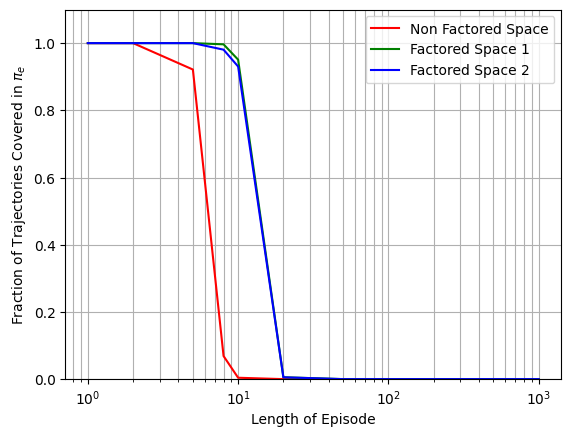

In [ ]:
plot_graphs(nf_coverages, f_coverages, 'T', 0, 1.1)

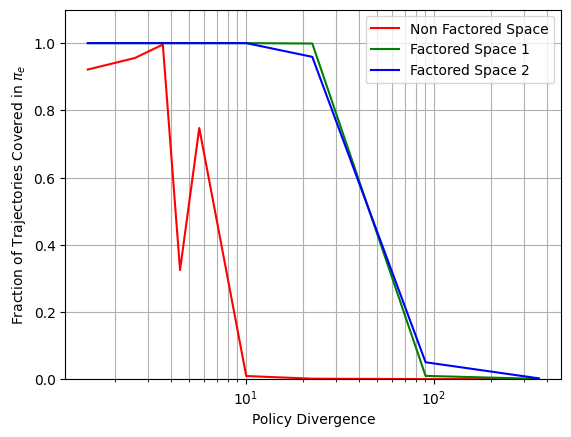

In [ ]:
nf_coverages = np.array([0.9214, 0.9556, 0.9957, 0.3246, 0.7473, 0.0092, 0.0013, 0.0, 0.0])
f_coverages = np.array([[1., 1.], [1., 1.], [1., 1.], [1., 1.], [1., 1.], [1., 1.], [0.9988, 0.9591], [0.0096, 0.0502], [0.0008, 0.0023]])

plot_graphs(nf_coverages, f_coverages, 'PD', 0, 1.1)